In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

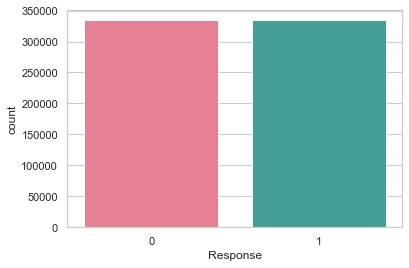

In [7]:
from sklearn.preprocessing import LabelEncoder 
labelEncoder= LabelEncoder()
train['Gender'] = labelEncoder.fit_transform(train['Gender'])
train['Vehicle_Age'] = labelEncoder.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = labelEncoder.fit_transform(train['Vehicle_Damage'])

X=train.drop(['Response','id'],axis=1) 
y=train['Response'] 

from imblearn.over_sampling import RandomOverSampler

randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Training and Test Data for Model Selection
X_train, X_test, y_train, y_test= train_test_split(X_new, y_new, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#Data Pre-Processing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(501598, 10) (167200, 10) (501598,) (167200,)


In [25]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]}

In [21]:
def best_model(model, params):
    
    #clf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    top_model = GridSearchCV(model, param_grid=params, scoring='roc_auc',cv=5)
    result = top_model.fit(X_train,y_train)
   
    print('Best Accuracy Score: %s' % result.best_score_)
    print('Best Hyperparameters Configuration: %s' % result.best_params_)
    
    return result

In [24]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier()
result = best_model(model, params_1)


0:	learn: 0.6672087	total: 294ms	remaining: 1m 13s
1:	learn: 0.6441366	total: 515ms	remaining: 1m 3s
2:	learn: 0.6235189	total: 745ms	remaining: 1m 1s
3:	learn: 0.6053477	total: 939ms	remaining: 57.7s
4:	learn: 0.5889324	total: 1.18s	remaining: 57.9s
5:	learn: 0.5744333	total: 1.34s	remaining: 54.7s
6:	learn: 0.5616345	total: 1.52s	remaining: 52.8s
7:	learn: 0.5501000	total: 1.71s	remaining: 51.6s
8:	learn: 0.5428366	total: 1.85s	remaining: 49.7s
9:	learn: 0.5334268	total: 2.01s	remaining: 48.2s
10:	learn: 0.5249021	total: 2.17s	remaining: 47.2s
11:	learn: 0.5172741	total: 2.35s	remaining: 46.7s
12:	learn: 0.5105446	total: 2.5s	remaining: 45.6s
13:	learn: 0.5062668	total: 2.64s	remaining: 44.5s
14:	learn: 0.5004235	total: 2.79s	remaining: 43.6s
15:	learn: 0.4968373	total: 2.91s	remaining: 42.6s
16:	learn: 0.4920226	total: 3.04s	remaining: 41.6s
17:	learn: 0.4888102	total: 3.16s	remaining: 40.8s
18:	learn: 0.4847341	total: 3.38s	remaining: 41.1s
19:	learn: 0.4821000	total: 3.5s	remainin

162:	learn: 0.4272887	total: 27.6s	remaining: 14.8s
163:	learn: 0.4272639	total: 27.8s	remaining: 14.6s
164:	learn: 0.4272162	total: 28s	remaining: 14.4s
165:	learn: 0.4271780	total: 28.2s	remaining: 14.3s
166:	learn: 0.4271499	total: 28.4s	remaining: 14.1s
167:	learn: 0.4271087	total: 28.8s	remaining: 14s
168:	learn: 0.4270840	total: 29s	remaining: 13.9s
169:	learn: 0.4270454	total: 29.2s	remaining: 13.7s
170:	learn: 0.4269929	total: 29.4s	remaining: 13.6s
171:	learn: 0.4269719	total: 29.5s	remaining: 13.4s
172:	learn: 0.4269362	total: 29.7s	remaining: 13.2s
173:	learn: 0.4269029	total: 29.9s	remaining: 13.1s
174:	learn: 0.4268386	total: 30.1s	remaining: 12.9s
175:	learn: 0.4268096	total: 30.3s	remaining: 12.7s
176:	learn: 0.4267714	total: 30.4s	remaining: 12.5s
177:	learn: 0.4266984	total: 30.6s	remaining: 12.4s
178:	learn: 0.4266703	total: 30.8s	remaining: 12.2s
179:	learn: 0.4266279	total: 30.9s	remaining: 12s
180:	learn: 0.4265906	total: 31.1s	remaining: 11.8s
181:	learn: 0.426557

73:	learn: 0.4343023	total: 15.4s	remaining: 36.5s
74:	learn: 0.4340871	total: 15.6s	remaining: 36.4s
75:	learn: 0.4339628	total: 15.9s	remaining: 36.5s
76:	learn: 0.4337517	total: 16.2s	remaining: 36.4s
77:	learn: 0.4335458	total: 16.4s	remaining: 36.2s
78:	learn: 0.4333664	total: 16.8s	remaining: 36.4s
79:	learn: 0.4331934	total: 17.2s	remaining: 36.5s
80:	learn: 0.4330082	total: 17.5s	remaining: 36.4s
81:	learn: 0.4328842	total: 17.8s	remaining: 36.4s
82:	learn: 0.4327808	total: 18s	remaining: 36.3s
83:	learn: 0.4326225	total: 18.3s	remaining: 36.3s
84:	learn: 0.4325157	total: 18.6s	remaining: 36.1s
85:	learn: 0.4323831	total: 19s	remaining: 36.2s
86:	learn: 0.4322175	total: 19.3s	remaining: 36.1s
87:	learn: 0.4320869	total: 19.6s	remaining: 36s
88:	learn: 0.4319828	total: 19.9s	remaining: 36s
89:	learn: 0.4318201	total: 20.2s	remaining: 35.9s
90:	learn: 0.4316780	total: 20.6s	remaining: 35.9s
91:	learn: 0.4315545	total: 20.9s	remaining: 35.9s
92:	learn: 0.4314099	total: 21.2s	remai

233:	learn: 0.4249014	total: 52.8s	remaining: 3.61s
234:	learn: 0.4248785	total: 52.9s	remaining: 3.38s
235:	learn: 0.4248508	total: 53s	remaining: 3.15s
236:	learn: 0.4248256	total: 53.3s	remaining: 2.92s
237:	learn: 0.4247964	total: 53.4s	remaining: 2.69s
238:	learn: 0.4247743	total: 53.6s	remaining: 2.46s
239:	learn: 0.4247511	total: 53.7s	remaining: 2.24s
240:	learn: 0.4247405	total: 53.9s	remaining: 2.01s
241:	learn: 0.4247281	total: 54s	remaining: 1.78s
242:	learn: 0.4246848	total: 54.3s	remaining: 1.56s
243:	learn: 0.4246765	total: 54.4s	remaining: 1.34s
244:	learn: 0.4246435	total: 54.6s	remaining: 1.11s
245:	learn: 0.4246133	total: 55.1s	remaining: 896ms
246:	learn: 0.4245998	total: 55.2s	remaining: 671ms
247:	learn: 0.4245874	total: 55.4s	remaining: 447ms
248:	learn: 0.4245692	total: 55.6s	remaining: 223ms
249:	learn: 0.4245531	total: 55.7s	remaining: 0us
0:	learn: 0.6672266	total: 191ms	remaining: 47.5s
1:	learn: 0.6440887	total: 344ms	remaining: 42.6s
2:	learn: 0.6234355	to

144:	learn: 0.4287858	total: 27.6s	remaining: 20s
145:	learn: 0.4287607	total: 27.8s	remaining: 19.8s
146:	learn: 0.4287287	total: 28s	remaining: 19.6s
147:	learn: 0.4286946	total: 28.1s	remaining: 19.4s
148:	learn: 0.4286671	total: 28.3s	remaining: 19.2s
149:	learn: 0.4286109	total: 28.5s	remaining: 19s
150:	learn: 0.4285723	total: 28.6s	remaining: 18.8s
151:	learn: 0.4285260	total: 28.8s	remaining: 18.5s
152:	learn: 0.4284766	total: 28.9s	remaining: 18.3s
153:	learn: 0.4284508	total: 29.1s	remaining: 18.1s
154:	learn: 0.4284225	total: 29.2s	remaining: 17.9s
155:	learn: 0.4283691	total: 29.3s	remaining: 17.7s
156:	learn: 0.4283322	total: 29.4s	remaining: 17.4s
157:	learn: 0.4282971	total: 29.7s	remaining: 17.3s
158:	learn: 0.4282713	total: 29.8s	remaining: 17.1s
159:	learn: 0.4282153	total: 30.3s	remaining: 17s
160:	learn: 0.4281647	total: 30.6s	remaining: 16.9s
161:	learn: 0.4281324	total: 30.8s	remaining: 16.7s
162:	learn: 0.4281101	total: 31s	remaining: 16.5s
163:	learn: 0.4280909	

54:	learn: 0.4401671	total: 11.9s	remaining: 42.2s
55:	learn: 0.4397517	total: 12.1s	remaining: 41.9s
56:	learn: 0.4394463	total: 12.2s	remaining: 41.4s
57:	learn: 0.4390989	total: 12.3s	remaining: 40.9s
58:	learn: 0.4386608	total: 12.5s	remaining: 40.4s
59:	learn: 0.4382142	total: 12.7s	remaining: 40.1s
60:	learn: 0.4379079	total: 12.8s	remaining: 39.6s
61:	learn: 0.4376433	total: 13s	remaining: 39.4s
62:	learn: 0.4373819	total: 13.2s	remaining: 39.3s
63:	learn: 0.4370943	total: 13.4s	remaining: 38.9s
64:	learn: 0.4369011	total: 13.6s	remaining: 38.7s
65:	learn: 0.4366803	total: 13.8s	remaining: 38.4s
66:	learn: 0.4364049	total: 13.9s	remaining: 38s
67:	learn: 0.4361020	total: 14.1s	remaining: 37.7s
68:	learn: 0.4358313	total: 14.2s	remaining: 37.3s
69:	learn: 0.4355652	total: 14.4s	remaining: 37.1s
70:	learn: 0.4353334	total: 14.6s	remaining: 36.9s
71:	learn: 0.4351466	total: 14.8s	remaining: 36.6s
72:	learn: 0.4349441	total: 15s	remaining: 36.3s
73:	learn: 0.4347572	total: 15.1s	rem

214:	learn: 0.4256099	total: 42.5s	remaining: 6.91s
215:	learn: 0.4255935	total: 42.7s	remaining: 6.73s
216:	learn: 0.4255710	total: 43s	remaining: 6.53s
217:	learn: 0.4255548	total: 43.2s	remaining: 6.33s
218:	learn: 0.4255425	total: 43.3s	remaining: 6.13s
219:	learn: 0.4254888	total: 43.4s	remaining: 5.92s
220:	learn: 0.4254728	total: 43.6s	remaining: 5.72s
221:	learn: 0.4254464	total: 43.8s	remaining: 5.52s
222:	learn: 0.4254169	total: 44s	remaining: 5.32s
223:	learn: 0.4253867	total: 44.1s	remaining: 5.12s
224:	learn: 0.4253670	total: 44.3s	remaining: 4.92s
225:	learn: 0.4253371	total: 44.5s	remaining: 4.72s
226:	learn: 0.4253227	total: 44.6s	remaining: 4.52s
227:	learn: 0.4252862	total: 44.8s	remaining: 4.32s
228:	learn: 0.4252651	total: 45.1s	remaining: 4.13s
229:	learn: 0.4252502	total: 45.2s	remaining: 3.93s
230:	learn: 0.4252229	total: 45.5s	remaining: 3.74s
231:	learn: 0.4252082	total: 45.7s	remaining: 3.54s
232:	learn: 0.4251603	total: 45.9s	remaining: 3.35s
233:	learn: 0.42

126:	learn: 0.4294238	total: 26.1s	remaining: 25.2s
127:	learn: 0.4293477	total: 26.3s	remaining: 25s
128:	learn: 0.4292866	total: 26.6s	remaining: 24.9s
129:	learn: 0.4292311	total: 26.9s	remaining: 24.8s
130:	learn: 0.4291934	total: 27.1s	remaining: 24.6s
131:	learn: 0.4291304	total: 27.3s	remaining: 24.4s
132:	learn: 0.4290787	total: 27.6s	remaining: 24.3s
133:	learn: 0.4290230	total: 27.9s	remaining: 24.1s
134:	learn: 0.4289724	total: 28.1s	remaining: 23.9s
135:	learn: 0.4289011	total: 28.4s	remaining: 23.8s
136:	learn: 0.4288598	total: 28.7s	remaining: 23.6s
137:	learn: 0.4288293	total: 28.8s	remaining: 23.4s
138:	learn: 0.4287682	total: 29.1s	remaining: 23.3s
139:	learn: 0.4287358	total: 29.3s	remaining: 23.1s
140:	learn: 0.4286999	total: 29.6s	remaining: 22.9s
141:	learn: 0.4286380	total: 29.9s	remaining: 22.7s
142:	learn: 0.4285857	total: 30s	remaining: 22.5s
143:	learn: 0.4285405	total: 30.3s	remaining: 22.3s
144:	learn: 0.4285012	total: 30.5s	remaining: 22.1s
145:	learn: 0.42

37:	learn: 0.4505429	total: 6.39s	remaining: 35.6s
38:	learn: 0.4496991	total: 6.62s	remaining: 35.8s
39:	learn: 0.4486807	total: 6.91s	remaining: 36.3s
40:	learn: 0.4478176	total: 7.06s	remaining: 36s
41:	learn: 0.4469915	total: 7.24s	remaining: 35.9s
42:	learn: 0.4463753	total: 7.41s	remaining: 35.7s
43:	learn: 0.4456710	total: 7.54s	remaining: 35.3s
44:	learn: 0.4449980	total: 7.65s	remaining: 34.9s
45:	learn: 0.4443406	total: 7.75s	remaining: 34.4s
46:	learn: 0.4438742	total: 7.84s	remaining: 33.9s
47:	learn: 0.4432502	total: 7.98s	remaining: 33.6s
48:	learn: 0.4426614	total: 8.12s	remaining: 33.3s
49:	learn: 0.4421124	total: 8.32s	remaining: 33.3s
50:	learn: 0.4416227	total: 8.47s	remaining: 33.1s
51:	learn: 0.4411774	total: 8.69s	remaining: 33.1s
52:	learn: 0.4406353	total: 8.86s	remaining: 32.9s
53:	learn: 0.4401957	total: 9.1s	remaining: 33s
54:	learn: 0.4398144	total: 9.3s	remaining: 33s
55:	learn: 0.4394989	total: 9.59s	remaining: 33.2s
56:	learn: 0.4391988	total: 9.77s	remai

197:	learn: 0.4260768	total: 32.4s	remaining: 8.52s
198:	learn: 0.4260566	total: 32.6s	remaining: 8.34s
199:	learn: 0.4260188	total: 32.7s	remaining: 8.17s
200:	learn: 0.4259747	total: 32.9s	remaining: 8.01s
201:	learn: 0.4259394	total: 33s	remaining: 7.84s
202:	learn: 0.4259227	total: 33.1s	remaining: 7.66s
203:	learn: 0.4258966	total: 33.2s	remaining: 7.49s
204:	learn: 0.4258809	total: 33.3s	remaining: 7.32s
205:	learn: 0.4258475	total: 33.5s	remaining: 7.15s
206:	learn: 0.4258295	total: 33.6s	remaining: 6.98s
207:	learn: 0.4258070	total: 33.7s	remaining: 6.81s
208:	learn: 0.4257917	total: 33.9s	remaining: 6.64s
209:	learn: 0.4257380	total: 34s	remaining: 6.47s
210:	learn: 0.4256780	total: 34.1s	remaining: 6.3s
211:	learn: 0.4256104	total: 34.2s	remaining: 6.14s
212:	learn: 0.4255908	total: 34.4s	remaining: 5.97s
213:	learn: 0.4255359	total: 34.6s	remaining: 5.81s
214:	learn: 0.4255125	total: 34.7s	remaining: 5.64s
215:	learn: 0.4254856	total: 34.8s	remaining: 5.47s
216:	learn: 0.425

107:	learn: 0.4301895	total: 34.3s	remaining: 45s
108:	learn: 0.4300593	total: 34.5s	remaining: 44.6s
109:	learn: 0.4299976	total: 34.7s	remaining: 44.2s
110:	learn: 0.4299149	total: 34.9s	remaining: 43.7s
111:	learn: 0.4298056	total: 35.2s	remaining: 43.4s
112:	learn: 0.4297643	total: 35.4s	remaining: 43s
113:	learn: 0.4296988	total: 35.7s	remaining: 42.6s
114:	learn: 0.4296424	total: 35.9s	remaining: 42.1s
115:	learn: 0.4295225	total: 36.1s	remaining: 41.7s
116:	learn: 0.4294774	total: 36.3s	remaining: 41.3s
117:	learn: 0.4294051	total: 36.6s	remaining: 40.9s
118:	learn: 0.4293424	total: 36.8s	remaining: 40.5s
119:	learn: 0.4292711	total: 37.1s	remaining: 40.2s
120:	learn: 0.4291866	total: 37.3s	remaining: 39.8s
121:	learn: 0.4291016	total: 37.5s	remaining: 39.4s
122:	learn: 0.4290620	total: 37.8s	remaining: 39s
123:	learn: 0.4290209	total: 38s	remaining: 38.7s
124:	learn: 0.4289757	total: 38.3s	remaining: 38.3s
125:	learn: 0.4289012	total: 38.6s	remaining: 38s
126:	learn: 0.4288506	

17:	learn: 0.4877533	total: 4.08s	remaining: 52.5s
18:	learn: 0.4838889	total: 4.28s	remaining: 52s
19:	learn: 0.4803832	total: 4.5s	remaining: 51.7s
20:	learn: 0.4772759	total: 4.91s	remaining: 53.5s
21:	learn: 0.4750304	total: 5.12s	remaining: 53s
22:	learn: 0.4730387	total: 5.55s	remaining: 54.7s
23:	learn: 0.4704224	total: 5.78s	remaining: 54.4s
24:	learn: 0.4686418	total: 6.07s	remaining: 54.7s
25:	learn: 0.4670115	total: 6.26s	remaining: 54s
26:	learn: 0.4654041	total: 6.51s	remaining: 53.8s
27:	learn: 0.4633744	total: 6.7s	remaining: 53.1s
28:	learn: 0.4620450	total: 6.9s	remaining: 52.6s
29:	learn: 0.4602004	total: 7.12s	remaining: 52.2s
30:	learn: 0.4585571	total: 7.35s	remaining: 51.9s
31:	learn: 0.4574271	total: 7.58s	remaining: 51.7s
32:	learn: 0.4559722	total: 7.78s	remaining: 51.1s
33:	learn: 0.4549167	total: 8.02s	remaining: 50.9s
34:	learn: 0.4536677	total: 8.22s	remaining: 50.5s
35:	learn: 0.4527922	total: 8.4s	remaining: 49.9s
36:	learn: 0.4519664	total: 8.6s	remainin

178:	learn: 0.4275007	total: 37.5s	remaining: 14.9s
179:	learn: 0.4274678	total: 37.7s	remaining: 14.7s
180:	learn: 0.4274472	total: 37.9s	remaining: 14.4s
181:	learn: 0.4274268	total: 38.1s	remaining: 14.2s
182:	learn: 0.4273992	total: 38.3s	remaining: 14s
183:	learn: 0.4273833	total: 38.5s	remaining: 13.8s
184:	learn: 0.4273104	total: 38.6s	remaining: 13.6s
185:	learn: 0.4272869	total: 38.9s	remaining: 13.4s
186:	learn: 0.4272726	total: 39.1s	remaining: 13.2s
187:	learn: 0.4272564	total: 39.3s	remaining: 13s
188:	learn: 0.4272121	total: 39.5s	remaining: 12.7s
189:	learn: 0.4271730	total: 39.7s	remaining: 12.5s
190:	learn: 0.4271490	total: 39.9s	remaining: 12.3s
191:	learn: 0.4271125	total: 40.1s	remaining: 12.1s
192:	learn: 0.4270800	total: 40.3s	remaining: 11.9s
193:	learn: 0.4270642	total: 40.5s	remaining: 11.7s
194:	learn: 0.4270071	total: 40.7s	remaining: 11.5s
195:	learn: 0.4269801	total: 40.9s	remaining: 11.3s
196:	learn: 0.4269618	total: 41.1s	remaining: 11.1s
197:	learn: 0.42

91:	learn: 0.4320052	total: 18.4s	remaining: 31.6s
92:	learn: 0.4318704	total: 18.5s	remaining: 31.2s
93:	learn: 0.4317833	total: 18.6s	remaining: 30.8s
94:	learn: 0.4316442	total: 18.6s	remaining: 30.4s
95:	learn: 0.4315261	total: 18.7s	remaining: 30s
96:	learn: 0.4314277	total: 18.8s	remaining: 29.6s
97:	learn: 0.4312985	total: 18.9s	remaining: 29.3s
98:	learn: 0.4311850	total: 19s	remaining: 28.9s
99:	learn: 0.4310591	total: 19.1s	remaining: 28.6s
100:	learn: 0.4309417	total: 19.1s	remaining: 28.2s
101:	learn: 0.4308390	total: 19.2s	remaining: 27.9s
102:	learn: 0.4307169	total: 19.3s	remaining: 27.6s
103:	learn: 0.4306350	total: 19.4s	remaining: 27.2s
104:	learn: 0.4305650	total: 19.5s	remaining: 26.9s
105:	learn: 0.4305030	total: 19.6s	remaining: 26.6s
106:	learn: 0.4304064	total: 19.7s	remaining: 26.3s
107:	learn: 0.4303090	total: 19.8s	remaining: 26s
108:	learn: 0.4302459	total: 19.8s	remaining: 25.7s
109:	learn: 0.4301593	total: 19.9s	remaining: 25.4s
110:	learn: 0.4300635	total

3:	learn: 0.6054447	total: 388ms	remaining: 23.9s
4:	learn: 0.5892974	total: 501ms	remaining: 24.6s
5:	learn: 0.5747910	total: 594ms	remaining: 24.2s
6:	learn: 0.5619438	total: 677ms	remaining: 23.5s
7:	learn: 0.5506326	total: 763ms	remaining: 23.1s
8:	learn: 0.5403663	total: 854ms	remaining: 22.9s
9:	learn: 0.5313494	total: 944ms	remaining: 22.7s
10:	learn: 0.5254156	total: 1.05s	remaining: 22.8s
11:	learn: 0.5179394	total: 1.14s	remaining: 22.5s
12:	learn: 0.5110788	total: 1.24s	remaining: 22.5s
13:	learn: 0.5066913	total: 1.34s	remaining: 22.6s
14:	learn: 0.5026252	total: 1.42s	remaining: 22.3s
15:	learn: 0.4971863	total: 1.51s	remaining: 22.1s
16:	learn: 0.4924596	total: 1.6s	remaining: 21.9s
17:	learn: 0.4893847	total: 1.69s	remaining: 21.8s
18:	learn: 0.4852009	total: 1.77s	remaining: 21.5s
19:	learn: 0.4825630	total: 1.86s	remaining: 21.3s
20:	learn: 0.4800157	total: 1.95s	remaining: 21.2s
21:	learn: 0.4776972	total: 2.05s	remaining: 21.3s
22:	learn: 0.4746330	total: 2.15s	remai

166:	learn: 0.4277388	total: 17.6s	remaining: 8.74s
167:	learn: 0.4276892	total: 17.7s	remaining: 8.63s
168:	learn: 0.4276436	total: 17.8s	remaining: 8.51s
169:	learn: 0.4276136	total: 17.9s	remaining: 8.4s
170:	learn: 0.4275876	total: 18s	remaining: 8.29s
171:	learn: 0.4275587	total: 18s	remaining: 8.18s
172:	learn: 0.4275377	total: 18.2s	remaining: 8.09s
173:	learn: 0.4275135	total: 18.3s	remaining: 8.01s
174:	learn: 0.4274907	total: 18.5s	remaining: 7.91s
175:	learn: 0.4274732	total: 18.6s	remaining: 7.81s
176:	learn: 0.4273829	total: 18.7s	remaining: 7.71s
177:	learn: 0.4273353	total: 18.8s	remaining: 7.61s
178:	learn: 0.4272937	total: 18.9s	remaining: 7.5s
179:	learn: 0.4272240	total: 19s	remaining: 7.4s
180:	learn: 0.4271783	total: 19.1s	remaining: 7.3s
181:	learn: 0.4271508	total: 19.3s	remaining: 7.21s
182:	learn: 0.4271246	total: 19.4s	remaining: 7.11s
183:	learn: 0.4271026	total: 19.5s	remaining: 7s
184:	learn: 0.4270609	total: 19.6s	remaining: 6.89s
185:	learn: 0.4270051	tot

77:	learn: 0.4466364	total: 6.33s	remaining: 1.78s
78:	learn: 0.4461294	total: 6.43s	remaining: 1.71s
79:	learn: 0.4456191	total: 6.52s	remaining: 1.63s
80:	learn: 0.4451097	total: 6.6s	remaining: 1.55s
81:	learn: 0.4445832	total: 6.68s	remaining: 1.47s
82:	learn: 0.4441617	total: 6.85s	remaining: 1.4s
83:	learn: 0.4436972	total: 6.91s	remaining: 1.32s
84:	learn: 0.4432461	total: 7.01s	remaining: 1.24s
85:	learn: 0.4429488	total: 7.11s	remaining: 1.16s
86:	learn: 0.4425621	total: 7.21s	remaining: 1.08s
87:	learn: 0.4422597	total: 7.34s	remaining: 1s
88:	learn: 0.4418440	total: 7.39s	remaining: 914ms
89:	learn: 0.4414496	total: 7.47s	remaining: 830ms
90:	learn: 0.4410952	total: 7.51s	remaining: 743ms
91:	learn: 0.4407618	total: 7.59s	remaining: 660ms
92:	learn: 0.4404382	total: 7.67s	remaining: 577ms
93:	learn: 0.4401151	total: 7.71s	remaining: 492ms
94:	learn: 0.4398086	total: 7.76s	remaining: 409ms
95:	learn: 0.4394993	total: 7.82s	remaining: 326ms
96:	learn: 0.4391675	total: 7.88s	re

40:	learn: 0.4840380	total: 2.22s	remaining: 3.19s
41:	learn: 0.4822721	total: 2.26s	remaining: 3.12s
42:	learn: 0.4806934	total: 2.29s	remaining: 3.04s
43:	learn: 0.4789982	total: 2.35s	remaining: 2.99s
44:	learn: 0.4774073	total: 2.38s	remaining: 2.91s
45:	learn: 0.4757758	total: 2.44s	remaining: 2.86s
46:	learn: 0.4744160	total: 2.5s	remaining: 2.82s
47:	learn: 0.4729645	total: 2.54s	remaining: 2.75s
48:	learn: 0.4715077	total: 2.6s	remaining: 2.71s
49:	learn: 0.4702574	total: 2.66s	remaining: 2.66s
50:	learn: 0.4689152	total: 2.72s	remaining: 2.61s
51:	learn: 0.4676551	total: 2.77s	remaining: 2.55s
52:	learn: 0.4665002	total: 2.82s	remaining: 2.5s
53:	learn: 0.4652834	total: 2.85s	remaining: 2.43s
54:	learn: 0.4641988	total: 2.89s	remaining: 2.37s
55:	learn: 0.4631172	total: 2.94s	remaining: 2.31s
56:	learn: 0.4621047	total: 2.98s	remaining: 2.25s
57:	learn: 0.4611430	total: 3.03s	remaining: 2.19s
58:	learn: 0.4603113	total: 3.07s	remaining: 2.13s
59:	learn: 0.4593753	total: 3.11s	

3:	learn: 0.6489927	total: 349ms	remaining: 8.37s
4:	learn: 0.6395357	total: 422ms	remaining: 8.02s
5:	learn: 0.6305986	total: 492ms	remaining: 7.71s
6:	learn: 0.6220229	total: 593ms	remaining: 7.88s
7:	learn: 0.6139291	total: 673ms	remaining: 7.75s
8:	learn: 0.6063142	total: 722ms	remaining: 7.3s
9:	learn: 0.5991166	total: 819ms	remaining: 7.37s
10:	learn: 0.5921457	total: 922ms	remaining: 7.46s
11:	learn: 0.5855422	total: 989ms	remaining: 7.25s
12:	learn: 0.5793529	total: 1.08s	remaining: 7.21s
13:	learn: 0.5735257	total: 1.15s	remaining: 7.05s
14:	learn: 0.5679240	total: 1.25s	remaining: 7.09s
15:	learn: 0.5625651	total: 1.33s	remaining: 7.01s
16:	learn: 0.5574885	total: 1.41s	remaining: 6.88s
17:	learn: 0.5526774	total: 1.47s	remaining: 6.69s
18:	learn: 0.5480094	total: 1.58s	remaining: 6.75s
19:	learn: 0.5435387	total: 1.66s	remaining: 6.65s
20:	learn: 0.5392664	total: 1.74s	remaining: 6.56s
21:	learn: 0.5352459	total: 1.83s	remaining: 6.48s
22:	learn: 0.5314166	total: 1.91s	remai

67:	learn: 0.4523336	total: 5.96s	remaining: 2.81s
68:	learn: 0.4517246	total: 6s	remaining: 2.7s
69:	learn: 0.4510263	total: 6.07s	remaining: 2.6s
70:	learn: 0.4504007	total: 6.14s	remaining: 2.51s
71:	learn: 0.4498593	total: 6.23s	remaining: 2.42s
72:	learn: 0.4492678	total: 6.29s	remaining: 2.33s
73:	learn: 0.4486501	total: 6.36s	remaining: 2.23s
74:	learn: 0.4481547	total: 6.46s	remaining: 2.15s
75:	learn: 0.4475886	total: 6.52s	remaining: 2.06s
76:	learn: 0.4471458	total: 6.59s	remaining: 1.97s
77:	learn: 0.4466586	total: 6.67s	remaining: 1.88s
78:	learn: 0.4461917	total: 6.74s	remaining: 1.79s
79:	learn: 0.4456707	total: 6.8s	remaining: 1.7s
80:	learn: 0.4451601	total: 6.89s	remaining: 1.61s
81:	learn: 0.4446456	total: 6.97s	remaining: 1.53s
82:	learn: 0.4442171	total: 7.03s	remaining: 1.44s
83:	learn: 0.4438746	total: 7.11s	remaining: 1.35s
84:	learn: 0.4434243	total: 7.19s	remaining: 1.27s
85:	learn: 0.4431126	total: 7.26s	remaining: 1.18s
86:	learn: 0.4426958	total: 7.35s	rema

32:	learn: 0.5007905	total: 2.86s	remaining: 5.8s
33:	learn: 0.4983178	total: 2.93s	remaining: 5.68s
34:	learn: 0.4960186	total: 2.99s	remaining: 5.55s
35:	learn: 0.4938407	total: 3.08s	remaining: 5.48s
36:	learn: 0.4917067	total: 3.16s	remaining: 5.39s
37:	learn: 0.4896232	total: 3.23s	remaining: 5.27s
38:	learn: 0.4876167	total: 3.3s	remaining: 5.16s
39:	learn: 0.4857950	total: 3.39s	remaining: 5.08s
40:	learn: 0.4840212	total: 3.5s	remaining: 5.04s
41:	learn: 0.4822416	total: 3.65s	remaining: 5.04s
42:	learn: 0.4806745	total: 3.74s	remaining: 4.95s
43:	learn: 0.4789681	total: 3.82s	remaining: 4.86s
44:	learn: 0.4773851	total: 3.89s	remaining: 4.75s
45:	learn: 0.4757622	total: 3.94s	remaining: 4.62s
46:	learn: 0.4743929	total: 4.01s	remaining: 4.52s
47:	learn: 0.4729362	total: 4.07s	remaining: 4.41s
48:	learn: 0.4714901	total: 4.12s	remaining: 4.29s
49:	learn: 0.4702320	total: 4.19s	remaining: 4.19s
50:	learn: 0.4688983	total: 4.33s	remaining: 4.16s
51:	learn: 0.4676444	total: 4.39s	

94:	learn: 0.4397435	total: 8.89s	remaining: 468ms
95:	learn: 0.4394320	total: 9.01s	remaining: 376ms
96:	learn: 0.4392179	total: 9.09s	remaining: 281ms
97:	learn: 0.4389324	total: 9.18s	remaining: 187ms
98:	learn: 0.4385850	total: 9.32s	remaining: 94.1ms
99:	learn: 0.4383168	total: 9.37s	remaining: 0us
0:	learn: 0.6812445	total: 223ms	remaining: 22.1s
1:	learn: 0.6699027	total: 416ms	remaining: 20.4s
2:	learn: 0.6590744	total: 543ms	remaining: 17.6s
3:	learn: 0.6489883	total: 635ms	remaining: 15.2s
4:	learn: 0.6395307	total: 708ms	remaining: 13.5s
5:	learn: 0.6305847	total: 826ms	remaining: 12.9s
6:	learn: 0.6220135	total: 898ms	remaining: 11.9s
7:	learn: 0.6139214	total: 975ms	remaining: 11.2s
8:	learn: 0.6062950	total: 1.02s	remaining: 10.4s
9:	learn: 0.5990918	total: 1.09s	remaining: 9.81s
10:	learn: 0.5921305	total: 1.16s	remaining: 9.41s
11:	learn: 0.5855374	total: 1.22s	remaining: 8.92s
12:	learn: 0.5793326	total: 1.29s	remaining: 8.63s
13:	learn: 0.5734744	total: 1.36s	remainin

56:	learn: 0.4582753	total: 6.14s	remaining: 20.8s
57:	learn: 0.4578208	total: 6.2s	remaining: 20.5s
58:	learn: 0.4568026	total: 6.29s	remaining: 20.4s
59:	learn: 0.4565537	total: 6.37s	remaining: 20.2s
60:	learn: 0.4556839	total: 6.47s	remaining: 20s
61:	learn: 0.4554042	total: 6.53s	remaining: 19.8s
62:	learn: 0.4551041	total: 6.66s	remaining: 19.8s
63:	learn: 0.4547104	total: 6.76s	remaining: 19.7s
64:	learn: 0.4543969	total: 6.88s	remaining: 19.6s
65:	learn: 0.4536535	total: 6.99s	remaining: 19.5s
66:	learn: 0.4533582	total: 7.09s	remaining: 19.4s
67:	learn: 0.4531000	total: 7.2s	remaining: 19.3s
68:	learn: 0.4528493	total: 7.32s	remaining: 19.2s
69:	learn: 0.4526138	total: 7.44s	remaining: 19.1s
70:	learn: 0.4524936	total: 7.54s	remaining: 19s
71:	learn: 0.4521928	total: 7.63s	remaining: 18.9s
72:	learn: 0.4520379	total: 7.74s	remaining: 18.8s
73:	learn: 0.4518650	total: 7.83s	remaining: 18.6s
74:	learn: 0.4516266	total: 7.92s	remaining: 18.5s
75:	learn: 0.4514075	total: 8.02s	rem

216:	learn: 0.4370942	total: 23.1s	remaining: 3.51s
217:	learn: 0.4370573	total: 23.2s	remaining: 3.41s
218:	learn: 0.4368680	total: 23.4s	remaining: 3.31s
219:	learn: 0.4368260	total: 23.5s	remaining: 3.2s
220:	learn: 0.4367750	total: 23.6s	remaining: 3.1s
221:	learn: 0.4367605	total: 23.7s	remaining: 2.99s
222:	learn: 0.4367408	total: 23.8s	remaining: 2.88s
223:	learn: 0.4367183	total: 23.8s	remaining: 2.77s
224:	learn: 0.4366874	total: 23.9s	remaining: 2.66s
225:	learn: 0.4366401	total: 24s	remaining: 2.55s
226:	learn: 0.4366270	total: 24.1s	remaining: 2.44s
227:	learn: 0.4366034	total: 24.2s	remaining: 2.34s
228:	learn: 0.4365752	total: 24.3s	remaining: 2.23s
229:	learn: 0.4365484	total: 24.4s	remaining: 2.12s
230:	learn: 0.4365232	total: 24.5s	remaining: 2.01s
231:	learn: 0.4365085	total: 24.5s	remaining: 1.9s
232:	learn: 0.4363109	total: 24.7s	remaining: 1.8s
233:	learn: 0.4362935	total: 24.8s	remaining: 1.69s
234:	learn: 0.4362658	total: 24.9s	remaining: 1.59s
235:	learn: 0.4362

127:	learn: 0.4428358	total: 14.3s	remaining: 13.6s
128:	learn: 0.4427773	total: 14.4s	remaining: 13.5s
129:	learn: 0.4427098	total: 14.6s	remaining: 13.4s
130:	learn: 0.4426064	total: 14.7s	remaining: 13.4s
131:	learn: 0.4424353	total: 14.8s	remaining: 13.3s
132:	learn: 0.4423913	total: 14.9s	remaining: 13.1s
133:	learn: 0.4422830	total: 15s	remaining: 13s
134:	learn: 0.4422525	total: 15.1s	remaining: 12.9s
135:	learn: 0.4417966	total: 15.2s	remaining: 12.8s
136:	learn: 0.4417908	total: 15.3s	remaining: 12.7s
137:	learn: 0.4417071	total: 15.4s	remaining: 12.5s
138:	learn: 0.4416302	total: 15.5s	remaining: 12.4s
139:	learn: 0.4415379	total: 15.7s	remaining: 12.3s
140:	learn: 0.4415201	total: 15.8s	remaining: 12.2s
141:	learn: 0.4414625	total: 15.9s	remaining: 12.1s
142:	learn: 0.4414080	total: 16s	remaining: 12s
143:	learn: 0.4413015	total: 16.1s	remaining: 11.9s
144:	learn: 0.4413007	total: 16.2s	remaining: 11.8s
145:	learn: 0.4411948	total: 16.4s	remaining: 11.7s
146:	learn: 0.441157

39:	learn: 0.4709068	total: 4.54s	remaining: 23.8s
40:	learn: 0.4692496	total: 4.65s	remaining: 23.7s
41:	learn: 0.4684700	total: 4.78s	remaining: 23.7s
42:	learn: 0.4678590	total: 4.92s	remaining: 23.7s
43:	learn: 0.4672343	total: 5.01s	remaining: 23.5s
44:	learn: 0.4666126	total: 5.1s	remaining: 23.2s
45:	learn: 0.4657724	total: 5.2s	remaining: 23.1s
46:	learn: 0.4652111	total: 5.31s	remaining: 22.9s
47:	learn: 0.4638092	total: 5.44s	remaining: 22.9s
48:	learn: 0.4631545	total: 5.54s	remaining: 22.7s
49:	learn: 0.4625957	total: 5.65s	remaining: 22.6s
50:	learn: 0.4621258	total: 5.76s	remaining: 22.5s
51:	learn: 0.4608742	total: 5.9s	remaining: 22.5s
52:	learn: 0.4605554	total: 6.03s	remaining: 22.4s
53:	learn: 0.4600458	total: 6.12s	remaining: 22.2s
54:	learn: 0.4597939	total: 6.2s	remaining: 22s
55:	learn: 0.4591354	total: 6.33s	remaining: 21.9s
56:	learn: 0.4581656	total: 6.46s	remaining: 21.9s
57:	learn: 0.4578736	total: 6.56s	remaining: 21.7s
58:	learn: 0.4573481	total: 6.66s	rem

199:	learn: 0.4383727	total: 21.9s	remaining: 5.46s
200:	learn: 0.4383357	total: 22s	remaining: 5.35s
201:	learn: 0.4383151	total: 22.1s	remaining: 5.24s
202:	learn: 0.4382517	total: 22.2s	remaining: 5.14s
203:	learn: 0.4382732	total: 22.3s	remaining: 5.03s
204:	learn: 0.4381912	total: 22.4s	remaining: 4.92s
205:	learn: 0.4382023	total: 22.5s	remaining: 4.81s
206:	learn: 0.4381440	total: 22.6s	remaining: 4.7s
207:	learn: 0.4381450	total: 22.7s	remaining: 4.59s
208:	learn: 0.4380369	total: 22.9s	remaining: 4.48s
209:	learn: 0.4380256	total: 22.9s	remaining: 4.37s
210:	learn: 0.4379824	total: 23.1s	remaining: 4.26s
211:	learn: 0.4379681	total: 23.2s	remaining: 4.16s
212:	learn: 0.4379437	total: 23.3s	remaining: 4.05s
213:	learn: 0.4378970	total: 23.4s	remaining: 3.94s
214:	learn: 0.4378769	total: 23.5s	remaining: 3.83s
215:	learn: 0.4378836	total: 23.6s	remaining: 3.71s
216:	learn: 0.4378004	total: 23.7s	remaining: 3.6s
217:	learn: 0.4378019	total: 23.8s	remaining: 3.49s
218:	learn: 0.43

111:	learn: 0.4451130	total: 17.1s	remaining: 21.1s
112:	learn: 0.4449788	total: 17.3s	remaining: 20.9s
113:	learn: 0.4448860	total: 17.4s	remaining: 20.7s
114:	learn: 0.4446829	total: 17.5s	remaining: 20.5s
115:	learn: 0.4445707	total: 17.6s	remaining: 20.3s
116:	learn: 0.4444651	total: 17.7s	remaining: 20.2s
117:	learn: 0.4442734	total: 17.9s	remaining: 20s
118:	learn: 0.4442464	total: 18.1s	remaining: 19.9s
119:	learn: 0.4441307	total: 18.2s	remaining: 19.7s
120:	learn: 0.4440641	total: 18.4s	remaining: 19.6s
121:	learn: 0.4439897	total: 18.5s	remaining: 19.5s
122:	learn: 0.4438881	total: 18.7s	remaining: 19.3s
123:	learn: 0.4437864	total: 18.8s	remaining: 19.1s
124:	learn: 0.4436195	total: 18.9s	remaining: 18.9s
125:	learn: 0.4431448	total: 19.1s	remaining: 18.8s
126:	learn: 0.4430948	total: 19.2s	remaining: 18.6s
127:	learn: 0.4429897	total: 19.4s	remaining: 18.5s
128:	learn: 0.4429253	total: 19.5s	remaining: 18.3s
129:	learn: 0.4428703	total: 19.7s	remaining: 18.2s
130:	learn: 0.

22:	learn: 0.4989715	total: 3.15s	remaining: 31.1s
23:	learn: 0.4966500	total: 3.27s	remaining: 30.8s
24:	learn: 0.4932783	total: 3.4s	remaining: 30.6s
25:	learn: 0.4919669	total: 3.5s	remaining: 30.1s
26:	learn: 0.4900611	total: 3.63s	remaining: 30s
27:	learn: 0.4887847	total: 3.73s	remaining: 29.6s
28:	learn: 0.4859393	total: 3.88s	remaining: 29.6s
29:	learn: 0.4842625	total: 4s	remaining: 29.4s
30:	learn: 0.4817929	total: 4.12s	remaining: 29.1s
31:	learn: 0.4807429	total: 4.24s	remaining: 28.9s
32:	learn: 0.4797277	total: 4.36s	remaining: 28.7s
33:	learn: 0.4786181	total: 4.49s	remaining: 28.5s
34:	learn: 0.4777473	total: 4.6s	remaining: 28.3s
35:	learn: 0.4756872	total: 4.74s	remaining: 28.2s
36:	learn: 0.4747996	total: 4.85s	remaining: 27.9s
37:	learn: 0.4739855	total: 5s	remaining: 27.9s
38:	learn: 0.4720912	total: 5.13s	remaining: 27.8s
39:	learn: 0.4714145	total: 5.26s	remaining: 27.6s
40:	learn: 0.4703294	total: 5.39s	remaining: 27.5s
41:	learn: 0.4696302	total: 5.5s	remaining

185:	learn: 0.4387722	total: 22.5s	remaining: 7.74s
186:	learn: 0.4387201	total: 22.6s	remaining: 7.61s
187:	learn: 0.4385208	total: 22.7s	remaining: 7.48s
188:	learn: 0.4384493	total: 22.8s	remaining: 7.36s
189:	learn: 0.4384096	total: 22.9s	remaining: 7.23s
190:	learn: 0.4384347	total: 23s	remaining: 7.09s
191:	learn: 0.4383573	total: 23.1s	remaining: 6.96s
192:	learn: 0.4383281	total: 23.1s	remaining: 6.83s
193:	learn: 0.4383152	total: 23.2s	remaining: 6.7s
194:	learn: 0.4382830	total: 23.3s	remaining: 6.58s
195:	learn: 0.4382620	total: 23.4s	remaining: 6.45s
196:	learn: 0.4382029	total: 23.5s	remaining: 6.32s
197:	learn: 0.4381665	total: 23.6s	remaining: 6.19s
198:	learn: 0.4381202	total: 23.6s	remaining: 6.06s
199:	learn: 0.4381313	total: 23.7s	remaining: 5.93s
200:	learn: 0.4380919	total: 23.8s	remaining: 5.8s
201:	learn: 0.4380247	total: 23.9s	remaining: 5.68s
202:	learn: 0.4380431	total: 24s	remaining: 5.55s
203:	learn: 0.4379640	total: 24.1s	remaining: 5.43s
204:	learn: 0.4379

96:	learn: 0.4470894	total: 12.4s	remaining: 19.5s
97:	learn: 0.4469887	total: 12.5s	remaining: 19.4s
98:	learn: 0.4468992	total: 12.6s	remaining: 19.2s
99:	learn: 0.4467325	total: 12.7s	remaining: 19s
100:	learn: 0.4466402	total: 12.8s	remaining: 18.9s
101:	learn: 0.4465039	total: 12.9s	remaining: 18.7s
102:	learn: 0.4462478	total: 13s	remaining: 18.6s
103:	learn: 0.4461812	total: 13.2s	remaining: 18.5s
104:	learn: 0.4460475	total: 13.3s	remaining: 18.3s
105:	learn: 0.4459105	total: 13.4s	remaining: 18.2s
106:	learn: 0.4458544	total: 13.5s	remaining: 18.1s
107:	learn: 0.4457235	total: 13.6s	remaining: 17.9s
108:	learn: 0.4452071	total: 13.8s	remaining: 17.8s
109:	learn: 0.4450741	total: 13.9s	remaining: 17.7s
110:	learn: 0.4450169	total: 14s	remaining: 17.5s
111:	learn: 0.4449197	total: 14.1s	remaining: 17.4s
112:	learn: 0.4448359	total: 14.2s	remaining: 17.2s
113:	learn: 0.4447090	total: 14.3s	remaining: 17.1s
114:	learn: 0.4446690	total: 14.4s	remaining: 17s
115:	learn: 0.4445807	to

5:	learn: 0.6039701	total: 865ms	remaining: 35.2s
6:	learn: 0.5906330	total: 965ms	remaining: 33.5s
7:	learn: 0.5819825	total: 1.09s	remaining: 33s
8:	learn: 0.5740533	total: 1.25s	remaining: 33.3s
9:	learn: 0.5634860	total: 1.39s	remaining: 33.3s
10:	learn: 0.5566703	total: 1.53s	remaining: 33.3s
11:	learn: 0.5505358	total: 1.66s	remaining: 33s
12:	learn: 0.5421268	total: 1.78s	remaining: 32.5s
13:	learn: 0.5346469	total: 1.91s	remaining: 32.2s
14:	learn: 0.5299853	total: 2.02s	remaining: 31.7s
15:	learn: 0.5256287	total: 2.13s	remaining: 31.1s
16:	learn: 0.5196210	total: 2.25s	remaining: 30.9s
17:	learn: 0.5160603	total: 2.39s	remaining: 30.8s
18:	learn: 0.5109080	total: 2.54s	remaining: 30.9s
19:	learn: 0.5078187	total: 2.68s	remaining: 30.8s
20:	learn: 0.5033287	total: 2.82s	remaining: 30.8s
21:	learn: 0.5007653	total: 2.95s	remaining: 30.6s
22:	learn: 0.4982826	total: 3.07s	remaining: 30.3s
23:	learn: 0.4960973	total: 3.2s	remaining: 30.2s
24:	learn: 0.4926668	total: 3.33s	remaini

167:	learn: 0.4396320	total: 20.7s	remaining: 10.1s
168:	learn: 0.4393163	total: 20.8s	remaining: 9.95s
169:	learn: 0.4393250	total: 20.9s	remaining: 9.82s
170:	learn: 0.4392641	total: 21s	remaining: 9.69s
171:	learn: 0.4392210	total: 21.1s	remaining: 9.56s
172:	learn: 0.4391424	total: 21.2s	remaining: 9.45s
173:	learn: 0.4390889	total: 21.4s	remaining: 9.34s
174:	learn: 0.4390849	total: 21.5s	remaining: 9.22s
175:	learn: 0.4390271	total: 21.6s	remaining: 9.1s
176:	learn: 0.4387698	total: 21.8s	remaining: 8.98s
177:	learn: 0.4387123	total: 21.9s	remaining: 8.86s
178:	learn: 0.4386426	total: 22s	remaining: 8.73s
179:	learn: 0.4386550	total: 22.1s	remaining: 8.6s
180:	learn: 0.4385659	total: 22.3s	remaining: 8.49s
181:	learn: 0.4385754	total: 22.4s	remaining: 8.36s
182:	learn: 0.4385407	total: 22.5s	remaining: 8.24s
183:	learn: 0.4384667	total: 22.6s	remaining: 8.11s
184:	learn: 0.4382501	total: 22.7s	remaining: 7.99s
185:	learn: 0.4381671	total: 22.8s	remaining: 7.86s
186:	learn: 0.4381

78:	learn: 0.4507858	total: 17.2s	remaining: 37.3s
79:	learn: 0.4505711	total: 17.5s	remaining: 37.1s
80:	learn: 0.4504599	total: 17.8s	remaining: 37.1s
81:	learn: 0.4502969	total: 18.1s	remaining: 37s
82:	learn: 0.4501418	total: 18.4s	remaining: 37.1s
83:	learn: 0.4499150	total: 18.7s	remaining: 37s
84:	learn: 0.4493294	total: 19.1s	remaining: 37s
85:	learn: 0.4491736	total: 19.3s	remaining: 36.9s
86:	learn: 0.4490744	total: 19.6s	remaining: 36.8s
87:	learn: 0.4489453	total: 20s	remaining: 36.8s
88:	learn: 0.4487779	total: 20.2s	remaining: 36.6s
89:	learn: 0.4484685	total: 20.6s	remaining: 36.6s
90:	learn: 0.4483508	total: 21s	remaining: 36.6s
91:	learn: 0.4482235	total: 21.2s	remaining: 36.5s
92:	learn: 0.4481254	total: 21.5s	remaining: 36.3s
93:	learn: 0.4479810	total: 21.8s	remaining: 36.2s
94:	learn: 0.4478654	total: 22.1s	remaining: 36s
95:	learn: 0.4476141	total: 22.4s	remaining: 35.9s
96:	learn: 0.4474832	total: 22.6s	remaining: 35.6s
97:	learn: 0.4473456	total: 22.8s	remaining

238:	learn: 0.4367801	total: 50.9s	remaining: 2.34s
239:	learn: 0.4367454	total: 51.5s	remaining: 2.15s
240:	learn: 0.4367380	total: 52s	remaining: 1.94s
241:	learn: 0.4367095	total: 52.5s	remaining: 1.73s
242:	learn: 0.4366802	total: 52.9s	remaining: 1.52s
243:	learn: 0.4366569	total: 53.4s	remaining: 1.31s
244:	learn: 0.4366396	total: 53.7s	remaining: 1.1s
245:	learn: 0.4366188	total: 54.3s	remaining: 882ms
246:	learn: 0.4365862	total: 54.4s	remaining: 661ms
247:	learn: 0.4365637	total: 54.8s	remaining: 442ms
248:	learn: 0.4365789	total: 55.2s	remaining: 222ms
249:	learn: 0.4365296	total: 55.4s	remaining: 0us
0:	learn: 0.6767104	total: 145ms	remaining: 36.1s
1:	learn: 0.6619360	total: 329ms	remaining: 40.8s
2:	learn: 0.6430166	total: 626ms	remaining: 51.5s
3:	learn: 0.6304902	total: 838ms	remaining: 51.6s
4:	learn: 0.6191287	total: 1.04s	remaining: 50.8s
5:	learn: 0.6040503	total: 1.3s	remaining: 52.9s
6:	learn: 0.5906776	total: 1.54s	remaining: 53.6s
7:	learn: 0.5820949	total: 1.71s

150:	learn: 0.4410983	total: 31.7s	remaining: 20.8s
151:	learn: 0.4410198	total: 31.9s	remaining: 20.5s
152:	learn: 0.4406883	total: 32s	remaining: 20.3s
153:	learn: 0.4406408	total: 32.1s	remaining: 20s
154:	learn: 0.4405851	total: 32.2s	remaining: 19.7s
155:	learn: 0.4405063	total: 32.3s	remaining: 19.4s
156:	learn: 0.4405065	total: 32.4s	remaining: 19.2s
157:	learn: 0.4404165	total: 32.5s	remaining: 18.9s
158:	learn: 0.4403462	total: 32.6s	remaining: 18.7s
159:	learn: 0.4403420	total: 32.7s	remaining: 18.4s
160:	learn: 0.4402574	total: 32.8s	remaining: 18.1s
161:	learn: 0.4399792	total: 33.2s	remaining: 18s
162:	learn: 0.4399405	total: 33.4s	remaining: 17.8s
163:	learn: 0.4398628	total: 33.6s	remaining: 17.6s
164:	learn: 0.4397760	total: 33.8s	remaining: 17.4s
165:	learn: 0.4396994	total: 34.2s	remaining: 17.3s
166:	learn: 0.4396354	total: 34.4s	remaining: 17.1s
167:	learn: 0.4396003	total: 34.7s	remaining: 16.9s
168:	learn: 0.4395288	total: 34.9s	remaining: 16.7s
169:	learn: 0.4392

61:	learn: 0.4562773	total: 8.23s	remaining: 25s
62:	learn: 0.4559310	total: 8.39s	remaining: 24.9s
63:	learn: 0.4557347	total: 8.51s	remaining: 24.7s
64:	learn: 0.4548702	total: 8.62s	remaining: 24.5s
65:	learn: 0.4546069	total: 8.73s	remaining: 24.3s
66:	learn: 0.4544294	total: 8.87s	remaining: 24.2s
67:	learn: 0.4539830	total: 8.96s	remaining: 24s
68:	learn: 0.4537927	total: 9.1s	remaining: 23.9s
69:	learn: 0.4530359	total: 9.24s	remaining: 23.8s
70:	learn: 0.4528993	total: 9.33s	remaining: 23.5s
71:	learn: 0.4525715	total: 9.43s	remaining: 23.3s
72:	learn: 0.4523116	total: 9.56s	remaining: 23.2s
73:	learn: 0.4521141	total: 9.64s	remaining: 22.9s
74:	learn: 0.4519824	total: 9.76s	remaining: 22.8s
75:	learn: 0.4517594	total: 9.87s	remaining: 22.6s
76:	learn: 0.4515206	total: 9.95s	remaining: 22.4s
77:	learn: 0.4513971	total: 10.1s	remaining: 22.3s
78:	learn: 0.4511315	total: 10.2s	remaining: 22.1s
79:	learn: 0.4509522	total: 10.3s	remaining: 21.8s
80:	learn: 0.4508392	total: 10.4s	re

221:	learn: 0.4373687	total: 27.1s	remaining: 3.42s
222:	learn: 0.4373566	total: 27.2s	remaining: 3.29s
223:	learn: 0.4373221	total: 27.3s	remaining: 3.17s
224:	learn: 0.4372870	total: 27.4s	remaining: 3.04s
225:	learn: 0.4372798	total: 27.5s	remaining: 2.92s
226:	learn: 0.4372391	total: 27.6s	remaining: 2.8s
227:	learn: 0.4372298	total: 27.7s	remaining: 2.67s
228:	learn: 0.4372033	total: 27.8s	remaining: 2.55s
229:	learn: 0.4371619	total: 27.9s	remaining: 2.42s
230:	learn: 0.4371391	total: 28s	remaining: 2.3s
231:	learn: 0.4371046	total: 28.1s	remaining: 2.18s
232:	learn: 0.4370674	total: 28.2s	remaining: 2.06s
233:	learn: 0.4370571	total: 28.4s	remaining: 1.94s
234:	learn: 0.4370338	total: 28.5s	remaining: 1.82s
235:	learn: 0.4369937	total: 28.6s	remaining: 1.7s
236:	learn: 0.4369762	total: 28.7s	remaining: 1.58s
237:	learn: 0.4369458	total: 28.9s	remaining: 1.46s
238:	learn: 0.4369400	total: 29s	remaining: 1.33s
239:	learn: 0.4369190	total: 29.1s	remaining: 1.21s
240:	learn: 0.43688

34:	learn: 0.5146565	total: 2.14s	remaining: 3.97s
35:	learn: 0.5123078	total: 2.2s	remaining: 3.91s
36:	learn: 0.5103693	total: 2.25s	remaining: 3.84s
37:	learn: 0.5083409	total: 2.29s	remaining: 3.73s
38:	learn: 0.5066045	total: 2.42s	remaining: 3.79s
39:	learn: 0.5046960	total: 2.48s	remaining: 3.72s
40:	learn: 0.5029661	total: 2.55s	remaining: 3.67s
41:	learn: 0.5012472	total: 2.6s	remaining: 3.59s
42:	learn: 0.4995825	total: 2.68s	remaining: 3.55s
43:	learn: 0.4979244	total: 2.76s	remaining: 3.51s
44:	learn: 0.4963175	total: 2.81s	remaining: 3.43s
45:	learn: 0.4948525	total: 2.86s	remaining: 3.36s
46:	learn: 0.4934567	total: 2.94s	remaining: 3.32s
47:	learn: 0.4923632	total: 3s	remaining: 3.24s
48:	learn: 0.4912499	total: 3.08s	remaining: 3.2s
49:	learn: 0.4899313	total: 3.15s	remaining: 3.15s
50:	learn: 0.4890045	total: 3.19s	remaining: 3.07s
51:	learn: 0.4876930	total: 3.24s	remaining: 2.99s
52:	learn: 0.4866822	total: 3.32s	remaining: 2.95s
53:	learn: 0.4855134	total: 3.38s	rem

96:	learn: 0.4585206	total: 8.79s	remaining: 272ms
97:	learn: 0.4582314	total: 8.89s	remaining: 181ms
98:	learn: 0.4578526	total: 9.02s	remaining: 91.1ms
99:	learn: 0.4575042	total: 9.1s	remaining: 0us
0:	learn: 0.6826863	total: 88.1ms	remaining: 8.72s
1:	learn: 0.6727658	total: 169ms	remaining: 8.28s
2:	learn: 0.6635076	total: 231ms	remaining: 7.46s
3:	learn: 0.6547103	total: 347ms	remaining: 8.34s
4:	learn: 0.6463768	total: 456ms	remaining: 8.66s
5:	learn: 0.6384069	total: 537ms	remaining: 8.41s
6:	learn: 0.6307849	total: 643ms	remaining: 8.55s
7:	learn: 0.6235591	total: 698ms	remaining: 8.03s
8:	learn: 0.6165815	total: 750ms	remaining: 7.58s
9:	learn: 0.6102150	total: 839ms	remaining: 7.55s
10:	learn: 0.6041554	total: 929ms	remaining: 7.51s
11:	learn: 0.5979191	total: 1.05s	remaining: 7.71s
12:	learn: 0.5924482	total: 1.1s	remaining: 7.35s
13:	learn: 0.5870262	total: 1.17s	remaining: 7.17s
14:	learn: 0.5818861	total: 1.27s	remaining: 7.17s
15:	learn: 0.5771444	total: 1.35s	remaining

60:	learn: 0.4791323	total: 4.9s	remaining: 3.13s
61:	learn: 0.4782989	total: 4.99s	remaining: 3.06s
62:	learn: 0.4774599	total: 5.06s	remaining: 2.97s
63:	learn: 0.4765041	total: 5.16s	remaining: 2.9s
64:	learn: 0.4758444	total: 5.21s	remaining: 2.8s
65:	learn: 0.4748370	total: 5.27s	remaining: 2.72s
66:	learn: 0.4740736	total: 5.32s	remaining: 2.62s
67:	learn: 0.4734361	total: 5.41s	remaining: 2.54s
68:	learn: 0.4726468	total: 5.49s	remaining: 2.47s
69:	learn: 0.4720921	total: 5.54s	remaining: 2.37s
70:	learn: 0.4712492	total: 5.6s	remaining: 2.29s
71:	learn: 0.4704536	total: 5.69s	remaining: 2.21s
72:	learn: 0.4697055	total: 5.75s	remaining: 2.13s
73:	learn: 0.4691552	total: 5.85s	remaining: 2.06s
74:	learn: 0.4685805	total: 5.91s	remaining: 1.97s
75:	learn: 0.4678245	total: 5.97s	remaining: 1.89s
76:	learn: 0.4674580	total: 6.07s	remaining: 1.81s
77:	learn: 0.4668521	total: 6.16s	remaining: 1.74s
78:	learn: 0.4661781	total: 6.24s	remaining: 1.66s
79:	learn: 0.4658287	total: 6.33s	r

25:	learn: 0.5380894	total: 1.63s	remaining: 4.65s
26:	learn: 0.5351556	total: 1.69s	remaining: 4.58s
27:	learn: 0.5321848	total: 1.74s	remaining: 4.48s
28:	learn: 0.5292591	total: 1.81s	remaining: 4.43s
29:	learn: 0.5265526	total: 1.86s	remaining: 4.33s
30:	learn: 0.5240044	total: 1.93s	remaining: 4.29s
31:	learn: 0.5215571	total: 1.99s	remaining: 4.22s
32:	learn: 0.5190290	total: 2.03s	remaining: 4.11s
33:	learn: 0.5167524	total: 2.08s	remaining: 4.05s
34:	learn: 0.5146564	total: 2.15s	remaining: 4s
35:	learn: 0.5123049	total: 2.21s	remaining: 3.92s
36:	learn: 0.5103691	total: 2.25s	remaining: 3.83s
37:	learn: 0.5083401	total: 2.32s	remaining: 3.78s
38:	learn: 0.5065981	total: 2.35s	remaining: 3.68s
39:	learn: 0.5046931	total: 2.42s	remaining: 3.64s
40:	learn: 0.5029668	total: 2.48s	remaining: 3.57s
41:	learn: 0.5012484	total: 2.53s	remaining: 3.5s
42:	learn: 0.4995796	total: 2.57s	remaining: 3.41s
43:	learn: 0.4979243	total: 2.62s	remaining: 3.34s
44:	learn: 0.4963166	total: 2.68s	r

88:	learn: 0.4608558	total: 7.33s	remaining: 905ms
89:	learn: 0.4604316	total: 7.39s	remaining: 822ms
90:	learn: 0.4601080	total: 7.47s	remaining: 739ms
91:	learn: 0.4598270	total: 7.56s	remaining: 657ms
92:	learn: 0.4595973	total: 7.66s	remaining: 577ms
93:	learn: 0.4593054	total: 7.72s	remaining: 493ms
94:	learn: 0.4588706	total: 7.79s	remaining: 410ms
95:	learn: 0.4586521	total: 7.9s	remaining: 329ms
96:	learn: 0.4585050	total: 8.01s	remaining: 248ms
97:	learn: 0.4582278	total: 8.08s	remaining: 165ms
98:	learn: 0.4578194	total: 8.2s	remaining: 82.8ms
99:	learn: 0.4575031	total: 8.29s	remaining: 0us
0:	learn: 0.6826861	total: 92.8ms	remaining: 9.19s
1:	learn: 0.6727654	total: 165ms	remaining: 8.09s
2:	learn: 0.6635087	total: 253ms	remaining: 8.18s
3:	learn: 0.6547102	total: 324ms	remaining: 7.79s
4:	learn: 0.6463767	total: 427ms	remaining: 8.12s
5:	learn: 0.6384066	total: 486ms	remaining: 7.61s
6:	learn: 0.6307851	total: 590ms	remaining: 7.84s
7:	learn: 0.6235549	total: 662ms	remaini

53:	learn: 0.4860499	total: 4.29s	remaining: 3.66s
54:	learn: 0.4851584	total: 4.34s	remaining: 3.55s
55:	learn: 0.4839504	total: 4.42s	remaining: 3.47s
56:	learn: 0.4827420	total: 4.49s	remaining: 3.38s
57:	learn: 0.4817126	total: 4.55s	remaining: 3.3s
58:	learn: 0.4806472	total: 4.67s	remaining: 3.25s
59:	learn: 0.4798508	total: 4.77s	remaining: 3.18s
60:	learn: 0.4791318	total: 4.87s	remaining: 3.11s
61:	learn: 0.4782991	total: 4.93s	remaining: 3.02s
62:	learn: 0.4774582	total: 5.02s	remaining: 2.95s
63:	learn: 0.4764977	total: 5.07s	remaining: 2.85s
64:	learn: 0.4758491	total: 5.17s	remaining: 2.79s
65:	learn: 0.4748411	total: 5.32s	remaining: 2.74s
66:	learn: 0.4740683	total: 5.42s	remaining: 2.67s
67:	learn: 0.4734329	total: 5.5s	remaining: 2.59s
68:	learn: 0.4726364	total: 5.58s	remaining: 2.51s
69:	learn: 0.4720908	total: 5.66s	remaining: 2.42s
70:	learn: 0.4712469	total: 5.76s	remaining: 2.35s
71:	learn: 0.4704537	total: 5.81s	remaining: 2.26s
72:	learn: 0.4697033	total: 5.89s

115:	learn: 0.4320732	total: 27.4s	remaining: 31.7s
116:	learn: 0.4319918	total: 27.7s	remaining: 31.5s
117:	learn: 0.4319579	total: 28s	remaining: 31.3s
118:	learn: 0.4319138	total: 28.2s	remaining: 31.1s
119:	learn: 0.4318540	total: 28.5s	remaining: 30.9s
120:	learn: 0.4318164	total: 28.7s	remaining: 30.6s
121:	learn: 0.4317447	total: 29s	remaining: 30.5s
122:	learn: 0.4316979	total: 29.3s	remaining: 30.2s
123:	learn: 0.4316556	total: 29.5s	remaining: 30s
124:	learn: 0.4316292	total: 29.8s	remaining: 29.8s
125:	learn: 0.4315989	total: 29.9s	remaining: 29.4s
126:	learn: 0.4315647	total: 30.1s	remaining: 29.1s
127:	learn: 0.4315328	total: 30.3s	remaining: 28.9s
128:	learn: 0.4314886	total: 30.6s	remaining: 28.7s
129:	learn: 0.4314263	total: 30.9s	remaining: 28.5s
130:	learn: 0.4313921	total: 31.1s	remaining: 28.3s
131:	learn: 0.4313194	total: 31.4s	remaining: 28s
132:	learn: 0.4313052	total: 31.7s	remaining: 27.8s
133:	learn: 0.4312630	total: 31.9s	remaining: 27.6s
134:	learn: 0.431241

25:	learn: 0.4667123	total: 7s	remaining: 1m
26:	learn: 0.4652586	total: 7.21s	remaining: 59.6s
27:	learn: 0.4631495	total: 7.44s	remaining: 59s
28:	learn: 0.4613398	total: 7.66s	remaining: 58.4s
29:	learn: 0.4596357	total: 7.84s	remaining: 57.5s
30:	learn: 0.4583854	total: 8.04s	remaining: 56.8s
31:	learn: 0.4573288	total: 8.21s	remaining: 55.9s
32:	learn: 0.4562286	total: 8.46s	remaining: 55.6s
33:	learn: 0.4552016	total: 8.75s	remaining: 55.6s
34:	learn: 0.4539763	total: 8.95s	remaining: 55s
35:	learn: 0.4527267	total: 9.16s	remaining: 54.4s
36:	learn: 0.4515487	total: 9.31s	remaining: 53.6s
37:	learn: 0.4507527	total: 9.68s	remaining: 54s
38:	learn: 0.4500421	total: 9.85s	remaining: 53.3s
39:	learn: 0.4493234	total: 10.1s	remaining: 52.8s
40:	learn: 0.4484029	total: 10.3s	remaining: 52.3s
41:	learn: 0.4478243	total: 10.4s	remaining: 51.6s
42:	learn: 0.4470171	total: 10.6s	remaining: 51.2s
43:	learn: 0.4464715	total: 10.8s	remaining: 50.7s
44:	learn: 0.4456184	total: 11.1s	remaining

186:	learn: 0.4294309	total: 39.9s	remaining: 13.4s
187:	learn: 0.4294088	total: 40s	remaining: 13.2s
188:	learn: 0.4293936	total: 40.2s	remaining: 13s
189:	learn: 0.4293798	total: 40.4s	remaining: 12.8s
190:	learn: 0.4293638	total: 40.6s	remaining: 12.5s
191:	learn: 0.4293587	total: 40.8s	remaining: 12.3s
192:	learn: 0.4293169	total: 41.1s	remaining: 12.1s
193:	learn: 0.4292771	total: 41.2s	remaining: 11.9s
194:	learn: 0.4292608	total: 41.3s	remaining: 11.7s
195:	learn: 0.4292236	total: 41.6s	remaining: 11.5s
196:	learn: 0.4292069	total: 41.9s	remaining: 11.3s
197:	learn: 0.4292050	total: 42s	remaining: 11s
198:	learn: 0.4291837	total: 42.3s	remaining: 10.8s
199:	learn: 0.4291688	total: 42.4s	remaining: 10.6s
200:	learn: 0.4291346	total: 42.6s	remaining: 10.4s
201:	learn: 0.4291182	total: 42.8s	remaining: 10.2s
202:	learn: 0.4290837	total: 43.1s	remaining: 9.97s
203:	learn: 0.4290695	total: 43.3s	remaining: 9.75s
204:	learn: 0.4290362	total: 43.4s	remaining: 9.54s
205:	learn: 0.429009

97:	learn: 0.4336852	total: 19s	remaining: 29.5s
98:	learn: 0.4336243	total: 19.2s	remaining: 29.4s
99:	learn: 0.4335215	total: 19.4s	remaining: 29s
100:	learn: 0.4334692	total: 19.5s	remaining: 28.8s
101:	learn: 0.4334129	total: 19.7s	remaining: 28.5s
102:	learn: 0.4333337	total: 19.8s	remaining: 28.3s
103:	learn: 0.4332455	total: 19.9s	remaining: 28s
104:	learn: 0.4332042	total: 20.1s	remaining: 27.8s
105:	learn: 0.4331489	total: 20.3s	remaining: 27.5s
106:	learn: 0.4331045	total: 20.4s	remaining: 27.2s
107:	learn: 0.4330129	total: 20.5s	remaining: 27s
108:	learn: 0.4329772	total: 20.7s	remaining: 26.7s
109:	learn: 0.4329214	total: 20.8s	remaining: 26.5s
110:	learn: 0.4328657	total: 21.2s	remaining: 26.5s
111:	learn: 0.4328325	total: 21.4s	remaining: 26.4s
112:	learn: 0.4327929	total: 21.6s	remaining: 26.2s
113:	learn: 0.4327353	total: 21.8s	remaining: 26s
114:	learn: 0.4326542	total: 21.9s	remaining: 25.8s
115:	learn: 0.4326040	total: 22.1s	remaining: 25.5s
116:	learn: 0.4325550	tot

7:	learn: 0.5501007	total: 1.33s	remaining: 40.4s
8:	learn: 0.5399401	total: 1.49s	remaining: 39.9s
9:	learn: 0.5307991	total: 1.64s	remaining: 39.5s
10:	learn: 0.5251105	total: 1.81s	remaining: 39.3s
11:	learn: 0.5175667	total: 2.05s	remaining: 40.7s
12:	learn: 0.5107854	total: 2.21s	remaining: 40.2s
13:	learn: 0.5047324	total: 2.37s	remaining: 39.9s
14:	learn: 0.5007606	total: 2.53s	remaining: 39.6s
15:	learn: 0.4956776	total: 2.7s	remaining: 39.5s
16:	learn: 0.4911337	total: 2.83s	remaining: 38.8s
17:	learn: 0.4880717	total: 2.98s	remaining: 38.4s
18:	learn: 0.4841415	total: 3.17s	remaining: 38.5s
19:	learn: 0.4815499	total: 3.33s	remaining: 38.3s
20:	learn: 0.4790590	total: 3.51s	remaining: 38.2s
21:	learn: 0.4759175	total: 3.74s	remaining: 38.7s
22:	learn: 0.4730457	total: 3.92s	remaining: 38.7s
23:	learn: 0.4710810	total: 4.09s	remaining: 38.5s
24:	learn: 0.4692993	total: 4.25s	remaining: 38.3s
25:	learn: 0.4669677	total: 4.45s	remaining: 38.3s
26:	learn: 0.4648533	total: 4.61s	r

168:	learn: 0.4300500	total: 30.4s	remaining: 14.6s
169:	learn: 0.4300385	total: 30.5s	remaining: 14.4s
170:	learn: 0.4299995	total: 30.7s	remaining: 14.2s
171:	learn: 0.4299651	total: 30.8s	remaining: 14s
172:	learn: 0.4299251	total: 31s	remaining: 13.8s
173:	learn: 0.4299135	total: 31.1s	remaining: 13.6s
174:	learn: 0.4298801	total: 31.2s	remaining: 13.4s
175:	learn: 0.4298300	total: 31.3s	remaining: 13.2s
176:	learn: 0.4298210	total: 31.5s	remaining: 13s
177:	learn: 0.4298043	total: 31.6s	remaining: 12.8s
178:	learn: 0.4297923	total: 31.7s	remaining: 12.6s
179:	learn: 0.4297730	total: 31.8s	remaining: 12.4s
180:	learn: 0.4297640	total: 32s	remaining: 12.2s
181:	learn: 0.4297457	total: 32.1s	remaining: 12s
182:	learn: 0.4297271	total: 32.2s	remaining: 11.8s
183:	learn: 0.4296870	total: 32.3s	remaining: 11.6s
184:	learn: 0.4296680	total: 32.4s	remaining: 11.4s
185:	learn: 0.4296537	total: 32.6s	remaining: 11.2s
186:	learn: 0.4296396	total: 32.7s	remaining: 11s
187:	learn: 0.4296069	to

79:	learn: 0.4357085	total: 12.4s	remaining: 26.4s
80:	learn: 0.4355352	total: 12.6s	remaining: 26.2s
81:	learn: 0.4353841	total: 12.8s	remaining: 26.1s
82:	learn: 0.4352232	total: 12.9s	remaining: 26s
83:	learn: 0.4351084	total: 13s	remaining: 25.7s
84:	learn: 0.4350248	total: 13.1s	remaining: 25.4s
85:	learn: 0.4348792	total: 13.2s	remaining: 25.1s
86:	learn: 0.4347448	total: 13.3s	remaining: 24.9s
87:	learn: 0.4346737	total: 13.4s	remaining: 24.6s
88:	learn: 0.4345640	total: 13.5s	remaining: 24.4s
89:	learn: 0.4344490	total: 13.6s	remaining: 24.2s
90:	learn: 0.4343443	total: 13.7s	remaining: 24s
91:	learn: 0.4342355	total: 13.8s	remaining: 23.7s
92:	learn: 0.4341601	total: 13.9s	remaining: 23.4s
93:	learn: 0.4340591	total: 14s	remaining: 23.2s
94:	learn: 0.4339695	total: 14s	remaining: 22.9s
95:	learn: 0.4338507	total: 14.1s	remaining: 22.7s
96:	learn: 0.4337684	total: 14.2s	remaining: 22.4s
97:	learn: 0.4336991	total: 14.3s	remaining: 22.2s
98:	learn: 0.4336601	total: 14.4s	remaini

238:	learn: 0.4288888	total: 40.9s	remaining: 1.88s
239:	learn: 0.4288613	total: 41s	remaining: 1.71s
240:	learn: 0.4288507	total: 41.1s	remaining: 1.54s
241:	learn: 0.4288264	total: 41.3s	remaining: 1.36s
242:	learn: 0.4288187	total: 41.4s	remaining: 1.19s
243:	learn: 0.4288106	total: 41.5s	remaining: 1.02s
244:	learn: 0.4287968	total: 41.6s	remaining: 849ms
245:	learn: 0.4287859	total: 41.7s	remaining: 678ms
246:	learn: 0.4287662	total: 41.8s	remaining: 508ms
247:	learn: 0.4287479	total: 41.9s	remaining: 338ms
248:	learn: 0.4287386	total: 42s	remaining: 169ms
249:	learn: 0.4287254	total: 42.1s	remaining: 0us
0:	learn: 0.6672159	total: 122ms	remaining: 30.3s
1:	learn: 0.6440342	total: 229ms	remaining: 28.4s
2:	learn: 0.6232863	total: 327ms	remaining: 27s
3:	learn: 0.6047789	total: 440ms	remaining: 27s
4:	learn: 0.5886852	total: 574ms	remaining: 28.1s
5:	learn: 0.5742992	total: 695ms	remaining: 28.3s
6:	learn: 0.5613001	total: 793ms	remaining: 27.5s
7:	learn: 0.5499560	total: 889ms	rem

150:	learn: 0.4305328	total: 20s	remaining: 13.1s
151:	learn: 0.4305083	total: 20.1s	remaining: 12.9s
152:	learn: 0.4304558	total: 20.2s	remaining: 12.8s
153:	learn: 0.4304153	total: 20.3s	remaining: 12.7s
154:	learn: 0.4303886	total: 20.4s	remaining: 12.5s
155:	learn: 0.4303679	total: 20.5s	remaining: 12.4s
156:	learn: 0.4303470	total: 20.6s	remaining: 12.2s
157:	learn: 0.4303253	total: 20.7s	remaining: 12s
158:	learn: 0.4303096	total: 20.8s	remaining: 11.9s
159:	learn: 0.4302695	total: 20.9s	remaining: 11.8s
160:	learn: 0.4302447	total: 21s	remaining: 11.6s
161:	learn: 0.4302041	total: 21.2s	remaining: 11.5s
162:	learn: 0.4301916	total: 21.3s	remaining: 11.3s
163:	learn: 0.4301320	total: 21.4s	remaining: 11.2s
164:	learn: 0.4301232	total: 21.5s	remaining: 11.1s
165:	learn: 0.4301070	total: 21.6s	remaining: 10.9s
166:	learn: 0.4300562	total: 21.7s	remaining: 10.8s
167:	learn: 0.4300175	total: 21.8s	remaining: 10.7s
168:	learn: 0.4299700	total: 22s	remaining: 10.5s
169:	learn: 0.429951

61:	learn: 0.4384773	total: 7.51s	remaining: 22.8s
62:	learn: 0.4382850	total: 7.63s	remaining: 22.6s
63:	learn: 0.4380734	total: 7.74s	remaining: 22.5s
64:	learn: 0.4377927	total: 7.85s	remaining: 22.3s
65:	learn: 0.4375526	total: 7.97s	remaining: 22.2s
66:	learn: 0.4373034	total: 8.07s	remaining: 22s
67:	learn: 0.4371438	total: 8.21s	remaining: 22s
68:	learn: 0.4369075	total: 8.32s	remaining: 21.8s
69:	learn: 0.4366820	total: 8.48s	remaining: 21.8s
70:	learn: 0.4364779	total: 8.61s	remaining: 21.7s
71:	learn: 0.4362397	total: 8.74s	remaining: 21.6s
72:	learn: 0.4360278	total: 8.87s	remaining: 21.5s
73:	learn: 0.4358351	total: 8.99s	remaining: 21.4s
74:	learn: 0.4356814	total: 9.1s	remaining: 21.2s
75:	learn: 0.4355484	total: 9.21s	remaining: 21.1s
76:	learn: 0.4354080	total: 9.35s	remaining: 21s
77:	learn: 0.4352781	total: 9.45s	remaining: 20.8s
78:	learn: 0.4351872	total: 9.56s	remaining: 20.7s
79:	learn: 0.4350361	total: 9.67s	remaining: 20.6s
80:	learn: 0.4348836	total: 9.77s	rema

221:	learn: 0.4286170	total: 26.5s	remaining: 3.35s
222:	learn: 0.4286079	total: 26.8s	remaining: 3.25s
223:	learn: 0.4285917	total: 27s	remaining: 3.13s
224:	learn: 0.4285640	total: 27.1s	remaining: 3.02s
225:	learn: 0.4285538	total: 27.3s	remaining: 2.89s
226:	learn: 0.4285254	total: 27.4s	remaining: 2.77s
227:	learn: 0.4285152	total: 27.5s	remaining: 2.65s
228:	learn: 0.4284997	total: 27.6s	remaining: 2.53s
229:	learn: 0.4284883	total: 27.7s	remaining: 2.4s
230:	learn: 0.4284548	total: 27.8s	remaining: 2.28s
231:	learn: 0.4284331	total: 27.9s	remaining: 2.16s
232:	learn: 0.4284173	total: 28s	remaining: 2.04s
233:	learn: 0.4283973	total: 28.1s	remaining: 1.92s
234:	learn: 0.4283950	total: 28.2s	remaining: 1.8s
235:	learn: 0.4283859	total: 28.3s	remaining: 1.68s
236:	learn: 0.4283608	total: 28.4s	remaining: 1.56s
237:	learn: 0.4283479	total: 28.5s	remaining: 1.44s
238:	learn: 0.4283197	total: 28.6s	remaining: 1.32s
239:	learn: 0.4283104	total: 28.7s	remaining: 1.2s
240:	learn: 0.42830

132:	learn: 0.4319224	total: 12.1s	remaining: 10.6s
133:	learn: 0.4319052	total: 12.1s	remaining: 10.5s
134:	learn: 0.4318850	total: 12.2s	remaining: 10.4s
135:	learn: 0.4318508	total: 12.3s	remaining: 10.3s
136:	learn: 0.4318030	total: 12.4s	remaining: 10.2s
137:	learn: 0.4317409	total: 12.5s	remaining: 10.1s
138:	learn: 0.4317028	total: 12.6s	remaining: 10s
139:	learn: 0.4316328	total: 12.7s	remaining: 9.95s
140:	learn: 0.4315762	total: 12.7s	remaining: 9.85s
141:	learn: 0.4315309	total: 12.8s	remaining: 9.77s
142:	learn: 0.4315004	total: 12.9s	remaining: 9.68s
143:	learn: 0.4314879	total: 13s	remaining: 9.58s
144:	learn: 0.4314397	total: 13.1s	remaining: 9.51s
145:	learn: 0.4314178	total: 13.2s	remaining: 9.42s
146:	learn: 0.4313606	total: 13.3s	remaining: 9.34s
147:	learn: 0.4313274	total: 13.4s	remaining: 9.25s
148:	learn: 0.4312915	total: 13.5s	remaining: 9.16s
149:	learn: 0.4312703	total: 13.6s	remaining: 9.07s
150:	learn: 0.4312134	total: 13.7s	remaining: 8.99s
151:	learn: 0.43

43:	learn: 0.4465166	total: 4.22s	remaining: 19.8s
44:	learn: 0.4457588	total: 4.31s	remaining: 19.6s
45:	learn: 0.4452067	total: 4.4s	remaining: 19.5s
46:	learn: 0.4447307	total: 4.5s	remaining: 19.4s
47:	learn: 0.4441009	total: 4.59s	remaining: 19.3s
48:	learn: 0.4436988	total: 4.69s	remaining: 19.2s
49:	learn: 0.4431077	total: 4.8s	remaining: 19.2s
50:	learn: 0.4425396	total: 4.92s	remaining: 19.2s
51:	learn: 0.4419950	total: 5.01s	remaining: 19.1s
52:	learn: 0.4415523	total: 5.11s	remaining: 19s
53:	learn: 0.4411006	total: 5.19s	remaining: 18.8s
54:	learn: 0.4407604	total: 5.26s	remaining: 18.6s
55:	learn: 0.4404707	total: 5.36s	remaining: 18.6s
56:	learn: 0.4401370	total: 5.44s	remaining: 18.4s
57:	learn: 0.4399294	total: 5.54s	remaining: 18.3s
58:	learn: 0.4395572	total: 5.64s	remaining: 18.2s
59:	learn: 0.4392320	total: 5.73s	remaining: 18.1s
60:	learn: 0.4389781	total: 5.82s	remaining: 18s
61:	learn: 0.4386593	total: 5.92s	remaining: 18s
62:	learn: 0.4384290	total: 6s	remaining

205:	learn: 0.4290304	total: 19s	remaining: 4.06s
206:	learn: 0.4289993	total: 19.1s	remaining: 3.96s
207:	learn: 0.4289695	total: 19.2s	remaining: 3.87s
208:	learn: 0.4289616	total: 19.3s	remaining: 3.78s
209:	learn: 0.4289506	total: 19.4s	remaining: 3.69s
210:	learn: 0.4289350	total: 19.5s	remaining: 3.6s
211:	learn: 0.4289014	total: 19.6s	remaining: 3.51s
212:	learn: 0.4288914	total: 19.6s	remaining: 3.41s
213:	learn: 0.4288634	total: 19.7s	remaining: 3.32s
214:	learn: 0.4288484	total: 19.8s	remaining: 3.22s
215:	learn: 0.4288274	total: 19.9s	remaining: 3.13s
216:	learn: 0.4288146	total: 20s	remaining: 3.04s
217:	learn: 0.4287981	total: 20s	remaining: 2.94s
218:	learn: 0.4287814	total: 20.1s	remaining: 2.85s
219:	learn: 0.4287586	total: 20.2s	remaining: 2.76s
220:	learn: 0.4287427	total: 20.3s	remaining: 2.66s
221:	learn: 0.4287321	total: 20.4s	remaining: 2.57s
222:	learn: 0.4287226	total: 20.5s	remaining: 2.48s
223:	learn: 0.4287094	total: 20.6s	remaining: 2.38s
224:	learn: 0.42869

118:	learn: 0.4325092	total: 11.4s	remaining: 12.5s
119:	learn: 0.4324756	total: 11.5s	remaining: 12.4s
120:	learn: 0.4324123	total: 11.6s	remaining: 12.3s
121:	learn: 0.4323401	total: 11.6s	remaining: 12.2s
122:	learn: 0.4322857	total: 11.7s	remaining: 12.1s
123:	learn: 0.4322207	total: 11.8s	remaining: 12s
124:	learn: 0.4321606	total: 11.9s	remaining: 11.9s
125:	learn: 0.4321040	total: 12s	remaining: 11.8s
126:	learn: 0.4320705	total: 12.1s	remaining: 11.7s
127:	learn: 0.4320099	total: 12.2s	remaining: 11.6s
128:	learn: 0.4319792	total: 12.3s	remaining: 11.5s
129:	learn: 0.4319426	total: 12.4s	remaining: 11.4s
130:	learn: 0.4319260	total: 12.4s	remaining: 11.3s
131:	learn: 0.4318904	total: 12.6s	remaining: 11.2s
132:	learn: 0.4318345	total: 12.6s	remaining: 11.1s
133:	learn: 0.4317984	total: 12.7s	remaining: 11s
134:	learn: 0.4317436	total: 12.8s	remaining: 10.9s
135:	learn: 0.4316991	total: 12.9s	remaining: 10.8s
136:	learn: 0.4316732	total: 13s	remaining: 10.7s
137:	learn: 0.431650

30:	learn: 0.5059920	total: 1.43s	remaining: 3.19s
31:	learn: 0.5034000	total: 1.5s	remaining: 3.2s
32:	learn: 0.5008506	total: 1.57s	remaining: 3.19s
33:	learn: 0.4984363	total: 1.64s	remaining: 3.19s
34:	learn: 0.4962522	total: 1.73s	remaining: 3.22s
35:	learn: 0.4939336	total: 1.79s	remaining: 3.18s
36:	learn: 0.4918152	total: 1.82s	remaining: 3.11s
37:	learn: 0.4897742	total: 1.87s	remaining: 3.06s
38:	learn: 0.4878067	total: 1.91s	remaining: 2.99s
39:	learn: 0.4859502	total: 1.96s	remaining: 2.93s
40:	learn: 0.4842603	total: 2s	remaining: 2.88s
41:	learn: 0.4824953	total: 2.07s	remaining: 2.85s
42:	learn: 0.4808382	total: 2.14s	remaining: 2.83s
43:	learn: 0.4792599	total: 2.18s	remaining: 2.77s
44:	learn: 0.4777402	total: 2.23s	remaining: 2.73s
45:	learn: 0.4761489	total: 2.26s	remaining: 2.66s
46:	learn: 0.4747850	total: 2.31s	remaining: 2.6s
47:	learn: 0.4733566	total: 2.36s	remaining: 2.56s
48:	learn: 0.4719325	total: 2.42s	remaining: 2.51s
49:	learn: 0.4707715	total: 2.59s	rem

96:	learn: 0.4408679	total: 5.16s	remaining: 160ms
97:	learn: 0.4405915	total: 5.2s	remaining: 106ms
98:	learn: 0.4403148	total: 5.25s	remaining: 53.1ms
99:	learn: 0.4400531	total: 5.29s	remaining: 0us
0:	learn: 0.6811557	total: 52.2ms	remaining: 5.17s
1:	learn: 0.6697369	total: 95ms	remaining: 4.65s
2:	learn: 0.6591981	total: 136ms	remaining: 4.41s
3:	learn: 0.6490932	total: 189ms	remaining: 4.53s
4:	learn: 0.6396394	total: 240ms	remaining: 4.57s
5:	learn: 0.6305498	total: 304ms	remaining: 4.76s
6:	learn: 0.6220537	total: 339ms	remaining: 4.5s
7:	learn: 0.6141238	total: 396ms	remaining: 4.55s
8:	learn: 0.6064954	total: 453ms	remaining: 4.58s
9:	learn: 0.5993032	total: 497ms	remaining: 4.48s
10:	learn: 0.5922220	total: 544ms	remaining: 4.4s
11:	learn: 0.5857203	total: 603ms	remaining: 4.42s
12:	learn: 0.5794769	total: 635ms	remaining: 4.25s
13:	learn: 0.5736701	total: 677ms	remaining: 4.16s
14:	learn: 0.5680390	total: 720ms	remaining: 4.08s
15:	learn: 0.5627080	total: 758ms	remaining: 

60:	learn: 0.4589804	total: 2.97s	remaining: 1.9s
61:	learn: 0.4580965	total: 3.02s	remaining: 1.85s
62:	learn: 0.4573143	total: 3.06s	remaining: 1.8s
63:	learn: 0.4565576	total: 3.11s	remaining: 1.75s
64:	learn: 0.4557014	total: 3.16s	remaining: 1.7s
65:	learn: 0.4549523	total: 3.2s	remaining: 1.65s
66:	learn: 0.4542370	total: 3.24s	remaining: 1.59s
67:	learn: 0.4535039	total: 3.28s	remaining: 1.54s
68:	learn: 0.4528646	total: 3.33s	remaining: 1.5s
69:	learn: 0.4522779	total: 3.39s	remaining: 1.45s
70:	learn: 0.4517247	total: 3.43s	remaining: 1.4s
71:	learn: 0.4512613	total: 3.48s	remaining: 1.35s
72:	learn: 0.4506501	total: 3.55s	remaining: 1.31s
73:	learn: 0.4500989	total: 3.6s	remaining: 1.26s
74:	learn: 0.4496211	total: 3.66s	remaining: 1.22s
75:	learn: 0.4490828	total: 3.7s	remaining: 1.17s
76:	learn: 0.4485789	total: 3.75s	remaining: 1.12s
77:	learn: 0.4480447	total: 3.78s	remaining: 1.07s
78:	learn: 0.4475482	total: 3.81s	remaining: 1.01s
79:	learn: 0.4470431	total: 3.87s	remai

22:	learn: 0.5312737	total: 1.3s	remaining: 4.35s
23:	learn: 0.5275955	total: 1.35s	remaining: 4.27s
24:	learn: 0.5241239	total: 1.45s	remaining: 4.34s
25:	learn: 0.5207022	total: 1.54s	remaining: 4.37s
26:	learn: 0.5175016	total: 1.61s	remaining: 4.35s
27:	learn: 0.5143864	total: 1.69s	remaining: 4.36s
28:	learn: 0.5114169	total: 1.78s	remaining: 4.36s
29:	learn: 0.5086338	total: 1.83s	remaining: 4.28s
30:	learn: 0.5059788	total: 1.89s	remaining: 4.2s
31:	learn: 0.5033776	total: 1.96s	remaining: 4.16s
32:	learn: 0.5008188	total: 2.02s	remaining: 4.11s
33:	learn: 0.4984053	total: 2.07s	remaining: 4.01s
34:	learn: 0.4962272	total: 2.13s	remaining: 3.96s
35:	learn: 0.4939061	total: 2.4s	remaining: 4.27s
36:	learn: 0.4918026	total: 2.64s	remaining: 4.5s
37:	learn: 0.4897493	total: 2.74s	remaining: 4.46s
38:	learn: 0.4877923	total: 2.86s	remaining: 4.48s
39:	learn: 0.4859377	total: 2.97s	remaining: 4.46s
40:	learn: 0.4842268	total: 3.04s	remaining: 4.38s
41:	learn: 0.4824780	total: 3.17s	r

86:	learn: 0.4441083	total: 4.22s	remaining: 630ms
87:	learn: 0.4437382	total: 4.26s	remaining: 581ms
88:	learn: 0.4433772	total: 4.31s	remaining: 533ms
89:	learn: 0.4430300	total: 4.37s	remaining: 485ms
90:	learn: 0.4426757	total: 4.42s	remaining: 437ms
91:	learn: 0.4423389	total: 4.48s	remaining: 389ms
92:	learn: 0.4420382	total: 4.52s	remaining: 340ms
93:	learn: 0.4417495	total: 4.58s	remaining: 292ms
94:	learn: 0.4414264	total: 4.62s	remaining: 243ms
95:	learn: 0.4411076	total: 4.67s	remaining: 195ms
96:	learn: 0.4408543	total: 4.72s	remaining: 146ms
97:	learn: 0.4405790	total: 4.76s	remaining: 97.1ms
98:	learn: 0.4403054	total: 4.81s	remaining: 48.6ms
99:	learn: 0.4400308	total: 4.85s	remaining: 0us
0:	learn: 0.6811551	total: 53.2ms	remaining: 5.26s
1:	learn: 0.6697365	total: 91.4ms	remaining: 4.48s
2:	learn: 0.6591980	total: 152ms	remaining: 4.91s
3:	learn: 0.6490910	total: 192ms	remaining: 4.6s
4:	learn: 0.6396283	total: 242ms	remaining: 4.59s
5:	learn: 0.6305443	total: 287ms	re

51:	learn: 0.4681921	total: 2.51s	remaining: 2.32s
52:	learn: 0.4669527	total: 2.58s	remaining: 2.29s
53:	learn: 0.4658354	total: 2.62s	remaining: 2.23s
54:	learn: 0.4647424	total: 2.68s	remaining: 2.19s
55:	learn: 0.4636313	total: 2.74s	remaining: 2.15s
56:	learn: 0.4626872	total: 2.78s	remaining: 2.1s
57:	learn: 0.4616339	total: 2.84s	remaining: 2.06s
58:	learn: 0.4607861	total: 2.88s	remaining: 2s
59:	learn: 0.4599110	total: 2.93s	remaining: 1.95s
60:	learn: 0.4589825	total: 3s	remaining: 1.92s
61:	learn: 0.4580364	total: 3.08s	remaining: 1.89s
62:	learn: 0.4573078	total: 3.13s	remaining: 1.84s
63:	learn: 0.4565372	total: 3.17s	remaining: 1.79s
64:	learn: 0.4556906	total: 3.23s	remaining: 1.74s
65:	learn: 0.4549443	total: 3.29s	remaining: 1.7s
66:	learn: 0.4542297	total: 3.33s	remaining: 1.64s
67:	learn: 0.4534912	total: 3.39s	remaining: 1.59s
68:	learn: 0.4528529	total: 3.43s	remaining: 1.54s
69:	learn: 0.4522554	total: 3.5s	remaining: 1.5s
70:	learn: 0.4517159	total: 3.56s	remaini

14:	learn: 0.5300810	total: 1.54s	remaining: 24.2s
15:	learn: 0.5258034	total: 1.62s	remaining: 23.7s
16:	learn: 0.5196768	total: 1.73s	remaining: 23.8s
17:	learn: 0.5161324	total: 1.85s	remaining: 23.8s
18:	learn: 0.5109401	total: 1.94s	remaining: 23.6s
19:	learn: 0.5062075	total: 2.05s	remaining: 23.5s
20:	learn: 0.5034907	total: 2.15s	remaining: 23.5s
21:	learn: 0.5008965	total: 2.25s	remaining: 23.4s
22:	learn: 0.4984222	total: 2.35s	remaining: 23.2s
23:	learn: 0.4961775	total: 2.45s	remaining: 23.1s
24:	learn: 0.4927704	total: 2.56s	remaining: 23s
25:	learn: 0.4897234	total: 2.67s	remaining: 23s
26:	learn: 0.4883958	total: 2.77s	remaining: 22.9s
27:	learn: 0.4866390	total: 2.91s	remaining: 23.1s
28:	learn: 0.4853634	total: 3.16s	remaining: 24.1s
29:	learn: 0.4842457	total: 3.27s	remaining: 24s
30:	learn: 0.4830699	total: 3.38s	remaining: 23.9s
31:	learn: 0.4805510	total: 3.49s	remaining: 23.8s
32:	learn: 0.4795450	total: 3.64s	remaining: 23.9s
33:	learn: 0.4781719	total: 3.72s	rem

175:	learn: 0.4402261	total: 18.6s	remaining: 7.83s
176:	learn: 0.4401763	total: 18.7s	remaining: 7.73s
177:	learn: 0.4401428	total: 18.8s	remaining: 7.62s
178:	learn: 0.4401242	total: 18.9s	remaining: 7.5s
179:	learn: 0.4400749	total: 19s	remaining: 7.39s
180:	learn: 0.4398805	total: 19.1s	remaining: 7.28s
181:	learn: 0.4398294	total: 19.2s	remaining: 7.17s
182:	learn: 0.4398164	total: 19.3s	remaining: 7.07s
183:	learn: 0.4397982	total: 19.4s	remaining: 6.96s
184:	learn: 0.4397609	total: 19.5s	remaining: 6.85s
185:	learn: 0.4397324	total: 19.7s	remaining: 6.77s
186:	learn: 0.4397003	total: 19.8s	remaining: 6.66s
187:	learn: 0.4396714	total: 19.8s	remaining: 6.54s
188:	learn: 0.4396166	total: 19.9s	remaining: 6.44s
189:	learn: 0.4395983	total: 20s	remaining: 6.32s
190:	learn: 0.4396007	total: 20.1s	remaining: 6.21s
191:	learn: 0.4395391	total: 20.2s	remaining: 6.11s
192:	learn: 0.4395288	total: 20.3s	remaining: 5.99s
193:	learn: 0.4394964	total: 20.4s	remaining: 5.89s
194:	learn: 0.439

87:	learn: 0.4483104	total: 8.72s	remaining: 16.1s
88:	learn: 0.4481759	total: 8.82s	remaining: 16s
89:	learn: 0.4480603	total: 8.92s	remaining: 15.9s
90:	learn: 0.4479174	total: 9.02s	remaining: 15.8s
91:	learn: 0.4477903	total: 9.12s	remaining: 15.7s
92:	learn: 0.4476928	total: 9.23s	remaining: 15.6s
93:	learn: 0.4475797	total: 9.29s	remaining: 15.4s
94:	learn: 0.4474795	total: 9.38s	remaining: 15.3s
95:	learn: 0.4473774	total: 9.5s	remaining: 15.2s
96:	learn: 0.4471663	total: 9.62s	remaining: 15.2s
97:	learn: 0.4470275	total: 9.75s	remaining: 15.1s
98:	learn: 0.4469214	total: 9.88s	remaining: 15.1s
99:	learn: 0.4468503	total: 10s	remaining: 15s
100:	learn: 0.4467386	total: 10.1s	remaining: 14.9s
101:	learn: 0.4466379	total: 10.2s	remaining: 14.8s
102:	learn: 0.4465368	total: 10.3s	remaining: 14.7s
103:	learn: 0.4464768	total: 10.4s	remaining: 14.6s
104:	learn: 0.4459795	total: 10.5s	remaining: 14.5s
105:	learn: 0.4458694	total: 10.6s	remaining: 14.4s
106:	learn: 0.4457801	total: 10.

247:	learn: 0.4378597	total: 24s	remaining: 194ms
248:	learn: 0.4378269	total: 24.1s	remaining: 96.8ms
249:	learn: 0.4378363	total: 24.2s	remaining: 0us
0:	learn: 0.6769665	total: 77.1ms	remaining: 19.2s
1:	learn: 0.6620479	total: 181ms	remaining: 22.4s
2:	learn: 0.6430162	total: 320ms	remaining: 26.4s
3:	learn: 0.6305570	total: 424ms	remaining: 26.1s
4:	learn: 0.6148284	total: 534ms	remaining: 26.2s
5:	learn: 0.6042222	total: 655ms	remaining: 26.6s
6:	learn: 0.5948713	total: 749ms	remaining: 26s
7:	learn: 0.5822856	total: 826ms	remaining: 25s
8:	learn: 0.5743656	total: 940ms	remaining: 25.2s
9:	learn: 0.5638073	total: 1.04s	remaining: 24.9s
10:	learn: 0.5570108	total: 1.13s	remaining: 24.6s
11:	learn: 0.5508665	total: 1.23s	remaining: 24.4s
12:	learn: 0.5424771	total: 1.33s	remaining: 24.2s
13:	learn: 0.5350055	total: 1.43s	remaining: 24.1s
14:	learn: 0.5303688	total: 1.52s	remaining: 23.8s
15:	learn: 0.5260976	total: 1.62s	remaining: 23.7s
16:	learn: 0.5200092	total: 1.72s	remaining:

158:	learn: 0.4417968	total: 12.5s	remaining: 7.14s
159:	learn: 0.4417389	total: 12.6s	remaining: 7.07s
160:	learn: 0.4417087	total: 12.6s	remaining: 6.97s
161:	learn: 0.4416119	total: 12.7s	remaining: 6.9s
162:	learn: 0.4416034	total: 12.8s	remaining: 6.81s
163:	learn: 0.4415548	total: 12.8s	remaining: 6.73s
164:	learn: 0.4414721	total: 13.1s	remaining: 6.77s
165:	learn: 0.4414326	total: 13.2s	remaining: 6.7s
166:	learn: 0.4414363	total: 13.3s	remaining: 6.61s
167:	learn: 0.4413729	total: 13.5s	remaining: 6.6s
168:	learn: 0.4413101	total: 13.6s	remaining: 6.51s
169:	learn: 0.4410895	total: 13.7s	remaining: 6.43s
170:	learn: 0.4410488	total: 13.7s	remaining: 6.35s
171:	learn: 0.4409876	total: 13.8s	remaining: 6.28s
172:	learn: 0.4409534	total: 13.9s	remaining: 6.19s
173:	learn: 0.4409462	total: 14s	remaining: 6.12s
174:	learn: 0.4409213	total: 14.1s	remaining: 6.03s
175:	learn: 0.4409039	total: 14.1s	remaining: 5.94s
176:	learn: 0.4408379	total: 14.3s	remaining: 5.88s
177:	learn: 0.440

70:	learn: 0.4521057	total: 5.42s	remaining: 13.7s
71:	learn: 0.4518851	total: 5.49s	remaining: 13.6s
72:	learn: 0.4515344	total: 5.55s	remaining: 13.5s
73:	learn: 0.4515573	total: 5.63s	remaining: 13.4s
74:	learn: 0.4508057	total: 5.7s	remaining: 13.3s
75:	learn: 0.4506670	total: 5.74s	remaining: 13.2s
76:	learn: 0.4504919	total: 5.81s	remaining: 13.1s
77:	learn: 0.4503403	total: 5.87s	remaining: 12.9s
78:	learn: 0.4501771	total: 5.91s	remaining: 12.8s
79:	learn: 0.4500604	total: 5.98s	remaining: 12.7s
80:	learn: 0.4498998	total: 6.04s	remaining: 12.6s
81:	learn: 0.4497701	total: 6.11s	remaining: 12.5s
82:	learn: 0.4494869	total: 6.17s	remaining: 12.4s
83:	learn: 0.4489837	total: 6.25s	remaining: 12.3s
84:	learn: 0.4488322	total: 6.32s	remaining: 12.3s
85:	learn: 0.4487200	total: 6.4s	remaining: 12.2s
86:	learn: 0.4485546	total: 6.47s	remaining: 12.1s
87:	learn: 0.4484717	total: 6.54s	remaining: 12s
88:	learn: 0.4483328	total: 6.59s	remaining: 11.9s
89:	learn: 0.4478451	total: 6.68s	r

231:	learn: 0.4382564	total: 16.9s	remaining: 1.31s
232:	learn: 0.4382314	total: 16.9s	remaining: 1.24s
233:	learn: 0.4382281	total: 17s	remaining: 1.16s
234:	learn: 0.4381954	total: 17.1s	remaining: 1.09s
235:	learn: 0.4381920	total: 17.1s	remaining: 1.02s
236:	learn: 0.4381572	total: 17.2s	remaining: 944ms
237:	learn: 0.4381382	total: 17.3s	remaining: 871ms
238:	learn: 0.4381178	total: 17.4s	remaining: 799ms
239:	learn: 0.4381288	total: 17.4s	remaining: 726ms
240:	learn: 0.4381129	total: 17.5s	remaining: 653ms
241:	learn: 0.4380743	total: 17.5s	remaining: 580ms
242:	learn: 0.4380473	total: 17.6s	remaining: 508ms
243:	learn: 0.4380518	total: 17.7s	remaining: 435ms
244:	learn: 0.4380257	total: 17.8s	remaining: 363ms
245:	learn: 0.4380101	total: 17.9s	remaining: 290ms
246:	learn: 0.4379840	total: 17.9s	remaining: 218ms
247:	learn: 0.4379859	total: 18s	remaining: 145ms
248:	learn: 0.4379122	total: 18.1s	remaining: 72.6ms
249:	learn: 0.4379027	total: 18.1s	remaining: 0us
0:	learn: 0.67697

143:	learn: 0.4428174	total: 10.4s	remaining: 7.63s
144:	learn: 0.4426899	total: 10.4s	remaining: 7.54s
145:	learn: 0.4426816	total: 10.5s	remaining: 7.46s
146:	learn: 0.4426315	total: 10.5s	remaining: 7.38s
147:	learn: 0.4425975	total: 10.6s	remaining: 7.3s
148:	learn: 0.4425302	total: 10.7s	remaining: 7.22s
149:	learn: 0.4425049	total: 10.7s	remaining: 7.16s
150:	learn: 0.4423718	total: 10.8s	remaining: 7.1s
151:	learn: 0.4423372	total: 10.9s	remaining: 7.03s
152:	learn: 0.4423120	total: 11s	remaining: 6.96s
153:	learn: 0.4422097	total: 11.1s	remaining: 6.89s
154:	learn: 0.4421807	total: 11.1s	remaining: 6.83s
155:	learn: 0.4419555	total: 11.2s	remaining: 6.76s
156:	learn: 0.4417058	total: 11.3s	remaining: 6.7s
157:	learn: 0.4415908	total: 11.4s	remaining: 6.63s
158:	learn: 0.4415681	total: 11.4s	remaining: 6.55s
159:	learn: 0.4414777	total: 11.5s	remaining: 6.48s
160:	learn: 0.4414786	total: 11.6s	remaining: 6.42s
161:	learn: 0.4414405	total: 11.7s	remaining: 6.36s
162:	learn: 0.441

56:	learn: 0.4577670	total: 4.13s	remaining: 14s
57:	learn: 0.4572748	total: 4.19s	remaining: 13.9s
58:	learn: 0.4569440	total: 4.25s	remaining: 13.8s
59:	learn: 0.4565841	total: 4.32s	remaining: 13.7s
60:	learn: 0.4557215	total: 4.41s	remaining: 13.7s
61:	learn: 0.4553059	total: 4.48s	remaining: 13.6s
62:	learn: 0.4550336	total: 4.55s	remaining: 13.5s
63:	learn: 0.4547436	total: 4.61s	remaining: 13.4s
64:	learn: 0.4544208	total: 4.69s	remaining: 13.3s
65:	learn: 0.4537682	total: 4.76s	remaining: 13.3s
66:	learn: 0.4530096	total: 4.83s	remaining: 13.2s
67:	learn: 0.4526735	total: 4.89s	remaining: 13.1s
68:	learn: 0.4526097	total: 4.95s	remaining: 13s
69:	learn: 0.4524027	total: 5.02s	remaining: 12.9s
70:	learn: 0.4520963	total: 5.1s	remaining: 12.9s
71:	learn: 0.4518543	total: 5.18s	remaining: 12.8s
72:	learn: 0.4515180	total: 5.25s	remaining: 12.7s
73:	learn: 0.4512937	total: 5.33s	remaining: 12.7s
74:	learn: 0.4507367	total: 5.39s	remaining: 12.6s
75:	learn: 0.4505600	total: 5.46s	re

217:	learn: 0.4385658	total: 15.2s	remaining: 2.23s
218:	learn: 0.4385583	total: 15.3s	remaining: 2.16s
219:	learn: 0.4385569	total: 15.3s	remaining: 2.09s
220:	learn: 0.4385193	total: 15.4s	remaining: 2.02s
221:	learn: 0.4384796	total: 15.5s	remaining: 1.95s
222:	learn: 0.4384837	total: 15.6s	remaining: 1.89s
223:	learn: 0.4384630	total: 15.6s	remaining: 1.82s
224:	learn: 0.4384054	total: 15.7s	remaining: 1.75s
225:	learn: 0.4384332	total: 15.8s	remaining: 1.68s
226:	learn: 0.4383786	total: 15.9s	remaining: 1.61s
227:	learn: 0.4383732	total: 15.9s	remaining: 1.54s
228:	learn: 0.4383572	total: 16s	remaining: 1.47s
229:	learn: 0.4383144	total: 16s	remaining: 1.4s
230:	learn: 0.4382895	total: 16.1s	remaining: 1.32s
231:	learn: 0.4382891	total: 16.2s	remaining: 1.25s
232:	learn: 0.4382301	total: 16.3s	remaining: 1.19s
233:	learn: 0.4382098	total: 16.3s	remaining: 1.12s
234:	learn: 0.4382028	total: 16.4s	remaining: 1.04s
235:	learn: 0.4381841	total: 16.5s	remaining: 977ms
236:	learn: 0.438

129:	learn: 0.4433228	total: 9.51s	remaining: 8.78s
130:	learn: 0.4432475	total: 9.58s	remaining: 8.71s
131:	learn: 0.4431559	total: 9.67s	remaining: 8.64s
132:	learn: 0.4431353	total: 9.74s	remaining: 8.57s
133:	learn: 0.4430777	total: 9.82s	remaining: 8.5s
134:	learn: 0.4429877	total: 9.94s	remaining: 8.47s
135:	learn: 0.4429642	total: 10s	remaining: 8.39s
136:	learn: 0.4429019	total: 10.1s	remaining: 8.31s
137:	learn: 0.4425493	total: 10.2s	remaining: 8.24s
138:	learn: 0.4425487	total: 10.2s	remaining: 8.16s
139:	learn: 0.4424602	total: 10.3s	remaining: 8.08s
140:	learn: 0.4424265	total: 10.3s	remaining: 7.99s
141:	learn: 0.4423315	total: 10.4s	remaining: 7.92s
142:	learn: 0.4423119	total: 10.5s	remaining: 7.84s
143:	learn: 0.4422902	total: 10.6s	remaining: 7.77s
144:	learn: 0.4422301	total: 10.6s	remaining: 7.68s
145:	learn: 0.4421774	total: 10.7s	remaining: 7.61s
146:	learn: 0.4421209	total: 10.8s	remaining: 7.55s
147:	learn: 0.4420356	total: 10.8s	remaining: 7.47s
148:	learn: 0.4

40:	learn: 0.4700871	total: 7.04s	remaining: 35.9s
41:	learn: 0.4693882	total: 7.14s	remaining: 35.4s
42:	learn: 0.4677645	total: 7.23s	remaining: 34.8s
43:	learn: 0.4671662	total: 7.32s	remaining: 34.3s
44:	learn: 0.4662721	total: 7.42s	remaining: 33.8s
45:	learn: 0.4656697	total: 7.56s	remaining: 33.5s
46:	learn: 0.4651140	total: 7.64s	remaining: 33s
47:	learn: 0.4638477	total: 7.77s	remaining: 32.7s
48:	learn: 0.4633129	total: 7.85s	remaining: 32.2s
49:	learn: 0.4625420	total: 7.92s	remaining: 31.7s
50:	learn: 0.4621129	total: 7.99s	remaining: 31.2s
51:	learn: 0.4616001	total: 8.09s	remaining: 30.8s
52:	learn: 0.4604829	total: 8.18s	remaining: 30.4s
53:	learn: 0.4594748	total: 8.28s	remaining: 30.1s
54:	learn: 0.4589546	total: 8.4s	remaining: 29.8s
55:	learn: 0.4580476	total: 8.48s	remaining: 29.4s
56:	learn: 0.4576270	total: 8.54s	remaining: 28.9s
57:	learn: 0.4571577	total: 8.61s	remaining: 28.5s
58:	learn: 0.4568611	total: 8.73s	remaining: 28.3s
59:	learn: 0.4565665	total: 8.85s	

200:	learn: 0.4398082	total: 22.2s	remaining: 5.42s
201:	learn: 0.4398091	total: 22.3s	remaining: 5.3s
202:	learn: 0.4397585	total: 22.4s	remaining: 5.18s
203:	learn: 0.4397057	total: 22.5s	remaining: 5.08s
204:	learn: 0.4396465	total: 22.6s	remaining: 4.96s
205:	learn: 0.4396336	total: 22.7s	remaining: 4.84s
206:	learn: 0.4396028	total: 22.8s	remaining: 4.73s
207:	learn: 0.4395577	total: 22.9s	remaining: 4.62s
208:	learn: 0.4395487	total: 22.9s	remaining: 4.5s
209:	learn: 0.4395363	total: 23s	remaining: 4.39s
210:	learn: 0.4395032	total: 23.1s	remaining: 4.27s
211:	learn: 0.4394973	total: 23.2s	remaining: 4.16s
212:	learn: 0.4394655	total: 23.3s	remaining: 4.04s
213:	learn: 0.4394569	total: 23.4s	remaining: 3.93s
214:	learn: 0.4394093	total: 23.4s	remaining: 3.82s
215:	learn: 0.4393915	total: 23.5s	remaining: 3.7s
216:	learn: 0.4393819	total: 23.6s	remaining: 3.59s
217:	learn: 0.4393586	total: 23.7s	remaining: 3.48s
218:	learn: 0.4391615	total: 23.8s	remaining: 3.36s
219:	learn: 0.439

111:	learn: 0.4454162	total: 13.4s	remaining: 16.5s
112:	learn: 0.4453213	total: 13.7s	remaining: 16.6s
113:	learn: 0.4452634	total: 13.9s	remaining: 16.6s
114:	learn: 0.4451970	total: 14.2s	remaining: 16.6s
115:	learn: 0.4451556	total: 14.3s	remaining: 16.5s
116:	learn: 0.4450518	total: 14.5s	remaining: 16.5s
117:	learn: 0.4449271	total: 14.7s	remaining: 16.4s
118:	learn: 0.4448437	total: 14.8s	remaining: 16.3s
119:	learn: 0.4448300	total: 14.9s	remaining: 16.1s
120:	learn: 0.4447739	total: 15.1s	remaining: 16.1s
121:	learn: 0.4447233	total: 15.2s	remaining: 16s
122:	learn: 0.4442788	total: 15.4s	remaining: 15.9s
123:	learn: 0.4442715	total: 15.5s	remaining: 15.7s
124:	learn: 0.4441622	total: 15.6s	remaining: 15.6s
125:	learn: 0.4441225	total: 15.7s	remaining: 15.5s
126:	learn: 0.4440695	total: 15.9s	remaining: 15.4s
127:	learn: 0.4436785	total: 16s	remaining: 15.3s
128:	learn: 0.4435211	total: 16.1s	remaining: 15.1s
129:	learn: 0.4435360	total: 16.3s	remaining: 15.1s
130:	learn: 0.44

21:	learn: 0.5013020	total: 4.03s	remaining: 41.7s
22:	learn: 0.4989408	total: 4.48s	remaining: 44.2s
23:	learn: 0.4966206	total: 4.66s	remaining: 43.8s
24:	learn: 0.4932528	total: 4.81s	remaining: 43.3s
25:	learn: 0.4919046	total: 4.95s	remaining: 42.6s
26:	learn: 0.4900167	total: 5.11s	remaining: 42.2s
27:	learn: 0.4870467	total: 5.36s	remaining: 42.5s
28:	learn: 0.4858563	total: 5.49s	remaining: 41.8s
29:	learn: 0.4831576	total: 5.67s	remaining: 41.6s
30:	learn: 0.4820884	total: 5.83s	remaining: 41.2s
31:	learn: 0.4810413	total: 5.98s	remaining: 40.8s
32:	learn: 0.4787468	total: 6.15s	remaining: 40.4s
33:	learn: 0.4777784	total: 6.29s	remaining: 39.9s
34:	learn: 0.4768676	total: 6.47s	remaining: 39.7s
35:	learn: 0.4755784	total: 6.67s	remaining: 39.6s
36:	learn: 0.4746852	total: 6.91s	remaining: 39.8s
37:	learn: 0.4739697	total: 7.39s	remaining: 41.2s
38:	learn: 0.4727306	total: 7.63s	remaining: 41.3s
39:	learn: 0.4709685	total: 7.97s	remaining: 41.9s
40:	learn: 0.4702563	total: 8.2

182:	learn: 0.4404689	total: 47.5s	remaining: 17.4s
183:	learn: 0.4404526	total: 47.6s	remaining: 17.1s
184:	learn: 0.4404390	total: 47.9s	remaining: 16.8s
185:	learn: 0.4403928	total: 48.2s	remaining: 16.6s
186:	learn: 0.4403768	total: 48.5s	remaining: 16.4s
187:	learn: 0.4403152	total: 48.8s	remaining: 16.1s
188:	learn: 0.4403118	total: 49.1s	remaining: 15.8s
189:	learn: 0.4403038	total: 49.3s	remaining: 15.6s
190:	learn: 0.4402701	total: 49.6s	remaining: 15.3s
191:	learn: 0.4402621	total: 49.9s	remaining: 15.1s
192:	learn: 0.4402134	total: 50.2s	remaining: 14.8s
193:	learn: 0.4400163	total: 50.6s	remaining: 14.6s
194:	learn: 0.4399846	total: 50.9s	remaining: 14.4s
195:	learn: 0.4399518	total: 51.2s	remaining: 14.1s
196:	learn: 0.4399310	total: 51.5s	remaining: 13.9s
197:	learn: 0.4399020	total: 51.8s	remaining: 13.6s
198:	learn: 0.4399067	total: 52.1s	remaining: 13.4s
199:	learn: 0.4398607	total: 52.3s	remaining: 13.1s
200:	learn: 0.4398577	total: 52.6s	remaining: 12.8s
201:	learn: 

93:	learn: 0.4588861	total: 7.83s	remaining: 500ms
94:	learn: 0.4585047	total: 7.9s	remaining: 416ms
95:	learn: 0.4582841	total: 7.96s	remaining: 332ms
96:	learn: 0.4577291	total: 8.02s	remaining: 248ms
97:	learn: 0.4575002	total: 8.09s	remaining: 165ms
98:	learn: 0.4570678	total: 8.19s	remaining: 82.7ms
99:	learn: 0.4565702	total: 8.24s	remaining: 0us
0:	learn: 0.6827085	total: 198ms	remaining: 19.6s
1:	learn: 0.6727795	total: 272ms	remaining: 13.3s
2:	learn: 0.6635305	total: 410ms	remaining: 13.2s
3:	learn: 0.6547272	total: 499ms	remaining: 12s
4:	learn: 0.6464092	total: 573ms	remaining: 10.9s
5:	learn: 0.6384499	total: 726ms	remaining: 11.4s
6:	learn: 0.6308253	total: 862ms	remaining: 11.5s
7:	learn: 0.6236088	total: 920ms	remaining: 10.6s
8:	learn: 0.6168251	total: 995ms	remaining: 10.1s
9:	learn: 0.6103040	total: 1.06s	remaining: 9.55s
10:	learn: 0.6041772	total: 1.12s	remaining: 9.09s
11:	learn: 0.5981825	total: 1.2s	remaining: 8.82s
12:	learn: 0.5925838	total: 1.26s	remaining: 8

55:	learn: 0.4836413	total: 6.22s	remaining: 4.88s
56:	learn: 0.4824308	total: 6.26s	remaining: 4.72s
57:	learn: 0.4814615	total: 6.33s	remaining: 4.59s
58:	learn: 0.4804441	total: 6.45s	remaining: 4.48s
59:	learn: 0.4795919	total: 6.54s	remaining: 4.36s
60:	learn: 0.4788393	total: 6.61s	remaining: 4.23s
61:	learn: 0.4781660	total: 6.74s	remaining: 4.13s
62:	learn: 0.4772193	total: 6.85s	remaining: 4.03s
63:	learn: 0.4762282	total: 7.09s	remaining: 3.99s
64:	learn: 0.4755660	total: 7.15s	remaining: 3.85s
65:	learn: 0.4745843	total: 7.22s	remaining: 3.72s
66:	learn: 0.4737818	total: 7.33s	remaining: 3.61s
67:	learn: 0.4732252	total: 7.41s	remaining: 3.48s
68:	learn: 0.4722530	total: 7.45s	remaining: 3.35s
69:	learn: 0.4716436	total: 7.54s	remaining: 3.23s
70:	learn: 0.4710309	total: 7.6s	remaining: 3.1s
71:	learn: 0.4702592	total: 7.67s	remaining: 2.98s
72:	learn: 0.4693945	total: 7.72s	remaining: 2.86s
73:	learn: 0.4689772	total: 7.78s	remaining: 2.73s
74:	learn: 0.4684455	total: 7.86s

20:	learn: 0.5559925	total: 1.54s	remaining: 5.79s
21:	learn: 0.5520976	total: 1.69s	remaining: 5.99s
22:	learn: 0.5484833	total: 1.8s	remaining: 6.01s
23:	learn: 0.5449712	total: 1.85s	remaining: 5.85s
24:	learn: 0.5416321	total: 2.17s	remaining: 6.51s
25:	learn: 0.5385955	total: 2.36s	remaining: 6.71s
26:	learn: 0.5354482	total: 2.43s	remaining: 6.57s
27:	learn: 0.5326760	total: 2.57s	remaining: 6.6s
28:	learn: 0.5297705	total: 2.64s	remaining: 6.46s
29:	learn: 0.5270532	total: 2.69s	remaining: 6.28s
30:	learn: 0.5244189	total: 2.84s	remaining: 6.32s
31:	learn: 0.5219360	total: 2.95s	remaining: 6.27s
32:	learn: 0.5195381	total: 3.03s	remaining: 6.14s
33:	learn: 0.5172884	total: 3.27s	remaining: 6.34s
34:	learn: 0.5150439	total: 3.34s	remaining: 6.2s
35:	learn: 0.5128699	total: 3.42s	remaining: 6.08s
36:	learn: 0.5109087	total: 3.54s	remaining: 6.02s
37:	learn: 0.5089195	total: 3.62s	remaining: 5.9s
38:	learn: 0.5070448	total: 3.74s	remaining: 5.85s
39:	learn: 0.5050922	total: 3.96s	r

84:	learn: 0.4625932	total: 7.55s	remaining: 1.33s
85:	learn: 0.4620544	total: 7.64s	remaining: 1.24s
86:	learn: 0.4615101	total: 7.7s	remaining: 1.15s
87:	learn: 0.4611344	total: 7.8s	remaining: 1.06s
88:	learn: 0.4605718	total: 7.87s	remaining: 973ms
89:	learn: 0.4601415	total: 7.92s	remaining: 881ms
90:	learn: 0.4598664	total: 8.02s	remaining: 793ms
91:	learn: 0.4595938	total: 8.09s	remaining: 703ms
92:	learn: 0.4591498	total: 8.19s	remaining: 616ms
93:	learn: 0.4588857	total: 8.26s	remaining: 527ms
94:	learn: 0.4584968	total: 8.35s	remaining: 440ms
95:	learn: 0.4582802	total: 8.42s	remaining: 351ms
96:	learn: 0.4577284	total: 8.53s	remaining: 264ms
97:	learn: 0.4574889	total: 8.59s	remaining: 175ms
98:	learn: 0.4570664	total: 8.7s	remaining: 87.8ms
99:	learn: 0.4565657	total: 8.76s	remaining: 0us
0:	learn: 0.6827084	total: 57ms	remaining: 5.64s
1:	learn: 0.6727789	total: 140ms	remaining: 6.87s
2:	learn: 0.6635305	total: 206ms	remaining: 6.67s
3:	learn: 0.6547271	total: 327ms	remain

47:	learn: 0.4925552	total: 6.4s	remaining: 6.94s
48:	learn: 0.4914999	total: 6.52s	remaining: 6.79s
49:	learn: 0.4901293	total: 6.62s	remaining: 6.62s
50:	learn: 0.4891784	total: 6.82s	remaining: 6.55s
51:	learn: 0.4878970	total: 6.9s	remaining: 6.37s
52:	learn: 0.4869349	total: 7.01s	remaining: 6.22s
53:	learn: 0.4857527	total: 7.18s	remaining: 6.12s
54:	learn: 0.4844783	total: 7.26s	remaining: 5.94s
55:	learn: 0.4836344	total: 7.36s	remaining: 5.78s
56:	learn: 0.4824276	total: 7.5s	remaining: 5.66s
57:	learn: 0.4814625	total: 7.59s	remaining: 5.5s
58:	learn: 0.4804442	total: 7.67s	remaining: 5.33s
59:	learn: 0.4795913	total: 7.78s	remaining: 5.18s
60:	learn: 0.4788398	total: 7.88s	remaining: 5.04s
61:	learn: 0.4781426	total: 8.02s	remaining: 4.92s
62:	learn: 0.4771944	total: 8.11s	remaining: 4.76s
63:	learn: 0.4762225	total: 8.3s	remaining: 4.67s
64:	learn: 0.4755640	total: 8.41s	remaining: 4.53s
65:	learn: 0.4745832	total: 8.48s	remaining: 4.37s
66:	learn: 0.4737817	total: 8.56s	re

11:	learn: 0.5984066	total: 1.16s	remaining: 8.51s
12:	learn: 0.5926673	total: 1.23s	remaining: 8.24s
13:	learn: 0.5873861	total: 1.3s	remaining: 7.98s
14:	learn: 0.5823305	total: 1.37s	remaining: 7.79s
15:	learn: 0.5774274	total: 1.44s	remaining: 7.57s
16:	learn: 0.5726474	total: 1.5s	remaining: 7.34s
17:	learn: 0.5681822	total: 1.59s	remaining: 7.25s
18:	learn: 0.5639941	total: 1.65s	remaining: 7.02s
19:	learn: 0.5597689	total: 1.75s	remaining: 6.98s
20:	learn: 0.5559910	total: 1.83s	remaining: 6.87s
21:	learn: 0.5520949	total: 1.88s	remaining: 6.68s
22:	learn: 0.5484826	total: 1.98s	remaining: 6.64s
23:	learn: 0.5449710	total: 2.03s	remaining: 6.43s
24:	learn: 0.5416177	total: 2.12s	remaining: 6.35s
25:	learn: 0.5385931	total: 2.17s	remaining: 6.17s
26:	learn: 0.5354478	total: 2.25s	remaining: 6.09s
27:	learn: 0.5326758	total: 2.31s	remaining: 5.93s
28:	learn: 0.5297701	total: 2.39s	remaining: 5.84s
29:	learn: 0.5270529	total: 2.46s	remaining: 5.75s
30:	learn: 0.5244198	total: 2.58s

72:	learn: 0.4348289	total: 30.1s	remaining: 1m 13s
73:	learn: 0.4346582	total: 30.3s	remaining: 1m 12s
74:	learn: 0.4344578	total: 30.6s	remaining: 1m 11s
75:	learn: 0.4342723	total: 30.9s	remaining: 1m 10s
76:	learn: 0.4340831	total: 31.1s	remaining: 1m 9s
77:	learn: 0.4338551	total: 31.4s	remaining: 1m 9s
78:	learn: 0.4336882	total: 31.6s	remaining: 1m 8s
79:	learn: 0.4335188	total: 31.9s	remaining: 1m 7s
80:	learn: 0.4333563	total: 32.2s	remaining: 1m 7s
81:	learn: 0.4332391	total: 32.4s	remaining: 1m 6s
82:	learn: 0.4331040	total: 32.7s	remaining: 1m 5s
83:	learn: 0.4329135	total: 32.9s	remaining: 1m 5s
84:	learn: 0.4328033	total: 33.2s	remaining: 1m 4s
85:	learn: 0.4326343	total: 33.4s	remaining: 1m 3s
86:	learn: 0.4325083	total: 33.6s	remaining: 1m 3s
87:	learn: 0.4323657	total: 33.9s	remaining: 1m 2s
88:	learn: 0.4322364	total: 34.1s	remaining: 1m 1s
89:	learn: 0.4321393	total: 34.3s	remaining: 1m
90:	learn: 0.4320319	total: 34.5s	remaining: 1m
91:	learn: 0.4319014	total: 34.8s

232:	learn: 0.4253258	total: 1m 8s	remaining: 5.03s
233:	learn: 0.4252974	total: 1m 9s	remaining: 4.73s
234:	learn: 0.4252820	total: 1m 9s	remaining: 4.43s
235:	learn: 0.4252254	total: 1m 9s	remaining: 4.13s
236:	learn: 0.4252081	total: 1m 9s	remaining: 3.84s
237:	learn: 0.4251822	total: 1m 10s	remaining: 3.54s
238:	learn: 0.4251708	total: 1m 10s	remaining: 3.24s
239:	learn: 0.4251530	total: 1m 10s	remaining: 2.94s
240:	learn: 0.4251301	total: 1m 10s	remaining: 2.65s
241:	learn: 0.4251133	total: 1m 11s	remaining: 2.35s
242:	learn: 0.4250973	total: 1m 11s	remaining: 2.05s
243:	learn: 0.4250787	total: 1m 11s	remaining: 1.76s
244:	learn: 0.4250702	total: 1m 11s	remaining: 1.46s
245:	learn: 0.4250464	total: 1m 11s	remaining: 1.17s
246:	learn: 0.4250424	total: 1m 12s	remaining: 877ms
247:	learn: 0.4250232	total: 1m 12s	remaining: 585ms
248:	learn: 0.4250140	total: 1m 12s	remaining: 292ms
249:	learn: 0.4249963	total: 1m 12s	remaining: 0us
Best Accuracy Score: 0.8545810104597763
Best Hyperpar

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier()
result = best_model(model, params)


0:	learn: 0.6672087	total: 269ms	remaining: 1m 7s
1:	learn: 0.6441366	total: 524ms	remaining: 1m 4s
2:	learn: 0.6235189	total: 851ms	remaining: 1m 10s
3:	learn: 0.6053477	total: 1.16s	remaining: 1m 11s
4:	learn: 0.5889324	total: 1.47s	remaining: 1m 12s
5:	learn: 0.5744333	total: 1.84s	remaining: 1m 14s
6:	learn: 0.5616345	total: 2.21s	remaining: 1m 16s
7:	learn: 0.5501000	total: 2.53s	remaining: 1m 16s
8:	learn: 0.5428366	total: 2.74s	remaining: 1m 13s
9:	learn: 0.5334268	total: 3.06s	remaining: 1m 13s
10:	learn: 0.5249021	total: 3.32s	remaining: 1m 12s
11:	learn: 0.5172741	total: 3.63s	remaining: 1m 12s
12:	learn: 0.5105446	total: 3.95s	remaining: 1m 12s
13:	learn: 0.5062668	total: 4.18s	remaining: 1m 10s
14:	learn: 0.5004235	total: 4.46s	remaining: 1m 9s
15:	learn: 0.4968373	total: 4.64s	remaining: 1m 7s
16:	learn: 0.4920226	total: 4.85s	remaining: 1m 6s
17:	learn: 0.4888102	total: 5.35s	remaining: 1m 9s
18:	learn: 0.4847341	total: 5.55s	remaining: 1m 7s
19:	learn: 0.4821000	total: 5

161:	learn: 0.4273137	total: 48.9s	remaining: 26.5s
162:	learn: 0.4272887	total: 49.2s	remaining: 26.2s
163:	learn: 0.4272639	total: 49.6s	remaining: 26s
164:	learn: 0.4272162	total: 49.9s	remaining: 25.7s
165:	learn: 0.4271780	total: 50.3s	remaining: 25.5s
166:	learn: 0.4271499	total: 50.7s	remaining: 25.2s
167:	learn: 0.4271087	total: 51.1s	remaining: 24.9s
168:	learn: 0.4270840	total: 51.5s	remaining: 24.7s
169:	learn: 0.4270454	total: 51.9s	remaining: 24.4s
170:	learn: 0.4269929	total: 52.2s	remaining: 24.1s
171:	learn: 0.4269719	total: 52.6s	remaining: 23.9s
172:	learn: 0.4269362	total: 53s	remaining: 23.6s
173:	learn: 0.4269029	total: 53.4s	remaining: 23.3s
174:	learn: 0.4268386	total: 53.7s	remaining: 23s
175:	learn: 0.4268096	total: 53.9s	remaining: 22.7s
176:	learn: 0.4267714	total: 54.1s	remaining: 22.3s
177:	learn: 0.4266984	total: 54.4s	remaining: 22s
178:	learn: 0.4266703	total: 54.8s	remaining: 21.7s
179:	learn: 0.4266279	total: 55s	remaining: 21.4s
180:	learn: 0.4265906	

72:	learn: 0.4345105	total: 15.6s	remaining: 37.7s
73:	learn: 0.4343023	total: 15.8s	remaining: 37.5s
74:	learn: 0.4340871	total: 15.9s	remaining: 37.2s
75:	learn: 0.4339628	total: 16.2s	remaining: 37s
76:	learn: 0.4337517	total: 16.4s	remaining: 36.8s
77:	learn: 0.4335458	total: 16.6s	remaining: 36.7s
78:	learn: 0.4333664	total: 16.8s	remaining: 36.4s
79:	learn: 0.4331934	total: 17s	remaining: 36.2s
80:	learn: 0.4330082	total: 17.2s	remaining: 35.9s
81:	learn: 0.4328842	total: 17.4s	remaining: 35.7s
82:	learn: 0.4327808	total: 17.7s	remaining: 35.6s
83:	learn: 0.4326225	total: 17.9s	remaining: 35.4s
84:	learn: 0.4325157	total: 18.1s	remaining: 35.1s
85:	learn: 0.4323831	total: 18.3s	remaining: 34.9s
86:	learn: 0.4322175	total: 18.5s	remaining: 34.6s
87:	learn: 0.4320869	total: 18.7s	remaining: 34.4s
88:	learn: 0.4319828	total: 18.9s	remaining: 34.2s
89:	learn: 0.4318201	total: 19.1s	remaining: 33.9s
90:	learn: 0.4316780	total: 19.3s	remaining: 33.7s
91:	learn: 0.4315545	total: 19.5s	r

233:	learn: 0.4249014	total: 52s	remaining: 3.55s
234:	learn: 0.4248785	total: 52.1s	remaining: 3.33s
235:	learn: 0.4248508	total: 52.3s	remaining: 3.1s
236:	learn: 0.4248256	total: 52.6s	remaining: 2.88s
237:	learn: 0.4247964	total: 52.7s	remaining: 2.66s
238:	learn: 0.4247743	total: 53s	remaining: 2.44s
239:	learn: 0.4247511	total: 53.1s	remaining: 2.21s
240:	learn: 0.4247405	total: 53.3s	remaining: 1.99s
241:	learn: 0.4247281	total: 53.5s	remaining: 1.77s
242:	learn: 0.4246848	total: 53.7s	remaining: 1.55s
243:	learn: 0.4246765	total: 53.9s	remaining: 1.32s
244:	learn: 0.4246435	total: 54.1s	remaining: 1.1s
245:	learn: 0.4246133	total: 54.3s	remaining: 883ms
246:	learn: 0.4245998	total: 54.5s	remaining: 661ms
247:	learn: 0.4245874	total: 54.7s	remaining: 441ms
248:	learn: 0.4245692	total: 55s	remaining: 221ms
249:	learn: 0.4245531	total: 55.2s	remaining: 0us
0:	learn: 0.6672266	total: 287ms	remaining: 1m 11s
1:	learn: 0.6440887	total: 542ms	remaining: 1m 7s
2:	learn: 0.6234355	total

145:	learn: 0.4287607	total: 30s	remaining: 21.4s
146:	learn: 0.4287287	total: 30.2s	remaining: 21.2s
147:	learn: 0.4286946	total: 30.4s	remaining: 20.9s
148:	learn: 0.4286671	total: 30.6s	remaining: 20.7s
149:	learn: 0.4286109	total: 30.7s	remaining: 20.5s
150:	learn: 0.4285723	total: 30.9s	remaining: 20.3s
151:	learn: 0.4285260	total: 31.1s	remaining: 20.1s
152:	learn: 0.4284766	total: 31.3s	remaining: 19.8s
153:	learn: 0.4284508	total: 31.5s	remaining: 19.7s
154:	learn: 0.4284225	total: 31.7s	remaining: 19.4s
155:	learn: 0.4283691	total: 31.9s	remaining: 19.2s
156:	learn: 0.4283322	total: 32.1s	remaining: 19s
157:	learn: 0.4282971	total: 32.3s	remaining: 18.8s
158:	learn: 0.4282713	total: 32.4s	remaining: 18.6s
159:	learn: 0.4282153	total: 32.6s	remaining: 18.4s
160:	learn: 0.4281647	total: 32.8s	remaining: 18.1s
161:	learn: 0.4281324	total: 33s	remaining: 17.9s
162:	learn: 0.4281101	total: 33.2s	remaining: 17.7s
163:	learn: 0.4280909	total: 33.4s	remaining: 17.5s
164:	learn: 0.4280

55:	learn: 0.4397517	total: 11.9s	remaining: 41.3s
56:	learn: 0.4394463	total: 12.1s	remaining: 41.1s
57:	learn: 0.4390989	total: 12.4s	remaining: 41s
58:	learn: 0.4386608	total: 12.6s	remaining: 40.9s
59:	learn: 0.4382142	total: 12.9s	remaining: 40.7s
60:	learn: 0.4379079	total: 13.1s	remaining: 40.4s
61:	learn: 0.4376433	total: 13.2s	remaining: 40.1s
62:	learn: 0.4373819	total: 13.4s	remaining: 39.8s
63:	learn: 0.4370943	total: 13.6s	remaining: 39.5s
64:	learn: 0.4369011	total: 13.8s	remaining: 39.3s
65:	learn: 0.4366803	total: 14s	remaining: 38.9s
66:	learn: 0.4364049	total: 14.3s	remaining: 39.2s
67:	learn: 0.4361020	total: 14.6s	remaining: 39s
68:	learn: 0.4358313	total: 14.8s	remaining: 38.7s
69:	learn: 0.4355652	total: 15s	remaining: 38.5s
70:	learn: 0.4353334	total: 15.2s	remaining: 38.3s
71:	learn: 0.4351466	total: 15.4s	remaining: 38.1s
72:	learn: 0.4349441	total: 15.6s	remaining: 37.9s
73:	learn: 0.4347572	total: 15.8s	remaining: 37.6s
74:	learn: 0.4346075	total: 16s	remaini

215:	learn: 0.4255935	total: 56s	remaining: 8.81s
216:	learn: 0.4255710	total: 56.2s	remaining: 8.54s
217:	learn: 0.4255548	total: 56.4s	remaining: 8.28s
218:	learn: 0.4255425	total: 56.7s	remaining: 8.03s
219:	learn: 0.4254888	total: 56.9s	remaining: 7.76s
220:	learn: 0.4254728	total: 57.2s	remaining: 7.51s
221:	learn: 0.4254464	total: 57.6s	remaining: 7.26s
222:	learn: 0.4254169	total: 57.9s	remaining: 7.01s
223:	learn: 0.4253867	total: 58.2s	remaining: 6.75s
224:	learn: 0.4253670	total: 58.6s	remaining: 6.51s
225:	learn: 0.4253371	total: 59s	remaining: 6.26s
226:	learn: 0.4253227	total: 59.2s	remaining: 6s
227:	learn: 0.4252862	total: 59.4s	remaining: 5.74s
228:	learn: 0.4252651	total: 59.7s	remaining: 5.47s
229:	learn: 0.4252502	total: 59.9s	remaining: 5.21s
230:	learn: 0.4252229	total: 1m	remaining: 4.95s
231:	learn: 0.4252082	total: 1m	remaining: 4.69s
232:	learn: 0.4251603	total: 1m	remaining: 4.43s
233:	learn: 0.4251331	total: 1m	remaining: 4.16s
234:	learn: 0.4250966	total: 1m

126:	learn: 0.4294238	total: 38.1s	remaining: 36.9s
127:	learn: 0.4293477	total: 38.4s	remaining: 36.6s
128:	learn: 0.4292866	total: 38.5s	remaining: 36.2s
129:	learn: 0.4292311	total: 38.7s	remaining: 35.8s
130:	learn: 0.4291934	total: 39s	remaining: 35.4s
131:	learn: 0.4291304	total: 39.2s	remaining: 35s
132:	learn: 0.4290787	total: 39.4s	remaining: 34.7s
133:	learn: 0.4290230	total: 39.6s	remaining: 34.3s
134:	learn: 0.4289724	total: 39.8s	remaining: 33.9s
135:	learn: 0.4289011	total: 40.1s	remaining: 33.6s
136:	learn: 0.4288598	total: 40.2s	remaining: 33.2s
137:	learn: 0.4288293	total: 40.4s	remaining: 32.8s
138:	learn: 0.4287682	total: 40.6s	remaining: 32.4s
139:	learn: 0.4287358	total: 40.8s	remaining: 32.1s
140:	learn: 0.4286999	total: 41s	remaining: 31.7s
141:	learn: 0.4286380	total: 41.3s	remaining: 31.4s
142:	learn: 0.4285857	total: 41.4s	remaining: 31s
143:	learn: 0.4285405	total: 41.6s	remaining: 30.6s
144:	learn: 0.4285012	total: 41.8s	remaining: 30.3s
145:	learn: 0.428468

36:	learn: 0.6621096	total: 8.65s	remaining: 49.8s
37:	learn: 0.6612757	total: 8.89s	remaining: 49.6s
38:	learn: 0.6605243	total: 9.1s	remaining: 49.2s
39:	learn: 0.6597396	total: 9.29s	remaining: 48.8s
40:	learn: 0.6590220	total: 9.52s	remaining: 48.5s
41:	learn: 0.6581297	total: 9.74s	remaining: 48.2s
42:	learn: 0.6574301	total: 10s	remaining: 48.2s
43:	learn: 0.6566272	total: 10.2s	remaining: 47.9s
44:	learn: 0.6558906	total: 10.5s	remaining: 47.8s
45:	learn: 0.6550526	total: 10.7s	remaining: 47.4s
46:	learn: 0.6543982	total: 11s	remaining: 47.3s
47:	learn: 0.6535945	total: 11.2s	remaining: 47.1s
48:	learn: 0.6529106	total: 11.4s	remaining: 46.8s
49:	learn: 0.6521208	total: 11.6s	remaining: 46.6s
50:	learn: 0.6514352	total: 11.9s	remaining: 46.4s
51:	learn: 0.6506315	total: 12.1s	remaining: 46.1s
52:	learn: 0.6499409	total: 12.4s	remaining: 46s
53:	learn: 0.6491414	total: 12.6s	remaining: 45.7s
54:	learn: 0.6485631	total: 12.8s	remaining: 45.3s
55:	learn: 0.6476362	total: 13s	remain

197:	learn: 0.5677508	total: 48.5s	remaining: 12.7s
198:	learn: 0.5672031	total: 48.8s	remaining: 12.5s
199:	learn: 0.5668614	total: 49s	remaining: 12.2s
200:	learn: 0.5663086	total: 49.2s	remaining: 12s
201:	learn: 0.5659907	total: 49.4s	remaining: 11.7s
202:	learn: 0.5655966	total: 49.6s	remaining: 11.5s
203:	learn: 0.5651417	total: 49.9s	remaining: 11.2s
204:	learn: 0.5647664	total: 50s	remaining: 11s
205:	learn: 0.5642131	total: 50.2s	remaining: 10.7s
206:	learn: 0.5638872	total: 50.5s	remaining: 10.5s
207:	learn: 0.5634869	total: 50.7s	remaining: 10.2s
208:	learn: 0.5630487	total: 51s	remaining: 9.99s
209:	learn: 0.5626919	total: 51.2s	remaining: 9.74s
210:	learn: 0.5623854	total: 51.4s	remaining: 9.5s
211:	learn: 0.5618460	total: 51.6s	remaining: 9.25s
212:	learn: 0.5615684	total: 51.9s	remaining: 9.01s
213:	learn: 0.5610108	total: 52.1s	remaining: 8.77s
214:	learn: 0.5607119	total: 52.4s	remaining: 8.53s
215:	learn: 0.5603267	total: 52.7s	remaining: 8.29s
216:	learn: 0.5598465	t

108:	learn: 0.6124429	total: 25.5s	remaining: 33s
109:	learn: 0.6119622	total: 26s	remaining: 33.1s
110:	learn: 0.6112077	total: 26.2s	remaining: 32.8s
111:	learn: 0.6107150	total: 26.4s	remaining: 32.5s
112:	learn: 0.6101936	total: 26.6s	remaining: 32.3s
113:	learn: 0.6095584	total: 26.9s	remaining: 32s
114:	learn: 0.6090158	total: 27.1s	remaining: 31.8s
115:	learn: 0.6083491	total: 27.3s	remaining: 31.5s
116:	learn: 0.6077952	total: 27.5s	remaining: 31.3s
117:	learn: 0.6072103	total: 27.7s	remaining: 31s
118:	learn: 0.6066621	total: 28s	remaining: 30.8s
119:	learn: 0.6059931	total: 28.2s	remaining: 30.5s
120:	learn: 0.6054671	total: 28.4s	remaining: 30.2s
121:	learn: 0.6048642	total: 28.6s	remaining: 30s
122:	learn: 0.6043135	total: 28.8s	remaining: 29.7s
123:	learn: 0.6038708	total: 29s	remaining: 29.5s
124:	learn: 0.6031707	total: 29.2s	remaining: 29.2s
125:	learn: 0.6027053	total: 29.5s	remaining: 29s
126:	learn: 0.6020380	total: 29.7s	remaining: 28.8s
127:	learn: 0.6016404	total:

18:	learn: 0.6767211	total: 4.46s	remaining: 54.3s
19:	learn: 0.6757272	total: 4.75s	remaining: 54.6s
20:	learn: 0.6750118	total: 5.13s	remaining: 55.9s
21:	learn: 0.6740354	total: 5.38s	remaining: 55.8s
22:	learn: 0.6733781	total: 5.61s	remaining: 55.3s
23:	learn: 0.6723872	total: 5.83s	remaining: 54.9s
24:	learn: 0.6716936	total: 6.09s	remaining: 54.8s
25:	learn: 0.6707498	total: 6.28s	remaining: 54.1s
26:	learn: 0.6700790	total: 6.52s	remaining: 53.8s
27:	learn: 0.6691466	total: 6.73s	remaining: 53.4s
28:	learn: 0.6684728	total: 6.98s	remaining: 53.2s
29:	learn: 0.6675156	total: 7.18s	remaining: 52.7s
30:	learn: 0.6667960	total: 7.38s	remaining: 52.2s
31:	learn: 0.6659463	total: 7.61s	remaining: 51.8s
32:	learn: 0.6651661	total: 7.84s	remaining: 51.6s
33:	learn: 0.6643410	total: 8.06s	remaining: 51.2s
34:	learn: 0.6636091	total: 8.26s	remaining: 50.7s
35:	learn: 0.6627660	total: 8.5s	remaining: 50.6s
36:	learn: 0.6620412	total: 8.71s	remaining: 50.1s
37:	learn: 0.6611624	total: 8.92

179:	learn: 0.5754364	total: 43.8s	remaining: 17s
180:	learn: 0.5750560	total: 44s	remaining: 16.8s
181:	learn: 0.5745496	total: 44.3s	remaining: 16.5s
182:	learn: 0.5741541	total: 44.4s	remaining: 16.3s
183:	learn: 0.5737631	total: 44.7s	remaining: 16s
184:	learn: 0.5732032	total: 45s	remaining: 15.8s
185:	learn: 0.5728398	total: 45.2s	remaining: 15.6s
186:	learn: 0.5722803	total: 45.5s	remaining: 15.3s
187:	learn: 0.5719667	total: 45.7s	remaining: 15.1s
188:	learn: 0.5715506	total: 45.9s	remaining: 14.8s
189:	learn: 0.5709576	total: 46.2s	remaining: 14.6s
190:	learn: 0.5706421	total: 46.4s	remaining: 14.3s
191:	learn: 0.5701131	total: 46.7s	remaining: 14.1s
192:	learn: 0.5698032	total: 46.9s	remaining: 13.8s
193:	learn: 0.5693794	total: 47.1s	remaining: 13.6s
194:	learn: 0.5688523	total: 47.4s	remaining: 13.4s
195:	learn: 0.5684825	total: 47.7s	remaining: 13.1s
196:	learn: 0.5680375	total: 47.9s	remaining: 12.9s
197:	learn: 0.5676001	total: 48.1s	remaining: 12.6s
198:	learn: 0.567273

91:	learn: 0.6231766	total: 31.3s	remaining: 53.7s
92:	learn: 0.6227174	total: 31.6s	remaining: 53.4s
93:	learn: 0.6219427	total: 32s	remaining: 53s
94:	learn: 0.6214302	total: 32.3s	remaining: 52.7s
95:	learn: 0.6206941	total: 32.7s	remaining: 52.4s
96:	learn: 0.6201623	total: 32.9s	remaining: 52s
97:	learn: 0.6193948	total: 33.3s	remaining: 51.6s
98:	learn: 0.6188709	total: 33.6s	remaining: 51.3s
99:	learn: 0.6182904	total: 33.9s	remaining: 50.9s
100:	learn: 0.6176077	total: 34.3s	remaining: 50.5s
101:	learn: 0.6170661	total: 34.6s	remaining: 50.2s
102:	learn: 0.6163874	total: 34.9s	remaining: 49.8s
103:	learn: 0.6158238	total: 35.2s	remaining: 49.5s
104:	learn: 0.6151878	total: 35.5s	remaining: 49.1s
105:	learn: 0.6146293	total: 35.8s	remaining: 48.6s
106:	learn: 0.6139541	total: 36.2s	remaining: 48.3s
107:	learn: 0.6134467	total: 36.5s	remaining: 48s
108:	learn: 0.6127669	total: 36.8s	remaining: 47.6s
109:	learn: 0.6122098	total: 37.1s	remaining: 47.2s
110:	learn: 0.6117114	total: 

0:	learn: 0.6922131	total: 443ms	remaining: 1m 50s
1:	learn: 0.6913714	total: 683ms	remaining: 1m 24s
2:	learn: 0.6904179	total: 982ms	remaining: 1m 20s
3:	learn: 0.6896594	total: 1.18s	remaining: 1m 12s
4:	learn: 0.6886584	total: 1.45s	remaining: 1m 10s
5:	learn: 0.6879068	total: 1.68s	remaining: 1m 8s
6:	learn: 0.6869258	total: 1.9s	remaining: 1m 5s
7:	learn: 0.6861495	total: 2.16s	remaining: 1m 5s
8:	learn: 0.6852698	total: 2.63s	remaining: 1m 10s
9:	learn: 0.6844291	total: 3.15s	remaining: 1m 15s
10:	learn: 0.6834757	total: 3.6s	remaining: 1m 18s
11:	learn: 0.6827240	total: 4.08s	remaining: 1m 20s
12:	learn: 0.6817523	total: 4.39s	remaining: 1m 19s
13:	learn: 0.6808330	total: 4.9s	remaining: 1m 22s
14:	learn: 0.6801031	total: 5.47s	remaining: 1m 25s
15:	learn: 0.6790759	total: 5.89s	remaining: 1m 26s
16:	learn: 0.6784096	total: 6.34s	remaining: 1m 26s
17:	learn: 0.6774553	total: 6.71s	remaining: 1m 26s
18:	learn: 0.6767748	total: 7.11s	remaining: 1m 26s
19:	learn: 0.6757948	total: 

161:	learn: 0.5841187	total: 47s	remaining: 25.5s
162:	learn: 0.5837595	total: 47.3s	remaining: 25.2s
163:	learn: 0.5832866	total: 47.5s	remaining: 24.9s
164:	learn: 0.5827704	total: 47.9s	remaining: 24.7s
165:	learn: 0.5823378	total: 48.1s	remaining: 24.4s
166:	learn: 0.5818109	total: 48.4s	remaining: 24.1s
167:	learn: 0.5813696	total: 48.7s	remaining: 23.8s
168:	learn: 0.5807986	total: 49s	remaining: 23.5s
169:	learn: 0.5803697	total: 49.2s	remaining: 23.2s
170:	learn: 0.5799951	total: 49.4s	remaining: 22.8s
171:	learn: 0.5794168	total: 49.6s	remaining: 22.5s
172:	learn: 0.5790823	total: 50s	remaining: 22.2s
173:	learn: 0.5784239	total: 50.2s	remaining: 21.9s
174:	learn: 0.5780348	total: 50.4s	remaining: 21.6s
175:	learn: 0.5776965	total: 50.7s	remaining: 21.3s
176:	learn: 0.5770402	total: 50.9s	remaining: 21s
177:	learn: 0.5767736	total: 51.1s	remaining: 20.7s
178:	learn: 0.5761033	total: 51.3s	remaining: 20.3s
179:	learn: 0.5757746	total: 51.6s	remaining: 20s
180:	learn: 0.5753518	

72:	learn: 0.4711554	total: 21.1s	remaining: 51.2s
73:	learn: 0.4705037	total: 21.4s	remaining: 50.9s
74:	learn: 0.4696142	total: 21.7s	remaining: 50.6s
75:	learn: 0.4688364	total: 21.9s	remaining: 50.1s
76:	learn: 0.4682700	total: 22.2s	remaining: 49.8s
77:	learn: 0.4674846	total: 22.5s	remaining: 49.5s
78:	learn: 0.4666680	total: 22.7s	remaining: 49.2s
79:	learn: 0.4661528	total: 23s	remaining: 48.9s
80:	learn: 0.4654472	total: 23.2s	remaining: 48.4s
81:	learn: 0.4649630	total: 23.4s	remaining: 47.9s
82:	learn: 0.4642634	total: 23.6s	remaining: 47.4s
83:	learn: 0.4635523	total: 23.7s	remaining: 46.9s
84:	learn: 0.4629451	total: 23.9s	remaining: 46.5s
85:	learn: 0.4624859	total: 24.1s	remaining: 46s
86:	learn: 0.4620097	total: 24.3s	remaining: 45.4s
87:	learn: 0.4615671	total: 24.4s	remaining: 45s
88:	learn: 0.4609872	total: 24.6s	remaining: 44.5s
89:	learn: 0.4603433	total: 24.8s	remaining: 44.1s
90:	learn: 0.4599293	total: 25.1s	remaining: 43.8s
91:	learn: 0.4593939	total: 25.6s	rem

231:	learn: 0.4341875	total: 56.1s	remaining: 4.35s
232:	learn: 0.4341223	total: 56.3s	remaining: 4.11s
233:	learn: 0.4340661	total: 56.6s	remaining: 3.87s
234:	learn: 0.4340056	total: 56.8s	remaining: 3.62s
235:	learn: 0.4339696	total: 57.1s	remaining: 3.39s
236:	learn: 0.4339300	total: 57.3s	remaining: 3.14s
237:	learn: 0.4338709	total: 57.4s	remaining: 2.9s
238:	learn: 0.4337954	total: 57.8s	remaining: 2.66s
239:	learn: 0.4337282	total: 58s	remaining: 2.42s
240:	learn: 0.4336737	total: 58.3s	remaining: 2.18s
241:	learn: 0.4336275	total: 58.5s	remaining: 1.93s
242:	learn: 0.4335582	total: 58.7s	remaining: 1.69s
243:	learn: 0.4334784	total: 58.9s	remaining: 1.45s
244:	learn: 0.4334271	total: 59.2s	remaining: 1.21s
245:	learn: 0.4333835	total: 59.4s	remaining: 966ms
246:	learn: 0.4333443	total: 59.5s	remaining: 723ms
247:	learn: 0.4333066	total: 59.7s	remaining: 482ms
248:	learn: 0.4332318	total: 59.9s	remaining: 240ms
249:	learn: 0.4331923	total: 1m	remaining: 0us
0:	learn: 0.6843387	

142:	learn: 0.4434017	total: 31.1s	remaining: 23.2s
143:	learn: 0.4432698	total: 31.2s	remaining: 23s
144:	learn: 0.4430646	total: 31.4s	remaining: 22.7s
145:	learn: 0.4428729	total: 31.6s	remaining: 22.5s
146:	learn: 0.4426266	total: 31.8s	remaining: 22.3s
147:	learn: 0.4424937	total: 31.9s	remaining: 22s
148:	learn: 0.4423416	total: 32.1s	remaining: 21.8s
149:	learn: 0.4421873	total: 32.3s	remaining: 21.5s
150:	learn: 0.4420766	total: 32.4s	remaining: 21.2s
151:	learn: 0.4418520	total: 32.6s	remaining: 21s
152:	learn: 0.4417178	total: 32.7s	remaining: 20.8s
153:	learn: 0.4416006	total: 33s	remaining: 20.5s
154:	learn: 0.4414147	total: 33.1s	remaining: 20.3s
155:	learn: 0.4412463	total: 33.3s	remaining: 20.1s
156:	learn: 0.4411650	total: 33.5s	remaining: 19.8s
157:	learn: 0.4409856	total: 33.6s	remaining: 19.6s
158:	learn: 0.4407720	total: 33.8s	remaining: 19.4s
159:	learn: 0.4406661	total: 34s	remaining: 19.1s
160:	learn: 0.4404680	total: 34.2s	remaining: 18.9s
161:	learn: 0.4403273	

53:	learn: 0.4886191	total: 11s	remaining: 39.8s
54:	learn: 0.4872905	total: 11.2s	remaining: 39.6s
55:	learn: 0.4863502	total: 11.3s	remaining: 39.3s
56:	learn: 0.4850658	total: 11.5s	remaining: 38.9s
57:	learn: 0.4838626	total: 11.7s	remaining: 38.6s
58:	learn: 0.4829522	total: 11.9s	remaining: 38.6s
59:	learn: 0.4820484	total: 12.1s	remaining: 38.4s
60:	learn: 0.4809344	total: 12.3s	remaining: 38.1s
61:	learn: 0.4801649	total: 12.5s	remaining: 37.8s
62:	learn: 0.4792731	total: 12.7s	remaining: 37.6s
63:	learn: 0.4781819	total: 12.9s	remaining: 37.3s
64:	learn: 0.4771536	total: 13s	remaining: 37s
65:	learn: 0.4765056	total: 13.4s	remaining: 37.4s
66:	learn: 0.4754804	total: 13.6s	remaining: 37.2s
67:	learn: 0.4747423	total: 13.8s	remaining: 37s
68:	learn: 0.4740618	total: 14s	remaining: 36.7s
69:	learn: 0.4734186	total: 14.2s	remaining: 36.4s
70:	learn: 0.4727968	total: 14.4s	remaining: 36.2s
71:	learn: 0.4718957	total: 14.6s	remaining: 36.1s
72:	learn: 0.4710494	total: 15.2s	remaini

213:	learn: 0.4360818	total: 45s	remaining: 7.57s
214:	learn: 0.4360001	total: 45.2s	remaining: 7.35s
215:	learn: 0.4359199	total: 45.4s	remaining: 7.14s
216:	learn: 0.4358388	total: 45.5s	remaining: 6.92s
217:	learn: 0.4357740	total: 45.8s	remaining: 6.72s
218:	learn: 0.4356798	total: 46s	remaining: 6.51s
219:	learn: 0.4356208	total: 46.3s	remaining: 6.31s
220:	learn: 0.4355638	total: 46.4s	remaining: 6.09s
221:	learn: 0.4354919	total: 46.6s	remaining: 5.88s
222:	learn: 0.4354238	total: 46.8s	remaining: 5.67s
223:	learn: 0.4353330	total: 47s	remaining: 5.45s
224:	learn: 0.4352706	total: 47.1s	remaining: 5.24s
225:	learn: 0.4351950	total: 47.3s	remaining: 5.03s
226:	learn: 0.4351525	total: 47.7s	remaining: 4.83s
227:	learn: 0.4350760	total: 47.9s	remaining: 4.62s
228:	learn: 0.4350196	total: 48s	remaining: 4.4s
229:	learn: 0.4349583	total: 48.2s	remaining: 4.19s
230:	learn: 0.4349020	total: 48.4s	remaining: 3.98s
231:	learn: 0.4348424	total: 48.6s	remaining: 3.77s
232:	learn: 0.4347695

125:	learn: 0.4476156	total: 23s	remaining: 22.7s
126:	learn: 0.4473034	total: 23.2s	remaining: 22.5s
127:	learn: 0.4469824	total: 23.5s	remaining: 22.4s
128:	learn: 0.4467033	total: 23.7s	remaining: 22.3s
129:	learn: 0.4465295	total: 23.9s	remaining: 22.1s
130:	learn: 0.4463419	total: 24.1s	remaining: 21.9s
131:	learn: 0.4461464	total: 24.3s	remaining: 21.7s
132:	learn: 0.4458390	total: 24.4s	remaining: 21.5s
133:	learn: 0.4456129	total: 24.6s	remaining: 21.3s
134:	learn: 0.4453598	total: 24.8s	remaining: 21.1s
135:	learn: 0.4451550	total: 25s	remaining: 20.9s
136:	learn: 0.4449250	total: 25.3s	remaining: 20.8s
137:	learn: 0.4446998	total: 25.5s	remaining: 20.7s
138:	learn: 0.4444900	total: 25.8s	remaining: 20.6s
139:	learn: 0.4443075	total: 26s	remaining: 20.4s
140:	learn: 0.4441326	total: 26.2s	remaining: 20.2s
141:	learn: 0.4439076	total: 26.3s	remaining: 20s
142:	learn: 0.4437580	total: 26.5s	remaining: 19.8s
143:	learn: 0.4436322	total: 26.6s	remaining: 19.6s
144:	learn: 0.443401

35:	learn: 0.5172796	total: 9.07s	remaining: 53.9s
36:	learn: 0.5157186	total: 9.4s	remaining: 54.1s
37:	learn: 0.5135242	total: 9.7s	remaining: 54.1s
38:	learn: 0.5112906	total: 9.94s	remaining: 53.8s
39:	learn: 0.5092657	total: 10.3s	remaining: 53.9s
40:	learn: 0.5077745	total: 10.6s	remaining: 53.8s
41:	learn: 0.5063809	total: 10.8s	remaining: 53.7s
42:	learn: 0.5045067	total: 11.3s	remaining: 54.2s
43:	learn: 0.5025972	total: 11.6s	remaining: 54.5s
44:	learn: 0.5013104	total: 11.9s	remaining: 54.4s
45:	learn: 0.5001053	total: 12.3s	remaining: 54.5s
46:	learn: 0.4982922	total: 12.5s	remaining: 54s
47:	learn: 0.4971123	total: 12.9s	remaining: 54.2s
48:	learn: 0.4959086	total: 13.1s	remaining: 53.6s
49:	learn: 0.4947897	total: 13.5s	remaining: 53.9s
50:	learn: 0.4936575	total: 13.8s	remaining: 54s
51:	learn: 0.4922111	total: 14.1s	remaining: 53.6s
52:	learn: 0.4911046	total: 14.3s	remaining: 53.2s
53:	learn: 0.4900403	total: 14.6s	remaining: 52.9s
54:	learn: 0.4890445	total: 14.7s	rem

195:	learn: 0.4372033	total: 47.6s	remaining: 13.1s
196:	learn: 0.4371084	total: 47.9s	remaining: 12.9s
197:	learn: 0.4369941	total: 48.1s	remaining: 12.6s
198:	learn: 0.4369546	total: 48.4s	remaining: 12.4s
199:	learn: 0.4368650	total: 48.6s	remaining: 12.2s
200:	learn: 0.4368021	total: 48.8s	remaining: 11.9s
201:	learn: 0.4366765	total: 49s	remaining: 11.6s
202:	learn: 0.4366399	total: 49.2s	remaining: 11.4s
203:	learn: 0.4365609	total: 49.5s	remaining: 11.2s
204:	learn: 0.4364500	total: 49.7s	remaining: 10.9s
205:	learn: 0.4363520	total: 50s	remaining: 10.7s
206:	learn: 0.4362664	total: 50.3s	remaining: 10.4s
207:	learn: 0.4361882	total: 50.6s	remaining: 10.2s
208:	learn: 0.4361190	total: 50.9s	remaining: 9.99s
209:	learn: 0.4360241	total: 51.2s	remaining: 9.76s
210:	learn: 0.4359529	total: 51.5s	remaining: 9.52s
211:	learn: 0.4358489	total: 51.7s	remaining: 9.27s
212:	learn: 0.4358130	total: 51.9s	remaining: 9.02s
213:	learn: 0.4357017	total: 52.1s	remaining: 8.77s
214:	learn: 0.43

106:	learn: 0.4229571	total: 32.3s	remaining: 43.1s
107:	learn: 0.4229362	total: 32.5s	remaining: 42.8s
108:	learn: 0.4228800	total: 33s	remaining: 42.7s
109:	learn: 0.4228353	total: 33.3s	remaining: 42.4s
110:	learn: 0.4228078	total: 33.6s	remaining: 42.1s
111:	learn: 0.4227841	total: 34s	remaining: 41.9s
112:	learn: 0.4227411	total: 34.3s	remaining: 41.6s
113:	learn: 0.4226842	total: 34.5s	remaining: 41.2s
114:	learn: 0.4226654	total: 34.8s	remaining: 40.9s
115:	learn: 0.4225909	total: 35s	remaining: 40.4s
116:	learn: 0.4225403	total: 35.2s	remaining: 40s
117:	learn: 0.4225110	total: 35.4s	remaining: 39.6s
118:	learn: 0.4224758	total: 35.6s	remaining: 39.2s
119:	learn: 0.4224541	total: 35.9s	remaining: 38.9s
120:	learn: 0.4224301	total: 36.1s	remaining: 38.5s
121:	learn: 0.4224037	total: 36.5s	remaining: 38.3s
122:	learn: 0.4223622	total: 36.8s	remaining: 38s
123:	learn: 0.4222910	total: 37s	remaining: 37.6s
124:	learn: 0.4222518	total: 37.3s	remaining: 37.3s
125:	learn: 0.4222142	to

16:	learn: 0.4387366	total: 4.25s	remaining: 58.3s
17:	learn: 0.4374427	total: 4.5s	remaining: 58.1s
18:	learn: 0.4363155	total: 4.75s	remaining: 57.8s
19:	learn: 0.4353922	total: 4.99s	remaining: 57.4s
20:	learn: 0.4346273	total: 5.13s	remaining: 56s
21:	learn: 0.4338334	total: 5.29s	remaining: 54.8s
22:	learn: 0.4330391	total: 5.48s	remaining: 54.1s
23:	learn: 0.4325290	total: 5.87s	remaining: 55.3s
24:	learn: 0.4320758	total: 6.23s	remaining: 56.1s
25:	learn: 0.4316138	total: 6.96s	remaining: 60s
26:	learn: 0.4312059	total: 7.59s	remaining: 1m 2s
27:	learn: 0.4309189	total: 8.07s	remaining: 1m 4s
28:	learn: 0.4305063	total: 8.51s	remaining: 1m 4s
29:	learn: 0.4301609	total: 8.86s	remaining: 1m 4s
30:	learn: 0.4299654	total: 9.08s	remaining: 1m 4s
31:	learn: 0.4295764	total: 9.39s	remaining: 1m 4s
32:	learn: 0.4293587	total: 9.77s	remaining: 1m 4s
33:	learn: 0.4291616	total: 10s	remaining: 1m 3s
34:	learn: 0.4289268	total: 10.4s	remaining: 1m 3s
35:	learn: 0.4287582	total: 10.8s	rema

176:	learn: 0.4206246	total: 1m 11s	remaining: 29.5s
177:	learn: 0.4206113	total: 1m 12s	remaining: 29.1s
178:	learn: 0.4205852	total: 1m 12s	remaining: 28.7s
179:	learn: 0.4205513	total: 1m 12s	remaining: 28.2s
180:	learn: 0.4205411	total: 1m 12s	remaining: 27.8s
181:	learn: 0.4205314	total: 1m 12s	remaining: 27.3s
182:	learn: 0.4205060	total: 1m 13s	remaining: 26.9s
183:	learn: 0.4204798	total: 1m 13s	remaining: 26.4s
184:	learn: 0.4204634	total: 1m 13s	remaining: 26s
185:	learn: 0.4204382	total: 1m 14s	remaining: 25.5s
186:	learn: 0.4204164	total: 1m 14s	remaining: 25.1s
187:	learn: 0.4204007	total: 1m 14s	remaining: 24.7s
188:	learn: 0.4203785	total: 1m 15s	remaining: 24.3s
189:	learn: 0.4203703	total: 1m 15s	remaining: 23.9s
190:	learn: 0.4203542	total: 1m 16s	remaining: 23.5s
191:	learn: 0.4203409	total: 1m 16s	remaining: 23.1s
192:	learn: 0.4203186	total: 1m 16s	remaining: 22.7s
193:	learn: 0.4203066	total: 1m 16s	remaining: 22.2s
194:	learn: 0.4202848	total: 1m 17s	remaining: 2

86:	learn: 0.4247343	total: 21.5s	remaining: 40.4s
87:	learn: 0.4246953	total: 21.7s	remaining: 40s
88:	learn: 0.4246618	total: 21.9s	remaining: 39.6s
89:	learn: 0.4245672	total: 22.1s	remaining: 39.2s
90:	learn: 0.4245138	total: 22.2s	remaining: 38.9s
91:	learn: 0.4244594	total: 22.4s	remaining: 38.5s
92:	learn: 0.4244062	total: 22.6s	remaining: 38.2s
93:	learn: 0.4243588	total: 22.9s	remaining: 38s
94:	learn: 0.4243003	total: 23.2s	remaining: 37.9s
95:	learn: 0.4242649	total: 23.5s	remaining: 37.7s
96:	learn: 0.4242376	total: 23.7s	remaining: 37.4s
97:	learn: 0.4241905	total: 23.8s	remaining: 37s
98:	learn: 0.4241548	total: 24.1s	remaining: 36.7s
99:	learn: 0.4241136	total: 24.2s	remaining: 36.3s
100:	learn: 0.4240656	total: 24.4s	remaining: 35.9s
101:	learn: 0.4240324	total: 24.7s	remaining: 35.9s
102:	learn: 0.4239684	total: 25.1s	remaining: 35.8s
103:	learn: 0.4239564	total: 25.4s	remaining: 35.7s
104:	learn: 0.4239081	total: 25.7s	remaining: 35.5s
105:	learn: 0.4238128	total: 26s

246:	learn: 0.4204348	total: 1m 1s	remaining: 752ms
247:	learn: 0.4204215	total: 1m 2s	remaining: 501ms
248:	learn: 0.4204139	total: 1m 2s	remaining: 251ms
249:	learn: 0.4204064	total: 1m 2s	remaining: 0us
0:	learn: 0.6152640	total: 260ms	remaining: 1m 4s
1:	learn: 0.5629048	total: 567ms	remaining: 1m 10s
2:	learn: 0.5281353	total: 853ms	remaining: 1m 10s
3:	learn: 0.5046481	total: 1.01s	remaining: 1m 2s
4:	learn: 0.4921469	total: 1.49s	remaining: 1m 12s
5:	learn: 0.4822740	total: 1.7s	remaining: 1m 9s
6:	learn: 0.4712710	total: 2.2s	remaining: 1m 16s
7:	learn: 0.4634164	total: 2.68s	remaining: 1m 21s
8:	learn: 0.4588453	total: 3.16s	remaining: 1m 24s
9:	learn: 0.4538950	total: 3.51s	remaining: 1m 24s
10:	learn: 0.4501492	total: 3.82s	remaining: 1m 23s
11:	learn: 0.4474705	total: 4.21s	remaining: 1m 23s
12:	learn: 0.4455907	total: 4.54s	remaining: 1m 22s
13:	learn: 0.4431134	total: 4.99s	remaining: 1m 24s
14:	learn: 0.4414880	total: 5.37s	remaining: 1m 24s
15:	learn: 0.4402210	total: 5

156:	learn: 0.4213322	total: 39.7s	remaining: 23.5s
157:	learn: 0.4213132	total: 39.9s	remaining: 23.2s
158:	learn: 0.4212978	total: 40.1s	remaining: 23s
159:	learn: 0.4212823	total: 40.3s	remaining: 22.7s
160:	learn: 0.4212623	total: 40.5s	remaining: 22.4s
161:	learn: 0.4212360	total: 40.7s	remaining: 22.1s
162:	learn: 0.4211918	total: 40.9s	remaining: 21.8s
163:	learn: 0.4211815	total: 41s	remaining: 21.5s
164:	learn: 0.4211562	total: 41.2s	remaining: 21.2s
165:	learn: 0.4211244	total: 41.4s	remaining: 20.9s
166:	learn: 0.4211091	total: 41.5s	remaining: 20.6s
167:	learn: 0.4210553	total: 41.7s	remaining: 20.4s
168:	learn: 0.4210167	total: 42s	remaining: 20.1s
169:	learn: 0.4210028	total: 42.3s	remaining: 19.9s
170:	learn: 0.4209879	total: 42.5s	remaining: 19.6s
171:	learn: 0.4209585	total: 42.7s	remaining: 19.4s
172:	learn: 0.4209239	total: 42.9s	remaining: 19.1s
173:	learn: 0.4209069	total: 43.1s	remaining: 18.8s
174:	learn: 0.4208983	total: 43.2s	remaining: 18.5s
175:	learn: 0.4208

67:	learn: 0.4257809	total: 22.5s	remaining: 1m
68:	learn: 0.4257407	total: 22.8s	remaining: 59.8s
69:	learn: 0.4256642	total: 23.1s	remaining: 59.3s
70:	learn: 0.4255923	total: 23.4s	remaining: 58.9s
71:	learn: 0.4254959	total: 23.7s	remaining: 58.5s
72:	learn: 0.4254268	total: 24s	remaining: 58.1s
73:	learn: 0.4253914	total: 24.2s	remaining: 57.5s
74:	learn: 0.4253506	total: 24.5s	remaining: 57.1s
75:	learn: 0.4252124	total: 24.8s	remaining: 56.8s
76:	learn: 0.4251322	total: 25.2s	remaining: 56.7s
77:	learn: 0.4250985	total: 25.5s	remaining: 56.3s
78:	learn: 0.4250394	total: 25.8s	remaining: 55.9s
79:	learn: 0.4249852	total: 26s	remaining: 55.2s
80:	learn: 0.4249373	total: 26.4s	remaining: 55.1s
81:	learn: 0.4248936	total: 26.8s	remaining: 55s
82:	learn: 0.4248273	total: 27.1s	remaining: 54.5s
83:	learn: 0.4247816	total: 27.2s	remaining: 53.8s
84:	learn: 0.4246546	total: 27.3s	remaining: 53s
85:	learn: 0.4246174	total: 27.5s	remaining: 52.5s
86:	learn: 0.4245511	total: 27.7s	remainin

227:	learn: 0.4203600	total: 1m 6s	remaining: 6.39s
228:	learn: 0.4203495	total: 1m 6s	remaining: 6.11s
229:	learn: 0.4203413	total: 1m 7s	remaining: 5.84s
230:	learn: 0.4203202	total: 1m 7s	remaining: 5.56s
231:	learn: 0.4202969	total: 1m 7s	remaining: 5.27s
232:	learn: 0.4202757	total: 1m 8s	remaining: 5.02s
233:	learn: 0.4202682	total: 1m 9s	remaining: 4.74s
234:	learn: 0.4202607	total: 1m 9s	remaining: 4.46s
235:	learn: 0.4202548	total: 1m 10s	remaining: 4.16s
236:	learn: 0.4202413	total: 1m 10s	remaining: 3.89s
237:	learn: 0.4202263	total: 1m 11s	remaining: 3.6s
238:	learn: 0.4202122	total: 1m 11s	remaining: 3.31s
239:	learn: 0.4202047	total: 1m 12s	remaining: 3.01s
240:	learn: 0.4201963	total: 1m 12s	remaining: 2.72s
241:	learn: 0.4201755	total: 1m 13s	remaining: 2.42s
242:	learn: 0.4201559	total: 1m 13s	remaining: 2.12s
243:	learn: 0.4201414	total: 1m 13s	remaining: 1.82s
244:	learn: 0.4201223	total: 1m 14s	remaining: 1.52s
245:	learn: 0.4201150	total: 1m 14s	remaining: 1.22s
24

138:	learn: 0.4191181	total: 40.7s	remaining: 32.5s
139:	learn: 0.4190878	total: 41.1s	remaining: 32.3s
140:	learn: 0.4190680	total: 41.5s	remaining: 32.1s
141:	learn: 0.4190492	total: 41.8s	remaining: 31.8s
142:	learn: 0.4190217	total: 42.5s	remaining: 31.8s
143:	learn: 0.4189910	total: 42.9s	remaining: 31.6s
144:	learn: 0.4189700	total: 43.2s	remaining: 31.3s
145:	learn: 0.4189338	total: 43.6s	remaining: 31s
146:	learn: 0.4189192	total: 44s	remaining: 30.8s
147:	learn: 0.4188766	total: 44.3s	remaining: 30.5s
148:	learn: 0.4188539	total: 44.6s	remaining: 30.3s
149:	learn: 0.4188245	total: 44.9s	remaining: 29.9s
150:	learn: 0.4188114	total: 45.5s	remaining: 29.8s
151:	learn: 0.4187881	total: 45.9s	remaining: 29.6s
152:	learn: 0.4187724	total: 46.3s	remaining: 29.3s
153:	learn: 0.4187353	total: 46.7s	remaining: 29.1s
154:	learn: 0.4187013	total: 46.9s	remaining: 28.8s
155:	learn: 0.4186755	total: 47.5s	remaining: 28.6s
156:	learn: 0.4186558	total: 47.8s	remaining: 28.3s
157:	learn: 0.41

48:	learn: 0.4233159	total: 13.6s	remaining: 55.9s
49:	learn: 0.4232418	total: 13.9s	remaining: 55.8s
50:	learn: 0.4231491	total: 14.3s	remaining: 55.8s
51:	learn: 0.4230776	total: 14.7s	remaining: 56.1s
52:	learn: 0.4230052	total: 15.1s	remaining: 56.1s
53:	learn: 0.4228855	total: 15.4s	remaining: 55.9s
54:	learn: 0.4228402	total: 15.7s	remaining: 55.7s
55:	learn: 0.4226722	total: 16s	remaining: 55.3s
56:	learn: 0.4225454	total: 16.3s	remaining: 55.3s
57:	learn: 0.4224975	total: 16.5s	remaining: 54.6s
58:	learn: 0.4224369	total: 16.9s	remaining: 54.6s
59:	learn: 0.4222934	total: 17.2s	remaining: 54.5s
60:	learn: 0.4222574	total: 17.6s	remaining: 54.7s
61:	learn: 0.4221714	total: 18s	remaining: 54.7s
62:	learn: 0.4221075	total: 18.4s	remaining: 54.6s
63:	learn: 0.4220388	total: 18.7s	remaining: 54.3s
64:	learn: 0.4220046	total: 19s	remaining: 54.1s
65:	learn: 0.4219501	total: 19.3s	remaining: 53.7s
66:	learn: 0.4219215	total: 19.5s	remaining: 53.1s
67:	learn: 0.4218508	total: 19.9s	rem

208:	learn: 0.4177040	total: 1m 1s	remaining: 12.1s
209:	learn: 0.4176807	total: 1m 1s	remaining: 11.8s
210:	learn: 0.4176680	total: 1m 2s	remaining: 11.5s
211:	learn: 0.4176534	total: 1m 2s	remaining: 11.2s
212:	learn: 0.4176398	total: 1m 2s	remaining: 10.9s
213:	learn: 0.4176236	total: 1m 2s	remaining: 10.6s
214:	learn: 0.4176124	total: 1m 3s	remaining: 10.3s
215:	learn: 0.4175827	total: 1m 3s	remaining: 9.97s
216:	learn: 0.4175638	total: 1m 3s	remaining: 9.67s
217:	learn: 0.4175451	total: 1m 3s	remaining: 9.36s
218:	learn: 0.4175224	total: 1m 3s	remaining: 9.05s
219:	learn: 0.4175106	total: 1m 4s	remaining: 8.74s
220:	learn: 0.4174976	total: 1m 4s	remaining: 8.44s
221:	learn: 0.4174865	total: 1m 4s	remaining: 8.16s
222:	learn: 0.4174571	total: 1m 4s	remaining: 7.86s
223:	learn: 0.4174434	total: 1m 5s	remaining: 7.57s
224:	learn: 0.4174289	total: 1m 5s	remaining: 7.27s
225:	learn: 0.4174151	total: 1m 5s	remaining: 6.99s
226:	learn: 0.4174022	total: 1m 6s	remaining: 6.71s
227:	learn: 

118:	learn: 0.4205271	total: 36.3s	remaining: 40s
119:	learn: 0.4205091	total: 36.6s	remaining: 39.6s
120:	learn: 0.4204833	total: 36.7s	remaining: 39.1s
121:	learn: 0.4204325	total: 36.9s	remaining: 38.7s
122:	learn: 0.4204049	total: 37.1s	remaining: 38.3s
123:	learn: 0.4203801	total: 37.2s	remaining: 37.8s
124:	learn: 0.4203414	total: 37.3s	remaining: 37.3s
125:	learn: 0.4203112	total: 37.5s	remaining: 36.9s
126:	learn: 0.4202826	total: 37.6s	remaining: 36.4s
127:	learn: 0.4202676	total: 37.9s	remaining: 36.1s
128:	learn: 0.4202358	total: 38.2s	remaining: 35.9s
129:	learn: 0.4202103	total: 38.5s	remaining: 35.5s
130:	learn: 0.4201839	total: 38.8s	remaining: 35.2s
131:	learn: 0.4201610	total: 39s	remaining: 34.9s
132:	learn: 0.4201320	total: 39.2s	remaining: 34.5s
133:	learn: 0.4200996	total: 39.5s	remaining: 34.2s
134:	learn: 0.4200781	total: 39.7s	remaining: 33.8s
135:	learn: 0.4200522	total: 39.9s	remaining: 33.4s
136:	learn: 0.4200262	total: 40s	remaining: 33s
137:	learn: 0.419987

29:	learn: 0.4260357	total: 5s	remaining: 36.6s
30:	learn: 0.4258606	total: 5.15s	remaining: 36.4s
31:	learn: 0.4257614	total: 5.31s	remaining: 36.2s
32:	learn: 0.4256239	total: 5.44s	remaining: 35.8s
33:	learn: 0.4254372	total: 5.61s	remaining: 35.7s
34:	learn: 0.4253205	total: 5.73s	remaining: 35.2s
35:	learn: 0.4252351	total: 5.88s	remaining: 34.9s
36:	learn: 0.4248994	total: 6.01s	remaining: 34.6s
37:	learn: 0.4247387	total: 6.14s	remaining: 34.3s
38:	learn: 0.4246330	total: 6.42s	remaining: 34.8s
39:	learn: 0.4243399	total: 6.62s	remaining: 34.7s
40:	learn: 0.4242015	total: 6.85s	remaining: 34.9s
41:	learn: 0.4241352	total: 7.07s	remaining: 35s
42:	learn: 0.4240568	total: 7.31s	remaining: 35.2s
43:	learn: 0.4239401	total: 7.5s	remaining: 35.1s
44:	learn: 0.4238793	total: 7.71s	remaining: 35.1s
45:	learn: 0.4238233	total: 7.92s	remaining: 35.1s
46:	learn: 0.4237241	total: 8.07s	remaining: 34.8s
47:	learn: 0.4236391	total: 8.19s	remaining: 34.5s
48:	learn: 0.4235457	total: 8.36s	rem

189:	learn: 0.4180093	total: 33.6s	remaining: 10.6s
190:	learn: 0.4179970	total: 33.9s	remaining: 10.5s
191:	learn: 0.4179818	total: 34.1s	remaining: 10.3s
192:	learn: 0.4179634	total: 34.3s	remaining: 10.1s
193:	learn: 0.4179514	total: 34.4s	remaining: 9.94s
194:	learn: 0.4179186	total: 34.6s	remaining: 9.76s
195:	learn: 0.4178936	total: 34.8s	remaining: 9.58s
196:	learn: 0.4178818	total: 34.9s	remaining: 9.39s
197:	learn: 0.4178685	total: 35.1s	remaining: 9.21s
198:	learn: 0.4178463	total: 35.3s	remaining: 9.03s
199:	learn: 0.4178305	total: 35.4s	remaining: 8.85s
200:	learn: 0.4178121	total: 35.6s	remaining: 8.67s
201:	learn: 0.4177985	total: 35.8s	remaining: 8.51s
202:	learn: 0.4177653	total: 36s	remaining: 8.35s
203:	learn: 0.4177563	total: 36.2s	remaining: 8.17s
204:	learn: 0.4177436	total: 36.4s	remaining: 8s
205:	learn: 0.4177286	total: 36.6s	remaining: 7.82s
206:	learn: 0.4177101	total: 36.9s	remaining: 7.66s
207:	learn: 0.4177015	total: 37.1s	remaining: 7.49s
208:	learn: 0.417

100:	learn: 0.4206739	total: 19s	remaining: 28s
101:	learn: 0.4206500	total: 19.2s	remaining: 27.8s
102:	learn: 0.4206202	total: 19.3s	remaining: 27.6s
103:	learn: 0.4205902	total: 19.5s	remaining: 27.3s
104:	learn: 0.4205610	total: 19.6s	remaining: 27.1s
105:	learn: 0.4205268	total: 19.8s	remaining: 26.9s
106:	learn: 0.4204704	total: 20s	remaining: 26.7s
107:	learn: 0.4204347	total: 20.2s	remaining: 26.6s
108:	learn: 0.4204133	total: 20.4s	remaining: 26.4s
109:	learn: 0.4203877	total: 20.6s	remaining: 26.3s
110:	learn: 0.4203266	total: 20.9s	remaining: 26.2s
111:	learn: 0.4203064	total: 21.1s	remaining: 26s
112:	learn: 0.4202878	total: 21.2s	remaining: 25.7s
113:	learn: 0.4202679	total: 21.4s	remaining: 25.6s
114:	learn: 0.4202352	total: 21.6s	remaining: 25.3s
115:	learn: 0.4201949	total: 21.7s	remaining: 25.1s
116:	learn: 0.4201765	total: 21.8s	remaining: 24.8s
117:	learn: 0.4201531	total: 22s	remaining: 24.6s
118:	learn: 0.4201148	total: 22.1s	remaining: 24.3s
119:	learn: 0.4200981	

10:	learn: 0.4296741	total: 2.1s	remaining: 45.6s
11:	learn: 0.4292624	total: 2.29s	remaining: 45.3s
12:	learn: 0.4288791	total: 2.55s	remaining: 46.5s
13:	learn: 0.4280993	total: 2.79s	remaining: 46.9s
14:	learn: 0.4275295	total: 2.96s	remaining: 46.4s
15:	learn: 0.4271489	total: 3.15s	remaining: 46.2s
16:	learn: 0.4267667	total: 3.33s	remaining: 45.7s
17:	learn: 0.4264315	total: 3.47s	remaining: 44.7s
18:	learn: 0.4261883	total: 3.61s	remaining: 43.9s
19:	learn: 0.4256695	total: 3.77s	remaining: 43.4s
20:	learn: 0.4254961	total: 3.89s	remaining: 42.5s
21:	learn: 0.4252170	total: 4.03s	remaining: 41.8s
22:	learn: 0.4250709	total: 4.18s	remaining: 41.3s
23:	learn: 0.4248396	total: 4.42s	remaining: 41.7s
24:	learn: 0.4246382	total: 4.69s	remaining: 42.2s
25:	learn: 0.4244993	total: 4.94s	remaining: 42.6s
26:	learn: 0.4243700	total: 5.09s	remaining: 42s
27:	learn: 0.4242604	total: 5.27s	remaining: 41.8s
28:	learn: 0.4241677	total: 5.46s	remaining: 41.6s
29:	learn: 0.4240223	total: 5.64s	

171:	learn: 0.4170332	total: 31.6s	remaining: 14.3s
172:	learn: 0.4170144	total: 31.8s	remaining: 14.2s
173:	learn: 0.4169968	total: 32s	remaining: 14s
174:	learn: 0.4169844	total: 32.2s	remaining: 13.8s
175:	learn: 0.4169653	total: 32.4s	remaining: 13.6s
176:	learn: 0.4169376	total: 32.6s	remaining: 13.5s
177:	learn: 0.4169101	total: 32.8s	remaining: 13.3s
178:	learn: 0.4169006	total: 32.9s	remaining: 13.1s
179:	learn: 0.4168848	total: 33.1s	remaining: 12.9s
180:	learn: 0.4168602	total: 33.2s	remaining: 12.7s
181:	learn: 0.4168447	total: 33.4s	remaining: 12.5s
182:	learn: 0.4168332	total: 33.5s	remaining: 12.3s
183:	learn: 0.4168115	total: 33.7s	remaining: 12.1s
184:	learn: 0.4167960	total: 33.9s	remaining: 11.9s
185:	learn: 0.4167824	total: 34.1s	remaining: 11.7s
186:	learn: 0.4167681	total: 34.3s	remaining: 11.6s
187:	learn: 0.4167396	total: 34.5s	remaining: 11.4s
188:	learn: 0.4167201	total: 34.8s	remaining: 11.2s
189:	learn: 0.4167112	total: 35s	remaining: 11.1s
190:	learn: 0.4166

83:	learn: 0.4192949	total: 15.7s	remaining: 31s
84:	learn: 0.4192448	total: 15.9s	remaining: 30.9s
85:	learn: 0.4191803	total: 16.2s	remaining: 31s
86:	learn: 0.4191032	total: 16.5s	remaining: 31s
87:	learn: 0.4190838	total: 16.8s	remaining: 30.9s
88:	learn: 0.4190403	total: 17s	remaining: 30.7s
89:	learn: 0.4190119	total: 17.3s	remaining: 30.8s
90:	learn: 0.4189707	total: 17.5s	remaining: 30.6s
91:	learn: 0.4189377	total: 17.7s	remaining: 30.4s
92:	learn: 0.4189047	total: 18s	remaining: 30.3s
93:	learn: 0.4188697	total: 18.1s	remaining: 30.1s
94:	learn: 0.4188270	total: 18.3s	remaining: 29.9s
95:	learn: 0.4188016	total: 18.6s	remaining: 29.8s
96:	learn: 0.4187652	total: 18.8s	remaining: 29.6s
97:	learn: 0.4187501	total: 19.2s	remaining: 29.7s
98:	learn: 0.4187068	total: 19.4s	remaining: 29.6s
99:	learn: 0.4186832	total: 19.8s	remaining: 29.6s
100:	learn: 0.4186593	total: 20.1s	remaining: 29.6s
101:	learn: 0.4186400	total: 20.3s	remaining: 29.4s
102:	learn: 0.4185959	total: 20.5s	rema

244:	learn: 0.4155222	total: 47s	remaining: 959ms
245:	learn: 0.4155088	total: 47.2s	remaining: 767ms
246:	learn: 0.4154991	total: 47.3s	remaining: 575ms
247:	learn: 0.4154878	total: 47.5s	remaining: 383ms
248:	learn: 0.4154774	total: 47.6s	remaining: 191ms
249:	learn: 0.4154621	total: 47.7s	remaining: 0us
0:	learn: 0.5180292	total: 245ms	remaining: 1m
1:	learn: 0.4786182	total: 425ms	remaining: 52.8s
2:	learn: 0.4538637	total: 670ms	remaining: 55.2s
3:	learn: 0.4464265	total: 914ms	remaining: 56.2s
4:	learn: 0.4399823	total: 1.11s	remaining: 54.5s
5:	learn: 0.4374221	total: 1.36s	remaining: 55.3s
6:	learn: 0.4348774	total: 1.55s	remaining: 53.8s
7:	learn: 0.4331967	total: 1.69s	remaining: 51.1s
8:	learn: 0.4324159	total: 1.82s	remaining: 48.8s
9:	learn: 0.4311062	total: 1.96s	remaining: 47s
10:	learn: 0.4302803	total: 2.08s	remaining: 45.3s
11:	learn: 0.4296513	total: 2.27s	remaining: 45.1s
12:	learn: 0.4292309	total: 2.41s	remaining: 43.9s
13:	learn: 0.4286450	total: 2.56s	remaining:

157:	learn: 0.4182440	total: 28.1s	remaining: 16.4s
158:	learn: 0.4182286	total: 28.2s	remaining: 16.1s
159:	learn: 0.4182144	total: 28.4s	remaining: 16s
160:	learn: 0.4182008	total: 28.6s	remaining: 15.8s
161:	learn: 0.4181894	total: 28.8s	remaining: 15.6s
162:	learn: 0.4181474	total: 29s	remaining: 15.5s
163:	learn: 0.4181283	total: 29.2s	remaining: 15.3s
164:	learn: 0.4181057	total: 29.4s	remaining: 15.1s
165:	learn: 0.4180892	total: 29.6s	remaining: 15s
166:	learn: 0.4180642	total: 29.8s	remaining: 14.8s
167:	learn: 0.4180458	total: 30s	remaining: 14.6s
168:	learn: 0.4180291	total: 30.2s	remaining: 14.5s
169:	learn: 0.4180102	total: 30.4s	remaining: 14.3s
170:	learn: 0.4179713	total: 30.6s	remaining: 14.1s
171:	learn: 0.4179595	total: 30.7s	remaining: 13.9s
172:	learn: 0.4179371	total: 30.8s	remaining: 13.7s
173:	learn: 0.4179060	total: 31s	remaining: 13.5s
174:	learn: 0.4178884	total: 31.2s	remaining: 13.4s
175:	learn: 0.4178712	total: 31.3s	remaining: 13.2s
176:	learn: 0.4178601	

68:	learn: 0.4200106	total: 15.5s	remaining: 40.8s
69:	learn: 0.4199671	total: 15.8s	remaining: 40.6s
70:	learn: 0.4199480	total: 16.2s	remaining: 40.8s
71:	learn: 0.4199236	total: 16.4s	remaining: 40.6s
72:	learn: 0.4198951	total: 16.6s	remaining: 40.2s
73:	learn: 0.4198476	total: 16.8s	remaining: 39.9s
74:	learn: 0.4198205	total: 17s	remaining: 39.7s
75:	learn: 0.4197816	total: 17.2s	remaining: 39.5s
76:	learn: 0.4197286	total: 17.4s	remaining: 39.2s
77:	learn: 0.4196847	total: 17.7s	remaining: 39s
78:	learn: 0.4196312	total: 17.9s	remaining: 38.7s
79:	learn: 0.4195984	total: 18.2s	remaining: 38.6s
80:	learn: 0.4195574	total: 18.4s	remaining: 38.4s
81:	learn: 0.4195221	total: 18.6s	remaining: 38.1s
82:	learn: 0.4194792	total: 18.8s	remaining: 37.8s
83:	learn: 0.4194436	total: 19s	remaining: 37.5s
84:	learn: 0.4194170	total: 19.2s	remaining: 37.3s
85:	learn: 0.4193854	total: 19.4s	remaining: 37.1s
86:	learn: 0.4193515	total: 19.7s	remaining: 36.9s
87:	learn: 0.4192580	total: 20s	remai

228:	learn: 0.4158300	total: 50.7s	remaining: 4.65s
229:	learn: 0.4158183	total: 50.9s	remaining: 4.43s
230:	learn: 0.4158052	total: 51.1s	remaining: 4.21s
231:	learn: 0.4157925	total: 51.4s	remaining: 3.98s
232:	learn: 0.4157771	total: 51.6s	remaining: 3.77s
233:	learn: 0.4157541	total: 51.8s	remaining: 3.54s
234:	learn: 0.4157396	total: 52.1s	remaining: 3.32s
235:	learn: 0.4157212	total: 52.4s	remaining: 3.1s
236:	learn: 0.4157094	total: 52.5s	remaining: 2.88s
237:	learn: 0.4156936	total: 52.8s	remaining: 2.66s
238:	learn: 0.4156791	total: 53.1s	remaining: 2.44s
239:	learn: 0.4156654	total: 53.2s	remaining: 2.22s
240:	learn: 0.4156494	total: 53.4s	remaining: 1.99s
241:	learn: 0.4156350	total: 53.7s	remaining: 1.77s
242:	learn: 0.4156107	total: 53.9s	remaining: 1.55s
243:	learn: 0.4155962	total: 54.1s	remaining: 1.33s
244:	learn: 0.4155720	total: 54.3s	remaining: 1.11s
245:	learn: 0.4155563	total: 54.5s	remaining: 887ms
246:	learn: 0.4155413	total: 54.8s	remaining: 665ms
247:	learn: 0

139:	learn: 0.4182249	total: 30.5s	remaining: 24s
140:	learn: 0.4182132	total: 30.8s	remaining: 23.8s
141:	learn: 0.4181994	total: 31s	remaining: 23.6s
142:	learn: 0.4181747	total: 31.2s	remaining: 23.4s
143:	learn: 0.4181379	total: 31.4s	remaining: 23.1s
144:	learn: 0.4181225	total: 31.6s	remaining: 22.9s
145:	learn: 0.4181078	total: 31.8s	remaining: 22.7s
146:	learn: 0.4180573	total: 32.1s	remaining: 22.5s
147:	learn: 0.4180319	total: 32.3s	remaining: 22.2s
148:	learn: 0.4179955	total: 32.5s	remaining: 22s
149:	learn: 0.4179735	total: 32.7s	remaining: 21.8s
150:	learn: 0.4179599	total: 32.9s	remaining: 21.6s
151:	learn: 0.4179429	total: 33.1s	remaining: 21.3s
152:	learn: 0.4179214	total: 33.3s	remaining: 21.1s
153:	learn: 0.4178956	total: 33.5s	remaining: 20.9s
154:	learn: 0.4178708	total: 33.7s	remaining: 20.7s
155:	learn: 0.4178482	total: 34s	remaining: 20.5s
156:	learn: 0.4178240	total: 34.1s	remaining: 20.2s
157:	learn: 0.4178015	total: 34.4s	remaining: 20s
158:	learn: 0.4177910	

50:	learn: 0.4416227	total: 7.84s	remaining: 30.6s
51:	learn: 0.4411774	total: 7.96s	remaining: 30.3s
52:	learn: 0.4406353	total: 8.12s	remaining: 30.2s
53:	learn: 0.4401957	total: 8.23s	remaining: 29.9s
54:	learn: 0.4398144	total: 8.4s	remaining: 29.8s
55:	learn: 0.4394989	total: 8.54s	remaining: 29.6s
56:	learn: 0.4391988	total: 8.66s	remaining: 29.3s
57:	learn: 0.4388457	total: 8.81s	remaining: 29.2s
58:	learn: 0.4384366	total: 8.95s	remaining: 29s
59:	learn: 0.4380790	total: 9.1s	remaining: 28.8s
60:	learn: 0.4378032	total: 9.23s	remaining: 28.6s
61:	learn: 0.4375052	total: 9.36s	remaining: 28.4s
62:	learn: 0.4371332	total: 9.56s	remaining: 28.4s
63:	learn: 0.4368213	total: 9.67s	remaining: 28.1s
64:	learn: 0.4366018	total: 9.81s	remaining: 27.9s
65:	learn: 0.4363934	total: 9.94s	remaining: 27.7s
66:	learn: 0.4361558	total: 10.1s	remaining: 27.6s
67:	learn: 0.4359122	total: 10.2s	remaining: 27.4s
68:	learn: 0.4356705	total: 10.4s	remaining: 27.3s
69:	learn: 0.4354167	total: 10.5s	r

210:	learn: 0.4256780	total: 29.9s	remaining: 5.53s
211:	learn: 0.4256104	total: 30.1s	remaining: 5.39s
212:	learn: 0.4255908	total: 30.2s	remaining: 5.25s
213:	learn: 0.4255359	total: 30.3s	remaining: 5.1s
214:	learn: 0.4255125	total: 30.5s	remaining: 4.96s
215:	learn: 0.4254856	total: 30.6s	remaining: 4.82s
216:	learn: 0.4254626	total: 30.8s	remaining: 4.68s
217:	learn: 0.4254288	total: 30.9s	remaining: 4.53s
218:	learn: 0.4254159	total: 31.1s	remaining: 4.39s
219:	learn: 0.4253861	total: 31.2s	remaining: 4.25s
220:	learn: 0.4253700	total: 31.3s	remaining: 4.11s
221:	learn: 0.4253553	total: 31.5s	remaining: 3.97s
222:	learn: 0.4253123	total: 31.6s	remaining: 3.83s
223:	learn: 0.4252979	total: 31.8s	remaining: 3.69s
224:	learn: 0.4252717	total: 31.9s	remaining: 3.54s
225:	learn: 0.4252428	total: 32s	remaining: 3.4s
226:	learn: 0.4251832	total: 32.2s	remaining: 3.26s
227:	learn: 0.4251498	total: 32.3s	remaining: 3.12s
228:	learn: 0.4251319	total: 32.5s	remaining: 2.98s
229:	learn: 0.42

121:	learn: 0.4291016	total: 17.9s	remaining: 18.8s
122:	learn: 0.4290620	total: 18s	remaining: 18.6s
123:	learn: 0.4290209	total: 18.2s	remaining: 18.5s
124:	learn: 0.4289757	total: 18.3s	remaining: 18.3s
125:	learn: 0.4289012	total: 18.5s	remaining: 18.2s
126:	learn: 0.4288506	total: 18.6s	remaining: 18s
127:	learn: 0.4288030	total: 18.8s	remaining: 17.9s
128:	learn: 0.4287220	total: 18.9s	remaining: 17.8s
129:	learn: 0.4286496	total: 19.1s	remaining: 17.6s
130:	learn: 0.4286034	total: 19.2s	remaining: 17.5s
131:	learn: 0.4285334	total: 19.4s	remaining: 17.3s
132:	learn: 0.4284947	total: 19.5s	remaining: 17.2s
133:	learn: 0.4284584	total: 19.7s	remaining: 17s
134:	learn: 0.4284279	total: 19.8s	remaining: 16.9s
135:	learn: 0.4283862	total: 19.9s	remaining: 16.7s
136:	learn: 0.4283429	total: 20.1s	remaining: 16.6s
137:	learn: 0.4283146	total: 20.2s	remaining: 16.4s
138:	learn: 0.4282840	total: 20.3s	remaining: 16.2s
139:	learn: 0.4282386	total: 20.5s	remaining: 16.1s
140:	learn: 0.4281

32:	learn: 0.4559722	total: 5.13s	remaining: 33.7s
33:	learn: 0.4549167	total: 5.25s	remaining: 33.4s
34:	learn: 0.4536677	total: 5.42s	remaining: 33.3s
35:	learn: 0.4527922	total: 5.54s	remaining: 32.9s
36:	learn: 0.4519664	total: 5.69s	remaining: 32.7s
37:	learn: 0.4508488	total: 5.82s	remaining: 32.4s
38:	learn: 0.4501751	total: 5.95s	remaining: 32.2s
39:	learn: 0.4493901	total: 6.1s	remaining: 32s
40:	learn: 0.4483789	total: 6.26s	remaining: 31.9s
41:	learn: 0.4475123	total: 6.41s	remaining: 31.7s
42:	learn: 0.4468402	total: 6.53s	remaining: 31.4s
43:	learn: 0.4460812	total: 6.67s	remaining: 31.2s
44:	learn: 0.4454901	total: 6.81s	remaining: 31s
45:	learn: 0.4447616	total: 6.93s	remaining: 30.7s
46:	learn: 0.4443162	total: 7.08s	remaining: 30.6s
47:	learn: 0.4438489	total: 7.19s	remaining: 30.3s
48:	learn: 0.4434654	total: 7.36s	remaining: 30.2s
49:	learn: 0.4429606	total: 7.49s	remaining: 29.9s
50:	learn: 0.4423857	total: 7.63s	remaining: 29.8s
51:	learn: 0.4418339	total: 7.78s	re

192:	learn: 0.4270800	total: 27.6s	remaining: 8.14s
193:	learn: 0.4270642	total: 27.7s	remaining: 8s
194:	learn: 0.4270071	total: 27.9s	remaining: 7.86s
195:	learn: 0.4269801	total: 28s	remaining: 7.72s
196:	learn: 0.4269618	total: 28.2s	remaining: 7.58s
197:	learn: 0.4268895	total: 28.3s	remaining: 7.43s
198:	learn: 0.4268670	total: 28.4s	remaining: 7.29s
199:	learn: 0.4268314	total: 28.6s	remaining: 7.14s
200:	learn: 0.4268011	total: 28.7s	remaining: 6.99s
201:	learn: 0.4267770	total: 28.8s	remaining: 6.85s
202:	learn: 0.4267227	total: 29s	remaining: 6.71s
203:	learn: 0.4266920	total: 29.1s	remaining: 6.56s
204:	learn: 0.4266762	total: 29.2s	remaining: 6.42s
205:	learn: 0.4266426	total: 29.4s	remaining: 6.27s
206:	learn: 0.4266310	total: 29.5s	remaining: 6.13s
207:	learn: 0.4265969	total: 29.6s	remaining: 5.99s
208:	learn: 0.4265759	total: 29.8s	remaining: 5.84s
209:	learn: 0.4265509	total: 29.9s	remaining: 5.7s
210:	learn: 0.4264800	total: 30.1s	remaining: 5.55s
211:	learn: 0.426471

103:	learn: 0.4306350	total: 14.6s	remaining: 20.5s
104:	learn: 0.4305650	total: 14.8s	remaining: 20.4s
105:	learn: 0.4305030	total: 14.9s	remaining: 20.2s
106:	learn: 0.4304064	total: 15s	remaining: 20.1s
107:	learn: 0.4303090	total: 15.2s	remaining: 19.9s
108:	learn: 0.4302459	total: 15.3s	remaining: 19.8s
109:	learn: 0.4301593	total: 15.4s	remaining: 19.6s
110:	learn: 0.4300635	total: 15.5s	remaining: 19.5s
111:	learn: 0.4299678	total: 15.7s	remaining: 19.3s
112:	learn: 0.4298788	total: 15.8s	remaining: 19.2s
113:	learn: 0.4297962	total: 15.9s	remaining: 19s
114:	learn: 0.4296903	total: 16.1s	remaining: 18.9s
115:	learn: 0.4296348	total: 16.2s	remaining: 18.7s
116:	learn: 0.4295810	total: 16.4s	remaining: 18.6s
117:	learn: 0.4295282	total: 16.5s	remaining: 18.5s
118:	learn: 0.4294777	total: 16.6s	remaining: 18.3s
119:	learn: 0.4294295	total: 16.8s	remaining: 18.2s
120:	learn: 0.4293719	total: 16.9s	remaining: 18s
121:	learn: 0.4292874	total: 17.1s	remaining: 17.9s
122:	learn: 0.4292

14:	learn: 0.5026252	total: 2.27s	remaining: 35.5s
15:	learn: 0.4971863	total: 2.4s	remaining: 35.1s
16:	learn: 0.4924596	total: 2.53s	remaining: 34.7s
17:	learn: 0.4893847	total: 2.69s	remaining: 34.6s
18:	learn: 0.4852009	total: 2.86s	remaining: 34.8s
19:	learn: 0.4825630	total: 3s	remaining: 34.5s
20:	learn: 0.4800157	total: 3.14s	remaining: 34.3s
21:	learn: 0.4776972	total: 3.29s	remaining: 34.1s
22:	learn: 0.4746330	total: 3.42s	remaining: 33.8s
23:	learn: 0.4726426	total: 3.56s	remaining: 33.6s
24:	learn: 0.4699887	total: 3.71s	remaining: 33.4s
25:	learn: 0.4682856	total: 3.83s	remaining: 33s
26:	learn: 0.4667115	total: 3.99s	remaining: 33s
27:	learn: 0.4644681	total: 4.13s	remaining: 32.7s
28:	learn: 0.4624753	total: 4.25s	remaining: 32.4s
29:	learn: 0.4606194	total: 4.39s	remaining: 32.2s
30:	learn: 0.4589721	total: 4.57s	remaining: 32.3s
31:	learn: 0.4574069	total: 4.74s	remaining: 32.3s
32:	learn: 0.4559333	total: 4.9s	remaining: 32.2s
33:	learn: 0.4549438	total: 5.02s	remain

175:	learn: 0.4274732	total: 35.2s	remaining: 14.8s
176:	learn: 0.4273829	total: 35.7s	remaining: 14.7s
177:	learn: 0.4273353	total: 36s	remaining: 14.6s
178:	learn: 0.4272937	total: 36.3s	remaining: 14.4s
179:	learn: 0.4272240	total: 36.5s	remaining: 14.2s
180:	learn: 0.4271783	total: 36.8s	remaining: 14s
181:	learn: 0.4271508	total: 37.2s	remaining: 13.9s
182:	learn: 0.4271246	total: 37.5s	remaining: 13.7s
183:	learn: 0.4271026	total: 37.8s	remaining: 13.6s
184:	learn: 0.4270609	total: 38.1s	remaining: 13.4s
185:	learn: 0.4270051	total: 38.4s	remaining: 13.2s
186:	learn: 0.4269805	total: 38.6s	remaining: 13s
187:	learn: 0.4269407	total: 38.9s	remaining: 12.8s
188:	learn: 0.4269216	total: 39.3s	remaining: 12.7s
189:	learn: 0.4268878	total: 39.6s	remaining: 12.5s
190:	learn: 0.4268603	total: 39.8s	remaining: 12.3s
191:	learn: 0.4268295	total: 40.1s	remaining: 12.1s
192:	learn: 0.4268107	total: 40.3s	remaining: 11.9s
193:	learn: 0.4267669	total: 40.6s	remaining: 11.7s
194:	learn: 0.4267

86:	learn: 0.6262420	total: 25.9s	remaining: 48.5s
87:	learn: 0.6256250	total: 26.1s	remaining: 48s
88:	learn: 0.6250994	total: 26.2s	remaining: 47.5s
89:	learn: 0.6243206	total: 26.4s	remaining: 46.9s
90:	learn: 0.6237825	total: 26.6s	remaining: 46.4s
91:	learn: 0.6231315	total: 26.7s	remaining: 45.9s
92:	learn: 0.6225205	total: 26.9s	remaining: 45.4s
93:	learn: 0.6218241	total: 27s	remaining: 44.9s
94:	learn: 0.6213050	total: 27.2s	remaining: 44.4s
95:	learn: 0.6205826	total: 27.3s	remaining: 43.9s
96:	learn: 0.6199948	total: 27.5s	remaining: 43.4s
97:	learn: 0.6192711	total: 27.7s	remaining: 42.9s
98:	learn: 0.6187081	total: 27.9s	remaining: 42.5s
99:	learn: 0.6180046	total: 28s	remaining: 42.1s
100:	learn: 0.6174735	total: 28.2s	remaining: 41.6s
101:	learn: 0.6169848	total: 28.4s	remaining: 41.2s
102:	learn: 0.6162085	total: 28.5s	remaining: 40.7s
103:	learn: 0.6157128	total: 28.7s	remaining: 40.3s
104:	learn: 0.6149509	total: 28.9s	remaining: 39.9s
105:	learn: 0.6144521	total: 29s

246:	learn: 0.5489033	total: 51.7s	remaining: 628ms
247:	learn: 0.5485707	total: 51.8s	remaining: 418ms
248:	learn: 0.5481499	total: 52s	remaining: 209ms
249:	learn: 0.5478609	total: 52.2s	remaining: 0us
0:	learn: 0.6921939	total: 133ms	remaining: 33.2s
1:	learn: 0.6913697	total: 309ms	remaining: 38.4s
2:	learn: 0.6903634	total: 497ms	remaining: 40.9s
3:	learn: 0.6896463	total: 676ms	remaining: 41.6s
4:	learn: 0.6886619	total: 865ms	remaining: 42.4s
5:	learn: 0.6878718	total: 1.02s	remaining: 41.5s
6:	learn: 0.6868449	total: 1.18s	remaining: 41.1s
7:	learn: 0.6861629	total: 1.35s	remaining: 40.7s
8:	learn: 0.6851907	total: 1.52s	remaining: 40.7s
9:	learn: 0.6843804	total: 1.65s	remaining: 39.6s
10:	learn: 0.6834899	total: 1.86s	remaining: 40.5s
11:	learn: 0.6826802	total: 2.01s	remaining: 39.9s
12:	learn: 0.6817468	total: 2.18s	remaining: 39.8s
13:	learn: 0.6807789	total: 2.33s	remaining: 39.3s
14:	learn: 0.6800514	total: 2.48s	remaining: 38.9s
15:	learn: 0.6790890	total: 2.65s	remaini

158:	learn: 0.5854270	total: 25.9s	remaining: 14.8s
159:	learn: 0.5847661	total: 26s	remaining: 14.6s
160:	learn: 0.5844584	total: 26.2s	remaining: 14.5s
161:	learn: 0.5837729	total: 26.3s	remaining: 14.3s
162:	learn: 0.5834540	total: 26.5s	remaining: 14.1s
163:	learn: 0.5829368	total: 26.6s	remaining: 14s
164:	learn: 0.5824350	total: 26.8s	remaining: 13.8s
165:	learn: 0.5819329	total: 27s	remaining: 13.6s
166:	learn: 0.5814664	total: 27.2s	remaining: 13.5s
167:	learn: 0.5810212	total: 27.3s	remaining: 13.3s
168:	learn: 0.5806328	total: 27.5s	remaining: 13.2s
169:	learn: 0.5800068	total: 27.6s	remaining: 13s
170:	learn: 0.5796411	total: 27.8s	remaining: 12.8s
171:	learn: 0.5790693	total: 28s	remaining: 12.7s
172:	learn: 0.5787249	total: 28.1s	remaining: 12.5s
173:	learn: 0.5781128	total: 28.3s	remaining: 12.4s
174:	learn: 0.5777420	total: 28.4s	remaining: 12.2s
175:	learn: 0.5772823	total: 28.6s	remaining: 12s
176:	learn: 0.5766959	total: 28.8s	remaining: 11.9s
177:	learn: 0.5764118	to

68:	learn: 0.6383297	total: 10.5s	remaining: 27.7s
69:	learn: 0.6376598	total: 10.7s	remaining: 27.6s
70:	learn: 0.6369096	total: 10.9s	remaining: 27.5s
71:	learn: 0.6363051	total: 11.1s	remaining: 27.5s
72:	learn: 0.6355005	total: 11.3s	remaining: 27.4s
73:	learn: 0.6349247	total: 11.5s	remaining: 27.4s
74:	learn: 0.6341462	total: 11.7s	remaining: 27.3s
75:	learn: 0.6335220	total: 11.9s	remaining: 27.3s
76:	learn: 0.6328062	total: 12.1s	remaining: 27.1s
77:	learn: 0.6322421	total: 12.2s	remaining: 27s
78:	learn: 0.6314661	total: 12.4s	remaining: 26.9s
79:	learn: 0.6308672	total: 12.6s	remaining: 26.7s
80:	learn: 0.6301380	total: 12.7s	remaining: 26.5s
81:	learn: 0.6295042	total: 12.8s	remaining: 26.2s
82:	learn: 0.6287815	total: 12.9s	remaining: 26s
83:	learn: 0.6281915	total: 13s	remaining: 25.7s
84:	learn: 0.6274524	total: 13.1s	remaining: 25.5s
85:	learn: 0.6268634	total: 13.3s	remaining: 25.3s
86:	learn: 0.6263058	total: 13.4s	remaining: 25.1s
87:	learn: 0.6254847	total: 13.6s	rem

228:	learn: 0.5554039	total: 49.8s	remaining: 4.57s
229:	learn: 0.5549617	total: 50s	remaining: 4.35s
230:	learn: 0.5546192	total: 50.3s	remaining: 4.14s
231:	learn: 0.5542701	total: 50.6s	remaining: 3.93s
232:	learn: 0.5538807	total: 50.9s	remaining: 3.71s
233:	learn: 0.5535258	total: 51.2s	remaining: 3.5s
234:	learn: 0.5532090	total: 51.5s	remaining: 3.29s
235:	learn: 0.5527347	total: 51.8s	remaining: 3.07s
236:	learn: 0.5524775	total: 52.2s	remaining: 2.86s
237:	learn: 0.5520062	total: 52.6s	remaining: 2.65s
238:	learn: 0.5516448	total: 52.9s	remaining: 2.44s
239:	learn: 0.5513248	total: 53.2s	remaining: 2.21s
240:	learn: 0.5509337	total: 53.4s	remaining: 2s
241:	learn: 0.5506093	total: 53.8s	remaining: 1.78s
242:	learn: 0.5503315	total: 54.1s	remaining: 1.56s
243:	learn: 0.5499046	total: 54.3s	remaining: 1.33s
244:	learn: 0.5495765	total: 54.5s	remaining: 1.11s
245:	learn: 0.5492921	total: 54.8s	remaining: 891ms
246:	learn: 0.5488233	total: 55s	remaining: 668ms
247:	learn: 0.548577

140:	learn: 0.5948426	total: 43.3s	remaining: 33.4s
141:	learn: 0.5943423	total: 43.6s	remaining: 33.1s
142:	learn: 0.5937784	total: 44s	remaining: 32.9s
143:	learn: 0.5932632	total: 44.2s	remaining: 32.5s
144:	learn: 0.5928160	total: 44.4s	remaining: 32.2s
145:	learn: 0.5921862	total: 44.7s	remaining: 31.9s
146:	learn: 0.5917641	total: 45s	remaining: 31.5s
147:	learn: 0.5911578	total: 45.3s	remaining: 31.2s
148:	learn: 0.5907552	total: 45.5s	remaining: 30.8s
149:	learn: 0.5901129	total: 45.8s	remaining: 30.6s
150:	learn: 0.5897045	total: 46.1s	remaining: 30.2s
151:	learn: 0.5892405	total: 46.3s	remaining: 29.8s
152:	learn: 0.5886346	total: 46.5s	remaining: 29.5s
153:	learn: 0.5881923	total: 46.9s	remaining: 29.2s
154:	learn: 0.5876584	total: 47.1s	remaining: 28.9s
155:	learn: 0.5872277	total: 47.4s	remaining: 28.6s
156:	learn: 0.5866137	total: 47.7s	remaining: 28.2s
157:	learn: 0.5861808	total: 48s	remaining: 27.9s
158:	learn: 0.5857598	total: 48.3s	remaining: 27.6s
159:	learn: 0.5851

50:	learn: 0.6514699	total: 11.7s	remaining: 45.5s
51:	learn: 0.6507005	total: 11.9s	remaining: 45.4s
52:	learn: 0.6500081	total: 12.1s	remaining: 45s
53:	learn: 0.6491989	total: 12.3s	remaining: 44.7s
54:	learn: 0.6485829	total: 12.5s	remaining: 44.2s
55:	learn: 0.6477047	total: 12.7s	remaining: 44s
56:	learn: 0.6471357	total: 12.9s	remaining: 43.6s
57:	learn: 0.6462541	total: 13.1s	remaining: 43.4s
58:	learn: 0.6456444	total: 13.3s	remaining: 43.2s
59:	learn: 0.6447780	total: 13.6s	remaining: 42.9s
60:	learn: 0.6442393	total: 13.7s	remaining: 42.5s
61:	learn: 0.6433946	total: 14s	remaining: 42.4s
62:	learn: 0.6428053	total: 14.2s	remaining: 42.2s
63:	learn: 0.6419731	total: 14.4s	remaining: 41.8s
64:	learn: 0.6413765	total: 14.6s	remaining: 41.5s
65:	learn: 0.6405024	total: 14.9s	remaining: 41.6s
66:	learn: 0.6399176	total: 15.4s	remaining: 42s
67:	learn: 0.6390980	total: 15.6s	remaining: 41.7s
68:	learn: 0.6385409	total: 15.8s	remaining: 41.5s
69:	learn: 0.6378907	total: 16.1s	remai

210:	learn: 0.5626030	total: 56.8s	remaining: 10.5s
211:	learn: 0.5621260	total: 57.3s	remaining: 10.3s
212:	learn: 0.5618185	total: 57.8s	remaining: 10s
213:	learn: 0.5614393	total: 58.4s	remaining: 9.83s
214:	learn: 0.5609698	total: 58.8s	remaining: 9.57s
215:	learn: 0.5606379	total: 59.2s	remaining: 9.31s
216:	learn: 0.5601141	total: 59.6s	remaining: 9.07s
217:	learn: 0.5598121	total: 1m	remaining: 8.83s
218:	learn: 0.5594526	total: 1m	remaining: 8.61s
219:	learn: 0.5590365	total: 1m 1s	remaining: 8.35s
220:	learn: 0.5586662	total: 1m 1s	remaining: 8.09s
221:	learn: 0.5583931	total: 1m 2s	remaining: 7.85s
222:	learn: 0.5578174	total: 1m 2s	remaining: 7.58s
223:	learn: 0.5575348	total: 1m 3s	remaining: 7.32s
224:	learn: 0.5570304	total: 1m 3s	remaining: 7.07s
225:	learn: 0.5567502	total: 1m 4s	remaining: 6.81s
226:	learn: 0.5563937	total: 1m 4s	remaining: 6.55s
227:	learn: 0.5559341	total: 1m 5s	remaining: 6.28s
228:	learn: 0.5556574	total: 1m 5s	remaining: 6.02s
229:	learn: 0.555194

120:	learn: 0.4488292	total: 32.7s	remaining: 34.8s
121:	learn: 0.4486248	total: 33s	remaining: 34.6s
122:	learn: 0.4482649	total: 33.5s	remaining: 34.6s
123:	learn: 0.4479470	total: 33.9s	remaining: 34.5s
124:	learn: 0.4477210	total: 34.2s	remaining: 34.2s
125:	learn: 0.4474409	total: 34.9s	remaining: 34.3s
126:	learn: 0.4471856	total: 35.1s	remaining: 34s
127:	learn: 0.4469902	total: 35.4s	remaining: 33.7s
128:	learn: 0.4467892	total: 35.6s	remaining: 33.3s
129:	learn: 0.4466127	total: 35.9s	remaining: 33.2s
130:	learn: 0.4463884	total: 36.3s	remaining: 33s
131:	learn: 0.4461280	total: 36.5s	remaining: 32.6s
132:	learn: 0.4458231	total: 37.1s	remaining: 32.6s
133:	learn: 0.4455845	total: 37.7s	remaining: 32.6s
134:	learn: 0.4453935	total: 38.2s	remaining: 32.5s
135:	learn: 0.4451912	total: 38.8s	remaining: 32.5s
136:	learn: 0.4450179	total: 39.1s	remaining: 32.3s
137:	learn: 0.4447799	total: 39.6s	remaining: 32.2s
138:	learn: 0.4445525	total: 40.1s	remaining: 32s
139:	learn: 0.444308

29:	learn: 0.5315225	total: 9s	remaining: 1m 5s
30:	learn: 0.5295184	total: 9.27s	remaining: 1m 5s
31:	learn: 0.5266942	total: 9.53s	remaining: 1m 4s
32:	learn: 0.5240398	total: 9.77s	remaining: 1m 4s
33:	learn: 0.5223373	total: 10s	remaining: 1m 3s
34:	learn: 0.5205397	total: 10.3s	remaining: 1m 3s
35:	learn: 0.5181497	total: 10.6s	remaining: 1m 2s
36:	learn: 0.5163988	total: 10.8s	remaining: 1m 2s
37:	learn: 0.5140972	total: 11.1s	remaining: 1m 1s
38:	learn: 0.5125859	total: 11.3s	remaining: 1m 1s
39:	learn: 0.5110702	total: 11.6s	remaining: 1m
40:	learn: 0.5089231	total: 11.8s	remaining: 1m
41:	learn: 0.5074123	total: 12s	remaining: 59.6s
42:	learn: 0.5060512	total: 12.3s	remaining: 59.1s
43:	learn: 0.5040174	total: 12.5s	remaining: 58.6s
44:	learn: 0.5021409	total: 12.8s	remaining: 58.3s
45:	learn: 0.5004020	total: 13s	remaining: 57.8s
46:	learn: 0.4986169	total: 13.3s	remaining: 57.5s
47:	learn: 0.4968584	total: 13.6s	remaining: 57.1s
48:	learn: 0.4956396	total: 13.8s	remaining: 5

190:	learn: 0.4370373	total: 49.8s	remaining: 15.4s
191:	learn: 0.4369709	total: 50.1s	remaining: 15.1s
192:	learn: 0.4368309	total: 50.3s	remaining: 14.9s
193:	learn: 0.4367841	total: 50.5s	remaining: 14.6s
194:	learn: 0.4366540	total: 50.7s	remaining: 14.3s
195:	learn: 0.4365967	total: 51s	remaining: 14s
196:	learn: 0.4364871	total: 51.2s	remaining: 13.8s
197:	learn: 0.4363883	total: 51.3s	remaining: 13.5s
198:	learn: 0.4363145	total: 51.6s	remaining: 13.2s
199:	learn: 0.4362583	total: 51.8s	remaining: 12.9s
200:	learn: 0.4361518	total: 52.1s	remaining: 12.7s
201:	learn: 0.4361090	total: 52.3s	remaining: 12.4s
202:	learn: 0.4359985	total: 52.5s	remaining: 12.2s
203:	learn: 0.4358951	total: 52.7s	remaining: 11.9s
204:	learn: 0.4358156	total: 52.9s	remaining: 11.6s
205:	learn: 0.4357364	total: 53.1s	remaining: 11.3s
206:	learn: 0.4356342	total: 53.4s	remaining: 11.1s
207:	learn: 0.4355809	total: 53.6s	remaining: 10.8s
208:	learn: 0.4354768	total: 53.8s	remaining: 10.6s
209:	learn: 0.43

101:	learn: 0.4553850	total: 25.4s	remaining: 36.8s
102:	learn: 0.4550713	total: 25.6s	remaining: 36.5s
103:	learn: 0.4547307	total: 25.8s	remaining: 36.3s
104:	learn: 0.4543237	total: 26.1s	remaining: 36s
105:	learn: 0.4540281	total: 26.3s	remaining: 35.7s
106:	learn: 0.4536367	total: 26.5s	remaining: 35.4s
107:	learn: 0.4532418	total: 26.7s	remaining: 35.1s
108:	learn: 0.4529313	total: 27s	remaining: 34.9s
109:	learn: 0.4525147	total: 27.2s	remaining: 34.7s
110:	learn: 0.4521396	total: 27.5s	remaining: 34.5s
111:	learn: 0.4517529	total: 27.8s	remaining: 34.3s
112:	learn: 0.4515071	total: 28s	remaining: 34s
113:	learn: 0.4512793	total: 28.4s	remaining: 33.9s
114:	learn: 0.4509387	total: 28.7s	remaining: 33.6s
115:	learn: 0.4506467	total: 28.9s	remaining: 33.4s
116:	learn: 0.4504416	total: 29.1s	remaining: 33.1s
117:	learn: 0.4501708	total: 29.4s	remaining: 32.9s
118:	learn: 0.4499655	total: 29.6s	remaining: 32.6s
119:	learn: 0.4495742	total: 29.8s	remaining: 32.3s
120:	learn: 0.449293

11:	learn: 0.6059637	total: 3.07s	remaining: 1m
12:	learn: 0.6004405	total: 3.33s	remaining: 1m
13:	learn: 0.5949321	total: 3.62s	remaining: 1m 1s
14:	learn: 0.5897829	total: 3.88s	remaining: 1m
15:	learn: 0.5848499	total: 4.18s	remaining: 1m 1s
16:	learn: 0.5800729	total: 4.44s	remaining: 1m
17:	learn: 0.5754276	total: 4.68s	remaining: 1m
18:	learn: 0.5710488	total: 4.9s	remaining: 59.6s
19:	learn: 0.5667541	total: 5.14s	remaining: 59.2s
20:	learn: 0.5625914	total: 5.41s	remaining: 59s
21:	learn: 0.5586258	total: 5.71s	remaining: 59.2s
22:	learn: 0.5547300	total: 5.97s	remaining: 58.9s
23:	learn: 0.5522059	total: 6.22s	remaining: 58.6s
24:	learn: 0.5486514	total: 6.49s	remaining: 58.4s
25:	learn: 0.5452565	total: 6.72s	remaining: 57.9s
26:	learn: 0.5419243	total: 6.99s	remaining: 57.7s
27:	learn: 0.5387898	total: 7.26s	remaining: 57.6s
28:	learn: 0.5356566	total: 7.5s	remaining: 57.2s
29:	learn: 0.5327339	total: 7.72s	remaining: 56.6s
30:	learn: 0.5298047	total: 8s	remaining: 56.5s
31

172:	learn: 0.4391922	total: 42.7s	remaining: 19s
173:	learn: 0.4390670	total: 42.9s	remaining: 18.8s
174:	learn: 0.4389580	total: 43.2s	remaining: 18.5s
175:	learn: 0.4388253	total: 43.5s	remaining: 18.3s
176:	learn: 0.4387281	total: 43.7s	remaining: 18s
177:	learn: 0.4386178	total: 43.9s	remaining: 17.8s
178:	learn: 0.4384846	total: 44.3s	remaining: 17.6s
179:	learn: 0.4384091	total: 44.5s	remaining: 17.3s
180:	learn: 0.4382623	total: 44.7s	remaining: 17s
181:	learn: 0.4381882	total: 45s	remaining: 16.8s
182:	learn: 0.4381058	total: 45.2s	remaining: 16.6s
183:	learn: 0.4379929	total: 45.5s	remaining: 16.3s
184:	learn: 0.4378902	total: 45.8s	remaining: 16.1s
185:	learn: 0.4378052	total: 46.1s	remaining: 15.8s
186:	learn: 0.4377029	total: 46.3s	remaining: 15.6s
187:	learn: 0.4376085	total: 46.6s	remaining: 15.4s
188:	learn: 0.4375088	total: 46.9s	remaining: 15.1s
189:	learn: 0.4374042	total: 47.2s	remaining: 14.9s
190:	learn: 0.4373051	total: 47.4s	remaining: 14.6s
191:	learn: 0.437197

83:	learn: 0.4641228	total: 21.3s	remaining: 42.2s
84:	learn: 0.4634550	total: 21.6s	remaining: 41.9s
85:	learn: 0.4629346	total: 21.8s	remaining: 41.6s
86:	learn: 0.4624862	total: 22s	remaining: 41.3s
87:	learn: 0.4621181	total: 22.2s	remaining: 41s
88:	learn: 0.4614660	total: 22.5s	remaining: 40.7s
89:	learn: 0.4609371	total: 22.8s	remaining: 40.4s
90:	learn: 0.4604443	total: 23s	remaining: 40.2s
91:	learn: 0.4599113	total: 23.3s	remaining: 39.9s
92:	learn: 0.4595274	total: 23.5s	remaining: 39.7s
93:	learn: 0.4591096	total: 23.8s	remaining: 39.4s
94:	learn: 0.4587636	total: 24s	remaining: 39.1s
95:	learn: 0.4582184	total: 24.2s	remaining: 38.8s
96:	learn: 0.4576843	total: 24.5s	remaining: 38.6s
97:	learn: 0.4573763	total: 24.7s	remaining: 38.3s
98:	learn: 0.4568520	total: 24.9s	remaining: 38s
99:	learn: 0.4563671	total: 25.1s	remaining: 37.7s
100:	learn: 0.4559239	total: 25.4s	remaining: 37.4s
101:	learn: 0.4554361	total: 25.6s	remaining: 37.1s
102:	learn: 0.4550551	total: 25.9s	rema

243:	learn: 0.4339690	total: 1m	remaining: 1.49s
244:	learn: 0.4339510	total: 1m	remaining: 1.24s
245:	learn: 0.4338732	total: 1m	remaining: 991ms
246:	learn: 0.4338244	total: 1m 1s	remaining: 744ms
247:	learn: 0.4337538	total: 1m 1s	remaining: 496ms
248:	learn: 0.4337243	total: 1m 1s	remaining: 248ms
249:	learn: 0.4336652	total: 1m 1s	remaining: 0us
0:	learn: 0.6149553	total: 252ms	remaining: 1m 2s
1:	learn: 0.5626165	total: 587ms	remaining: 1m 12s
2:	learn: 0.5277892	total: 838ms	remaining: 1m 9s
3:	learn: 0.5041955	total: 1.11s	remaining: 1m 8s
4:	learn: 0.4917642	total: 1.33s	remaining: 1m 5s
5:	learn: 0.4785845	total: 1.61s	remaining: 1m 5s
6:	learn: 0.4714091	total: 1.84s	remaining: 1m 4s
7:	learn: 0.4653907	total: 2.11s	remaining: 1m 3s
8:	learn: 0.4587715	total: 2.38s	remaining: 1m 3s
9:	learn: 0.4537717	total: 2.65s	remaining: 1m 3s
10:	learn: 0.4506064	total: 2.86s	remaining: 1m 2s
11:	learn: 0.4472942	total: 3.09s	remaining: 1m 1s
12:	learn: 0.4451125	total: 3.27s	remaining:

154:	learn: 0.4213754	total: 33.3s	remaining: 20.4s
155:	learn: 0.4213629	total: 33.5s	remaining: 20.2s
156:	learn: 0.4213393	total: 33.7s	remaining: 20s
157:	learn: 0.4212776	total: 33.9s	remaining: 19.7s
158:	learn: 0.4212287	total: 34.1s	remaining: 19.5s
159:	learn: 0.4212113	total: 34.3s	remaining: 19.3s
160:	learn: 0.4211891	total: 34.5s	remaining: 19.1s
161:	learn: 0.4211446	total: 34.7s	remaining: 18.9s
162:	learn: 0.4211187	total: 35s	remaining: 18.7s
163:	learn: 0.4210913	total: 35.2s	remaining: 18.4s
164:	learn: 0.4210760	total: 35.4s	remaining: 18.2s
165:	learn: 0.4210483	total: 35.5s	remaining: 18s
166:	learn: 0.4210249	total: 35.7s	remaining: 17.8s
167:	learn: 0.4209990	total: 36s	remaining: 17.6s
168:	learn: 0.4209823	total: 36.2s	remaining: 17.4s
169:	learn: 0.4209618	total: 36.4s	remaining: 17.1s
170:	learn: 0.4209142	total: 36.6s	remaining: 16.9s
171:	learn: 0.4208894	total: 36.8s	remaining: 16.7s
172:	learn: 0.4208696	total: 37s	remaining: 16.5s
173:	learn: 0.4208607	

66:	learn: 0.4250414	total: 14.7s	remaining: 40.2s
67:	learn: 0.4250101	total: 15s	remaining: 40.1s
68:	learn: 0.4249733	total: 15.2s	remaining: 39.8s
69:	learn: 0.4249417	total: 15.4s	remaining: 39.6s
70:	learn: 0.4248681	total: 15.6s	remaining: 39.3s
71:	learn: 0.4248327	total: 15.8s	remaining: 39.1s
72:	learn: 0.4247787	total: 16s	remaining: 38.8s
73:	learn: 0.4247516	total: 16.2s	remaining: 38.5s
74:	learn: 0.4246469	total: 16.4s	remaining: 38.3s
75:	learn: 0.4246164	total: 16.6s	remaining: 38s
76:	learn: 0.4245515	total: 16.8s	remaining: 37.7s
77:	learn: 0.4245038	total: 17.1s	remaining: 37.6s
78:	learn: 0.4244646	total: 17.2s	remaining: 37.3s
79:	learn: 0.4243848	total: 17.4s	remaining: 37s
80:	learn: 0.4243311	total: 17.7s	remaining: 36.9s
81:	learn: 0.4242693	total: 17.9s	remaining: 36.7s
82:	learn: 0.4241959	total: 18.1s	remaining: 36.4s
83:	learn: 0.4241416	total: 18.3s	remaining: 36.1s
84:	learn: 0.4240724	total: 18.5s	remaining: 35.9s
85:	learn: 0.4240452	total: 18.7s	remai

226:	learn: 0.4198041	total: 49.6s	remaining: 5.03s
227:	learn: 0.4197812	total: 49.8s	remaining: 4.81s
228:	learn: 0.4197658	total: 50.3s	remaining: 4.61s
229:	learn: 0.4197571	total: 50.6s	remaining: 4.4s
230:	learn: 0.4197301	total: 51.2s	remaining: 4.21s
231:	learn: 0.4197205	total: 51.5s	remaining: 4s
232:	learn: 0.4197003	total: 51.8s	remaining: 3.77s
233:	learn: 0.4196930	total: 52s	remaining: 3.55s
234:	learn: 0.4196625	total: 52.3s	remaining: 3.34s
235:	learn: 0.4196555	total: 52.5s	remaining: 3.11s
236:	learn: 0.4196438	total: 52.6s	remaining: 2.89s
237:	learn: 0.4196355	total: 52.9s	remaining: 2.67s
238:	learn: 0.4196267	total: 53s	remaining: 2.44s
239:	learn: 0.4196148	total: 53.3s	remaining: 2.22s
240:	learn: 0.4196013	total: 53.4s	remaining: 2s
241:	learn: 0.4195940	total: 53.6s	remaining: 1.77s
242:	learn: 0.4195701	total: 53.9s	remaining: 1.55s
243:	learn: 0.4195495	total: 54.1s	remaining: 1.33s
244:	learn: 0.4195391	total: 54.3s	remaining: 1.11s
245:	learn: 0.4195312	t

137:	learn: 0.4227301	total: 30.6s	remaining: 24.8s
138:	learn: 0.4227026	total: 30.9s	remaining: 24.7s
139:	learn: 0.4226833	total: 31.1s	remaining: 24.4s
140:	learn: 0.4226565	total: 31.3s	remaining: 24.2s
141:	learn: 0.4226326	total: 31.5s	remaining: 24s
142:	learn: 0.4226051	total: 31.7s	remaining: 23.7s
143:	learn: 0.4225591	total: 31.9s	remaining: 23.5s
144:	learn: 0.4225082	total: 32.2s	remaining: 23.3s
145:	learn: 0.4224750	total: 32.4s	remaining: 23s
146:	learn: 0.4224607	total: 32.6s	remaining: 22.8s
147:	learn: 0.4224340	total: 32.8s	remaining: 22.6s
148:	learn: 0.4224160	total: 33s	remaining: 22.4s
149:	learn: 0.4223563	total: 33.2s	remaining: 22.2s
150:	learn: 0.4223424	total: 33.5s	remaining: 22s
151:	learn: 0.4223143	total: 33.7s	remaining: 21.7s
152:	learn: 0.4223023	total: 33.9s	remaining: 21.5s
153:	learn: 0.4222495	total: 34.1s	remaining: 21.3s
154:	learn: 0.4222144	total: 34.5s	remaining: 21.2s
155:	learn: 0.4221945	total: 34.8s	remaining: 20.9s
156:	learn: 0.422141

47:	learn: 0.4270568	total: 10.8s	remaining: 45.3s
48:	learn: 0.4269766	total: 11s	remaining: 45s
49:	learn: 0.4269053	total: 11.2s	remaining: 44.7s
50:	learn: 0.4268380	total: 11.4s	remaining: 44.4s
51:	learn: 0.4266900	total: 11.6s	remaining: 44.2s
52:	learn: 0.4265803	total: 11.8s	remaining: 43.9s
53:	learn: 0.4265158	total: 12s	remaining: 43.7s
54:	learn: 0.4264221	total: 12.3s	remaining: 43.6s
55:	learn: 0.4262738	total: 12.5s	remaining: 43.4s
56:	learn: 0.4261250	total: 12.8s	remaining: 43.2s
57:	learn: 0.4260759	total: 13s	remaining: 42.9s
58:	learn: 0.4259959	total: 13.2s	remaining: 42.7s
59:	learn: 0.4259332	total: 13.4s	remaining: 42.4s
60:	learn: 0.4258715	total: 13.6s	remaining: 42.2s
61:	learn: 0.4257680	total: 13.8s	remaining: 42s
62:	learn: 0.4257106	total: 14s	remaining: 41.6s
63:	learn: 0.4256292	total: 14.3s	remaining: 41.5s
64:	learn: 0.4254459	total: 14.5s	remaining: 41.2s
65:	learn: 0.4253958	total: 14.6s	remaining: 40.8s
66:	learn: 0.4253215	total: 14.8s	remaining

207:	learn: 0.4201571	total: 46.8s	remaining: 9.45s
208:	learn: 0.4201431	total: 47s	remaining: 9.22s
209:	learn: 0.4201268	total: 47.2s	remaining: 9s
210:	learn: 0.4201144	total: 47.4s	remaining: 8.77s
211:	learn: 0.4200936	total: 47.7s	remaining: 8.55s
212:	learn: 0.4200777	total: 47.9s	remaining: 8.31s
213:	learn: 0.4200657	total: 48.1s	remaining: 8.09s
214:	learn: 0.4200422	total: 48.3s	remaining: 7.87s
215:	learn: 0.4200324	total: 48.6s	remaining: 7.64s
216:	learn: 0.4200178	total: 48.8s	remaining: 7.42s
217:	learn: 0.4200055	total: 49s	remaining: 7.2s
218:	learn: 0.4199809	total: 49.3s	remaining: 6.97s
219:	learn: 0.4199665	total: 49.5s	remaining: 6.74s
220:	learn: 0.4199570	total: 49.6s	remaining: 6.51s
221:	learn: 0.4199460	total: 49.9s	remaining: 6.29s
222:	learn: 0.4199246	total: 50.1s	remaining: 6.07s
223:	learn: 0.4199166	total: 50.3s	remaining: 5.84s
224:	learn: 0.4199063	total: 50.6s	remaining: 5.62s
225:	learn: 0.4198927	total: 50.8s	remaining: 5.39s
226:	learn: 0.419876

119:	learn: 0.4229264	total: 29.9s	remaining: 32.4s
120:	learn: 0.4228880	total: 30.2s	remaining: 32.2s
121:	learn: 0.4228697	total: 30.4s	remaining: 31.9s
122:	learn: 0.4228362	total: 30.7s	remaining: 31.7s
123:	learn: 0.4228198	total: 30.9s	remaining: 31.4s
124:	learn: 0.4227681	total: 31.1s	remaining: 31.1s
125:	learn: 0.4227449	total: 31.4s	remaining: 30.9s
126:	learn: 0.4227227	total: 31.6s	remaining: 30.6s
127:	learn: 0.4226837	total: 31.8s	remaining: 30.3s
128:	learn: 0.4226573	total: 32.1s	remaining: 30.1s
129:	learn: 0.4226217	total: 32.3s	remaining: 29.8s
130:	learn: 0.4225815	total: 32.5s	remaining: 29.5s
131:	learn: 0.4225493	total: 32.8s	remaining: 29.4s
132:	learn: 0.4225213	total: 33.1s	remaining: 29.1s
133:	learn: 0.4225070	total: 33.3s	remaining: 28.8s
134:	learn: 0.4224265	total: 33.5s	remaining: 28.6s
135:	learn: 0.4223995	total: 33.8s	remaining: 28.4s
136:	learn: 0.4223613	total: 34s	remaining: 28.1s
137:	learn: 0.4223350	total: 34.3s	remaining: 27.8s
138:	learn: 0.

29:	learn: 0.4254695	total: 7.38s	remaining: 54.1s
30:	learn: 0.4253491	total: 7.62s	remaining: 53.8s
31:	learn: 0.4251574	total: 7.85s	remaining: 53.5s
32:	learn: 0.4250601	total: 8.12s	remaining: 53.4s
33:	learn: 0.4249647	total: 8.37s	remaining: 53.2s
34:	learn: 0.4248260	total: 8.61s	remaining: 52.9s
35:	learn: 0.4246554	total: 8.85s	remaining: 52.6s
36:	learn: 0.4245776	total: 9.08s	remaining: 52.3s
37:	learn: 0.4244229	total: 9.31s	remaining: 51.9s
38:	learn: 0.4243508	total: 9.53s	remaining: 51.6s
39:	learn: 0.4242373	total: 9.78s	remaining: 51.3s
40:	learn: 0.4240068	total: 10s	remaining: 51.2s
41:	learn: 0.4239068	total: 10.3s	remaining: 51.2s
42:	learn: 0.4238536	total: 10.5s	remaining: 50.6s
43:	learn: 0.4237228	total: 10.8s	remaining: 50.4s
44:	learn: 0.4236081	total: 11s	remaining: 50.2s
45:	learn: 0.4234990	total: 11.2s	remaining: 49.7s
46:	learn: 0.4234032	total: 11.4s	remaining: 49.3s
47:	learn: 0.4233489	total: 11.6s	remaining: 49s
48:	learn: 0.4232515	total: 11.9s	rem

190:	learn: 0.4181032	total: 44.9s	remaining: 13.9s
191:	learn: 0.4180883	total: 45.1s	remaining: 13.6s
192:	learn: 0.4180802	total: 45.4s	remaining: 13.4s
193:	learn: 0.4180644	total: 45.6s	remaining: 13.2s
194:	learn: 0.4180511	total: 45.8s	remaining: 12.9s
195:	learn: 0.4180371	total: 46s	remaining: 12.7s
196:	learn: 0.4180221	total: 46.3s	remaining: 12.5s
197:	learn: 0.4180094	total: 46.5s	remaining: 12.2s
198:	learn: 0.4179931	total: 46.7s	remaining: 12s
199:	learn: 0.4179834	total: 46.9s	remaining: 11.7s
200:	learn: 0.4179695	total: 47.2s	remaining: 11.5s
201:	learn: 0.4179563	total: 47.4s	remaining: 11.3s
202:	learn: 0.4179344	total: 47.6s	remaining: 11s
203:	learn: 0.4179244	total: 47.8s	remaining: 10.8s
204:	learn: 0.4179152	total: 48s	remaining: 10.5s
205:	learn: 0.4178822	total: 48.2s	remaining: 10.3s
206:	learn: 0.4178662	total: 48.4s	remaining: 10.1s
207:	learn: 0.4178481	total: 48.6s	remaining: 9.82s
208:	learn: 0.4178324	total: 48.8s	remaining: 9.58s
209:	learn: 0.417816

101:	learn: 0.4201563	total: 24.2s	remaining: 35.1s
102:	learn: 0.4201214	total: 24.4s	remaining: 34.9s
103:	learn: 0.4200933	total: 24.7s	remaining: 34.6s
104:	learn: 0.4200618	total: 24.9s	remaining: 34.3s
105:	learn: 0.4200373	total: 25.1s	remaining: 34.1s
106:	learn: 0.4199751	total: 25.3s	remaining: 33.8s
107:	learn: 0.4199528	total: 25.5s	remaining: 33.6s
108:	learn: 0.4198948	total: 25.8s	remaining: 33.3s
109:	learn: 0.4198636	total: 25.9s	remaining: 33s
110:	learn: 0.4198257	total: 26.1s	remaining: 32.7s
111:	learn: 0.4197884	total: 26.3s	remaining: 32.4s
112:	learn: 0.4197471	total: 26.5s	remaining: 32.2s
113:	learn: 0.4197072	total: 26.7s	remaining: 31.9s
114:	learn: 0.4196899	total: 26.9s	remaining: 31.6s
115:	learn: 0.4196767	total: 27.1s	remaining: 31.3s
116:	learn: 0.4196552	total: 27.4s	remaining: 31.1s
117:	learn: 0.4196374	total: 27.6s	remaining: 30.9s
118:	learn: 0.4196199	total: 27.9s	remaining: 30.7s
119:	learn: 0.4195992	total: 28.1s	remaining: 30.4s
120:	learn: 0.

10:	learn: 0.4342636	total: 2.61s	remaining: 56.8s
11:	learn: 0.4334919	total: 2.81s	remaining: 55.7s
12:	learn: 0.4329211	total: 3.04s	remaining: 55.4s
13:	learn: 0.4321326	total: 3.31s	remaining: 55.9s
14:	learn: 0.4312770	total: 3.6s	remaining: 56.5s
15:	learn: 0.4304889	total: 3.87s	remaining: 56.6s
16:	learn: 0.4301867	total: 4.14s	remaining: 56.7s
17:	learn: 0.4296780	total: 4.36s	remaining: 56.2s
18:	learn: 0.4294208	total: 4.54s	remaining: 55.2s
19:	learn: 0.4291987	total: 4.82s	remaining: 55.4s
20:	learn: 0.4286226	total: 5.06s	remaining: 55.1s
21:	learn: 0.4283182	total: 5.32s	remaining: 55.1s
22:	learn: 0.4280965	total: 5.51s	remaining: 54.4s
23:	learn: 0.4278689	total: 5.82s	remaining: 54.8s
24:	learn: 0.4275915	total: 6.06s	remaining: 54.6s
25:	learn: 0.4273694	total: 6.28s	remaining: 54.1s
26:	learn: 0.4271429	total: 6.54s	remaining: 54s
27:	learn: 0.4269852	total: 6.74s	remaining: 53.4s
28:	learn: 0.4268200	total: 6.98s	remaining: 53.2s
29:	learn: 0.4265534	total: 7.25s	

171:	learn: 0.4192719	total: 38s	remaining: 17.2s
172:	learn: 0.4192492	total: 38.1s	remaining: 17s
173:	learn: 0.4192273	total: 38.3s	remaining: 16.7s
174:	learn: 0.4192150	total: 38.5s	remaining: 16.5s
175:	learn: 0.4191934	total: 38.7s	remaining: 16.3s
176:	learn: 0.4191762	total: 38.9s	remaining: 16.1s
177:	learn: 0.4191471	total: 39.1s	remaining: 15.8s
178:	learn: 0.4191331	total: 39.3s	remaining: 15.6s
179:	learn: 0.4191148	total: 39.5s	remaining: 15.4s
180:	learn: 0.4191004	total: 39.8s	remaining: 15.2s
181:	learn: 0.4190827	total: 39.9s	remaining: 14.9s
182:	learn: 0.4190639	total: 40.1s	remaining: 14.7s
183:	learn: 0.4190555	total: 40.3s	remaining: 14.5s
184:	learn: 0.4190421	total: 40.5s	remaining: 14.2s
185:	learn: 0.4190258	total: 40.7s	remaining: 14s
186:	learn: 0.4190026	total: 40.9s	remaining: 13.8s
187:	learn: 0.4189877	total: 41.1s	remaining: 13.6s
188:	learn: 0.4189611	total: 41.3s	remaining: 13.3s
189:	learn: 0.4189457	total: 41.5s	remaining: 13.1s
190:	learn: 0.4189

82:	learn: 0.4208818	total: 20.6s	remaining: 41.5s
83:	learn: 0.4208475	total: 20.9s	remaining: 41.3s
84:	learn: 0.4207785	total: 21.2s	remaining: 41.1s
85:	learn: 0.4207400	total: 21.4s	remaining: 40.9s
86:	learn: 0.4206659	total: 21.7s	remaining: 40.6s
87:	learn: 0.4206415	total: 22s	remaining: 40.5s
88:	learn: 0.4206037	total: 22.2s	remaining: 40.2s
89:	learn: 0.4205579	total: 22.5s	remaining: 40.1s
90:	learn: 0.4205051	total: 22.8s	remaining: 39.8s
91:	learn: 0.4204650	total: 23.2s	remaining: 39.8s
92:	learn: 0.4204199	total: 23.5s	remaining: 39.8s
93:	learn: 0.4203808	total: 23.8s	remaining: 39.5s
94:	learn: 0.4203346	total: 24.2s	remaining: 39.5s
95:	learn: 0.4202929	total: 24.5s	remaining: 39.3s
96:	learn: 0.4202708	total: 24.7s	remaining: 38.9s
97:	learn: 0.4202287	total: 25s	remaining: 38.8s
98:	learn: 0.4202091	total: 25.5s	remaining: 38.9s
99:	learn: 0.4201754	total: 25.9s	remaining: 38.8s
100:	learn: 0.4201531	total: 26.2s	remaining: 38.7s
101:	learn: 0.4201247	total: 26.6s

241:	learn: 0.4171333	total: 57.6s	remaining: 1.9s
242:	learn: 0.4171233	total: 57.7s	remaining: 1.66s
243:	learn: 0.4171124	total: 57.9s	remaining: 1.42s
244:	learn: 0.4170953	total: 58.1s	remaining: 1.19s
245:	learn: 0.4170779	total: 58.3s	remaining: 948ms
246:	learn: 0.4170697	total: 58.6s	remaining: 711ms
247:	learn: 0.4170527	total: 58.7s	remaining: 474ms
248:	learn: 0.4170336	total: 58.9s	remaining: 236ms
249:	learn: 0.4170247	total: 59.1s	remaining: 0us
0:	learn: 0.5582256	total: 212ms	remaining: 52.8s
1:	learn: 0.5000806	total: 418ms	remaining: 51.9s
2:	learn: 0.4785256	total: 600ms	remaining: 49.4s
3:	learn: 0.4606717	total: 801ms	remaining: 49.3s
4:	learn: 0.4532882	total: 1.01s	remaining: 49.5s
5:	learn: 0.4459992	total: 1.21s	remaining: 49s
6:	learn: 0.4427966	total: 1.38s	remaining: 48.1s
7:	learn: 0.4396179	total: 1.59s	remaining: 48.1s
8:	learn: 0.4375197	total: 1.8s	remaining: 48.1s
9:	learn: 0.4362606	total: 1.98s	remaining: 47.6s
10:	learn: 0.4351371	total: 2.19s	rema

152:	learn: 0.4193433	total: 30.3s	remaining: 19.2s
153:	learn: 0.4193039	total: 30.5s	remaining: 19s
154:	learn: 0.4192770	total: 30.8s	remaining: 18.9s
155:	learn: 0.4192592	total: 31s	remaining: 18.7s
156:	learn: 0.4192478	total: 31.1s	remaining: 18.4s
157:	learn: 0.4192344	total: 31.4s	remaining: 18.3s
158:	learn: 0.4192161	total: 31.5s	remaining: 18s
159:	learn: 0.4191928	total: 31.7s	remaining: 17.8s
160:	learn: 0.4191803	total: 31.9s	remaining: 17.6s
161:	learn: 0.4191688	total: 32.1s	remaining: 17.4s
162:	learn: 0.4191498	total: 32.3s	remaining: 17.2s
163:	learn: 0.4191406	total: 32.5s	remaining: 17s
164:	learn: 0.4191204	total: 32.7s	remaining: 16.8s
165:	learn: 0.4191003	total: 32.8s	remaining: 16.6s
166:	learn: 0.4190760	total: 33s	remaining: 16.4s
167:	learn: 0.4190573	total: 33.2s	remaining: 16.2s
168:	learn: 0.4190358	total: 33.4s	remaining: 16s
169:	learn: 0.4190118	total: 33.6s	remaining: 15.8s
170:	learn: 0.4189870	total: 33.7s	remaining: 15.6s
171:	learn: 0.4189649	to

64:	learn: 0.4202946	total: 12.8s	remaining: 36.5s
65:	learn: 0.4202549	total: 13s	remaining: 36.2s
66:	learn: 0.4202288	total: 13.1s	remaining: 35.9s
67:	learn: 0.4201920	total: 13.3s	remaining: 35.7s
68:	learn: 0.4201462	total: 13.6s	remaining: 35.6s
69:	learn: 0.4201034	total: 13.8s	remaining: 35.4s
70:	learn: 0.4200760	total: 14s	remaining: 35.2s
71:	learn: 0.4200207	total: 14.1s	remaining: 35s
72:	learn: 0.4199595	total: 14.3s	remaining: 34.8s
73:	learn: 0.4199240	total: 14.6s	remaining: 34.7s
74:	learn: 0.4198480	total: 14.8s	remaining: 34.4s
75:	learn: 0.4198175	total: 14.9s	remaining: 34.2s
76:	learn: 0.4197747	total: 15.1s	remaining: 33.9s
77:	learn: 0.4197112	total: 15.3s	remaining: 33.8s
78:	learn: 0.4196802	total: 15.5s	remaining: 33.5s
79:	learn: 0.4196375	total: 15.7s	remaining: 33.3s
80:	learn: 0.4195999	total: 15.9s	remaining: 33.1s
81:	learn: 0.4195237	total: 16.1s	remaining: 32.9s
82:	learn: 0.4194930	total: 16.2s	remaining: 32.6s
83:	learn: 0.4194721	total: 16.4s	rem

225:	learn: 0.4159803	total: 44.7s	remaining: 4.75s
226:	learn: 0.4159429	total: 45s	remaining: 4.56s
227:	learn: 0.4159306	total: 45.2s	remaining: 4.36s
228:	learn: 0.4159212	total: 45.4s	remaining: 4.16s
229:	learn: 0.4159034	total: 45.5s	remaining: 3.96s
230:	learn: 0.4158871	total: 45.7s	remaining: 3.76s
231:	learn: 0.4158715	total: 45.9s	remaining: 3.56s
232:	learn: 0.4158532	total: 46.1s	remaining: 3.37s
233:	learn: 0.4158337	total: 46.3s	remaining: 3.17s
234:	learn: 0.4158257	total: 46.5s	remaining: 2.97s
235:	learn: 0.4157957	total: 46.7s	remaining: 2.77s
236:	learn: 0.4157885	total: 46.9s	remaining: 2.57s
237:	learn: 0.4157727	total: 47.1s	remaining: 2.37s
238:	learn: 0.4157499	total: 47.3s	remaining: 2.18s
239:	learn: 0.4157363	total: 47.5s	remaining: 1.98s
240:	learn: 0.4157176	total: 47.7s	remaining: 1.78s
241:	learn: 0.4157029	total: 47.9s	remaining: 1.58s
242:	learn: 0.4156830	total: 48.1s	remaining: 1.39s
243:	learn: 0.4156756	total: 48.3s	remaining: 1.19s
244:	learn: 0.

137:	learn: 0.4175777	total: 28.7s	remaining: 23.3s
138:	learn: 0.4175391	total: 28.9s	remaining: 23.1s
139:	learn: 0.4175168	total: 29.1s	remaining: 22.9s
140:	learn: 0.4174955	total: 29.3s	remaining: 22.6s
141:	learn: 0.4174679	total: 29.4s	remaining: 22.4s
142:	learn: 0.4174394	total: 29.7s	remaining: 22.2s
143:	learn: 0.4174229	total: 29.8s	remaining: 22s
144:	learn: 0.4173836	total: 30s	remaining: 21.8s
145:	learn: 0.4173534	total: 30.2s	remaining: 21.5s
146:	learn: 0.4173239	total: 30.5s	remaining: 21.3s
147:	learn: 0.4173005	total: 30.6s	remaining: 21.1s
148:	learn: 0.4172705	total: 30.8s	remaining: 20.9s
149:	learn: 0.4172396	total: 31s	remaining: 20.7s
150:	learn: 0.4172049	total: 31.2s	remaining: 20.4s
151:	learn: 0.4171930	total: 31.4s	remaining: 20.2s
152:	learn: 0.4171710	total: 31.6s	remaining: 20.1s
153:	learn: 0.4171422	total: 31.8s	remaining: 19.8s
154:	learn: 0.4171216	total: 32s	remaining: 19.6s
155:	learn: 0.4171021	total: 32.2s	remaining: 19.4s
156:	learn: 0.417074

47:	learn: 0.4223604	total: 9.62s	remaining: 40.5s
48:	learn: 0.4222599	total: 9.84s	remaining: 40.4s
49:	learn: 0.4221581	total: 10s	remaining: 40s
50:	learn: 0.4221150	total: 10.2s	remaining: 39.9s
51:	learn: 0.4220715	total: 10.4s	remaining: 39.6s
52:	learn: 0.4219990	total: 10.6s	remaining: 39.6s
53:	learn: 0.4219563	total: 10.8s	remaining: 39.3s
54:	learn: 0.4218824	total: 11.1s	remaining: 39.3s
55:	learn: 0.4218059	total: 11.3s	remaining: 39.1s
56:	learn: 0.4217267	total: 11.4s	remaining: 38.7s
57:	learn: 0.4216421	total: 11.6s	remaining: 38.5s
58:	learn: 0.4215070	total: 11.8s	remaining: 38.3s
59:	learn: 0.4214152	total: 12s	remaining: 38s
60:	learn: 0.4213799	total: 12.2s	remaining: 37.8s
61:	learn: 0.4213244	total: 12.4s	remaining: 37.5s
62:	learn: 0.4212917	total: 12.6s	remaining: 37.4s
63:	learn: 0.4212559	total: 12.8s	remaining: 37.1s
64:	learn: 0.4212110	total: 13s	remaining: 37.1s
65:	learn: 0.4211881	total: 13.2s	remaining: 36.9s
66:	learn: 0.4211477	total: 13.4s	remaini

207:	learn: 0.4173543	total: 40.7s	remaining: 8.22s
208:	learn: 0.4172832	total: 40.9s	remaining: 8.02s
209:	learn: 0.4172656	total: 41.1s	remaining: 7.83s
210:	learn: 0.4172536	total: 41.3s	remaining: 7.63s
211:	learn: 0.4172395	total: 41.4s	remaining: 7.43s
212:	learn: 0.4172261	total: 41.6s	remaining: 7.23s
213:	learn: 0.4172116	total: 41.8s	remaining: 7.03s
214:	learn: 0.4171975	total: 42s	remaining: 6.84s
215:	learn: 0.4171775	total: 42.2s	remaining: 6.64s
216:	learn: 0.4171649	total: 42.4s	remaining: 6.44s
217:	learn: 0.4171542	total: 42.5s	remaining: 6.24s
218:	learn: 0.4171223	total: 42.7s	remaining: 6.04s
219:	learn: 0.4170986	total: 42.9s	remaining: 5.85s
220:	learn: 0.4170834	total: 43.1s	remaining: 5.65s
221:	learn: 0.4170707	total: 43.3s	remaining: 5.46s
222:	learn: 0.4170560	total: 43.5s	remaining: 5.26s
223:	learn: 0.4170493	total: 43.7s	remaining: 5.07s
224:	learn: 0.4170355	total: 43.8s	remaining: 4.87s
225:	learn: 0.4170038	total: 44.1s	remaining: 4.68s
226:	learn: 0.

118:	learn: 0.4181993	total: 23.3s	remaining: 25.7s
119:	learn: 0.4181768	total: 23.5s	remaining: 25.5s
120:	learn: 0.4181567	total: 23.7s	remaining: 25.3s
121:	learn: 0.4181348	total: 23.9s	remaining: 25.1s
122:	learn: 0.4181102	total: 24.1s	remaining: 24.9s
123:	learn: 0.4180757	total: 24.3s	remaining: 24.7s
124:	learn: 0.4180467	total: 24.5s	remaining: 24.5s
125:	learn: 0.4180086	total: 24.7s	remaining: 24.3s
126:	learn: 0.4179793	total: 24.9s	remaining: 24.1s
127:	learn: 0.4179481	total: 25.1s	remaining: 23.9s
128:	learn: 0.4179321	total: 25.3s	remaining: 23.7s
129:	learn: 0.4178906	total: 25.5s	remaining: 23.5s
130:	learn: 0.4178532	total: 25.7s	remaining: 23.3s
131:	learn: 0.4178344	total: 25.8s	remaining: 23.1s
132:	learn: 0.4178148	total: 26.1s	remaining: 23s
133:	learn: 0.4177883	total: 26.3s	remaining: 22.7s
134:	learn: 0.4177680	total: 26.5s	remaining: 22.6s
135:	learn: 0.4177307	total: 26.6s	remaining: 22.3s
136:	learn: 0.4177088	total: 26.9s	remaining: 22.1s
137:	learn: 0.

29:	learn: 0.4240382	total: 6.08s	remaining: 44.6s
30:	learn: 0.4239425	total: 6.26s	remaining: 44.2s
31:	learn: 0.4237737	total: 6.46s	remaining: 44s
32:	learn: 0.4236870	total: 6.64s	remaining: 43.6s
33:	learn: 0.4234587	total: 6.82s	remaining: 43.3s
34:	learn: 0.4233885	total: 7.01s	remaining: 43.1s
35:	learn: 0.4233013	total: 7.25s	remaining: 43.1s
36:	learn: 0.4230407	total: 7.46s	remaining: 43s
37:	learn: 0.4228918	total: 7.66s	remaining: 42.7s
38:	learn: 0.4228030	total: 7.86s	remaining: 42.5s
39:	learn: 0.4227195	total: 8.03s	remaining: 42.1s
40:	learn: 0.4226108	total: 8.24s	remaining: 42s
41:	learn: 0.4225433	total: 8.43s	remaining: 41.8s
42:	learn: 0.4224458	total: 8.61s	remaining: 41.5s
43:	learn: 0.4223724	total: 8.82s	remaining: 41.3s
44:	learn: 0.4222554	total: 9.04s	remaining: 41.2s
45:	learn: 0.4221398	total: 9.24s	remaining: 41s
46:	learn: 0.4220363	total: 9.39s	remaining: 40.6s
47:	learn: 0.4219853	total: 9.6s	remaining: 40.4s
48:	learn: 0.4218854	total: 9.77s	remain

189:	learn: 0.4171734	total: 36.8s	remaining: 11.6s
190:	learn: 0.4171449	total: 36.9s	remaining: 11.4s
191:	learn: 0.4171242	total: 37.1s	remaining: 11.2s
192:	learn: 0.4170971	total: 37.3s	remaining: 11s
193:	learn: 0.4170722	total: 37.5s	remaining: 10.8s
194:	learn: 0.4170546	total: 37.7s	remaining: 10.6s
195:	learn: 0.4170421	total: 37.9s	remaining: 10.4s
196:	learn: 0.4170288	total: 38.1s	remaining: 10.3s
197:	learn: 0.4170113	total: 38.4s	remaining: 10.1s
198:	learn: 0.4169824	total: 38.6s	remaining: 9.89s
199:	learn: 0.4169626	total: 38.8s	remaining: 9.69s
200:	learn: 0.4169424	total: 39s	remaining: 9.5s
201:	learn: 0.4169149	total: 39.2s	remaining: 9.3s
202:	learn: 0.4169006	total: 39.3s	remaining: 9.11s
203:	learn: 0.4168877	total: 39.5s	remaining: 8.91s
204:	learn: 0.4168664	total: 39.8s	remaining: 8.73s
205:	learn: 0.4168401	total: 40s	remaining: 8.54s
206:	learn: 0.4168232	total: 40.2s	remaining: 8.34s
207:	learn: 0.4168090	total: 40.3s	remaining: 8.15s
208:	learn: 0.416795

101:	learn: 0.4307864	total: 21.3s	remaining: 30.8s
102:	learn: 0.4306700	total: 21.4s	remaining: 30.6s
103:	learn: 0.4305815	total: 21.6s	remaining: 30.3s
104:	learn: 0.4304852	total: 21.8s	remaining: 30.1s
105:	learn: 0.4303918	total: 22s	remaining: 29.9s
106:	learn: 0.4303088	total: 22.2s	remaining: 29.7s
107:	learn: 0.4302430	total: 22.4s	remaining: 29.4s
108:	learn: 0.4301906	total: 22.5s	remaining: 29.2s
109:	learn: 0.4300776	total: 22.8s	remaining: 29s
110:	learn: 0.4300033	total: 23s	remaining: 28.7s
111:	learn: 0.4299333	total: 23.2s	remaining: 28.5s
112:	learn: 0.4298334	total: 23.4s	remaining: 28.3s
113:	learn: 0.4297347	total: 23.5s	remaining: 28.1s
114:	learn: 0.4296995	total: 23.7s	remaining: 27.9s
115:	learn: 0.4296315	total: 23.9s	remaining: 27.7s
116:	learn: 0.4295704	total: 24.1s	remaining: 27.4s
117:	learn: 0.4295206	total: 24.3s	remaining: 27.2s
118:	learn: 0.4294626	total: 24.5s	remaining: 27s
119:	learn: 0.4293874	total: 24.7s	remaining: 26.8s
120:	learn: 0.429320

10:	learn: 0.5271445	total: 1.88s	remaining: 40.8s
11:	learn: 0.5192143	total: 2.1s	remaining: 41.8s
12:	learn: 0.5121724	total: 2.34s	remaining: 42.6s
13:	learn: 0.5058036	total: 2.57s	remaining: 43.4s
14:	learn: 0.5002231	total: 2.8s	remaining: 43.8s
15:	learn: 0.4965138	total: 3.02s	remaining: 44.2s
16:	learn: 0.4930855	total: 3.24s	remaining: 44.4s
17:	learn: 0.4884836	total: 3.48s	remaining: 44.8s
18:	learn: 0.4855328	total: 3.69s	remaining: 44.9s
19:	learn: 0.4829304	total: 3.91s	remaining: 45s
20:	learn: 0.4792675	total: 4.16s	remaining: 45.3s
21:	learn: 0.4760606	total: 4.38s	remaining: 45.4s
22:	learn: 0.4730756	total: 4.62s	remaining: 45.6s
23:	learn: 0.4703789	total: 4.83s	remaining: 45.5s
24:	learn: 0.4686139	total: 5.05s	remaining: 45.4s
25:	learn: 0.4663546	total: 5.25s	remaining: 45.2s
26:	learn: 0.4647313	total: 5.62s	remaining: 46.4s
27:	learn: 0.4633211	total: 5.83s	remaining: 46.2s
28:	learn: 0.4613316	total: 6.07s	remaining: 46.3s
29:	learn: 0.4600331	total: 6.27s	r

171:	learn: 0.4268212	total: 33.8s	remaining: 15.3s
172:	learn: 0.4267976	total: 34.1s	remaining: 15.2s
173:	learn: 0.4267438	total: 34.3s	remaining: 15s
174:	learn: 0.4266815	total: 34.5s	remaining: 14.8s
175:	learn: 0.4266502	total: 34.6s	remaining: 14.6s
176:	learn: 0.4266283	total: 34.9s	remaining: 14.4s
177:	learn: 0.4265825	total: 35.1s	remaining: 14.2s
178:	learn: 0.4265122	total: 35.3s	remaining: 14s
179:	learn: 0.4264840	total: 35.6s	remaining: 13.8s
180:	learn: 0.4264493	total: 35.7s	remaining: 13.6s
181:	learn: 0.4264220	total: 35.9s	remaining: 13.4s
182:	learn: 0.4264040	total: 36.2s	remaining: 13.2s
183:	learn: 0.4263800	total: 36.4s	remaining: 13.1s
184:	learn: 0.4263292	total: 36.6s	remaining: 12.8s
185:	learn: 0.4263120	total: 36.8s	remaining: 12.7s
186:	learn: 0.4262676	total: 37s	remaining: 12.5s
187:	learn: 0.4262187	total: 37.2s	remaining: 12.3s
188:	learn: 0.4261874	total: 37.4s	remaining: 12.1s
189:	learn: 0.4261514	total: 37.6s	remaining: 11.9s
190:	learn: 0.4261

83:	learn: 0.4335529	total: 17.1s	remaining: 33.9s
84:	learn: 0.4334148	total: 17.4s	remaining: 33.7s
85:	learn: 0.4332342	total: 17.6s	remaining: 33.6s
86:	learn: 0.4330931	total: 17.8s	remaining: 33.3s
87:	learn: 0.4329632	total: 18s	remaining: 33.1s
88:	learn: 0.4328698	total: 18.2s	remaining: 32.8s
89:	learn: 0.4327215	total: 18.3s	remaining: 32.6s
90:	learn: 0.4325972	total: 18.5s	remaining: 32.3s
91:	learn: 0.4325038	total: 18.7s	remaining: 32.2s
92:	learn: 0.4324042	total: 18.9s	remaining: 31.9s
93:	learn: 0.4322779	total: 19.1s	remaining: 31.6s
94:	learn: 0.4321526	total: 19.3s	remaining: 31.4s
95:	learn: 0.4320668	total: 19.4s	remaining: 31.2s
96:	learn: 0.4319739	total: 19.6s	remaining: 30.9s
97:	learn: 0.4318625	total: 19.8s	remaining: 30.7s
98:	learn: 0.4317902	total: 20s	remaining: 30.6s
99:	learn: 0.4317113	total: 20.3s	remaining: 30.4s
100:	learn: 0.4315859	total: 20.5s	remaining: 30.2s
101:	learn: 0.4315243	total: 20.6s	remaining: 30s
102:	learn: 0.4314246	total: 20.8s	

242:	learn: 0.4257185	total: 50.6s	remaining: 1.46s
243:	learn: 0.4256921	total: 50.8s	remaining: 1.25s
244:	learn: 0.4256691	total: 51.1s	remaining: 1.04s
245:	learn: 0.4256551	total: 51.3s	remaining: 834ms
246:	learn: 0.4256432	total: 51.5s	remaining: 626ms
247:	learn: 0.4256329	total: 51.8s	remaining: 418ms
248:	learn: 0.4256156	total: 52.1s	remaining: 209ms
249:	learn: 0.4255917	total: 52.3s	remaining: 0us
0:	learn: 0.6673623	total: 219ms	remaining: 54.6s
1:	learn: 0.6442773	total: 447ms	remaining: 55.4s
2:	learn: 0.6238928	total: 673ms	remaining: 55.4s
3:	learn: 0.6055558	total: 874ms	remaining: 53.8s
4:	learn: 0.5893633	total: 1.08s	remaining: 52.9s
5:	learn: 0.5747934	total: 1.29s	remaining: 52.7s
6:	learn: 0.5619216	total: 1.51s	remaining: 52.5s
7:	learn: 0.5505194	total: 1.74s	remaining: 52.6s
8:	learn: 0.5403058	total: 2.05s	remaining: 54.8s
9:	learn: 0.5312336	total: 2.28s	remaining: 54.7s
10:	learn: 0.5229824	total: 2.5s	remaining: 54.4s
11:	learn: 0.5157822	total: 2.72s	re

153:	learn: 0.4277607	total: 31.2s	remaining: 19.4s
154:	learn: 0.4276986	total: 31.3s	remaining: 19.2s
155:	learn: 0.4276558	total: 31.6s	remaining: 19s
156:	learn: 0.4276239	total: 31.8s	remaining: 18.8s
157:	learn: 0.4275628	total: 32s	remaining: 18.6s
158:	learn: 0.4275178	total: 32.2s	remaining: 18.4s
159:	learn: 0.4274764	total: 32.4s	remaining: 18.2s
160:	learn: 0.4274560	total: 32.7s	remaining: 18.1s
161:	learn: 0.4273859	total: 32.8s	remaining: 17.8s
162:	learn: 0.4273639	total: 33s	remaining: 17.6s
163:	learn: 0.4273353	total: 33.3s	remaining: 17.5s
164:	learn: 0.4272848	total: 33.5s	remaining: 17.2s
165:	learn: 0.4272452	total: 33.7s	remaining: 17.1s
166:	learn: 0.4272198	total: 33.9s	remaining: 16.8s
167:	learn: 0.4271638	total: 34.1s	remaining: 16.6s
168:	learn: 0.4271142	total: 34.3s	remaining: 16.4s
169:	learn: 0.4270753	total: 34.5s	remaining: 16.2s
170:	learn: 0.4270212	total: 34.7s	remaining: 16s
171:	learn: 0.4269983	total: 34.9s	remaining: 15.8s
172:	learn: 0.426973

64:	learn: 0.4373207	total: 13.3s	remaining: 37.9s
65:	learn: 0.4370013	total: 13.5s	remaining: 37.7s
66:	learn: 0.4367347	total: 13.8s	remaining: 37.6s
67:	learn: 0.4364460	total: 13.9s	remaining: 37.3s
68:	learn: 0.4361375	total: 14.1s	remaining: 37.1s
69:	learn: 0.4359417	total: 14.3s	remaining: 36.8s
70:	learn: 0.4357159	total: 14.5s	remaining: 36.6s
71:	learn: 0.4354807	total: 14.7s	remaining: 36.4s
72:	learn: 0.4352010	total: 15s	remaining: 36.3s
73:	learn: 0.4350499	total: 15.2s	remaining: 36.1s
74:	learn: 0.4348753	total: 15.4s	remaining: 35.8s
75:	learn: 0.4346631	total: 15.6s	remaining: 35.7s
76:	learn: 0.4344885	total: 15.8s	remaining: 35.5s
77:	learn: 0.4343008	total: 16s	remaining: 35.3s
78:	learn: 0.4341450	total: 16.2s	remaining: 35.1s
79:	learn: 0.4339987	total: 16.4s	remaining: 35s
80:	learn: 0.4338144	total: 16.7s	remaining: 34.8s
81:	learn: 0.4336792	total: 16.9s	remaining: 34.5s
82:	learn: 0.4335060	total: 17.1s	remaining: 34.4s
83:	learn: 0.4333235	total: 17.3s	rem

225:	learn: 0.4258426	total: 45.5s	remaining: 4.83s
226:	learn: 0.4258196	total: 45.7s	remaining: 4.63s
227:	learn: 0.4258055	total: 45.9s	remaining: 4.43s
228:	learn: 0.4257895	total: 46.1s	remaining: 4.23s
229:	learn: 0.4257758	total: 46.3s	remaining: 4.02s
230:	learn: 0.4257465	total: 46.5s	remaining: 3.82s
231:	learn: 0.4257175	total: 46.7s	remaining: 3.62s
232:	learn: 0.4257045	total: 46.9s	remaining: 3.42s
233:	learn: 0.4256758	total: 47.2s	remaining: 3.22s
234:	learn: 0.4256603	total: 47.3s	remaining: 3.02s
235:	learn: 0.4256394	total: 47.5s	remaining: 2.82s
236:	learn: 0.4256189	total: 47.7s	remaining: 2.61s
237:	learn: 0.4255869	total: 47.9s	remaining: 2.41s
238:	learn: 0.4255396	total: 48s	remaining: 2.21s
239:	learn: 0.4255285	total: 48.3s	remaining: 2.01s
240:	learn: 0.4255108	total: 48.5s	remaining: 1.81s
241:	learn: 0.4254852	total: 48.8s	remaining: 1.61s
242:	learn: 0.4254667	total: 49s	remaining: 1.41s
243:	learn: 0.4254532	total: 49.1s	remaining: 1.21s
244:	learn: 0.42

136:	learn: 0.5968123	total: 30s	remaining: 24.8s
137:	learn: 0.5963650	total: 30.3s	remaining: 24.6s
138:	learn: 0.5956964	total: 30.5s	remaining: 24.3s
139:	learn: 0.5952841	total: 30.7s	remaining: 24.1s
140:	learn: 0.5945761	total: 30.9s	remaining: 23.9s
141:	learn: 0.5942643	total: 31.1s	remaining: 23.6s
142:	learn: 0.5935483	total: 31.3s	remaining: 23.4s
143:	learn: 0.5931410	total: 31.5s	remaining: 23.2s
144:	learn: 0.5924899	total: 31.8s	remaining: 23s
145:	learn: 0.5920811	total: 32s	remaining: 22.8s
146:	learn: 0.5915745	total: 32.2s	remaining: 22.6s
147:	learn: 0.5910212	total: 32.4s	remaining: 22.3s
148:	learn: 0.5905757	total: 32.6s	remaining: 22.1s
149:	learn: 0.5899225	total: 32.8s	remaining: 21.9s
150:	learn: 0.5895181	total: 33s	remaining: 21.7s
151:	learn: 0.5888763	total: 33.3s	remaining: 21.4s
152:	learn: 0.5884228	total: 33.5s	remaining: 21.2s
153:	learn: 0.5880109	total: 33.7s	remaining: 21s
154:	learn: 0.5873806	total: 33.9s	remaining: 20.8s
155:	learn: 0.5870125	

46:	learn: 0.6543043	total: 10.4s	remaining: 45.1s
47:	learn: 0.6534779	total: 10.7s	remaining: 44.9s
48:	learn: 0.6528278	total: 10.9s	remaining: 44.6s
49:	learn: 0.6520060	total: 11.1s	remaining: 44.4s
50:	learn: 0.6513553	total: 11.3s	remaining: 44.2s
51:	learn: 0.6505347	total: 11.5s	remaining: 44s
52:	learn: 0.6499624	total: 11.7s	remaining: 43.6s
53:	learn: 0.6490237	total: 11.9s	remaining: 43.2s
54:	learn: 0.6484586	total: 12.1s	remaining: 43s
55:	learn: 0.6475897	total: 12.4s	remaining: 42.9s
56:	learn: 0.6470119	total: 12.6s	remaining: 42.7s
57:	learn: 0.6460899	total: 12.8s	remaining: 42.4s
58:	learn: 0.6454960	total: 13.1s	remaining: 42.3s
59:	learn: 0.6446721	total: 13.2s	remaining: 42s
60:	learn: 0.6440683	total: 13.5s	remaining: 41.8s
61:	learn: 0.6432349	total: 13.7s	remaining: 41.5s
62:	learn: 0.6426463	total: 13.9s	remaining: 41.3s
63:	learn: 0.6417414	total: 14.1s	remaining: 41s
64:	learn: 0.6412117	total: 14.3s	remaining: 40.8s
65:	learn: 0.6403475	total: 14.5s	remai

206:	learn: 0.5637031	total: 46.5s	remaining: 9.66s
207:	learn: 0.5633697	total: 46.7s	remaining: 9.43s
208:	learn: 0.5628416	total: 46.9s	remaining: 9.21s
209:	learn: 0.5624584	total: 47.2s	remaining: 8.99s
210:	learn: 0.5621720	total: 47.4s	remaining: 8.76s
211:	learn: 0.5616784	total: 47.6s	remaining: 8.53s
212:	learn: 0.5613734	total: 47.8s	remaining: 8.31s
213:	learn: 0.5609666	total: 48.1s	remaining: 8.09s
214:	learn: 0.5605113	total: 48.4s	remaining: 7.87s
215:	learn: 0.5601926	total: 48.6s	remaining: 7.64s
216:	learn: 0.5597258	total: 48.8s	remaining: 7.42s
217:	learn: 0.5593552	total: 49s	remaining: 7.19s
218:	learn: 0.5589876	total: 49.2s	remaining: 6.96s
219:	learn: 0.5585382	total: 49.4s	remaining: 6.74s
220:	learn: 0.5581960	total: 49.7s	remaining: 6.52s
221:	learn: 0.5577480	total: 49.9s	remaining: 6.29s
222:	learn: 0.5573659	total: 50.1s	remaining: 6.07s
223:	learn: 0.5570865	total: 50.4s	remaining: 5.84s
224:	learn: 0.5566084	total: 50.6s	remaining: 5.62s
225:	learn: 0.

117:	learn: 0.6073352	total: 28.6s	remaining: 32s
118:	learn: 0.6066780	total: 28.9s	remaining: 31.8s
119:	learn: 0.6061561	total: 29.1s	remaining: 31.5s
120:	learn: 0.6055277	total: 29.3s	remaining: 31.2s
121:	learn: 0.6050399	total: 29.5s	remaining: 31s
122:	learn: 0.6043666	total: 29.8s	remaining: 30.7s
123:	learn: 0.6038622	total: 30s	remaining: 30.5s
124:	learn: 0.6032204	total: 30.2s	remaining: 30.2s
125:	learn: 0.6026924	total: 30.4s	remaining: 30s
126:	learn: 0.6022944	total: 30.7s	remaining: 29.7s
127:	learn: 0.6015685	total: 30.9s	remaining: 29.5s
128:	learn: 0.6011126	total: 31.2s	remaining: 29.2s
129:	learn: 0.6004375	total: 31.4s	remaining: 29s
130:	learn: 0.6000290	total: 31.6s	remaining: 28.7s
131:	learn: 0.5992986	total: 31.9s	remaining: 28.5s
132:	learn: 0.5989283	total: 32.1s	remaining: 28.2s
133:	learn: 0.5982062	total: 32.3s	remaining: 28s
134:	learn: 0.5978025	total: 32.6s	remaining: 27.8s
135:	learn: 0.5972852	total: 32.9s	remaining: 27.6s
136:	learn: 0.5966735	to

27:	learn: 0.6692794	total: 6.5s	remaining: 51.5s
28:	learn: 0.6686063	total: 6.71s	remaining: 51.2s
29:	learn: 0.6676931	total: 6.93s	remaining: 50.8s
30:	learn: 0.6669983	total: 7.18s	remaining: 50.7s
31:	learn: 0.6661002	total: 7.4s	remaining: 50.4s
32:	learn: 0.6653313	total: 7.65s	remaining: 50.3s
33:	learn: 0.6645595	total: 7.89s	remaining: 50.1s
34:	learn: 0.6637499	total: 8.18s	remaining: 50.2s
35:	learn: 0.6629121	total: 8.38s	remaining: 49.8s
36:	learn: 0.6621448	total: 8.62s	remaining: 49.6s
37:	learn: 0.6613375	total: 8.86s	remaining: 49.4s
38:	learn: 0.6606335	total: 9.04s	remaining: 48.9s
39:	learn: 0.6597517	total: 9.28s	remaining: 48.7s
40:	learn: 0.6590709	total: 9.47s	remaining: 48.3s
41:	learn: 0.6582642	total: 9.71s	remaining: 48.1s
42:	learn: 0.6575351	total: 9.89s	remaining: 47.6s
43:	learn: 0.6566754	total: 10.1s	remaining: 47.5s
44:	learn: 0.6560010	total: 10.4s	remaining: 47.2s
45:	learn: 0.6551510	total: 10.6s	remaining: 47.1s
46:	learn: 0.6544476	total: 10.8s

189:	learn: 0.5713431	total: 43.1s	remaining: 13.6s
190:	learn: 0.5709599	total: 43.3s	remaining: 13.4s
191:	learn: 0.5704472	total: 43.6s	remaining: 13.2s
192:	learn: 0.5701078	total: 43.8s	remaining: 12.9s
193:	learn: 0.5695848	total: 44s	remaining: 12.7s
194:	learn: 0.5691830	total: 44.2s	remaining: 12.5s
195:	learn: 0.5688140	total: 44.5s	remaining: 12.2s
196:	learn: 0.5683537	total: 44.7s	remaining: 12s
197:	learn: 0.5679405	total: 44.9s	remaining: 11.8s
198:	learn: 0.5674407	total: 45.1s	remaining: 11.6s
199:	learn: 0.5670647	total: 45.3s	remaining: 11.3s
200:	learn: 0.5667403	total: 45.5s	remaining: 11.1s
201:	learn: 0.5662173	total: 45.8s	remaining: 10.9s
202:	learn: 0.5659001	total: 46s	remaining: 10.6s
203:	learn: 0.5655275	total: 46.2s	remaining: 10.4s
204:	learn: 0.5650282	total: 46.4s	remaining: 10.2s
205:	learn: 0.5646416	total: 46.6s	remaining: 9.95s
206:	learn: 0.5641759	total: 46.8s	remaining: 9.72s
207:	learn: 0.5637951	total: 47s	remaining: 9.48s
208:	learn: 0.563482

100:	learn: 0.6176156	total: 23.5s	remaining: 34.7s
101:	learn: 0.6170427	total: 23.8s	remaining: 34.5s
102:	learn: 0.6163483	total: 24s	remaining: 34.3s
103:	learn: 0.6157820	total: 24.3s	remaining: 34s
104:	learn: 0.6151455	total: 24.5s	remaining: 33.8s
105:	learn: 0.6146228	total: 24.7s	remaining: 33.6s
106:	learn: 0.6139313	total: 25s	remaining: 33.4s
107:	learn: 0.6133663	total: 25.2s	remaining: 33.1s
108:	learn: 0.6126966	total: 25.4s	remaining: 32.9s
109:	learn: 0.6121265	total: 25.7s	remaining: 32.7s
110:	learn: 0.6116899	total: 25.9s	remaining: 32.5s
111:	learn: 0.6109419	total: 26.1s	remaining: 32.2s
112:	learn: 0.6104588	total: 26.4s	remaining: 32s
113:	learn: 0.6097150	total: 26.6s	remaining: 31.7s
114:	learn: 0.6093226	total: 26.8s	remaining: 31.5s
115:	learn: 0.6085999	total: 27s	remaining: 31.2s
116:	learn: 0.6081445	total: 27.2s	remaining: 31s
117:	learn: 0.6074080	total: 27.5s	remaining: 30.7s
118:	learn: 0.6069806	total: 27.8s	remaining: 30.6s
119:	learn: 0.6064400	to

10:	learn: 0.6118440	total: 2.55s	remaining: 55.4s
11:	learn: 0.6058120	total: 2.79s	remaining: 55.3s
12:	learn: 0.6002883	total: 3.03s	remaining: 55.2s
13:	learn: 0.5949440	total: 3.22s	remaining: 54.3s
14:	learn: 0.5895342	total: 3.45s	remaining: 54.1s
15:	learn: 0.5846256	total: 3.64s	remaining: 53.2s
16:	learn: 0.5798009	total: 3.85s	remaining: 52.7s
17:	learn: 0.5751908	total: 4.09s	remaining: 52.7s
18:	learn: 0.5707579	total: 4.29s	remaining: 52.1s
19:	learn: 0.5664434	total: 4.47s	remaining: 51.4s
20:	learn: 0.5623316	total: 4.7s	remaining: 51.3s
21:	learn: 0.5583502	total: 4.94s	remaining: 51.2s
22:	learn: 0.5544729	total: 5.17s	remaining: 51s
23:	learn: 0.5507495	total: 5.48s	remaining: 51.6s
24:	learn: 0.5472445	total: 5.7s	remaining: 51.3s
25:	learn: 0.5438900	total: 5.93s	remaining: 51.1s
26:	learn: 0.5406135	total: 6.13s	remaining: 50.6s
27:	learn: 0.5383844	total: 6.34s	remaining: 50.3s
28:	learn: 0.5354442	total: 6.57s	remaining: 50.1s
29:	learn: 0.5333362	total: 6.77s	r

171:	learn: 0.4394889	total: 36.7s	remaining: 16.6s
172:	learn: 0.4393031	total: 36.9s	remaining: 16.4s
173:	learn: 0.4391664	total: 37.2s	remaining: 16.2s
174:	learn: 0.4390385	total: 37.4s	remaining: 16s
175:	learn: 0.4388998	total: 37.6s	remaining: 15.8s
176:	learn: 0.4388022	total: 37.9s	remaining: 15.6s
177:	learn: 0.4386786	total: 38.1s	remaining: 15.4s
178:	learn: 0.4385914	total: 38.3s	remaining: 15.2s
179:	learn: 0.4385051	total: 38.5s	remaining: 15s
180:	learn: 0.4383434	total: 38.7s	remaining: 14.8s
181:	learn: 0.4382084	total: 38.9s	remaining: 14.5s
182:	learn: 0.4381341	total: 39.1s	remaining: 14.3s
183:	learn: 0.4379723	total: 39.3s	remaining: 14.1s
184:	learn: 0.4378573	total: 39.6s	remaining: 13.9s
185:	learn: 0.4377860	total: 39.8s	remaining: 13.7s
186:	learn: 0.4376469	total: 40s	remaining: 13.5s
187:	learn: 0.4375755	total: 40.2s	remaining: 13.3s
188:	learn: 0.4374628	total: 40.4s	remaining: 13s
189:	learn: 0.4373359	total: 40.7s	remaining: 12.8s
190:	learn: 0.437239

83:	learn: 0.4633999	total: 19s	remaining: 37.6s
84:	learn: 0.4629404	total: 19.3s	remaining: 37.5s
85:	learn: 0.4624305	total: 19.5s	remaining: 37.2s
86:	learn: 0.4617963	total: 19.7s	remaining: 36.9s
87:	learn: 0.4612147	total: 19.9s	remaining: 36.7s
88:	learn: 0.4607595	total: 20.2s	remaining: 36.5s
89:	learn: 0.4601794	total: 20.4s	remaining: 36.2s
90:	learn: 0.4597536	total: 20.6s	remaining: 36s
91:	learn: 0.4593407	total: 20.8s	remaining: 35.7s
92:	learn: 0.4587441	total: 21s	remaining: 35.4s
93:	learn: 0.4582640	total: 21.2s	remaining: 35.2s
94:	learn: 0.4578257	total: 21.4s	remaining: 35s
95:	learn: 0.4574682	total: 21.6s	remaining: 34.7s
96:	learn: 0.4571349	total: 21.8s	remaining: 34.4s
97:	learn: 0.4566471	total: 22s	remaining: 34.2s
98:	learn: 0.4562656	total: 22.2s	remaining: 33.9s
99:	learn: 0.4559349	total: 22.4s	remaining: 33.6s
100:	learn: 0.4555528	total: 22.6s	remaining: 33.3s
101:	learn: 0.4551359	total: 22.8s	remaining: 33.1s
102:	learn: 0.4546530	total: 23s	remain

243:	learn: 0.4331825	total: 52.4s	remaining: 1.29s
244:	learn: 0.4331176	total: 52.7s	remaining: 1.07s
245:	learn: 0.4330599	total: 52.9s	remaining: 860ms
246:	learn: 0.4330185	total: 53.1s	remaining: 645ms
247:	learn: 0.4329608	total: 53.4s	remaining: 430ms
248:	learn: 0.4329044	total: 53.6s	remaining: 215ms
249:	learn: 0.4328653	total: 53.8s	remaining: 0us
0:	learn: 0.6843392	total: 207ms	remaining: 51.5s
1:	learn: 0.6756236	total: 470ms	remaining: 58.3s
2:	learn: 0.6674410	total: 742ms	remaining: 1m 1s
3:	learn: 0.6595129	total: 961ms	remaining: 59.1s
4:	learn: 0.6518818	total: 1.25s	remaining: 1m 1s
5:	learn: 0.6444723	total: 1.49s	remaining: 1m
6:	learn: 0.6375621	total: 1.72s	remaining: 59.6s
7:	learn: 0.6307873	total: 1.95s	remaining: 58.8s
8:	learn: 0.6241053	total: 2.25s	remaining: 1m
9:	learn: 0.6177535	total: 2.47s	remaining: 59.2s
10:	learn: 0.6117777	total: 2.72s	remaining: 59.1s
11:	learn: 0.6057499	total: 2.92s	remaining: 58s
12:	learn: 0.6002293	total: 3.16s	remaining:

156:	learn: 0.4419876	total: 34.9s	remaining: 20.6s
157:	learn: 0.4418354	total: 35s	remaining: 20.4s
158:	learn: 0.4417116	total: 35.3s	remaining: 20.2s
159:	learn: 0.4415365	total: 35.6s	remaining: 20s
160:	learn: 0.4413758	total: 35.8s	remaining: 19.8s
161:	learn: 0.4411856	total: 36s	remaining: 19.5s
162:	learn: 0.4409967	total: 36.2s	remaining: 19.3s
163:	learn: 0.4408996	total: 36.4s	remaining: 19.1s
164:	learn: 0.4408264	total: 36.7s	remaining: 18.9s
165:	learn: 0.4406752	total: 36.9s	remaining: 18.7s
166:	learn: 0.4405882	total: 37.1s	remaining: 18.4s
167:	learn: 0.4404831	total: 37.3s	remaining: 18.2s
168:	learn: 0.4403620	total: 37.5s	remaining: 18s
169:	learn: 0.4402045	total: 37.8s	remaining: 17.8s
170:	learn: 0.4400798	total: 38s	remaining: 17.6s
171:	learn: 0.4399950	total: 38.2s	remaining: 17.3s
172:	learn: 0.4398510	total: 38.5s	remaining: 17.1s
173:	learn: 0.4397135	total: 38.7s	remaining: 16.9s
174:	learn: 0.4396181	total: 38.9s	remaining: 16.7s
175:	learn: 0.4395396	

67:	learn: 0.4748860	total: 15.7s	remaining: 42.1s
68:	learn: 0.4742380	total: 16s	remaining: 41.8s
69:	learn: 0.4732436	total: 16.2s	remaining: 41.6s
70:	learn: 0.4723642	total: 16.4s	remaining: 41.4s
71:	learn: 0.4717039	total: 16.6s	remaining: 41.1s
72:	learn: 0.4708711	total: 16.8s	remaining: 40.7s
73:	learn: 0.4700220	total: 17.1s	remaining: 40.6s
74:	learn: 0.4694341	total: 17.3s	remaining: 40.3s
75:	learn: 0.4686039	total: 17.5s	remaining: 40s
76:	learn: 0.4680637	total: 17.7s	remaining: 39.8s
77:	learn: 0.4672964	total: 17.9s	remaining: 39.6s
78:	learn: 0.4665334	total: 18.2s	remaining: 39.3s
79:	learn: 0.4660170	total: 18.4s	remaining: 39s
80:	learn: 0.4654666	total: 18.6s	remaining: 38.7s
81:	learn: 0.4649930	total: 18.8s	remaining: 38.4s
82:	learn: 0.4644776	total: 19s	remaining: 38.2s
83:	learn: 0.4639844	total: 19.2s	remaining: 38s
84:	learn: 0.4633071	total: 19.5s	remaining: 37.8s
85:	learn: 0.4626662	total: 19.7s	remaining: 37.6s
86:	learn: 0.4622648	total: 19.9s	remaini

227:	learn: 0.4344325	total: 59.9s	remaining: 5.78s
228:	learn: 0.4343821	total: 1m	remaining: 5.53s
229:	learn: 0.4343180	total: 1m	remaining: 5.29s
230:	learn: 0.4342413	total: 1m 1s	remaining: 5.02s
231:	learn: 0.4341763	total: 1m 1s	remaining: 4.76s
232:	learn: 0.4341221	total: 1m 1s	remaining: 4.49s
233:	learn: 0.4340507	total: 1m 1s	remaining: 4.22s
234:	learn: 0.4339893	total: 1m 1s	remaining: 3.96s
235:	learn: 0.4339275	total: 1m 2s	remaining: 3.69s
236:	learn: 0.4338653	total: 1m 2s	remaining: 3.43s
237:	learn: 0.4338093	total: 1m 2s	remaining: 3.17s
238:	learn: 0.4337373	total: 1m 3s	remaining: 2.9s
239:	learn: 0.4336793	total: 1m 3s	remaining: 2.65s
240:	learn: 0.4336183	total: 1m 3s	remaining: 2.39s
241:	learn: 0.4335494	total: 1m 4s	remaining: 2.13s
242:	learn: 0.4335033	total: 1m 4s	remaining: 1.87s
243:	learn: 0.4334555	total: 1m 5s	remaining: 1.6s
244:	learn: 0.4334029	total: 1m 5s	remaining: 1.33s
245:	learn: 0.4333750	total: 1m 5s	remaining: 1.07s
246:	learn: 0.433330

138:	learn: 0.4451659	total: 34.1s	remaining: 27.2s
139:	learn: 0.4450167	total: 34.7s	remaining: 27.3s
140:	learn: 0.4447312	total: 35.3s	remaining: 27.3s
141:	learn: 0.4445035	total: 35.8s	remaining: 27.2s
142:	learn: 0.4442926	total: 36.3s	remaining: 27.1s
143:	learn: 0.4441081	total: 36.6s	remaining: 27s
144:	learn: 0.4438762	total: 37s	remaining: 26.8s
145:	learn: 0.4436861	total: 37.5s	remaining: 26.7s
146:	learn: 0.4434697	total: 37.8s	remaining: 26.5s
147:	learn: 0.4433490	total: 38.4s	remaining: 26.5s
148:	learn: 0.4431296	total: 39s	remaining: 26.4s
149:	learn: 0.4429684	total: 39.5s	remaining: 26.3s
150:	learn: 0.4428431	total: 39.9s	remaining: 26.1s
151:	learn: 0.4427034	total: 40.3s	remaining: 26s
152:	learn: 0.4425519	total: 40.6s	remaining: 25.8s
153:	learn: 0.4424184	total: 41.1s	remaining: 25.6s
154:	learn: 0.4422365	total: 41.6s	remaining: 25.5s
155:	learn: 0.4420468	total: 42s	remaining: 25.3s
156:	learn: 0.4418481	total: 42.4s	remaining: 25.1s
157:	learn: 0.4416670	

48:	learn: 0.4273390	total: 12.3s	remaining: 50.6s
49:	learn: 0.4272027	total: 12.7s	remaining: 50.7s
50:	learn: 0.4271308	total: 12.9s	remaining: 50.2s
51:	learn: 0.4270224	total: 13.1s	remaining: 49.8s
52:	learn: 0.4268614	total: 13.4s	remaining: 49.7s
53:	learn: 0.4267436	total: 13.8s	remaining: 50.2s
54:	learn: 0.4266207	total: 14.4s	remaining: 51.2s
55:	learn: 0.4264929	total: 14.8s	remaining: 51.2s
56:	learn: 0.4263677	total: 15s	remaining: 50.9s
57:	learn: 0.4263014	total: 15.8s	remaining: 52.4s
58:	learn: 0.4261856	total: 16.1s	remaining: 52.1s
59:	learn: 0.4260632	total: 16.4s	remaining: 51.8s
60:	learn: 0.4260009	total: 17s	remaining: 52.6s
61:	learn: 0.4259465	total: 17.4s	remaining: 52.6s
62:	learn: 0.4258382	total: 18.1s	remaining: 53.9s
63:	learn: 0.4257813	total: 18.7s	remaining: 54.4s
64:	learn: 0.4257055	total: 19.2s	remaining: 54.6s
65:	learn: 0.4256106	total: 19.6s	remaining: 54.6s
66:	learn: 0.4255269	total: 20.1s	remaining: 54.8s
67:	learn: 0.4253844	total: 20.5s	r

208:	learn: 0.4202074	total: 1m 3s	remaining: 12.5s
209:	learn: 0.4201739	total: 1m 4s	remaining: 12.2s
210:	learn: 0.4201501	total: 1m 4s	remaining: 11.9s
211:	learn: 0.4201368	total: 1m 4s	remaining: 11.6s
212:	learn: 0.4201236	total: 1m 4s	remaining: 11.3s
213:	learn: 0.4201078	total: 1m 5s	remaining: 11s
214:	learn: 0.4200904	total: 1m 5s	remaining: 10.7s
215:	learn: 0.4200757	total: 1m 5s	remaining: 10.3s
216:	learn: 0.4200575	total: 1m 6s	remaining: 10s
217:	learn: 0.4200439	total: 1m 6s	remaining: 9.72s
218:	learn: 0.4200361	total: 1m 6s	remaining: 9.4s
219:	learn: 0.4200168	total: 1m 6s	remaining: 9.11s
220:	learn: 0.4200036	total: 1m 7s	remaining: 8.82s
221:	learn: 0.4199905	total: 1m 7s	remaining: 8.53s
222:	learn: 0.4199836	total: 1m 7s	remaining: 8.23s
223:	learn: 0.4199533	total: 1m 8s	remaining: 7.93s
224:	learn: 0.4199392	total: 1m 8s	remaining: 7.65s
225:	learn: 0.4199282	total: 1m 9s	remaining: 7.35s
226:	learn: 0.4199062	total: 1m 9s	remaining: 7.04s
227:	learn: 0.419

119:	learn: 0.4224039	total: 26.6s	remaining: 28.8s
120:	learn: 0.4223810	total: 26.9s	remaining: 28.6s
121:	learn: 0.4223464	total: 27.1s	remaining: 28.4s
122:	learn: 0.4223254	total: 27.3s	remaining: 28.2s
123:	learn: 0.4222575	total: 27.5s	remaining: 27.9s
124:	learn: 0.4222349	total: 27.7s	remaining: 27.7s
125:	learn: 0.4222062	total: 27.9s	remaining: 27.5s
126:	learn: 0.4221808	total: 28.2s	remaining: 27.3s
127:	learn: 0.4221155	total: 28.4s	remaining: 27s
128:	learn: 0.4220917	total: 28.5s	remaining: 26.8s
129:	learn: 0.4220562	total: 28.7s	remaining: 26.5s
130:	learn: 0.4220246	total: 29s	remaining: 26.3s
131:	learn: 0.4220015	total: 29.2s	remaining: 26.1s
132:	learn: 0.4219746	total: 29.5s	remaining: 25.9s
133:	learn: 0.4219602	total: 29.7s	remaining: 25.7s
134:	learn: 0.4219053	total: 29.9s	remaining: 25.5s
135:	learn: 0.4218213	total: 30.1s	remaining: 25.2s
136:	learn: 0.4217842	total: 30.3s	remaining: 25s
137:	learn: 0.4217465	total: 30.5s	remaining: 24.7s
138:	learn: 0.4217

29:	learn: 0.4316782	total: 6.76s	remaining: 49.6s
30:	learn: 0.4312407	total: 7s	remaining: 49.4s
31:	learn: 0.4308868	total: 7.29s	remaining: 49.7s
32:	learn: 0.4306634	total: 7.52s	remaining: 49.5s
33:	learn: 0.4305071	total: 7.76s	remaining: 49.3s
34:	learn: 0.4302659	total: 7.95s	remaining: 48.8s
35:	learn: 0.4301173	total: 8.14s	remaining: 48.4s
36:	learn: 0.4299344	total: 8.39s	remaining: 48.3s
37:	learn: 0.4298109	total: 8.58s	remaining: 47.9s
38:	learn: 0.4295419	total: 8.82s	remaining: 47.7s
39:	learn: 0.4293192	total: 9.06s	remaining: 47.6s
40:	learn: 0.4291326	total: 9.3s	remaining: 47.4s
41:	learn: 0.4290208	total: 9.47s	remaining: 46.9s
42:	learn: 0.4288106	total: 9.75s	remaining: 46.9s
43:	learn: 0.4286057	total: 9.97s	remaining: 46.7s
44:	learn: 0.4284498	total: 10.2s	remaining: 46.3s
45:	learn: 0.4283482	total: 10.4s	remaining: 46.2s
46:	learn: 0.4282552	total: 10.7s	remaining: 46.2s
47:	learn: 0.4281344	total: 10.9s	remaining: 46s
48:	learn: 0.4279768	total: 11.2s	rem

190:	learn: 0.4214644	total: 43s	remaining: 13.3s
191:	learn: 0.4214487	total: 43.1s	remaining: 13s
192:	learn: 0.4214069	total: 43.4s	remaining: 12.8s
193:	learn: 0.4213827	total: 43.5s	remaining: 12.6s
194:	learn: 0.4213666	total: 43.8s	remaining: 12.3s
195:	learn: 0.4213278	total: 44s	remaining: 12.1s
196:	learn: 0.4213064	total: 44.2s	remaining: 11.9s
197:	learn: 0.4212890	total: 44.4s	remaining: 11.7s
198:	learn: 0.4212767	total: 44.7s	remaining: 11.4s
199:	learn: 0.4212687	total: 44.8s	remaining: 11.2s
200:	learn: 0.4212520	total: 45.1s	remaining: 11s
201:	learn: 0.4212359	total: 45.3s	remaining: 10.8s
202:	learn: 0.4212179	total: 45.5s	remaining: 10.5s
203:	learn: 0.4211968	total: 45.8s	remaining: 10.3s
204:	learn: 0.4211825	total: 46s	remaining: 10.1s
205:	learn: 0.4211707	total: 46.2s	remaining: 9.86s
206:	learn: 0.4211559	total: 46.4s	remaining: 9.63s
207:	learn: 0.4211396	total: 46.6s	remaining: 9.4s
208:	learn: 0.4211193	total: 46.8s	remaining: 9.17s
209:	learn: 0.4210989	t

101:	learn: 0.4231183	total: 26.1s	remaining: 37.9s
102:	learn: 0.4230785	total: 26.3s	remaining: 37.6s
103:	learn: 0.4230531	total: 26.6s	remaining: 37.3s
104:	learn: 0.4230355	total: 26.8s	remaining: 37s
105:	learn: 0.4229984	total: 27s	remaining: 36.6s
106:	learn: 0.4229531	total: 27.2s	remaining: 36.3s
107:	learn: 0.4229226	total: 27.4s	remaining: 36.1s
108:	learn: 0.4228499	total: 27.7s	remaining: 35.8s
109:	learn: 0.4228182	total: 27.9s	remaining: 35.5s
110:	learn: 0.4227692	total: 28.1s	remaining: 35.2s
111:	learn: 0.4227490	total: 28.4s	remaining: 35s
112:	learn: 0.4227066	total: 28.6s	remaining: 34.6s
113:	learn: 0.4226259	total: 28.8s	remaining: 34.4s
114:	learn: 0.4225640	total: 29.1s	remaining: 34.1s
115:	learn: 0.4225171	total: 29.3s	remaining: 33.8s
116:	learn: 0.4224728	total: 29.5s	remaining: 33.5s
117:	learn: 0.4224536	total: 29.8s	remaining: 33.3s
118:	learn: 0.4224074	total: 30s	remaining: 33s
119:	learn: 0.4223883	total: 30.2s	remaining: 32.8s
120:	learn: 0.4223347	

10:	learn: 0.4511968	total: 4.18s	remaining: 1m 30s
11:	learn: 0.4487727	total: 4.53s	remaining: 1m 29s
12:	learn: 0.4460226	total: 4.79s	remaining: 1m 27s
13:	learn: 0.4436000	total: 5.06s	remaining: 1m 25s
14:	learn: 0.4418953	total: 5.28s	remaining: 1m 22s
15:	learn: 0.4402639	total: 5.48s	remaining: 1m 20s
16:	learn: 0.4390127	total: 5.72s	remaining: 1m 18s
17:	learn: 0.4378859	total: 6.3s	remaining: 1m 21s
18:	learn: 0.4367293	total: 6.76s	remaining: 1m 22s
19:	learn: 0.4358889	total: 7.11s	remaining: 1m 21s
20:	learn: 0.4352934	total: 7.31s	remaining: 1m 19s
21:	learn: 0.4347974	total: 7.76s	remaining: 1m 20s
22:	learn: 0.4340733	total: 8.1s	remaining: 1m 19s
23:	learn: 0.4335136	total: 8.45s	remaining: 1m 19s
24:	learn: 0.4329688	total: 8.74s	remaining: 1m 18s
25:	learn: 0.4324494	total: 8.97s	remaining: 1m 17s
26:	learn: 0.4319901	total: 9.45s	remaining: 1m 18s
27:	learn: 0.4317365	total: 9.93s	remaining: 1m 18s
28:	learn: 0.4314784	total: 10.3s	remaining: 1m 18s
29:	learn: 0.4

171:	learn: 0.4213144	total: 49.1s	remaining: 22.3s
172:	learn: 0.4212948	total: 49.4s	remaining: 22s
173:	learn: 0.4212688	total: 49.6s	remaining: 21.7s
174:	learn: 0.4212583	total: 49.9s	remaining: 21.4s
175:	learn: 0.4212317	total: 50.1s	remaining: 21s
176:	learn: 0.4212049	total: 50.3s	remaining: 20.7s
177:	learn: 0.4211694	total: 50.5s	remaining: 20.4s
178:	learn: 0.4211528	total: 50.7s	remaining: 20.1s
179:	learn: 0.4211384	total: 50.9s	remaining: 19.8s
180:	learn: 0.4211220	total: 51.1s	remaining: 19.5s
181:	learn: 0.4211050	total: 51.3s	remaining: 19.2s
182:	learn: 0.4210646	total: 51.5s	remaining: 18.9s
183:	learn: 0.4210538	total: 51.7s	remaining: 18.6s
184:	learn: 0.4210315	total: 52s	remaining: 18.3s
185:	learn: 0.4210036	total: 52.1s	remaining: 17.9s
186:	learn: 0.4209890	total: 52.3s	remaining: 17.6s
187:	learn: 0.4209745	total: 52.5s	remaining: 17.3s
188:	learn: 0.4209572	total: 52.7s	remaining: 17s
189:	learn: 0.4209379	total: 53s	remaining: 16.7s
190:	learn: 0.4209244	

81:	learn: 0.4209928	total: 22.5s	remaining: 46.2s
82:	learn: 0.4209549	total: 22.7s	remaining: 45.8s
83:	learn: 0.4209255	total: 23s	remaining: 45.4s
84:	learn: 0.4208852	total: 23.2s	remaining: 45.1s
85:	learn: 0.4208590	total: 23.4s	remaining: 44.7s
86:	learn: 0.4207693	total: 23.7s	remaining: 44.4s
87:	learn: 0.4207291	total: 23.9s	remaining: 44s
88:	learn: 0.4206931	total: 24.1s	remaining: 43.6s
89:	learn: 0.4206147	total: 24.3s	remaining: 43.3s
90:	learn: 0.4205743	total: 24.6s	remaining: 42.9s
91:	learn: 0.4205468	total: 24.7s	remaining: 42.5s
92:	learn: 0.4205248	total: 25s	remaining: 42.2s
93:	learn: 0.4204946	total: 25.2s	remaining: 41.8s
94:	learn: 0.4204660	total: 25.4s	remaining: 41.4s
95:	learn: 0.4204192	total: 25.6s	remaining: 41.1s
96:	learn: 0.4203782	total: 25.8s	remaining: 40.7s
97:	learn: 0.4203350	total: 26.1s	remaining: 40.4s
98:	learn: 0.4202634	total: 26.2s	remaining: 40s
99:	learn: 0.4202271	total: 26.5s	remaining: 39.7s
100:	learn: 0.4201974	total: 26.7s	rema

241:	learn: 0.4172229	total: 1m 1s	remaining: 2.03s
242:	learn: 0.4172074	total: 1m 1s	remaining: 1.78s
243:	learn: 0.4172012	total: 1m 2s	remaining: 1.53s
244:	learn: 0.4171889	total: 1m 2s	remaining: 1.27s
245:	learn: 0.4171818	total: 1m 2s	remaining: 1.02s
246:	learn: 0.4171555	total: 1m 2s	remaining: 765ms
247:	learn: 0.4171351	total: 1m 3s	remaining: 510ms
248:	learn: 0.4171211	total: 1m 3s	remaining: 255ms
249:	learn: 0.4171069	total: 1m 3s	remaining: 0us
0:	learn: 0.5576828	total: 246ms	remaining: 1m 1s
1:	learn: 0.4996137	total: 544ms	remaining: 1m 7s
2:	learn: 0.4776057	total: 787ms	remaining: 1m 4s
3:	learn: 0.4600922	total: 1.05s	remaining: 1m 4s
4:	learn: 0.4526425	total: 1.25s	remaining: 1m 1s
5:	learn: 0.4455169	total: 1.49s	remaining: 1m
6:	learn: 0.4412555	total: 1.71s	remaining: 59.2s
7:	learn: 0.4389516	total: 1.99s	remaining: 1m
8:	learn: 0.4366212	total: 2.2s	remaining: 58.9s
9:	learn: 0.4349267	total: 2.45s	remaining: 58.9s
10:	learn: 0.4335023	total: 2.7s	remainin

152:	learn: 0.4187608	total: 36.5s	remaining: 23.2s
153:	learn: 0.4187385	total: 36.8s	remaining: 22.9s
154:	learn: 0.4187162	total: 37.1s	remaining: 22.7s
155:	learn: 0.4186899	total: 37.3s	remaining: 22.5s
156:	learn: 0.4186654	total: 37.5s	remaining: 22.2s
157:	learn: 0.4186407	total: 37.7s	remaining: 21.9s
158:	learn: 0.4186056	total: 37.9s	remaining: 21.7s
159:	learn: 0.4185858	total: 38.2s	remaining: 21.5s
160:	learn: 0.4185689	total: 38.4s	remaining: 21.2s
161:	learn: 0.4185514	total: 38.6s	remaining: 21s
162:	learn: 0.4185190	total: 38.8s	remaining: 20.7s
163:	learn: 0.4184980	total: 39s	remaining: 20.5s
164:	learn: 0.4184771	total: 39.2s	remaining: 20.2s
165:	learn: 0.4184596	total: 39.4s	remaining: 20s
166:	learn: 0.4184472	total: 39.6s	remaining: 19.7s
167:	learn: 0.4184167	total: 39.9s	remaining: 19.5s
168:	learn: 0.4184074	total: 40.1s	remaining: 19.2s
169:	learn: 0.4183889	total: 40.3s	remaining: 19s
170:	learn: 0.4183781	total: 40.5s	remaining: 18.7s
171:	learn: 0.418363

63:	learn: 0.4230195	total: 17.8s	remaining: 51.6s
64:	learn: 0.4229679	total: 18s	remaining: 51.3s
65:	learn: 0.4229187	total: 18.3s	remaining: 51.2s
66:	learn: 0.4228267	total: 18.7s	remaining: 51.1s
67:	learn: 0.4228003	total: 19s	remaining: 50.8s
68:	learn: 0.4227549	total: 19.3s	remaining: 50.6s
69:	learn: 0.4226951	total: 19.6s	remaining: 50.3s
70:	learn: 0.4226042	total: 19.9s	remaining: 50.1s
71:	learn: 0.4225476	total: 20.2s	remaining: 49.9s
72:	learn: 0.4224880	total: 20.5s	remaining: 49.6s
73:	learn: 0.4224610	total: 20.8s	remaining: 49.4s
74:	learn: 0.4224315	total: 21s	remaining: 49s
75:	learn: 0.4222913	total: 21.3s	remaining: 48.8s
76:	learn: 0.4222477	total: 21.6s	remaining: 48.5s
77:	learn: 0.4221642	total: 21.8s	remaining: 48.1s
78:	learn: 0.4221221	total: 22s	remaining: 47.7s
79:	learn: 0.4220772	total: 22.2s	remaining: 47.2s
80:	learn: 0.4220246	total: 22.4s	remaining: 46.7s
81:	learn: 0.4219525	total: 22.7s	remaining: 46.4s
82:	learn: 0.4219298	total: 22.9s	remaini

223:	learn: 0.4185496	total: 56.4s	remaining: 6.54s
224:	learn: 0.4185368	total: 56.6s	remaining: 6.29s
225:	learn: 0.4185237	total: 56.9s	remaining: 6.04s
226:	learn: 0.4185029	total: 57.1s	remaining: 5.79s
227:	learn: 0.4184907	total: 57.4s	remaining: 5.54s
228:	learn: 0.4184820	total: 57.6s	remaining: 5.28s
229:	learn: 0.4184694	total: 57.8s	remaining: 5.03s
230:	learn: 0.4184557	total: 58.1s	remaining: 4.78s
231:	learn: 0.4184477	total: 58.3s	remaining: 4.52s
232:	learn: 0.4184404	total: 58.5s	remaining: 4.27s
233:	learn: 0.4184273	total: 58.8s	remaining: 4.02s
234:	learn: 0.4184101	total: 59s	remaining: 3.77s
235:	learn: 0.4183996	total: 59.3s	remaining: 3.52s
236:	learn: 0.4183870	total: 59.5s	remaining: 3.27s
237:	learn: 0.4183761	total: 59.7s	remaining: 3.01s
238:	learn: 0.4183583	total: 59.9s	remaining: 2.76s
239:	learn: 0.4183441	total: 1m	remaining: 2.51s
240:	learn: 0.4183316	total: 1m	remaining: 2.26s
241:	learn: 0.4183143	total: 1m	remaining: 2.01s
242:	learn: 0.4182999	t

135:	learn: 0.4191633	total: 33.2s	remaining: 27.8s
136:	learn: 0.4191428	total: 33.5s	remaining: 27.6s
137:	learn: 0.4191202	total: 33.8s	remaining: 27.4s
138:	learn: 0.4191017	total: 34s	remaining: 27.1s
139:	learn: 0.4190598	total: 34.2s	remaining: 26.9s
140:	learn: 0.4190336	total: 34.4s	remaining: 26.6s
141:	learn: 0.4189929	total: 34.7s	remaining: 26.4s
142:	learn: 0.4189657	total: 34.9s	remaining: 26.1s
143:	learn: 0.4189300	total: 35.2s	remaining: 25.9s
144:	learn: 0.4189060	total: 35.4s	remaining: 25.6s
145:	learn: 0.4188909	total: 35.6s	remaining: 25.3s
146:	learn: 0.4188630	total: 35.8s	remaining: 25.1s
147:	learn: 0.4188336	total: 35.9s	remaining: 24.8s
148:	learn: 0.4188165	total: 36.1s	remaining: 24.5s
149:	learn: 0.4188045	total: 36.3s	remaining: 24.2s
150:	learn: 0.4187591	total: 36.4s	remaining: 23.9s
151:	learn: 0.4187483	total: 36.6s	remaining: 23.6s
152:	learn: 0.4187292	total: 36.7s	remaining: 23.3s
153:	learn: 0.4187043	total: 36.9s	remaining: 23s
154:	learn: 0.41

45:	learn: 0.4241518	total: 13.6s	remaining: 1m
46:	learn: 0.4240686	total: 14s	remaining: 1m
47:	learn: 0.4238760	total: 14.3s	remaining: 1m
48:	learn: 0.4238077	total: 14.7s	remaining: 1m
49:	learn: 0.4237681	total: 15s	remaining: 1m
50:	learn: 0.4237168	total: 15.3s	remaining: 59.9s
51:	learn: 0.4236694	total: 15.8s	remaining: 1m
52:	learn: 0.4235678	total: 16.2s	remaining: 1m
53:	learn: 0.4234707	total: 16.6s	remaining: 1m
54:	learn: 0.4233603	total: 17s	remaining: 1m
55:	learn: 0.4233190	total: 17.3s	remaining: 59.9s
56:	learn: 0.4232200	total: 17.7s	remaining: 59.8s
57:	learn: 0.4231710	total: 18.1s	remaining: 59.8s
58:	learn: 0.4229610	total: 18.5s	remaining: 59.8s
59:	learn: 0.4229171	total: 18.8s	remaining: 59.6s
60:	learn: 0.4228337	total: 19.2s	remaining: 59.5s
61:	learn: 0.4227613	total: 19.6s	remaining: 59.4s
62:	learn: 0.4226884	total: 19.9s	remaining: 59.2s
63:	learn: 0.4226243	total: 20.4s	remaining: 59.3s
64:	learn: 0.4225179	total: 20.8s	remaining: 59.2s
65:	learn: 0.

206:	learn: 0.4182351	total: 59s	remaining: 12.3s
207:	learn: 0.4182214	total: 59.1s	remaining: 11.9s
208:	learn: 0.4182089	total: 59.4s	remaining: 11.6s
209:	learn: 0.4181940	total: 59.6s	remaining: 11.4s
210:	learn: 0.4181821	total: 59.9s	remaining: 11.1s
211:	learn: 0.4181687	total: 1m	remaining: 10.8s
212:	learn: 0.4181508	total: 1m	remaining: 10.5s
213:	learn: 0.4181391	total: 1m	remaining: 10.2s
214:	learn: 0.4181240	total: 1m	remaining: 9.91s
215:	learn: 0.4181096	total: 1m 1s	remaining: 9.63s
216:	learn: 0.4180999	total: 1m 1s	remaining: 9.33s
217:	learn: 0.4180865	total: 1m 1s	remaining: 9.04s
218:	learn: 0.4180693	total: 1m 1s	remaining: 8.76s
219:	learn: 0.4180494	total: 1m 2s	remaining: 8.47s
220:	learn: 0.4180366	total: 1m 2s	remaining: 8.19s
221:	learn: 0.4180201	total: 1m 2s	remaining: 7.89s
222:	learn: 0.4180064	total: 1m 2s	remaining: 7.61s
223:	learn: 0.4179913	total: 1m 3s	remaining: 7.32s
224:	learn: 0.4179758	total: 1m 3s	remaining: 7.03s
225:	learn: 0.4179577	tota

118:	learn: 0.4182935	total: 30.8s	remaining: 33.9s
119:	learn: 0.4182777	total: 31s	remaining: 33.6s
120:	learn: 0.4182459	total: 31.2s	remaining: 33.3s
121:	learn: 0.4182166	total: 31.4s	remaining: 33s
122:	learn: 0.4182013	total: 31.7s	remaining: 32.7s
123:	learn: 0.4181739	total: 31.9s	remaining: 32.4s
124:	learn: 0.4181449	total: 32.1s	remaining: 32.1s
125:	learn: 0.4181340	total: 32.3s	remaining: 31.8s
126:	learn: 0.4180859	total: 32.6s	remaining: 31.5s
127:	learn: 0.4180625	total: 32.8s	remaining: 31.3s
128:	learn: 0.4180320	total: 33.1s	remaining: 31s
129:	learn: 0.4180160	total: 33.3s	remaining: 30.7s
130:	learn: 0.4180020	total: 33.6s	remaining: 30.5s
131:	learn: 0.4179844	total: 33.8s	remaining: 30.2s
132:	learn: 0.4179640	total: 34s	remaining: 29.9s
133:	learn: 0.4179297	total: 34.2s	remaining: 29.6s
134:	learn: 0.4179176	total: 34.5s	remaining: 29.4s
135:	learn: 0.4178979	total: 34.8s	remaining: 29.2s
136:	learn: 0.4178680	total: 35s	remaining: 28.8s
137:	learn: 0.4178413	

28:	learn: 0.4236027	total: 9.93s	remaining: 1m 15s
29:	learn: 0.4234557	total: 10.3s	remaining: 1m 15s
30:	learn: 0.4233255	total: 10.5s	remaining: 1m 14s
31:	learn: 0.4231907	total: 10.9s	remaining: 1m 14s
32:	learn: 0.4231364	total: 11.2s	remaining: 1m 13s
33:	learn: 0.4230302	total: 11.5s	remaining: 1m 13s
34:	learn: 0.4229357	total: 11.8s	remaining: 1m 12s
35:	learn: 0.4228779	total: 12.2s	remaining: 1m 12s
36:	learn: 0.4225531	total: 12.5s	remaining: 1m 11s
37:	learn: 0.4224538	total: 12.8s	remaining: 1m 11s
38:	learn: 0.4223605	total: 13.1s	remaining: 1m 11s
39:	learn: 0.4221408	total: 13.4s	remaining: 1m 10s
40:	learn: 0.4220777	total: 13.7s	remaining: 1m 9s
41:	learn: 0.4220389	total: 14.1s	remaining: 1m 9s
42:	learn: 0.4219444	total: 14.3s	remaining: 1m 9s
43:	learn: 0.4218767	total: 14.7s	remaining: 1m 8s
44:	learn: 0.4218102	total: 14.9s	remaining: 1m 7s
45:	learn: 0.4216076	total: 15.3s	remaining: 1m 7s
46:	learn: 0.4215110	total: 15.6s	remaining: 1m 7s
47:	learn: 0.421377

188:	learn: 0.4163950	total: 52.8s	remaining: 17s
189:	learn: 0.4163652	total: 53s	remaining: 16.7s
190:	learn: 0.4163472	total: 53.3s	remaining: 16.5s
191:	learn: 0.4163172	total: 53.5s	remaining: 16.2s
192:	learn: 0.4162979	total: 53.7s	remaining: 15.9s
193:	learn: 0.4162840	total: 53.9s	remaining: 15.6s
194:	learn: 0.4162645	total: 54.2s	remaining: 15.3s
195:	learn: 0.4162534	total: 54.5s	remaining: 15s
196:	learn: 0.4162384	total: 54.7s	remaining: 14.7s
197:	learn: 0.4162203	total: 55s	remaining: 14.4s
198:	learn: 0.4161987	total: 55.2s	remaining: 14.1s
199:	learn: 0.4161695	total: 55.4s	remaining: 13.9s
200:	learn: 0.4161438	total: 55.7s	remaining: 13.6s
201:	learn: 0.4161278	total: 55.9s	remaining: 13.3s
202:	learn: 0.4161139	total: 56.2s	remaining: 13s
203:	learn: 0.4160992	total: 56.4s	remaining: 12.7s
204:	learn: 0.4160869	total: 56.6s	remaining: 12.4s
205:	learn: 0.4160743	total: 56.8s	remaining: 12.1s
206:	learn: 0.4160616	total: 57.1s	remaining: 11.9s
207:	learn: 0.4160476	

99:	learn: 0.4198313	total: 24.9s	remaining: 37.3s
100:	learn: 0.4197914	total: 25.1s	remaining: 37s
101:	learn: 0.4197477	total: 25.3s	remaining: 36.8s
102:	learn: 0.4197176	total: 25.6s	remaining: 36.5s
103:	learn: 0.4196782	total: 25.8s	remaining: 36.2s
104:	learn: 0.4196584	total: 26s	remaining: 35.9s
105:	learn: 0.4196405	total: 26.4s	remaining: 35.9s
106:	learn: 0.4195935	total: 26.9s	remaining: 35.9s
107:	learn: 0.4195713	total: 27.3s	remaining: 35.8s
108:	learn: 0.4195344	total: 27.6s	remaining: 35.7s
109:	learn: 0.4195031	total: 27.9s	remaining: 35.5s
110:	learn: 0.4194906	total: 28.3s	remaining: 35.5s
111:	learn: 0.4194677	total: 28.7s	remaining: 35.3s
112:	learn: 0.4194202	total: 29s	remaining: 35.1s
113:	learn: 0.4193871	total: 29.3s	remaining: 35s
114:	learn: 0.4193578	total: 29.7s	remaining: 34.9s
115:	learn: 0.4193308	total: 30.1s	remaining: 34.7s
116:	learn: 0.4193054	total: 30.4s	remaining: 34.6s
117:	learn: 0.4192850	total: 30.7s	remaining: 34.4s
118:	learn: 0.4192608

9:	learn: 0.4301784	total: 2.58s	remaining: 1m 1s
10:	learn: 0.4295854	total: 2.82s	remaining: 1m 1s
11:	learn: 0.4289347	total: 3.06s	remaining: 1m
12:	learn: 0.4284486	total: 3.31s	remaining: 1m
13:	learn: 0.4278740	total: 3.56s	remaining: 59.9s
14:	learn: 0.4275175	total: 3.8s	remaining: 59.6s
15:	learn: 0.4272658	total: 4.07s	remaining: 59.5s
16:	learn: 0.4267041	total: 4.3s	remaining: 58.9s
17:	learn: 0.4261976	total: 4.54s	remaining: 58.6s
18:	learn: 0.4260543	total: 4.78s	remaining: 58.1s
19:	learn: 0.4258497	total: 5.04s	remaining: 57.9s
20:	learn: 0.4256298	total: 5.33s	remaining: 58.1s
21:	learn: 0.4254997	total: 5.59s	remaining: 57.9s
22:	learn: 0.4251446	total: 5.83s	remaining: 57.6s
23:	learn: 0.4249175	total: 6.09s	remaining: 57.3s
24:	learn: 0.4247908	total: 6.33s	remaining: 57s
25:	learn: 0.4243544	total: 6.58s	remaining: 56.7s
26:	learn: 0.4241288	total: 6.82s	remaining: 56.3s
27:	learn: 0.4237645	total: 7.02s	remaining: 55.7s
28:	learn: 0.4234738	total: 7.27s	remainin

170:	learn: 0.4170419	total: 44.3s	remaining: 20.5s
171:	learn: 0.4170096	total: 44.6s	remaining: 20.2s
172:	learn: 0.4169797	total: 44.8s	remaining: 20s
173:	learn: 0.4169694	total: 45.1s	remaining: 19.7s
174:	learn: 0.4169450	total: 45.4s	remaining: 19.4s
175:	learn: 0.4169305	total: 45.6s	remaining: 19.2s
176:	learn: 0.4169152	total: 45.8s	remaining: 18.9s
177:	learn: 0.4168819	total: 46.1s	remaining: 18.6s
178:	learn: 0.4168672	total: 46.3s	remaining: 18.4s
179:	learn: 0.4168509	total: 46.5s	remaining: 18.1s
180:	learn: 0.4168243	total: 46.8s	remaining: 17.8s
181:	learn: 0.4168089	total: 47s	remaining: 17.6s
182:	learn: 0.4167836	total: 47.3s	remaining: 17.3s
183:	learn: 0.4167664	total: 47.5s	remaining: 17s
184:	learn: 0.4167425	total: 47.8s	remaining: 16.8s
185:	learn: 0.4167114	total: 48.2s	remaining: 16.6s
186:	learn: 0.4166867	total: 48.5s	remaining: 16.3s
187:	learn: 0.4166397	total: 48.7s	remaining: 16.1s
188:	learn: 0.4166226	total: 49s	remaining: 15.8s
189:	learn: 0.416602

81:	learn: 0.4200767	total: 20s	remaining: 40.9s
82:	learn: 0.4200582	total: 20.3s	remaining: 40.8s
83:	learn: 0.4199952	total: 20.5s	remaining: 40.5s
84:	learn: 0.4199697	total: 20.8s	remaining: 40.3s
85:	learn: 0.4199152	total: 21s	remaining: 40s
86:	learn: 0.4198650	total: 21.2s	remaining: 39.8s
87:	learn: 0.4198185	total: 21.4s	remaining: 39.4s
88:	learn: 0.4197750	total: 21.6s	remaining: 39.1s
89:	learn: 0.4197563	total: 21.9s	remaining: 38.9s
90:	learn: 0.4197268	total: 22.1s	remaining: 38.6s
91:	learn: 0.4196841	total: 22.3s	remaining: 38.3s
92:	learn: 0.4196244	total: 22.6s	remaining: 38.1s
93:	learn: 0.4196085	total: 22.8s	remaining: 37.8s
94:	learn: 0.4195810	total: 23.1s	remaining: 37.7s
95:	learn: 0.4195507	total: 23.3s	remaining: 37.4s
96:	learn: 0.4195293	total: 23.5s	remaining: 37.1s
97:	learn: 0.4194892	total: 23.7s	remaining: 36.8s
98:	learn: 0.4194482	total: 24s	remaining: 36.6s
99:	learn: 0.4194088	total: 24.2s	remaining: 36.3s
100:	learn: 0.4193757	total: 24.4s	rema

241:	learn: 0.4162254	total: 1m 1s	remaining: 2.04s
242:	learn: 0.4162097	total: 1m 1s	remaining: 1.78s
243:	learn: 0.4161971	total: 1m 2s	remaining: 1.53s
244:	learn: 0.4161870	total: 1m 2s	remaining: 1.27s
245:	learn: 0.4161712	total: 1m 2s	remaining: 1.02s
246:	learn: 0.4161593	total: 1m 2s	remaining: 762ms
247:	learn: 0.4161467	total: 1m 3s	remaining: 508ms
248:	learn: 0.4161295	total: 1m 3s	remaining: 254ms
249:	learn: 0.4161161	total: 1m 3s	remaining: 0us
0:	learn: 0.6672880	total: 282ms	remaining: 1m 10s
1:	learn: 0.6441418	total: 544ms	remaining: 1m 7s
2:	learn: 0.6236009	total: 844ms	remaining: 1m 9s
3:	learn: 0.6051775	total: 1.11s	remaining: 1m 8s
4:	learn: 0.5889974	total: 1.42s	remaining: 1m 9s
5:	learn: 0.5744673	total: 1.7s	remaining: 1m 8s
6:	learn: 0.5615945	total: 1.95s	remaining: 1m 7s
7:	learn: 0.5501593	total: 2.22s	remaining: 1m 7s
8:	learn: 0.5400021	total: 2.49s	remaining: 1m 6s
9:	learn: 0.5310734	total: 2.76s	remaining: 1m 6s
10:	learn: 0.5228879	total: 3.03s	

152:	learn: 0.4278599	total: 39.4s	remaining: 25s
153:	learn: 0.4278265	total: 39.6s	remaining: 24.7s
154:	learn: 0.4277950	total: 39.8s	remaining: 24.4s
155:	learn: 0.4277371	total: 40s	remaining: 24.1s
156:	learn: 0.4276864	total: 40.3s	remaining: 23.9s
157:	learn: 0.4276606	total: 40.6s	remaining: 23.6s
158:	learn: 0.4276044	total: 40.8s	remaining: 23.4s
159:	learn: 0.4275495	total: 41.1s	remaining: 23.1s
160:	learn: 0.4275197	total: 41.4s	remaining: 22.9s
161:	learn: 0.4274958	total: 41.6s	remaining: 22.6s
162:	learn: 0.4274678	total: 41.8s	remaining: 22.3s
163:	learn: 0.4274425	total: 42.1s	remaining: 22.1s
164:	learn: 0.4274087	total: 42.4s	remaining: 21.8s
165:	learn: 0.4273707	total: 42.6s	remaining: 21.6s
166:	learn: 0.4273200	total: 42.9s	remaining: 21.3s
167:	learn: 0.4272715	total: 43.1s	remaining: 21s
168:	learn: 0.4272493	total: 43.3s	remaining: 20.8s
169:	learn: 0.4272120	total: 43.5s	remaining: 20.5s
170:	learn: 0.4271513	total: 43.8s	remaining: 20.2s
171:	learn: 0.4271

63:	learn: 0.4366084	total: 17s	remaining: 49.4s
64:	learn: 0.4363260	total: 17.3s	remaining: 49.1s
65:	learn: 0.4360441	total: 17.5s	remaining: 48.7s
66:	learn: 0.4357254	total: 17.7s	remaining: 48.4s
67:	learn: 0.4354635	total: 18s	remaining: 48.1s
68:	learn: 0.4352464	total: 18.3s	remaining: 48s
69:	learn: 0.4350332	total: 18.5s	remaining: 47.7s
70:	learn: 0.4348506	total: 18.7s	remaining: 47.2s
71:	learn: 0.4346575	total: 19s	remaining: 47s
72:	learn: 0.4344089	total: 19.3s	remaining: 46.7s
73:	learn: 0.4341862	total: 19.6s	remaining: 46.5s
74:	learn: 0.4339774	total: 19.8s	remaining: 46.2s
75:	learn: 0.4337702	total: 20.1s	remaining: 46s
76:	learn: 0.4336156	total: 20.3s	remaining: 45.6s
77:	learn: 0.4334271	total: 20.6s	remaining: 45.4s
78:	learn: 0.4332701	total: 20.8s	remaining: 45.1s
79:	learn: 0.4330930	total: 21.1s	remaining: 44.9s
80:	learn: 0.4329335	total: 21.4s	remaining: 44.7s
81:	learn: 0.4327647	total: 21.7s	remaining: 44.5s
82:	learn: 0.4326200	total: 22s	remaining: 

223:	learn: 0.4252067	total: 1m 1s	remaining: 7.12s
224:	learn: 0.4251891	total: 1m 1s	remaining: 6.83s
225:	learn: 0.4251737	total: 1m 1s	remaining: 6.56s
226:	learn: 0.4251469	total: 1m 2s	remaining: 6.29s
227:	learn: 0.4251254	total: 1m 2s	remaining: 6.03s
228:	learn: 0.4250795	total: 1m 2s	remaining: 5.74s
229:	learn: 0.4250580	total: 1m 2s	remaining: 5.47s
230:	learn: 0.4250232	total: 1m 3s	remaining: 5.2s
231:	learn: 0.4249836	total: 1m 3s	remaining: 4.92s
232:	learn: 0.4249479	total: 1m 3s	remaining: 4.65s
233:	learn: 0.4249365	total: 1m 3s	remaining: 4.38s
234:	learn: 0.4249163	total: 1m 4s	remaining: 4.09s
235:	learn: 0.4248861	total: 1m 4s	remaining: 3.82s
236:	learn: 0.4248597	total: 1m 4s	remaining: 3.55s
237:	learn: 0.4248461	total: 1m 4s	remaining: 3.27s
238:	learn: 0.4248002	total: 1m 5s	remaining: 3s
239:	learn: 0.4247614	total: 1m 5s	remaining: 2.73s
240:	learn: 0.4247189	total: 1m 5s	remaining: 2.45s
241:	learn: 0.4246910	total: 1m 5s	remaining: 2.18s
242:	learn: 0.42

135:	learn: 0.4292051	total: 34.6s	remaining: 29s
136:	learn: 0.4291382	total: 34.8s	remaining: 28.7s
137:	learn: 0.4290819	total: 35.1s	remaining: 28.5s
138:	learn: 0.4290475	total: 35.3s	remaining: 28.2s
139:	learn: 0.4290124	total: 35.6s	remaining: 28s
140:	learn: 0.4289648	total: 35.9s	remaining: 27.7s
141:	learn: 0.4289261	total: 36.1s	remaining: 27.5s
142:	learn: 0.4289021	total: 36.4s	remaining: 27.2s
143:	learn: 0.4288681	total: 36.7s	remaining: 27s
144:	learn: 0.4287991	total: 36.9s	remaining: 26.7s
145:	learn: 0.4287703	total: 37.2s	remaining: 26.5s
146:	learn: 0.4287381	total: 37.4s	remaining: 26.2s
147:	learn: 0.4287107	total: 37.6s	remaining: 25.9s
148:	learn: 0.4286660	total: 37.8s	remaining: 25.6s
149:	learn: 0.4285966	total: 38.1s	remaining: 25.4s
150:	learn: 0.4285708	total: 38.3s	remaining: 25.1s
151:	learn: 0.4285501	total: 38.6s	remaining: 24.9s
152:	learn: 0.4285138	total: 38.8s	remaining: 24.6s
153:	learn: 0.4284747	total: 39.1s	remaining: 24.3s
154:	learn: 0.4284

46:	learn: 0.4439835	total: 12.8s	remaining: 55.4s
47:	learn: 0.4434322	total: 13s	remaining: 54.8s
48:	learn: 0.4429116	total: 13.2s	remaining: 54.3s
49:	learn: 0.4422980	total: 13.5s	remaining: 53.9s
50:	learn: 0.4417384	total: 13.7s	remaining: 53.6s
51:	learn: 0.4413953	total: 14s	remaining: 53.4s
52:	learn: 0.4409880	total: 14.3s	remaining: 53s
53:	learn: 0.4406092	total: 14.5s	remaining: 52.5s
54:	learn: 0.4401857	total: 14.8s	remaining: 52.3s
55:	learn: 0.4397307	total: 15s	remaining: 51.8s
56:	learn: 0.4394045	total: 15.2s	remaining: 51.6s
57:	learn: 0.4390779	total: 15.4s	remaining: 51s
58:	learn: 0.4388237	total: 15.7s	remaining: 50.8s
59:	learn: 0.4384341	total: 16s	remaining: 50.6s
60:	learn: 0.4380571	total: 16.3s	remaining: 50.4s
61:	learn: 0.4377784	total: 16.5s	remaining: 50.1s
62:	learn: 0.4374747	total: 16.8s	remaining: 49.9s
63:	learn: 0.4371117	total: 17.1s	remaining: 49.6s
64:	learn: 0.4368307	total: 17.4s	remaining: 49.4s
65:	learn: 0.4365827	total: 17.6s	remaining

208:	learn: 0.4257644	total: 1m	remaining: 11.9s
209:	learn: 0.4257436	total: 1m	remaining: 11.6s
210:	learn: 0.4257243	total: 1m 1s	remaining: 11.3s
211:	learn: 0.4256826	total: 1m 1s	remaining: 11s
212:	learn: 0.4256524	total: 1m 1s	remaining: 10.7s
213:	learn: 0.4255888	total: 1m 1s	remaining: 10.4s
214:	learn: 0.4255567	total: 1m 2s	remaining: 10.1s
215:	learn: 0.4255422	total: 1m 2s	remaining: 9.83s
216:	learn: 0.4254832	total: 1m 2s	remaining: 9.53s
217:	learn: 0.4254664	total: 1m 2s	remaining: 9.23s
218:	learn: 0.4254534	total: 1m 3s	remaining: 8.95s
219:	learn: 0.4254408	total: 1m 3s	remaining: 8.65s
220:	learn: 0.4254152	total: 1m 3s	remaining: 8.36s
221:	learn: 0.4253982	total: 1m 3s	remaining: 8.07s
222:	learn: 0.4253704	total: 1m 4s	remaining: 7.78s
223:	learn: 0.4253430	total: 1m 4s	remaining: 7.48s
224:	learn: 0.4253274	total: 1m 4s	remaining: 7.19s
225:	learn: 0.4253100	total: 1m 4s	remaining: 6.9s
226:	learn: 0.4252961	total: 1m 5s	remaining: 6.61s
227:	learn: 0.4252794

120:	learn: 0.4296409	total: 31.9s	remaining: 34s
121:	learn: 0.4296078	total: 32.1s	remaining: 33.7s
122:	learn: 0.4295215	total: 32.3s	remaining: 33.4s
123:	learn: 0.4294804	total: 32.6s	remaining: 33.1s
124:	learn: 0.4294385	total: 32.8s	remaining: 32.8s
125:	learn: 0.4293701	total: 33s	remaining: 32.5s
126:	learn: 0.4293325	total: 33.3s	remaining: 32.2s
127:	learn: 0.4292946	total: 33.5s	remaining: 32s
128:	learn: 0.4292528	total: 33.8s	remaining: 31.7s
129:	learn: 0.4292151	total: 34s	remaining: 31.4s
130:	learn: 0.4291781	total: 34.2s	remaining: 31.1s
131:	learn: 0.4291380	total: 34.5s	remaining: 30.8s
132:	learn: 0.4290673	total: 34.7s	remaining: 30.5s
133:	learn: 0.4290227	total: 35s	remaining: 30.3s
134:	learn: 0.4289453	total: 35.2s	remaining: 30s
135:	learn: 0.4289053	total: 35.5s	remaining: 29.7s
136:	learn: 0.4288381	total: 35.7s	remaining: 29.4s
137:	learn: 0.4287754	total: 36s	remaining: 29.2s
138:	learn: 0.4287369	total: 36.2s	remaining: 28.9s
139:	learn: 0.4286714	tota

30:	learn: 0.6668626	total: 8.67s	remaining: 1m 1s
31:	learn: 0.6660133	total: 8.95s	remaining: 1m
32:	learn: 0.6652999	total: 9.19s	remaining: 1m
33:	learn: 0.6643928	total: 9.43s	remaining: 59.9s
34:	learn: 0.6637084	total: 9.64s	remaining: 59.2s
35:	learn: 0.6628215	total: 9.87s	remaining: 58.7s
36:	learn: 0.6621170	total: 10.1s	remaining: 58.2s
37:	learn: 0.6612621	total: 10.4s	remaining: 57.8s
38:	learn: 0.6605130	total: 10.6s	remaining: 57.3s
39:	learn: 0.6596986	total: 10.9s	remaining: 57s
40:	learn: 0.6589678	total: 11.1s	remaining: 56.7s
41:	learn: 0.6581587	total: 11.4s	remaining: 56.3s
42:	learn: 0.6574634	total: 11.6s	remaining: 55.8s
43:	learn: 0.6566352	total: 11.9s	remaining: 55.6s
44:	learn: 0.6559070	total: 12.1s	remaining: 55.2s
45:	learn: 0.6550898	total: 12.4s	remaining: 54.8s
46:	learn: 0.6544198	total: 12.6s	remaining: 54.5s
47:	learn: 0.6536014	total: 12.9s	remaining: 54.2s
48:	learn: 0.6529436	total: 13.1s	remaining: 53.8s
49:	learn: 0.6521439	total: 13.4s	remai

192:	learn: 0.5698474	total: 49.2s	remaining: 14.5s
193:	learn: 0.5694070	total: 49.4s	remaining: 14.3s
194:	learn: 0.5689851	total: 49.6s	remaining: 14s
195:	learn: 0.5684574	total: 49.8s	remaining: 13.7s
196:	learn: 0.5680882	total: 49.9s	remaining: 13.4s
197:	learn: 0.5677741	total: 50.1s	remaining: 13.2s
198:	learn: 0.5672179	total: 50.2s	remaining: 12.9s
199:	learn: 0.5668897	total: 50.4s	remaining: 12.6s
200:	learn: 0.5665156	total: 50.6s	remaining: 12.3s
201:	learn: 0.5659941	total: 50.8s	remaining: 12.1s
202:	learn: 0.5655806	total: 50.9s	remaining: 11.8s
203:	learn: 0.5650679	total: 51.1s	remaining: 11.5s
204:	learn: 0.5647825	total: 51.3s	remaining: 11.3s
205:	learn: 0.5644062	total: 51.5s	remaining: 11s
206:	learn: 0.5639126	total: 51.7s	remaining: 10.7s
207:	learn: 0.5634913	total: 51.9s	remaining: 10.5s
208:	learn: 0.5630761	total: 52s	remaining: 10.2s
209:	learn: 0.5627094	total: 52.2s	remaining: 9.95s
210:	learn: 0.5623968	total: 52.6s	remaining: 9.72s
211:	learn: 0.5618

103:	learn: 0.6156427	total: 24.3s	remaining: 34.1s
104:	learn: 0.6148724	total: 24.5s	remaining: 33.9s
105:	learn: 0.6144110	total: 24.7s	remaining: 33.6s
106:	learn: 0.6137107	total: 25s	remaining: 33.4s
107:	learn: 0.6132277	total: 25.2s	remaining: 33.1s
108:	learn: 0.6124759	total: 25.4s	remaining: 32.9s
109:	learn: 0.6119835	total: 25.6s	remaining: 32.6s
110:	learn: 0.6112743	total: 25.9s	remaining: 32.4s
111:	learn: 0.6107903	total: 26.1s	remaining: 32.1s
112:	learn: 0.6102310	total: 26.3s	remaining: 31.9s
113:	learn: 0.6095701	total: 26.6s	remaining: 31.7s
114:	learn: 0.6090547	total: 26.8s	remaining: 31.4s
115:	learn: 0.6083699	total: 27s	remaining: 31.2s
116:	learn: 0.6078714	total: 27.2s	remaining: 30.9s
117:	learn: 0.6072064	total: 27.5s	remaining: 30.7s
118:	learn: 0.6067063	total: 27.9s	remaining: 30.7s
119:	learn: 0.6060429	total: 28.7s	remaining: 31.1s
120:	learn: 0.6055095	total: 29.1s	remaining: 31s
121:	learn: 0.6050454	total: 29.3s	remaining: 30.7s
122:	learn: 0.6043

13:	learn: 0.6807643	total: 4.92s	remaining: 1m 22s
14:	learn: 0.6800341	total: 5.43s	remaining: 1m 25s
15:	learn: 0.6791025	total: 5.74s	remaining: 1m 23s
16:	learn: 0.6783268	total: 5.98s	remaining: 1m 22s
17:	learn: 0.6773603	total: 6.25s	remaining: 1m 20s
18:	learn: 0.6766895	total: 6.52s	remaining: 1m 19s
19:	learn: 0.6756948	total: 6.76s	remaining: 1m 17s
20:	learn: 0.6749896	total: 7s	remaining: 1m 16s
21:	learn: 0.6740269	total: 7.24s	remaining: 1m 15s
22:	learn: 0.6733736	total: 7.54s	remaining: 1m 14s
23:	learn: 0.6723855	total: 7.96s	remaining: 1m 14s
24:	learn: 0.6717054	total: 8.36s	remaining: 1m 15s
25:	learn: 0.6707423	total: 8.77s	remaining: 1m 15s
26:	learn: 0.6701022	total: 9.22s	remaining: 1m 16s
27:	learn: 0.6692108	total: 9.51s	remaining: 1m 15s
28:	learn: 0.6684196	total: 9.96s	remaining: 1m 15s
29:	learn: 0.6675195	total: 10.3s	remaining: 1m 15s
30:	learn: 0.6667974	total: 10.7s	remaining: 1m 15s
31:	learn: 0.6659503	total: 10.9s	remaining: 1m 14s
32:	learn: 0.66

173:	learn: 0.5781389	total: 52.1s	remaining: 22.8s
174:	learn: 0.5776985	total: 52.5s	remaining: 22.5s
175:	learn: 0.5773292	total: 52.8s	remaining: 22.2s
176:	learn: 0.5768179	total: 53.1s	remaining: 21.9s
177:	learn: 0.5764255	total: 53.4s	remaining: 21.6s
178:	learn: 0.5758234	total: 53.7s	remaining: 21.3s
179:	learn: 0.5755002	total: 54.1s	remaining: 21s
180:	learn: 0.5750529	total: 54.3s	remaining: 20.7s
181:	learn: 0.5745793	total: 54.7s	remaining: 20.4s
182:	learn: 0.5741768	total: 55.1s	remaining: 20.2s
183:	learn: 0.5736193	total: 55.3s	remaining: 19.8s
184:	learn: 0.5731871	total: 55.6s	remaining: 19.5s
185:	learn: 0.5728743	total: 55.8s	remaining: 19.2s
186:	learn: 0.5722925	total: 56.2s	remaining: 18.9s
187:	learn: 0.5719609	total: 56.4s	remaining: 18.6s
188:	learn: 0.5714095	total: 56.7s	remaining: 18.3s
189:	learn: 0.5710362	total: 57.1s	remaining: 18s
190:	learn: 0.5706367	total: 57.3s	remaining: 17.7s
191:	learn: 0.5701715	total: 57.5s	remaining: 17.4s
192:	learn: 0.56

82:	learn: 0.6292441	total: 34.5s	remaining: 1m 9s
83:	learn: 0.6284433	total: 35.1s	remaining: 1m 9s
84:	learn: 0.6279093	total: 35.4s	remaining: 1m 8s
85:	learn: 0.6271542	total: 35.9s	remaining: 1m 8s
86:	learn: 0.6266442	total: 36.5s	remaining: 1m 8s
87:	learn: 0.6258553	total: 37.5s	remaining: 1m 9s
88:	learn: 0.6253381	total: 38.1s	remaining: 1m 8s
89:	learn: 0.6246005	total: 38.6s	remaining: 1m 8s
90:	learn: 0.6240713	total: 39.1s	remaining: 1m 8s
91:	learn: 0.6232959	total: 39.5s	remaining: 1m 7s
92:	learn: 0.6227862	total: 40s	remaining: 1m 7s
93:	learn: 0.6220034	total: 40.4s	remaining: 1m 7s
94:	learn: 0.6215089	total: 40.8s	remaining: 1m 6s
95:	learn: 0.6206910	total: 41.3s	remaining: 1m 6s
96:	learn: 0.6201975	total: 41.6s	remaining: 1m 5s
97:	learn: 0.6196420	total: 42.1s	remaining: 1m 5s
98:	learn: 0.6189344	total: 42.5s	remaining: 1m 4s
99:	learn: 0.6183760	total: 42.9s	remaining: 1m 4s
100:	learn: 0.6176764	total: 43.5s	remaining: 1m 4s
101:	learn: 0.6170968	total: 43.

240:	learn: 0.5512814	total: 1m 33s	remaining: 3.48s
241:	learn: 0.5509454	total: 1m 33s	remaining: 3.1s
242:	learn: 0.5506462	total: 1m 33s	remaining: 2.7s
243:	learn: 0.5501908	total: 1m 34s	remaining: 2.31s
244:	learn: 0.5499224	total: 1m 34s	remaining: 1.92s
245:	learn: 0.5494759	total: 1m 34s	remaining: 1.54s
246:	learn: 0.5491640	total: 1m 34s	remaining: 1.15s
247:	learn: 0.5488576	total: 1m 35s	remaining: 766ms
248:	learn: 0.5484263	total: 1m 35s	remaining: 383ms
249:	learn: 0.5481421	total: 1m 35s	remaining: 0us
0:	learn: 0.6922138	total: 322ms	remaining: 1m 20s
1:	learn: 0.6913812	total: 724ms	remaining: 1m 29s
2:	learn: 0.6904184	total: 1.09s	remaining: 1m 30s
3:	learn: 0.6896597	total: 1.44s	remaining: 1m 28s
4:	learn: 0.6886602	total: 1.77s	remaining: 1m 26s
5:	learn: 0.6879136	total: 2.13s	remaining: 1m 26s
6:	learn: 0.6868885	total: 2.33s	remaining: 1m 20s
7:	learn: 0.6861512	total: 2.72s	remaining: 1m 22s
8:	learn: 0.6852669	total: 3.03s	remaining: 1m 21s
9:	learn: 0.684

151:	learn: 0.5892155	total: 40.2s	remaining: 25.9s
152:	learn: 0.5886752	total: 40.4s	remaining: 25.6s
153:	learn: 0.5881632	total: 40.6s	remaining: 25.3s
154:	learn: 0.5876609	total: 40.8s	remaining: 25s
155:	learn: 0.5871924	total: 41s	remaining: 24.7s
156:	learn: 0.5866077	total: 41.2s	remaining: 24.4s
157:	learn: 0.5861459	total: 41.7s	remaining: 24.3s
158:	learn: 0.5857772	total: 41.9s	remaining: 24s
159:	learn: 0.5851435	total: 42.1s	remaining: 23.7s
160:	learn: 0.5848026	total: 42.3s	remaining: 23.4s
161:	learn: 0.5841503	total: 42.6s	remaining: 23.1s
162:	learn: 0.5837908	total: 42.8s	remaining: 22.9s
163:	learn: 0.5833422	total: 43s	remaining: 22.6s
164:	learn: 0.5827450	total: 43.2s	remaining: 22.3s
165:	learn: 0.5823305	total: 43.4s	remaining: 22s
166:	learn: 0.5818065	total: 43.7s	remaining: 21.7s
167:	learn: 0.5813809	total: 43.9s	remaining: 21.4s
168:	learn: 0.5808116	total: 44.1s	remaining: 21.1s
169:	learn: 0.5803487	total: 44.3s	remaining: 20.8s
170:	learn: 0.5800117	

62:	learn: 0.4796111	total: 17.1s	remaining: 50.9s
63:	learn: 0.4785605	total: 17.4s	remaining: 50.7s
64:	learn: 0.4774871	total: 17.7s	remaining: 50.4s
65:	learn: 0.4764208	total: 18s	remaining: 50.3s
66:	learn: 0.4754038	total: 18.3s	remaining: 50s
67:	learn: 0.4746678	total: 18.6s	remaining: 49.7s
68:	learn: 0.4739842	total: 18.9s	remaining: 49.5s
69:	learn: 0.4730376	total: 19.1s	remaining: 49.1s
70:	learn: 0.4721119	total: 19.4s	remaining: 48.8s
71:	learn: 0.4714782	total: 19.7s	remaining: 48.6s
72:	learn: 0.4708881	total: 19.9s	remaining: 48.2s
73:	learn: 0.4703560	total: 20.2s	remaining: 48s
74:	learn: 0.4694439	total: 20.4s	remaining: 47.5s
75:	learn: 0.4685842	total: 20.7s	remaining: 47.3s
76:	learn: 0.4680430	total: 21s	remaining: 47.1s
77:	learn: 0.4672501	total: 21.2s	remaining: 46.8s
78:	learn: 0.4665642	total: 21.4s	remaining: 46.4s
79:	learn: 0.4660322	total: 21.7s	remaining: 46.1s
80:	learn: 0.4652962	total: 21.9s	remaining: 45.6s
81:	learn: 0.4645589	total: 22.1s	remai

222:	learn: 0.4346620	total: 57.7s	remaining: 6.99s
223:	learn: 0.4345740	total: 58s	remaining: 6.74s
224:	learn: 0.4345031	total: 58.4s	remaining: 6.49s
225:	learn: 0.4344385	total: 58.6s	remaining: 6.23s
226:	learn: 0.4343676	total: 59.1s	remaining: 5.99s
227:	learn: 0.4343030	total: 59.4s	remaining: 5.73s
228:	learn: 0.4342532	total: 59.7s	remaining: 5.47s
229:	learn: 0.4341780	total: 1m	remaining: 5.23s
230:	learn: 0.4341353	total: 1m	remaining: 4.97s
231:	learn: 0.4340753	total: 1m	remaining: 4.7s
232:	learn: 0.4340158	total: 1m	remaining: 4.44s
233:	learn: 0.4339381	total: 1m 1s	remaining: 4.17s
234:	learn: 0.4338778	total: 1m 1s	remaining: 3.92s
235:	learn: 0.4338221	total: 1m 1s	remaining: 3.67s
236:	learn: 0.4337514	total: 1m 2s	remaining: 3.41s
237:	learn: 0.4336941	total: 1m 2s	remaining: 3.14s
238:	learn: 0.4336626	total: 1m 2s	remaining: 2.88s
239:	learn: 0.4336257	total: 1m 2s	remaining: 2.62s
240:	learn: 0.4335561	total: 1m 3s	remaining: 2.35s
241:	learn: 0.4335012	total

132:	learn: 0.4455056	total: 56.8s	remaining: 49.9s
133:	learn: 0.4453269	total: 57s	remaining: 49.4s
134:	learn: 0.4450948	total: 57.4s	remaining: 48.9s
135:	learn: 0.4448028	total: 57.6s	remaining: 48.3s
136:	learn: 0.4446542	total: 58s	remaining: 47.8s
137:	learn: 0.4443626	total: 58.2s	remaining: 47.2s
138:	learn: 0.4442031	total: 58.4s	remaining: 46.7s
139:	learn: 0.4439706	total: 58.7s	remaining: 46.1s
140:	learn: 0.4437739	total: 59.3s	remaining: 45.8s
141:	learn: 0.4436081	total: 59.6s	remaining: 45.4s
142:	learn: 0.4434483	total: 59.9s	remaining: 44.8s
143:	learn: 0.4432423	total: 1m	remaining: 44.3s
144:	learn: 0.4429906	total: 1m	remaining: 43.7s
145:	learn: 0.4428477	total: 1m	remaining: 43.3s
146:	learn: 0.4426717	total: 1m 1s	remaining: 42.8s
147:	learn: 0.4425082	total: 1m 1s	remaining: 42.3s
148:	learn: 0.4422951	total: 1m 1s	remaining: 41.8s
149:	learn: 0.4420728	total: 1m 1s	remaining: 41.2s
150:	learn: 0.4418933	total: 1m 2s	remaining: 40.8s
151:	learn: 0.4417120	tot

40:	learn: 0.5080072	total: 13.5s	remaining: 1m 8s
41:	learn: 0.5059937	total: 13.8s	remaining: 1m 8s
42:	learn: 0.5040585	total: 14.1s	remaining: 1m 7s
43:	learn: 0.5021687	total: 14.4s	remaining: 1m 7s
44:	learn: 0.5009340	total: 14.8s	remaining: 1m 7s
45:	learn: 0.4991484	total: 15.1s	remaining: 1m 6s
46:	learn: 0.4979477	total: 15.3s	remaining: 1m 5s
47:	learn: 0.4962486	total: 15.5s	remaining: 1m 5s
48:	learn: 0.4951055	total: 15.8s	remaining: 1m 4s
49:	learn: 0.4936385	total: 16s	remaining: 1m 3s
50:	learn: 0.4920466	total: 16.2s	remaining: 1m 3s
51:	learn: 0.4906835	total: 16.6s	remaining: 1m 3s
52:	learn: 0.4896368	total: 16.9s	remaining: 1m 2s
53:	learn: 0.4885723	total: 17.2s	remaining: 1m 2s
54:	learn: 0.4872865	total: 17.5s	remaining: 1m 2s
55:	learn: 0.4863137	total: 17.8s	remaining: 1m 1s
56:	learn: 0.4853526	total: 18s	remaining: 1m
57:	learn: 0.4845409	total: 18.3s	remaining: 1m
58:	learn: 0.4835272	total: 18.5s	remaining: 1m
59:	learn: 0.4823893	total: 18.7s	remaining:

201:	learn: 0.4367910	total: 1m 3s	remaining: 15s
202:	learn: 0.4366790	total: 1m 3s	remaining: 14.7s
203:	learn: 0.4366091	total: 1m 3s	remaining: 14.4s
204:	learn: 0.4365260	total: 1m 3s	remaining: 14s
205:	learn: 0.4364365	total: 1m 4s	remaining: 13.7s
206:	learn: 0.4363477	total: 1m 4s	remaining: 13.4s
207:	learn: 0.4362757	total: 1m 4s	remaining: 13.1s
208:	learn: 0.4361851	total: 1m 4s	remaining: 12.7s
209:	learn: 0.4361393	total: 1m 5s	remaining: 12.4s
210:	learn: 0.4360720	total: 1m 5s	remaining: 12.1s
211:	learn: 0.4359896	total: 1m 5s	remaining: 11.8s
212:	learn: 0.4359229	total: 1m 5s	remaining: 11.4s
213:	learn: 0.4358527	total: 1m 6s	remaining: 11.1s
214:	learn: 0.4357568	total: 1m 6s	remaining: 10.8s
215:	learn: 0.4357046	total: 1m 6s	remaining: 10.5s
216:	learn: 0.4355986	total: 1m 6s	remaining: 10.1s
217:	learn: 0.4355402	total: 1m 6s	remaining: 9.82s
218:	learn: 0.4354710	total: 1m 7s	remaining: 9.5s
219:	learn: 0.4354027	total: 1m 7s	remaining: 9.18s
220:	learn: 0.435

112:	learn: 0.4511864	total: 25.4s	remaining: 30.8s
113:	learn: 0.4509399	total: 25.6s	remaining: 30.6s
114:	learn: 0.4506573	total: 25.9s	remaining: 30.4s
115:	learn: 0.4504152	total: 26.1s	remaining: 30.1s
116:	learn: 0.4500521	total: 26.3s	remaining: 29.9s
117:	learn: 0.4497184	total: 26.6s	remaining: 29.7s
118:	learn: 0.4493662	total: 26.9s	remaining: 29.6s
119:	learn: 0.4491579	total: 27.1s	remaining: 29.4s
120:	learn: 0.4487782	total: 27.4s	remaining: 29.3s
121:	learn: 0.4485952	total: 27.7s	remaining: 29.1s
122:	learn: 0.4482864	total: 27.9s	remaining: 28.8s
123:	learn: 0.4480573	total: 28.1s	remaining: 28.6s
124:	learn: 0.4478397	total: 28.3s	remaining: 28.3s
125:	learn: 0.4475668	total: 28.6s	remaining: 28.1s
126:	learn: 0.4472752	total: 28.8s	remaining: 27.9s
127:	learn: 0.4471000	total: 29s	remaining: 27.6s
128:	learn: 0.4467708	total: 29.2s	remaining: 27.4s
129:	learn: 0.4465511	total: 29.4s	remaining: 27.1s
130:	learn: 0.4463558	total: 29.6s	remaining: 26.9s
131:	learn: 0.

22:	learn: 0.5548450	total: 6.39s	remaining: 1m 3s
23:	learn: 0.5511808	total: 6.66s	remaining: 1m 2s
24:	learn: 0.5476758	total: 6.83s	remaining: 1m 1s
25:	learn: 0.5442602	total: 7.01s	remaining: 1m
26:	learn: 0.5409224	total: 7.24s	remaining: 59.8s
27:	learn: 0.5378497	total: 7.48s	remaining: 59.3s
28:	learn: 0.5347985	total: 7.67s	remaining: 58.5s
29:	learn: 0.5319201	total: 7.92s	remaining: 58.1s
30:	learn: 0.5290659	total: 8.11s	remaining: 57.3s
31:	learn: 0.5263634	total: 8.34s	remaining: 56.8s
32:	learn: 0.5238802	total: 8.58s	remaining: 56.4s
33:	learn: 0.5214074	total: 8.8s	remaining: 55.9s
34:	learn: 0.5196199	total: 9.04s	remaining: 55.5s
35:	learn: 0.5172230	total: 9.27s	remaining: 55.1s
36:	learn: 0.5149842	total: 9.57s	remaining: 55.1s
37:	learn: 0.5132998	total: 9.77s	remaining: 54.5s
38:	learn: 0.5111758	total: 10s	remaining: 54.1s
39:	learn: 0.5097497	total: 10.2s	remaining: 53.3s
40:	learn: 0.5082843	total: 10.3s	remaining: 52.7s
41:	learn: 0.5063242	total: 10.6s	rem

183:	learn: 0.4385479	total: 41.6s	remaining: 14.9s
184:	learn: 0.4384611	total: 41.9s	remaining: 14.7s
185:	learn: 0.4383239	total: 42.2s	remaining: 14.5s
186:	learn: 0.4381876	total: 42.3s	remaining: 14.3s
187:	learn: 0.4381095	total: 42.5s	remaining: 14s
188:	learn: 0.4380234	total: 42.7s	remaining: 13.8s
189:	learn: 0.4379175	total: 42.9s	remaining: 13.6s
190:	learn: 0.4378274	total: 43.1s	remaining: 13.3s
191:	learn: 0.4377592	total: 43.3s	remaining: 13.1s
192:	learn: 0.4376589	total: 43.5s	remaining: 12.9s
193:	learn: 0.4375591	total: 43.8s	remaining: 12.6s
194:	learn: 0.4374609	total: 44.1s	remaining: 12.4s
195:	learn: 0.4373641	total: 44.3s	remaining: 12.2s
196:	learn: 0.4372726	total: 44.5s	remaining: 12s
197:	learn: 0.4371966	total: 44.7s	remaining: 11.7s
198:	learn: 0.4371107	total: 45s	remaining: 11.5s
199:	learn: 0.4370445	total: 45.1s	remaining: 11.3s
200:	learn: 0.4369387	total: 45.4s	remaining: 11.1s
201:	learn: 0.4368550	total: 45.6s	remaining: 10.8s
202:	learn: 0.4367

94:	learn: 0.4236784	total: 22.5s	remaining: 36.6s
95:	learn: 0.4236407	total: 22.9s	remaining: 36.7s
96:	learn: 0.4235470	total: 23.2s	remaining: 36.6s
97:	learn: 0.4234993	total: 23.4s	remaining: 36.3s
98:	learn: 0.4234557	total: 23.6s	remaining: 36s
99:	learn: 0.4234135	total: 23.9s	remaining: 35.9s
100:	learn: 0.4233393	total: 24.1s	remaining: 35.6s
101:	learn: 0.4233114	total: 24.4s	remaining: 35.4s
102:	learn: 0.4232042	total: 24.6s	remaining: 35.1s
103:	learn: 0.4231831	total: 24.8s	remaining: 34.8s
104:	learn: 0.4231306	total: 25s	remaining: 34.5s
105:	learn: 0.4230886	total: 25.3s	remaining: 34.4s
106:	learn: 0.4230658	total: 25.7s	remaining: 34.4s
107:	learn: 0.4230051	total: 25.9s	remaining: 34.1s
108:	learn: 0.4229866	total: 26.4s	remaining: 34.1s
109:	learn: 0.4229481	total: 26.6s	remaining: 33.9s
110:	learn: 0.4229275	total: 27s	remaining: 33.9s
111:	learn: 0.4228350	total: 27.4s	remaining: 33.7s
112:	learn: 0.4228167	total: 27.7s	remaining: 33.6s
113:	learn: 0.4227708	to

4:	learn: 0.4908814	total: 803ms	remaining: 39.4s
5:	learn: 0.4810703	total: 960ms	remaining: 39s
6:	learn: 0.4703939	total: 1.11s	remaining: 38.4s
7:	learn: 0.4627237	total: 1.29s	remaining: 39.2s
8:	learn: 0.4581724	total: 1.46s	remaining: 39.1s
9:	learn: 0.4544737	total: 1.61s	remaining: 38.6s
10:	learn: 0.4503550	total: 1.77s	remaining: 38.5s
11:	learn: 0.4480903	total: 1.9s	remaining: 37.8s
12:	learn: 0.4451875	total: 2.06s	remaining: 37.6s
13:	learn: 0.4428646	total: 2.21s	remaining: 37.2s
14:	learn: 0.4410862	total: 2.35s	remaining: 36.7s
15:	learn: 0.4398380	total: 2.51s	remaining: 36.7s
16:	learn: 0.4385787	total: 2.67s	remaining: 36.6s
17:	learn: 0.4375593	total: 2.81s	remaining: 36.2s
18:	learn: 0.4368183	total: 2.96s	remaining: 36.1s
19:	learn: 0.4361175	total: 3.11s	remaining: 35.8s
20:	learn: 0.4352036	total: 3.29s	remaining: 35.9s
21:	learn: 0.4344699	total: 3.43s	remaining: 35.5s
22:	learn: 0.4339588	total: 3.58s	remaining: 35.4s
23:	learn: 0.4332745	total: 3.75s	remain

165:	learn: 0.4208415	total: 24.5s	remaining: 12.4s
166:	learn: 0.4208303	total: 24.7s	remaining: 12.3s
167:	learn: 0.4207971	total: 24.8s	remaining: 12.1s
168:	learn: 0.4207877	total: 24.9s	remaining: 11.9s
169:	learn: 0.4207645	total: 25.1s	remaining: 11.8s
170:	learn: 0.4207461	total: 25.3s	remaining: 11.7s
171:	learn: 0.4207319	total: 25.4s	remaining: 11.5s
172:	learn: 0.4207155	total: 25.5s	remaining: 11.4s
173:	learn: 0.4206908	total: 25.7s	remaining: 11.2s
174:	learn: 0.4206585	total: 25.8s	remaining: 11.1s
175:	learn: 0.4206408	total: 26s	remaining: 10.9s
176:	learn: 0.4206247	total: 26.1s	remaining: 10.8s
177:	learn: 0.4205912	total: 26.3s	remaining: 10.6s
178:	learn: 0.4205596	total: 26.4s	remaining: 10.5s
179:	learn: 0.4205354	total: 26.5s	remaining: 10.3s
180:	learn: 0.4205169	total: 26.7s	remaining: 10.2s
181:	learn: 0.4205013	total: 26.8s	remaining: 10s
182:	learn: 0.4204812	total: 27s	remaining: 9.87s
183:	learn: 0.4204389	total: 27.1s	remaining: 9.72s
184:	learn: 0.4204

77:	learn: 0.4252735	total: 11.9s	remaining: 26.3s
78:	learn: 0.4252305	total: 12.1s	remaining: 26.1s
79:	learn: 0.4251873	total: 12.3s	remaining: 26s
80:	learn: 0.4251511	total: 12.4s	remaining: 25.8s
81:	learn: 0.4250756	total: 12.5s	remaining: 25.7s
82:	learn: 0.4250057	total: 12.7s	remaining: 25.5s
83:	learn: 0.4249470	total: 12.8s	remaining: 25.4s
84:	learn: 0.4249113	total: 13s	remaining: 25.2s
85:	learn: 0.4248406	total: 13.2s	remaining: 25.1s
86:	learn: 0.4248167	total: 13.3s	remaining: 24.9s
87:	learn: 0.4247848	total: 13.4s	remaining: 24.7s
88:	learn: 0.4247226	total: 13.5s	remaining: 24.4s
89:	learn: 0.4246781	total: 13.7s	remaining: 24.3s
90:	learn: 0.4246397	total: 13.8s	remaining: 24.1s
91:	learn: 0.4246209	total: 13.9s	remaining: 23.9s
92:	learn: 0.4245748	total: 14s	remaining: 23.7s
93:	learn: 0.4245527	total: 14.2s	remaining: 23.6s
94:	learn: 0.4243999	total: 14.4s	remaining: 23.5s
95:	learn: 0.4242965	total: 14.5s	remaining: 23.3s
96:	learn: 0.4242747	total: 14.7s	rem

237:	learn: 0.4206614	total: 35.8s	remaining: 1.81s
238:	learn: 0.4206459	total: 35.9s	remaining: 1.65s
239:	learn: 0.4206210	total: 36.1s	remaining: 1.5s
240:	learn: 0.4206071	total: 36.2s	remaining: 1.35s
241:	learn: 0.4205884	total: 36.3s	remaining: 1.2s
242:	learn: 0.4205810	total: 36.5s	remaining: 1.05s
243:	learn: 0.4205655	total: 36.6s	remaining: 901ms
244:	learn: 0.4205540	total: 36.8s	remaining: 751ms
245:	learn: 0.4205410	total: 36.9s	remaining: 600ms
246:	learn: 0.4205286	total: 37s	remaining: 450ms
247:	learn: 0.4205087	total: 37.2s	remaining: 300ms
248:	learn: 0.4204965	total: 37.3s	remaining: 150ms
249:	learn: 0.4204875	total: 37.5s	remaining: 0us
0:	learn: 0.6152587	total: 159ms	remaining: 39.7s
1:	learn: 0.5629374	total: 313ms	remaining: 38.9s
2:	learn: 0.5279095	total: 471ms	remaining: 38.8s
3:	learn: 0.5041959	total: 661ms	remaining: 40.7s
4:	learn: 0.4916816	total: 800ms	remaining: 39.2s
5:	learn: 0.4817291	total: 944ms	remaining: 38.4s
6:	learn: 0.4710619	total: 1.1

148:	learn: 0.4215510	total: 22.9s	remaining: 15.5s
149:	learn: 0.4215132	total: 23s	remaining: 15.4s
150:	learn: 0.4214510	total: 23.2s	remaining: 15.2s
151:	learn: 0.4214357	total: 23.3s	remaining: 15s
152:	learn: 0.4214055	total: 23.5s	remaining: 14.9s
153:	learn: 0.4213823	total: 23.6s	remaining: 14.7s
154:	learn: 0.4213611	total: 23.8s	remaining: 14.6s
155:	learn: 0.4213232	total: 23.9s	remaining: 14.4s
156:	learn: 0.4213126	total: 24.1s	remaining: 14.3s
157:	learn: 0.4212754	total: 24.2s	remaining: 14.1s
158:	learn: 0.4212539	total: 24.3s	remaining: 13.9s
159:	learn: 0.4212296	total: 24.5s	remaining: 13.8s
160:	learn: 0.4212135	total: 24.6s	remaining: 13.6s
161:	learn: 0.4211663	total: 24.7s	remaining: 13.4s
162:	learn: 0.4211440	total: 24.9s	remaining: 13.3s
163:	learn: 0.4211247	total: 25s	remaining: 13.1s
164:	learn: 0.4210952	total: 25.2s	remaining: 13s
165:	learn: 0.4210466	total: 25.3s	remaining: 12.8s
166:	learn: 0.4210273	total: 25.4s	remaining: 12.6s
167:	learn: 0.420986

59:	learn: 0.4265565	total: 9.39s	remaining: 29.7s
60:	learn: 0.4264026	total: 9.55s	remaining: 29.6s
61:	learn: 0.4261812	total: 9.69s	remaining: 29.4s
62:	learn: 0.4261250	total: 9.82s	remaining: 29.1s
63:	learn: 0.4260415	total: 9.95s	remaining: 28.9s
64:	learn: 0.4259628	total: 10.1s	remaining: 28.8s
65:	learn: 0.4259219	total: 10.3s	remaining: 28.7s
66:	learn: 0.4257558	total: 10.4s	remaining: 28.5s
67:	learn: 0.4256884	total: 10.6s	remaining: 28.4s
68:	learn: 0.4256293	total: 10.8s	remaining: 28.3s
69:	learn: 0.4255740	total: 10.9s	remaining: 28.1s
70:	learn: 0.4255419	total: 11.1s	remaining: 27.9s
71:	learn: 0.4254871	total: 11.2s	remaining: 27.8s
72:	learn: 0.4253441	total: 11.4s	remaining: 27.7s
73:	learn: 0.4253086	total: 11.6s	remaining: 27.5s
74:	learn: 0.4252442	total: 11.7s	remaining: 27.2s
75:	learn: 0.4252155	total: 11.8s	remaining: 27s
76:	learn: 0.4251765	total: 12s	remaining: 26.9s
77:	learn: 0.4251142	total: 12.1s	remaining: 26.7s
78:	learn: 0.4250318	total: 12.3s	r

219:	learn: 0.4204754	total: 33.8s	remaining: 4.61s
220:	learn: 0.4204542	total: 34s	remaining: 4.46s
221:	learn: 0.4204387	total: 34.2s	remaining: 4.31s
222:	learn: 0.4204288	total: 34.3s	remaining: 4.15s
223:	learn: 0.4204124	total: 34.4s	remaining: 4s
224:	learn: 0.4203950	total: 34.6s	remaining: 3.84s
225:	learn: 0.4203869	total: 34.8s	remaining: 3.69s
226:	learn: 0.4203739	total: 34.9s	remaining: 3.54s
227:	learn: 0.4203613	total: 35.1s	remaining: 3.38s
228:	learn: 0.4203514	total: 35.2s	remaining: 3.23s
229:	learn: 0.4203377	total: 35.4s	remaining: 3.08s
230:	learn: 0.4203270	total: 35.5s	remaining: 2.92s
231:	learn: 0.4203204	total: 35.7s	remaining: 2.77s
232:	learn: 0.4203075	total: 35.8s	remaining: 2.61s
233:	learn: 0.4202846	total: 36s	remaining: 2.46s
234:	learn: 0.4202728	total: 36.1s	remaining: 2.31s
235:	learn: 0.4202653	total: 36.3s	remaining: 2.15s
236:	learn: 0.4202552	total: 36.4s	remaining: 2s
237:	learn: 0.4202332	total: 36.6s	remaining: 1.84s
238:	learn: 0.4202236	

130:	learn: 0.4193142	total: 19s	remaining: 17.2s
131:	learn: 0.4192930	total: 19.1s	remaining: 17.1s
132:	learn: 0.4192616	total: 19.3s	remaining: 17s
133:	learn: 0.4192358	total: 19.4s	remaining: 16.8s
134:	learn: 0.4191950	total: 19.6s	remaining: 16.7s
135:	learn: 0.4191702	total: 19.8s	remaining: 16.6s
136:	learn: 0.4191573	total: 19.9s	remaining: 16.4s
137:	learn: 0.4191286	total: 20s	remaining: 16.3s
138:	learn: 0.4191137	total: 20.2s	remaining: 16.1s
139:	learn: 0.4190939	total: 20.4s	remaining: 16s
140:	learn: 0.4190684	total: 20.5s	remaining: 15.9s
141:	learn: 0.4190185	total: 20.6s	remaining: 15.7s
142:	learn: 0.4189941	total: 20.8s	remaining: 15.5s
143:	learn: 0.4189778	total: 20.9s	remaining: 15.4s
144:	learn: 0.4189528	total: 21.1s	remaining: 15.3s
145:	learn: 0.4189313	total: 21.2s	remaining: 15.1s
146:	learn: 0.4189049	total: 21.4s	remaining: 15s
147:	learn: 0.4188869	total: 21.5s	remaining: 14.8s
148:	learn: 0.4188658	total: 21.7s	remaining: 14.7s
149:	learn: 0.4188428	

40:	learn: 0.4241960	total: 6.27s	remaining: 32s
41:	learn: 0.4240554	total: 6.39s	remaining: 31.7s
42:	learn: 0.4238640	total: 6.56s	remaining: 31.6s
43:	learn: 0.4238148	total: 6.71s	remaining: 31.4s
44:	learn: 0.4236069	total: 6.85s	remaining: 31.2s
45:	learn: 0.4235523	total: 6.99s	remaining: 31s
46:	learn: 0.4234669	total: 7.14s	remaining: 30.8s
47:	learn: 0.4233551	total: 7.25s	remaining: 30.5s
48:	learn: 0.4232287	total: 7.38s	remaining: 30.3s
49:	learn: 0.4230274	total: 7.52s	remaining: 30.1s
50:	learn: 0.4229666	total: 7.67s	remaining: 29.9s
51:	learn: 0.4229142	total: 7.8s	remaining: 29.7s
52:	learn: 0.4228733	total: 7.97s	remaining: 29.6s
53:	learn: 0.4227898	total: 8.12s	remaining: 29.5s
54:	learn: 0.4227255	total: 8.27s	remaining: 29.3s
55:	learn: 0.4226954	total: 8.4s	remaining: 29.1s
56:	learn: 0.4225896	total: 8.53s	remaining: 28.9s
57:	learn: 0.4225431	total: 8.68s	remaining: 28.7s
58:	learn: 0.4224211	total: 8.81s	remaining: 28.5s
59:	learn: 0.4223825	total: 8.97s	rem

200:	learn: 0.4177459	total: 30.5s	remaining: 7.43s
201:	learn: 0.4177247	total: 30.6s	remaining: 7.28s
202:	learn: 0.4177034	total: 30.8s	remaining: 7.13s
203:	learn: 0.4176912	total: 30.9s	remaining: 6.98s
204:	learn: 0.4176734	total: 31.1s	remaining: 6.83s
205:	learn: 0.4176581	total: 31.3s	remaining: 6.68s
206:	learn: 0.4176421	total: 31.4s	remaining: 6.53s
207:	learn: 0.4176286	total: 31.6s	remaining: 6.38s
208:	learn: 0.4176157	total: 31.8s	remaining: 6.23s
209:	learn: 0.4176018	total: 31.9s	remaining: 6.08s
210:	learn: 0.4175800	total: 32.1s	remaining: 5.93s
211:	learn: 0.4175668	total: 32.3s	remaining: 5.79s
212:	learn: 0.4175534	total: 32.5s	remaining: 5.64s
213:	learn: 0.4175392	total: 32.7s	remaining: 5.5s
214:	learn: 0.4175304	total: 32.8s	remaining: 5.34s
215:	learn: 0.4175209	total: 33s	remaining: 5.19s
216:	learn: 0.4175078	total: 33.1s	remaining: 5.04s
217:	learn: 0.4174914	total: 33.3s	remaining: 4.88s
218:	learn: 0.4174693	total: 33.4s	remaining: 4.73s
219:	learn: 0.4

111:	learn: 0.4207176	total: 18.1s	remaining: 22.3s
112:	learn: 0.4206851	total: 18.2s	remaining: 22.1s
113:	learn: 0.4206593	total: 18.4s	remaining: 21.9s
114:	learn: 0.4206349	total: 18.5s	remaining: 21.7s
115:	learn: 0.4206066	total: 18.7s	remaining: 21.6s
116:	learn: 0.4205744	total: 18.9s	remaining: 21.4s
117:	learn: 0.4205580	total: 19s	remaining: 21.3s
118:	learn: 0.4205234	total: 19.2s	remaining: 21.1s
119:	learn: 0.4204979	total: 19.4s	remaining: 21s
120:	learn: 0.4204616	total: 19.5s	remaining: 20.8s
121:	learn: 0.4204194	total: 19.6s	remaining: 20.6s
122:	learn: 0.4203701	total: 19.8s	remaining: 20.5s
123:	learn: 0.4203391	total: 20s	remaining: 20.3s
124:	learn: 0.4203255	total: 20.1s	remaining: 20.1s
125:	learn: 0.4203130	total: 20.3s	remaining: 20s
126:	learn: 0.4202756	total: 20.5s	remaining: 19.9s
127:	learn: 0.4202535	total: 20.7s	remaining: 19.7s
128:	learn: 0.4202274	total: 20.8s	remaining: 19.5s
129:	learn: 0.4201936	total: 21s	remaining: 19.4s
130:	learn: 0.4201676	

22:	learn: 0.4274397	total: 3.95s	remaining: 39s
23:	learn: 0.4268926	total: 4.09s	remaining: 38.5s
24:	learn: 0.4267425	total: 4.26s	remaining: 38.4s
25:	learn: 0.4265811	total: 4.42s	remaining: 38.1s
26:	learn: 0.4263864	total: 4.59s	remaining: 37.9s
27:	learn: 0.4261156	total: 4.76s	remaining: 37.7s
28:	learn: 0.4259096	total: 4.9s	remaining: 37.3s
29:	learn: 0.4257193	total: 5.04s	remaining: 37s
30:	learn: 0.4256013	total: 5.22s	remaining: 36.9s
31:	learn: 0.4254756	total: 5.41s	remaining: 36.8s
32:	learn: 0.4253365	total: 5.56s	remaining: 36.6s
33:	learn: 0.4250617	total: 5.73s	remaining: 36.4s
34:	learn: 0.4249002	total: 5.86s	remaining: 36s
35:	learn: 0.4247885	total: 5.99s	remaining: 35.6s
36:	learn: 0.4247193	total: 6.19s	remaining: 35.6s
37:	learn: 0.4246652	total: 6.37s	remaining: 35.5s
38:	learn: 0.4245008	total: 6.57s	remaining: 35.5s
39:	learn: 0.4243997	total: 6.7s	remaining: 35.2s
40:	learn: 0.4243432	total: 6.85s	remaining: 34.9s
41:	learn: 0.4242866	total: 7s	remainin

184:	learn: 0.4182890	total: 30.2s	remaining: 10.6s
185:	learn: 0.4182677	total: 30.3s	remaining: 10.4s
186:	learn: 0.4182553	total: 30.5s	remaining: 10.3s
187:	learn: 0.4182389	total: 30.6s	remaining: 10.1s
188:	learn: 0.4182107	total: 30.8s	remaining: 9.95s
189:	learn: 0.4182005	total: 31s	remaining: 9.79s
190:	learn: 0.4181827	total: 31.1s	remaining: 9.62s
191:	learn: 0.4181640	total: 31.3s	remaining: 9.45s
192:	learn: 0.4181491	total: 31.4s	remaining: 9.28s
193:	learn: 0.4181218	total: 31.6s	remaining: 9.12s
194:	learn: 0.4180844	total: 31.7s	remaining: 8.95s
195:	learn: 0.4180654	total: 31.9s	remaining: 8.79s
196:	learn: 0.4180425	total: 32.1s	remaining: 8.62s
197:	learn: 0.4180254	total: 32.2s	remaining: 8.46s
198:	learn: 0.4180082	total: 32.4s	remaining: 8.29s
199:	learn: 0.4179924	total: 32.6s	remaining: 8.14s
200:	learn: 0.4179656	total: 32.7s	remaining: 7.97s
201:	learn: 0.4179522	total: 32.9s	remaining: 7.81s
202:	learn: 0.4179427	total: 33s	remaining: 7.64s
203:	learn: 0.41

96:	learn: 0.4208930	total: 16.2s	remaining: 25.5s
97:	learn: 0.4208700	total: 16.4s	remaining: 25.4s
98:	learn: 0.4208208	total: 16.5s	remaining: 25.2s
99:	learn: 0.4207941	total: 16.8s	remaining: 25.1s
100:	learn: 0.4207407	total: 16.9s	remaining: 24.9s
101:	learn: 0.4207101	total: 17s	remaining: 24.7s
102:	learn: 0.4206843	total: 17.2s	remaining: 24.5s
103:	learn: 0.4206455	total: 17.3s	remaining: 24.3s
104:	learn: 0.4206155	total: 17.5s	remaining: 24.1s
105:	learn: 0.4205841	total: 17.6s	remaining: 23.9s
106:	learn: 0.4205544	total: 17.8s	remaining: 23.7s
107:	learn: 0.4204951	total: 17.9s	remaining: 23.5s
108:	learn: 0.4204461	total: 18.1s	remaining: 23.4s
109:	learn: 0.4204283	total: 18.2s	remaining: 23.2s
110:	learn: 0.4204044	total: 18.3s	remaining: 23s
111:	learn: 0.4203852	total: 18.5s	remaining: 22.8s
112:	learn: 0.4203522	total: 18.7s	remaining: 22.6s
113:	learn: 0.4203249	total: 18.8s	remaining: 22.5s
114:	learn: 0.4202984	total: 19s	remaining: 22.3s
115:	learn: 0.4202605	

6:	learn: 0.4342503	total: 1.08s	remaining: 37.5s
7:	learn: 0.4330489	total: 1.23s	remaining: 37.1s
8:	learn: 0.4317219	total: 1.42s	remaining: 38s
9:	learn: 0.4303427	total: 1.57s	remaining: 37.8s
10:	learn: 0.4298325	total: 1.71s	remaining: 37.1s
11:	learn: 0.4289951	total: 1.84s	remaining: 36.6s
12:	learn: 0.4281960	total: 1.98s	remaining: 36.1s
13:	learn: 0.4277802	total: 2.14s	remaining: 36.1s
14:	learn: 0.4273132	total: 2.28s	remaining: 35.8s
15:	learn: 0.4269493	total: 2.42s	remaining: 35.4s
16:	learn: 0.4267152	total: 2.56s	remaining: 35.1s
17:	learn: 0.4263271	total: 2.73s	remaining: 35.2s
18:	learn: 0.4260226	total: 2.9s	remaining: 35.3s
19:	learn: 0.4258022	total: 3.03s	remaining: 34.9s
20:	learn: 0.4253081	total: 3.18s	remaining: 34.7s
21:	learn: 0.4251966	total: 3.33s	remaining: 34.5s
22:	learn: 0.4249852	total: 3.45s	remaining: 34.1s
23:	learn: 0.4247948	total: 3.6s	remaining: 34s
24:	learn: 0.4246576	total: 3.76s	remaining: 33.8s
25:	learn: 0.4244392	total: 3.9s	remainin

168:	learn: 0.4170930	total: 25s	remaining: 12s
169:	learn: 0.4170747	total: 25.3s	remaining: 11.9s
170:	learn: 0.4170554	total: 25.5s	remaining: 11.8s
171:	learn: 0.4170334	total: 25.6s	remaining: 11.6s
172:	learn: 0.4170143	total: 25.9s	remaining: 11.5s
173:	learn: 0.4170061	total: 26.1s	remaining: 11.4s
174:	learn: 0.4169880	total: 26.6s	remaining: 11.4s
175:	learn: 0.4169733	total: 26.8s	remaining: 11.3s
176:	learn: 0.4169632	total: 27s	remaining: 11.1s
177:	learn: 0.4169500	total: 27.3s	remaining: 11s
178:	learn: 0.4169322	total: 27.5s	remaining: 10.9s
179:	learn: 0.4169131	total: 27.6s	remaining: 10.7s
180:	learn: 0.4168974	total: 27.9s	remaining: 10.6s
181:	learn: 0.4168700	total: 28.1s	remaining: 10.5s
182:	learn: 0.4168526	total: 28.3s	remaining: 10.4s
183:	learn: 0.4168365	total: 28.5s	remaining: 10.2s
184:	learn: 0.4168223	total: 28.8s	remaining: 10.1s
185:	learn: 0.4168088	total: 29s	remaining: 9.98s
186:	learn: 0.4167921	total: 29.2s	remaining: 9.82s
187:	learn: 0.4167331	

80:	learn: 0.4195095	total: 11.7s	remaining: 24.3s
81:	learn: 0.4194932	total: 11.8s	remaining: 24.2s
82:	learn: 0.4194606	total: 12s	remaining: 24.1s
83:	learn: 0.4194126	total: 12.1s	remaining: 24s
84:	learn: 0.4193804	total: 12.3s	remaining: 23.9s
85:	learn: 0.4193268	total: 12.5s	remaining: 23.8s
86:	learn: 0.4192819	total: 12.6s	remaining: 23.7s
87:	learn: 0.4192436	total: 12.8s	remaining: 23.5s
88:	learn: 0.4192009	total: 12.9s	remaining: 23.4s
89:	learn: 0.4191719	total: 13s	remaining: 23.2s
90:	learn: 0.4191128	total: 13.1s	remaining: 23s
91:	learn: 0.4190826	total: 13.3s	remaining: 22.9s
92:	learn: 0.4190461	total: 13.4s	remaining: 22.7s
93:	learn: 0.4189930	total: 13.6s	remaining: 22.5s
94:	learn: 0.4189686	total: 13.7s	remaining: 22.4s
95:	learn: 0.4189498	total: 13.8s	remaining: 22.2s
96:	learn: 0.4189297	total: 14s	remaining: 22.1s
97:	learn: 0.4188995	total: 14.1s	remaining: 21.9s
98:	learn: 0.4188721	total: 14.3s	remaining: 21.8s
99:	learn: 0.4188127	total: 14.4s	remaini

241:	learn: 0.4156488	total: 35s	remaining: 1.16s
242:	learn: 0.4156345	total: 35.1s	remaining: 1.01s
243:	learn: 0.4156179	total: 35.3s	remaining: 867ms
244:	learn: 0.4156014	total: 35.4s	remaining: 722ms
245:	learn: 0.4155911	total: 35.6s	remaining: 578ms
246:	learn: 0.4155700	total: 35.7s	remaining: 433ms
247:	learn: 0.4155553	total: 35.8s	remaining: 289ms
248:	learn: 0.4155438	total: 36s	remaining: 144ms
249:	learn: 0.4155339	total: 36.1s	remaining: 0us
0:	learn: 0.5179529	total: 143ms	remaining: 35.6s
1:	learn: 0.4784940	total: 299ms	remaining: 37.1s
2:	learn: 0.4536159	total: 439ms	remaining: 36.1s
3:	learn: 0.4439344	total: 588ms	remaining: 36.2s
4:	learn: 0.4399329	total: 722ms	remaining: 35.4s
5:	learn: 0.4367625	total: 868ms	remaining: 35.3s
6:	learn: 0.4342699	total: 1.02s	remaining: 35.4s
7:	learn: 0.4328851	total: 1.19s	remaining: 35.9s
8:	learn: 0.4318812	total: 1.33s	remaining: 35.6s
9:	learn: 0.4308135	total: 1.5s	remaining: 36.1s
10:	learn: 0.4297981	total: 1.63s	remai

152:	learn: 0.4183470	total: 22.2s	remaining: 14.1s
153:	learn: 0.4183212	total: 22.3s	remaining: 13.9s
154:	learn: 0.4182992	total: 22.4s	remaining: 13.7s
155:	learn: 0.4182804	total: 22.6s	remaining: 13.6s
156:	learn: 0.4182613	total: 22.7s	remaining: 13.4s
157:	learn: 0.4182471	total: 22.9s	remaining: 13.3s
158:	learn: 0.4182255	total: 23s	remaining: 13.2s
159:	learn: 0.4182075	total: 23.2s	remaining: 13s
160:	learn: 0.4181874	total: 23.3s	remaining: 12.9s
161:	learn: 0.4181668	total: 23.5s	remaining: 12.8s
162:	learn: 0.4181396	total: 23.6s	remaining: 12.6s
163:	learn: 0.4181252	total: 23.7s	remaining: 12.5s
164:	learn: 0.4181075	total: 23.9s	remaining: 12.3s
165:	learn: 0.4180826	total: 24s	remaining: 12.2s
166:	learn: 0.4180696	total: 24.2s	remaining: 12s
167:	learn: 0.4180537	total: 24.3s	remaining: 11.9s
168:	learn: 0.4180395	total: 24.4s	remaining: 11.7s
169:	learn: 0.4180275	total: 24.6s	remaining: 11.6s
170:	learn: 0.4180065	total: 24.7s	remaining: 11.4s
171:	learn: 0.417989

63:	learn: 0.4202949	total: 10.1s	remaining: 29.3s
64:	learn: 0.4202443	total: 10.2s	remaining: 29s
65:	learn: 0.4201959	total: 10.3s	remaining: 28.8s
66:	learn: 0.4201481	total: 10.5s	remaining: 28.6s
67:	learn: 0.4201187	total: 10.6s	remaining: 28.5s
68:	learn: 0.4200870	total: 10.8s	remaining: 28.3s
69:	learn: 0.4200524	total: 10.9s	remaining: 28.1s
70:	learn: 0.4199546	total: 11.1s	remaining: 27.9s
71:	learn: 0.4198987	total: 11.2s	remaining: 27.7s
72:	learn: 0.4198613	total: 11.3s	remaining: 27.5s
73:	learn: 0.4198332	total: 11.4s	remaining: 27.2s
74:	learn: 0.4197435	total: 11.6s	remaining: 27.1s
75:	learn: 0.4196974	total: 11.8s	remaining: 27s
76:	learn: 0.4196610	total: 11.9s	remaining: 26.8s
77:	learn: 0.4196198	total: 12.1s	remaining: 26.6s
78:	learn: 0.4195799	total: 12.2s	remaining: 26.5s
79:	learn: 0.4195192	total: 12.3s	remaining: 26.2s
80:	learn: 0.4194880	total: 12.5s	remaining: 26s
81:	learn: 0.4194325	total: 12.6s	remaining: 25.8s
82:	learn: 0.4193754	total: 12.7s	rem

223:	learn: 0.4160499	total: 33.1s	remaining: 3.85s
224:	learn: 0.4160341	total: 33.3s	remaining: 3.7s
225:	learn: 0.4160216	total: 33.4s	remaining: 3.55s
226:	learn: 0.4160062	total: 33.5s	remaining: 3.4s
227:	learn: 0.4159938	total: 33.6s	remaining: 3.25s
228:	learn: 0.4159654	total: 33.8s	remaining: 3.1s
229:	learn: 0.4159459	total: 33.9s	remaining: 2.95s
230:	learn: 0.4159290	total: 34.1s	remaining: 2.8s
231:	learn: 0.4159180	total: 34.2s	remaining: 2.66s
232:	learn: 0.4158998	total: 34.4s	remaining: 2.51s
233:	learn: 0.4158828	total: 34.5s	remaining: 2.36s
234:	learn: 0.4158737	total: 34.7s	remaining: 2.21s
235:	learn: 0.4158580	total: 34.8s	remaining: 2.06s
236:	learn: 0.4158438	total: 34.9s	remaining: 1.92s
237:	learn: 0.4158294	total: 35.1s	remaining: 1.77s
238:	learn: 0.4158076	total: 35.2s	remaining: 1.62s
239:	learn: 0.4157816	total: 35.4s	remaining: 1.47s
240:	learn: 0.4157730	total: 35.5s	remaining: 1.33s
241:	learn: 0.4157529	total: 35.6s	remaining: 1.18s
242:	learn: 0.41

134:	learn: 0.4183149	total: 19.5s	remaining: 16.6s
135:	learn: 0.4182986	total: 19.7s	remaining: 16.5s
136:	learn: 0.4182783	total: 19.8s	remaining: 16.4s
137:	learn: 0.4182457	total: 20s	remaining: 16.2s
138:	learn: 0.4182191	total: 20.1s	remaining: 16.1s
139:	learn: 0.4181857	total: 20.3s	remaining: 15.9s
140:	learn: 0.4181665	total: 20.4s	remaining: 15.7s
141:	learn: 0.4181416	total: 20.5s	remaining: 15.6s
142:	learn: 0.4181118	total: 20.6s	remaining: 15.4s
143:	learn: 0.4180871	total: 20.7s	remaining: 15.3s
144:	learn: 0.4180681	total: 20.9s	remaining: 15.1s
145:	learn: 0.4180435	total: 21.1s	remaining: 15s
146:	learn: 0.4180281	total: 21.2s	remaining: 14.9s
147:	learn: 0.4180081	total: 21.4s	remaining: 14.7s
148:	learn: 0.4179849	total: 21.6s	remaining: 14.6s
149:	learn: 0.4179562	total: 21.7s	remaining: 14.5s
150:	learn: 0.4179383	total: 21.8s	remaining: 14.3s
151:	learn: 0.4179154	total: 22s	remaining: 14.2s
152:	learn: 0.4178985	total: 22.1s	remaining: 14s
153:	learn: 0.417835

45:	learn: 0.4442801	total: 7.14s	remaining: 31.7s
46:	learn: 0.4437932	total: 7.3s	remaining: 31.5s
47:	learn: 0.4431692	total: 7.49s	remaining: 31.5s
48:	learn: 0.4427024	total: 7.65s	remaining: 31.4s
49:	learn: 0.4422636	total: 7.81s	remaining: 31.2s
50:	learn: 0.4417022	total: 7.96s	remaining: 31.1s
51:	learn: 0.4412118	total: 8.14s	remaining: 31s
52:	learn: 0.4407388	total: 8.29s	remaining: 30.8s
53:	learn: 0.4403601	total: 8.44s	remaining: 30.6s
54:	learn: 0.4399243	total: 8.6s	remaining: 30.5s
55:	learn: 0.4395525	total: 8.75s	remaining: 30.3s
56:	learn: 0.4392311	total: 8.9s	remaining: 30.1s
57:	learn: 0.4389379	total: 9.06s	remaining: 30s
58:	learn: 0.4386980	total: 9.23s	remaining: 29.9s
59:	learn: 0.4383559	total: 9.41s	remaining: 29.8s
60:	learn: 0.4380634	total: 9.55s	remaining: 29.6s
61:	learn: 0.4377350	total: 9.71s	remaining: 29.4s
62:	learn: 0.4374999	total: 9.86s	remaining: 29.3s
63:	learn: 0.4371324	total: 10s	remaining: 29.1s
64:	learn: 0.4368436	total: 10.1s	remain

205:	learn: 0.4259897	total: 32.1s	remaining: 6.86s
206:	learn: 0.4259766	total: 32.3s	remaining: 6.7s
207:	learn: 0.4259424	total: 32.4s	remaining: 6.55s
208:	learn: 0.4259183	total: 32.6s	remaining: 6.39s
209:	learn: 0.4258884	total: 32.8s	remaining: 6.25s
210:	learn: 0.4258585	total: 32.9s	remaining: 6.09s
211:	learn: 0.4258421	total: 33.1s	remaining: 5.93s
212:	learn: 0.4258088	total: 33.3s	remaining: 5.79s
213:	learn: 0.4257861	total: 33.5s	remaining: 5.63s
214:	learn: 0.4257659	total: 33.6s	remaining: 5.47s
215:	learn: 0.4257400	total: 33.8s	remaining: 5.32s
216:	learn: 0.4257241	total: 34s	remaining: 5.16s
217:	learn: 0.4256948	total: 34.1s	remaining: 5.01s
218:	learn: 0.4256838	total: 34.3s	remaining: 4.85s
219:	learn: 0.4256506	total: 34.4s	remaining: 4.69s
220:	learn: 0.4256353	total: 34.6s	remaining: 4.54s
221:	learn: 0.4256046	total: 34.7s	remaining: 4.38s
222:	learn: 0.4255927	total: 34.9s	remaining: 4.22s
223:	learn: 0.4255635	total: 35s	remaining: 4.07s
224:	learn: 0.425

116:	learn: 0.4294374	total: 18.2s	remaining: 20.7s
117:	learn: 0.4293777	total: 18.3s	remaining: 20.5s
118:	learn: 0.4292962	total: 18.5s	remaining: 20.3s
119:	learn: 0.4292186	total: 18.6s	remaining: 20.2s
120:	learn: 0.4291843	total: 18.8s	remaining: 20s
121:	learn: 0.4291251	total: 19s	remaining: 19.9s
122:	learn: 0.4290491	total: 19.1s	remaining: 19.8s
123:	learn: 0.4290049	total: 19.3s	remaining: 19.6s
124:	learn: 0.4289216	total: 19.4s	remaining: 19.4s
125:	learn: 0.4288382	total: 19.6s	remaining: 19.3s
126:	learn: 0.4287652	total: 19.8s	remaining: 19.1s
127:	learn: 0.4287004	total: 19.9s	remaining: 19s
128:	learn: 0.4286376	total: 20.1s	remaining: 18.8s
129:	learn: 0.4286034	total: 20.2s	remaining: 18.7s
130:	learn: 0.4285723	total: 20.4s	remaining: 18.5s
131:	learn: 0.4285387	total: 20.6s	remaining: 18.4s
132:	learn: 0.4284757	total: 20.7s	remaining: 18.2s
133:	learn: 0.4284148	total: 20.8s	remaining: 18s
134:	learn: 0.4283596	total: 21s	remaining: 17.9s
135:	learn: 0.4283008	

27:	learn: 0.4634001	total: 4.61s	remaining: 36.5s
28:	learn: 0.4615537	total: 4.76s	remaining: 36.3s
29:	learn: 0.4598383	total: 4.94s	remaining: 36.2s
30:	learn: 0.4586798	total: 5.11s	remaining: 36.1s
31:	learn: 0.4574830	total: 5.25s	remaining: 35.8s
32:	learn: 0.4560848	total: 5.43s	remaining: 35.7s
33:	learn: 0.4549899	total: 5.59s	remaining: 35.5s
34:	learn: 0.4540782	total: 5.75s	remaining: 35.3s
35:	learn: 0.4528830	total: 5.92s	remaining: 35.2s
36:	learn: 0.4521045	total: 6.09s	remaining: 35.1s
37:	learn: 0.4512920	total: 6.2s	remaining: 34.6s
38:	learn: 0.4504619	total: 6.36s	remaining: 34.4s
39:	learn: 0.4494829	total: 6.53s	remaining: 34.3s
40:	learn: 0.4484852	total: 6.68s	remaining: 34.1s
41:	learn: 0.4479274	total: 6.83s	remaining: 33.9s
42:	learn: 0.4470592	total: 7s	remaining: 33.7s
43:	learn: 0.4464458	total: 7.15s	remaining: 33.5s
44:	learn: 0.4457494	total: 7.31s	remaining: 33.3s
45:	learn: 0.4451935	total: 7.52s	remaining: 33.4s
46:	learn: 0.4444493	total: 7.73s	r

188:	learn: 0.4272229	total: 29.3s	remaining: 9.47s
189:	learn: 0.4272056	total: 29.5s	remaining: 9.31s
190:	learn: 0.4271757	total: 29.7s	remaining: 9.16s
191:	learn: 0.4271570	total: 29.8s	remaining: 9s
192:	learn: 0.4271158	total: 30s	remaining: 8.85s
193:	learn: 0.4270760	total: 30.1s	remaining: 8.68s
194:	learn: 0.4270399	total: 30.2s	remaining: 8.52s
195:	learn: 0.4270229	total: 30.4s	remaining: 8.37s
196:	learn: 0.4269851	total: 30.5s	remaining: 8.21s
197:	learn: 0.4269498	total: 30.7s	remaining: 8.06s
198:	learn: 0.4268931	total: 30.8s	remaining: 7.9s
199:	learn: 0.4268570	total: 31s	remaining: 7.74s
200:	learn: 0.4268374	total: 31.1s	remaining: 7.58s
201:	learn: 0.4268060	total: 31.3s	remaining: 7.43s
202:	learn: 0.4267824	total: 31.4s	remaining: 7.28s
203:	learn: 0.4267408	total: 31.6s	remaining: 7.12s
204:	learn: 0.4267263	total: 31.7s	remaining: 6.97s
205:	learn: 0.4266922	total: 31.9s	remaining: 6.81s
206:	learn: 0.4266695	total: 32s	remaining: 6.66s
207:	learn: 0.4266037	

99:	learn: 0.4309719	total: 15.9s	remaining: 23.9s
100:	learn: 0.4308574	total: 16.1s	remaining: 23.7s
101:	learn: 0.4307185	total: 16.2s	remaining: 23.5s
102:	learn: 0.4306073	total: 16.4s	remaining: 23.4s
103:	learn: 0.4305065	total: 16.5s	remaining: 23.2s
104:	learn: 0.4304121	total: 16.7s	remaining: 23s
105:	learn: 0.4303159	total: 16.8s	remaining: 22.9s
106:	learn: 0.4302199	total: 17s	remaining: 22.7s
107:	learn: 0.4301493	total: 17.1s	remaining: 22.5s
108:	learn: 0.4300571	total: 17.3s	remaining: 22.4s
109:	learn: 0.4299929	total: 17.5s	remaining: 22.2s
110:	learn: 0.4299042	total: 17.6s	remaining: 22.1s
111:	learn: 0.4298185	total: 17.8s	remaining: 21.9s
112:	learn: 0.4297314	total: 18s	remaining: 21.8s
113:	learn: 0.4296807	total: 18.1s	remaining: 21.6s
114:	learn: 0.4296243	total: 18.3s	remaining: 21.4s
115:	learn: 0.4295401	total: 18.4s	remaining: 21.3s
116:	learn: 0.4294805	total: 18.6s	remaining: 21.1s
117:	learn: 0.4294227	total: 18.7s	remaining: 20.9s
118:	learn: 0.42934

9:	learn: 0.5313207	total: 1.7s	remaining: 40.7s
10:	learn: 0.5255005	total: 1.92s	remaining: 41.7s
11:	learn: 0.5201108	total: 2.06s	remaining: 40.9s
12:	learn: 0.5129151	total: 2.22s	remaining: 40.5s
13:	learn: 0.5065529	total: 2.38s	remaining: 40.2s
14:	learn: 0.5026203	total: 2.51s	remaining: 39.4s
15:	learn: 0.4972092	total: 2.68s	remaining: 39.2s
16:	learn: 0.4937507	total: 2.83s	remaining: 38.7s
17:	learn: 0.4892390	total: 2.96s	remaining: 38.2s
18:	learn: 0.4852095	total: 3.12s	remaining: 37.9s
19:	learn: 0.4815913	total: 3.27s	remaining: 37.6s
20:	learn: 0.4782420	total: 3.41s	remaining: 37.1s
21:	learn: 0.4759228	total: 3.56s	remaining: 36.9s
22:	learn: 0.4730950	total: 3.72s	remaining: 36.7s
23:	learn: 0.4711198	total: 3.87s	remaining: 36.4s
24:	learn: 0.4692803	total: 4.03s	remaining: 36.2s
25:	learn: 0.4677554	total: 4.18s	remaining: 36s
26:	learn: 0.4661152	total: 4.35s	remaining: 36s
27:	learn: 0.4646746	total: 4.5s	remaining: 35.7s
28:	learn: 0.4626487	total: 4.66s	rema

170:	learn: 0.4274606	total: 39s	remaining: 18.1s
171:	learn: 0.4274271	total: 39.2s	remaining: 17.9s
172:	learn: 0.4274067	total: 39.4s	remaining: 17.6s
173:	learn: 0.4273324	total: 39.6s	remaining: 17.4s
174:	learn: 0.4273050	total: 39.7s	remaining: 17.1s
175:	learn: 0.4272671	total: 39.9s	remaining: 16.9s
176:	learn: 0.4272460	total: 40.1s	remaining: 16.6s
177:	learn: 0.4272187	total: 40.2s	remaining: 16.4s
178:	learn: 0.4271791	total: 40.4s	remaining: 16.1s
179:	learn: 0.4271566	total: 40.5s	remaining: 15.8s
180:	learn: 0.4271133	total: 40.7s	remaining: 15.6s
181:	learn: 0.4270850	total: 40.8s	remaining: 15.3s
182:	learn: 0.4270396	total: 41s	remaining: 15.1s
183:	learn: 0.4270138	total: 41.2s	remaining: 14.9s
184:	learn: 0.4269724	total: 41.3s	remaining: 14.6s
185:	learn: 0.4269374	total: 41.5s	remaining: 14.4s
186:	learn: 0.4269172	total: 41.6s	remaining: 14.1s
187:	learn: 0.4268887	total: 41.8s	remaining: 13.9s
188:	learn: 0.4268696	total: 41.9s	remaining: 13.6s
189:	learn: 0.42

81:	learn: 0.6298431	total: 14.1s	remaining: 29.2s
82:	learn: 0.6291092	total: 14.3s	remaining: 29.1s
83:	learn: 0.6285167	total: 14.5s	remaining: 29.1s
84:	learn: 0.6277749	total: 14.8s	remaining: 29s
85:	learn: 0.6271782	total: 15s	remaining: 28.9s
86:	learn: 0.6264363	total: 15.4s	remaining: 29.2s
87:	learn: 0.6258414	total: 15.9s	remaining: 29.6s
88:	learn: 0.6253244	total: 16.2s	remaining: 29.6s
89:	learn: 0.6245436	total: 16.5s	remaining: 29.6s
90:	learn: 0.6239954	total: 16.8s	remaining: 29.6s
91:	learn: 0.6233104	total: 17s	remaining: 29.5s
92:	learn: 0.6227442	total: 17.2s	remaining: 29.3s
93:	learn: 0.6220319	total: 17.5s	remaining: 29.4s
94:	learn: 0.6215251	total: 17.8s	remaining: 29.3s
95:	learn: 0.6208112	total: 18s	remaining: 29.2s
96:	learn: 0.6202208	total: 18.2s	remaining: 29s
97:	learn: 0.6195232	total: 18.4s	remaining: 28.9s
98:	learn: 0.6189406	total: 18.7s	remaining: 28.8s
99:	learn: 0.6182448	total: 18.9s	remaining: 28.6s
100:	learn: 0.6177084	total: 19.1s	remain

240:	learn: 0.5511731	total: 43.7s	remaining: 1.64s
241:	learn: 0.5508260	total: 43.9s	remaining: 1.46s
242:	learn: 0.5504442	total: 44s	remaining: 1.27s
243:	learn: 0.5500734	total: 44.2s	remaining: 1.09s
244:	learn: 0.5497880	total: 44.3s	remaining: 908ms
245:	learn: 0.5492942	total: 44.5s	remaining: 726ms
246:	learn: 0.5490656	total: 44.6s	remaining: 544ms
247:	learn: 0.5487349	total: 44.8s	remaining: 363ms
248:	learn: 0.5483012	total: 45s	remaining: 181ms
249:	learn: 0.5480295	total: 45.2s	remaining: 0us
0:	learn: 0.6922323	total: 171ms	remaining: 42.5s
1:	learn: 0.6913728	total: 318ms	remaining: 39.4s
2:	learn: 0.6903657	total: 465ms	remaining: 38.3s
3:	learn: 0.6896728	total: 635ms	remaining: 39.1s
4:	learn: 0.6886577	total: 810ms	remaining: 39.7s
5:	learn: 0.6878713	total: 965ms	remaining: 39.3s
6:	learn: 0.6869165	total: 1.17s	remaining: 40.5s
7:	learn: 0.6861896	total: 1.34s	remaining: 40.4s
8:	learn: 0.6852316	total: 1.5s	remaining: 40.2s
9:	learn: 0.6844114	total: 1.65s	rema

151:	learn: 0.5891125	total: 28s	remaining: 18.1s
152:	learn: 0.5885190	total: 28.2s	remaining: 17.9s
153:	learn: 0.5880521	total: 28.4s	remaining: 17.7s
154:	learn: 0.5875489	total: 28.6s	remaining: 17.5s
155:	learn: 0.5870611	total: 29.1s	remaining: 17.5s
156:	learn: 0.5865149	total: 29.3s	remaining: 17.3s
157:	learn: 0.5860186	total: 29.6s	remaining: 17.2s
158:	learn: 0.5856481	total: 29.8s	remaining: 17s
159:	learn: 0.5849968	total: 30.1s	remaining: 16.9s
160:	learn: 0.5846739	total: 30.5s	remaining: 16.8s
161:	learn: 0.5840159	total: 30.7s	remaining: 16.7s
162:	learn: 0.5836614	total: 30.9s	remaining: 16.5s
163:	learn: 0.5831856	total: 31s	remaining: 16.3s
164:	learn: 0.5826200	total: 31.2s	remaining: 16.1s
165:	learn: 0.5822108	total: 31.4s	remaining: 15.9s
166:	learn: 0.5816573	total: 31.5s	remaining: 15.7s
167:	learn: 0.5812514	total: 31.7s	remaining: 15.5s
168:	learn: 0.5806503	total: 32s	remaining: 15.3s
169:	learn: 0.5802549	total: 32.2s	remaining: 15.1s
170:	learn: 0.579841

63:	learn: 0.6419414	total: 13.7s	remaining: 39.7s
64:	learn: 0.6413958	total: 13.8s	remaining: 39.4s
65:	learn: 0.6404653	total: 14s	remaining: 39.1s
66:	learn: 0.6399280	total: 14.2s	remaining: 38.8s
67:	learn: 0.6392900	total: 14.4s	remaining: 38.5s
68:	learn: 0.6385106	total: 14.6s	remaining: 38.3s
69:	learn: 0.6379099	total: 14.8s	remaining: 38s
70:	learn: 0.6371440	total: 15s	remaining: 37.8s
71:	learn: 0.6365183	total: 15.2s	remaining: 37.5s
72:	learn: 0.6357983	total: 15.4s	remaining: 37.3s
73:	learn: 0.6351348	total: 15.6s	remaining: 37s
74:	learn: 0.6344097	total: 15.7s	remaining: 36.7s
75:	learn: 0.6337424	total: 15.9s	remaining: 36.4s
76:	learn: 0.6330123	total: 16.1s	remaining: 36.2s
77:	learn: 0.6324683	total: 16.3s	remaining: 35.9s
78:	learn: 0.6317318	total: 16.5s	remaining: 35.7s
79:	learn: 0.6310859	total: 16.7s	remaining: 35.4s
80:	learn: 0.6303516	total: 16.8s	remaining: 35.1s
81:	learn: 0.6297756	total: 17s	remaining: 34.9s
82:	learn: 0.6290508	total: 17.2s	remaini

223:	learn: 0.5575277	total: 44.6s	remaining: 5.18s
224:	learn: 0.5570094	total: 44.8s	remaining: 4.98s
225:	learn: 0.5567183	total: 45s	remaining: 4.78s
226:	learn: 0.5563379	total: 45.2s	remaining: 4.58s
227:	learn: 0.5559309	total: 45.4s	remaining: 4.38s
228:	learn: 0.5555388	total: 45.6s	remaining: 4.18s
229:	learn: 0.5552039	total: 45.8s	remaining: 3.98s
230:	learn: 0.5547473	total: 46s	remaining: 3.78s
231:	learn: 0.5544711	total: 46.2s	remaining: 3.58s
232:	learn: 0.5540123	total: 46.4s	remaining: 3.38s
233:	learn: 0.5536760	total: 46.6s	remaining: 3.18s
234:	learn: 0.5534125	total: 46.7s	remaining: 2.98s
235:	learn: 0.5529541	total: 47s	remaining: 2.79s
236:	learn: 0.5526441	total: 47.2s	remaining: 2.59s
237:	learn: 0.5523043	total: 47.4s	remaining: 2.39s
238:	learn: 0.5518684	total: 47.6s	remaining: 2.19s
239:	learn: 0.5515906	total: 47.8s	remaining: 1.99s
240:	learn: 0.5511311	total: 48s	remaining: 1.79s
241:	learn: 0.5507902	total: 48.2s	remaining: 1.59s
242:	learn: 0.550523

134:	learn: 0.5983639	total: 27.3s	remaining: 23.3s
135:	learn: 0.5978279	total: 27.5s	remaining: 23.1s
136:	learn: 0.5972560	total: 27.7s	remaining: 22.9s
137:	learn: 0.5967366	total: 27.9s	remaining: 22.7s
138:	learn: 0.5961161	total: 28.1s	remaining: 22.4s
139:	learn: 0.5957072	total: 28.3s	remaining: 22.3s
140:	learn: 0.5950761	total: 28.5s	remaining: 22s
141:	learn: 0.5946142	total: 28.7s	remaining: 21.8s
142:	learn: 0.5939760	total: 28.9s	remaining: 21.6s
143:	learn: 0.5935341	total: 29.1s	remaining: 21.4s
144:	learn: 0.5930801	total: 29.3s	remaining: 21.2s
145:	learn: 0.5924445	total: 29.5s	remaining: 21s
146:	learn: 0.5920365	total: 29.7s	remaining: 20.8s
147:	learn: 0.5914365	total: 29.9s	remaining: 20.6s
148:	learn: 0.5910214	total: 30.1s	remaining: 20.4s
149:	learn: 0.5903439	total: 30.3s	remaining: 20.2s
150:	learn: 0.5899428	total: 30.5s	remaining: 20s
151:	learn: 0.5894616	total: 30.7s	remaining: 19.8s
152:	learn: 0.5889017	total: 30.9s	remaining: 19.6s
153:	learn: 0.5885

45:	learn: 0.6552695	total: 10.6s	remaining: 47s
46:	learn: 0.6546379	total: 10.8s	remaining: 46.7s
47:	learn: 0.6538129	total: 11s	remaining: 46.4s
48:	learn: 0.6531293	total: 11.2s	remaining: 46.1s
49:	learn: 0.6523659	total: 11.4s	remaining: 45.8s
50:	learn: 0.6516716	total: 11.6s	remaining: 45.3s
51:	learn: 0.6508297	total: 11.8s	remaining: 45s
52:	learn: 0.6501696	total: 12s	remaining: 44.7s
53:	learn: 0.6493988	total: 12.2s	remaining: 44.3s
54:	learn: 0.6487948	total: 12.4s	remaining: 44s
55:	learn: 0.6479424	total: 12.6s	remaining: 43.7s
56:	learn: 0.6473079	total: 12.8s	remaining: 43.5s
57:	learn: 0.6464471	total: 13s	remaining: 43.1s
58:	learn: 0.6458562	total: 13.2s	remaining: 42.9s
59:	learn: 0.6450184	total: 13.5s	remaining: 42.6s
60:	learn: 0.6444302	total: 13.7s	remaining: 42.3s
61:	learn: 0.6436007	total: 13.9s	remaining: 42.2s
62:	learn: 0.6429532	total: 14.1s	remaining: 41.8s
63:	learn: 0.6421296	total: 14.3s	remaining: 41.5s
64:	learn: 0.6415498	total: 14.5s	remaining

207:	learn: 0.5640446	total: 43.6s	remaining: 8.8s
208:	learn: 0.5637341	total: 43.8s	remaining: 8.59s
209:	learn: 0.5631971	total: 44s	remaining: 8.37s
210:	learn: 0.5629356	total: 44.2s	remaining: 8.16s
211:	learn: 0.5624066	total: 44.4s	remaining: 7.95s
212:	learn: 0.5620879	total: 44.6s	remaining: 7.75s
213:	learn: 0.5616967	total: 44.8s	remaining: 7.53s
214:	learn: 0.5611630	total: 45s	remaining: 7.32s
215:	learn: 0.5609068	total: 45.2s	remaining: 7.11s
216:	learn: 0.5603814	total: 45.3s	remaining: 6.89s
217:	learn: 0.5600598	total: 45.6s	remaining: 6.69s
218:	learn: 0.5597153	total: 45.8s	remaining: 6.48s
219:	learn: 0.5592962	total: 45.9s	remaining: 6.26s
220:	learn: 0.5589253	total: 46.2s	remaining: 6.06s
221:	learn: 0.5585980	total: 46.4s	remaining: 5.85s
222:	learn: 0.5580622	total: 46.6s	remaining: 5.64s
223:	learn: 0.5578144	total: 46.8s	remaining: 5.43s
224:	learn: 0.5573104	total: 47s	remaining: 5.22s
225:	learn: 0.5570075	total: 47.2s	remaining: 5.01s
226:	learn: 0.55665

119:	learn: 0.4490512	total: 25s	remaining: 27.1s
120:	learn: 0.4487608	total: 25.2s	remaining: 26.9s
121:	learn: 0.4484096	total: 25.4s	remaining: 26.7s
122:	learn: 0.4481949	total: 25.7s	remaining: 26.5s
123:	learn: 0.4478427	total: 25.9s	remaining: 26.3s
124:	learn: 0.4475672	total: 26s	remaining: 26s
125:	learn: 0.4473076	total: 26.2s	remaining: 25.8s
126:	learn: 0.4471130	total: 26.5s	remaining: 25.6s
127:	learn: 0.4469323	total: 26.6s	remaining: 25.4s
128:	learn: 0.4466396	total: 26.8s	remaining: 25.2s
129:	learn: 0.4463887	total: 27.1s	remaining: 25s
130:	learn: 0.4461490	total: 27.2s	remaining: 24.8s
131:	learn: 0.4459655	total: 27.5s	remaining: 24.6s
132:	learn: 0.4456812	total: 27.7s	remaining: 24.4s
133:	learn: 0.4454424	total: 27.9s	remaining: 24.1s
134:	learn: 0.4451935	total: 28.1s	remaining: 24s
135:	learn: 0.4450325	total: 28.3s	remaining: 23.7s
136:	learn: 0.4448569	total: 28.5s	remaining: 23.5s
137:	learn: 0.4446538	total: 28.6s	remaining: 23.2s
138:	learn: 0.4444778	

29:	learn: 0.5324963	total: 6.88s	remaining: 50.5s
30:	learn: 0.5296693	total: 7.15s	remaining: 50.5s
31:	learn: 0.5269549	total: 7.43s	remaining: 50.6s
32:	learn: 0.5242283	total: 7.68s	remaining: 50.5s
33:	learn: 0.5216693	total: 7.99s	remaining: 50.8s
34:	learn: 0.5192723	total: 8.26s	remaining: 50.7s
35:	learn: 0.5175335	total: 8.48s	remaining: 50.4s
36:	learn: 0.5158984	total: 8.71s	remaining: 50.2s
37:	learn: 0.5137008	total: 8.93s	remaining: 49.8s
38:	learn: 0.5114615	total: 9.15s	remaining: 49.5s
39:	learn: 0.5093379	total: 9.45s	remaining: 49.6s
40:	learn: 0.5078095	total: 9.72s	remaining: 49.5s
41:	learn: 0.5057856	total: 9.98s	remaining: 49.4s
42:	learn: 0.5039516	total: 10.3s	remaining: 49.4s
43:	learn: 0.5025619	total: 10.5s	remaining: 49.3s
44:	learn: 0.5012753	total: 10.8s	remaining: 49.3s
45:	learn: 0.4999468	total: 11s	remaining: 48.9s
46:	learn: 0.4987398	total: 11.3s	remaining: 48.6s
47:	learn: 0.4970500	total: 11.5s	remaining: 48.4s
48:	learn: 0.4953795	total: 11.7s

189:	learn: 0.4371233	total: 42.6s	remaining: 13.5s
190:	learn: 0.4370355	total: 42.8s	remaining: 13.2s
191:	learn: 0.4369318	total: 43s	remaining: 13s
192:	learn: 0.4368436	total: 43.2s	remaining: 12.8s
193:	learn: 0.4367617	total: 43.4s	remaining: 12.5s
194:	learn: 0.4366750	total: 43.6s	remaining: 12.3s
195:	learn: 0.4365436	total: 43.8s	remaining: 12.1s
196:	learn: 0.4364801	total: 43.9s	remaining: 11.8s
197:	learn: 0.4363684	total: 44.2s	remaining: 11.6s
198:	learn: 0.4362911	total: 44.3s	remaining: 11.4s
199:	learn: 0.4362141	total: 44.5s	remaining: 11.1s
200:	learn: 0.4361248	total: 44.8s	remaining: 10.9s
201:	learn: 0.4360518	total: 45s	remaining: 10.7s
202:	learn: 0.4359625	total: 45.1s	remaining: 10.5s
203:	learn: 0.4358758	total: 45.3s	remaining: 10.2s
204:	learn: 0.4358176	total: 45.5s	remaining: 9.99s
205:	learn: 0.4357188	total: 45.7s	remaining: 9.77s
206:	learn: 0.4356756	total: 46s	remaining: 9.55s
207:	learn: 0.4355561	total: 46.2s	remaining: 9.32s
208:	learn: 0.435499

100:	learn: 0.4559289	total: 21.4s	remaining: 31.5s
101:	learn: 0.4554608	total: 21.6s	remaining: 31.3s
102:	learn: 0.4551797	total: 21.8s	remaining: 31.1s
103:	learn: 0.4548224	total: 22s	remaining: 30.9s
104:	learn: 0.4543572	total: 22.2s	remaining: 30.7s
105:	learn: 0.4539987	total: 22.4s	remaining: 30.4s
106:	learn: 0.4535300	total: 22.6s	remaining: 30.2s
107:	learn: 0.4532687	total: 22.8s	remaining: 30s
108:	learn: 0.4529697	total: 23s	remaining: 29.7s
109:	learn: 0.4525719	total: 23.2s	remaining: 29.5s
110:	learn: 0.4523019	total: 23.4s	remaining: 29.3s
111:	learn: 0.4520093	total: 23.6s	remaining: 29s
112:	learn: 0.4517279	total: 23.8s	remaining: 28.8s
113:	learn: 0.4513973	total: 24s	remaining: 28.6s
114:	learn: 0.4510618	total: 24.2s	remaining: 28.4s
115:	learn: 0.4508015	total: 24.4s	remaining: 28.2s
116:	learn: 0.4504418	total: 24.6s	remaining: 28s
117:	learn: 0.4501389	total: 24.8s	remaining: 27.7s
118:	learn: 0.4498756	total: 25s	remaining: 27.5s
119:	learn: 0.4495237	tota

10:	learn: 0.6122946	total: 2.52s	remaining: 54.8s
11:	learn: 0.6063795	total: 2.7s	remaining: 53.6s
12:	learn: 0.6008160	total: 2.92s	remaining: 53.3s
13:	learn: 0.5954233	total: 3.13s	remaining: 52.9s
14:	learn: 0.5900560	total: 3.31s	remaining: 51.8s
15:	learn: 0.5851595	total: 3.51s	remaining: 51.4s
16:	learn: 0.5804073	total: 3.73s	remaining: 51.1s
17:	learn: 0.5757350	total: 3.91s	remaining: 50.4s
18:	learn: 0.5713488	total: 4.1s	remaining: 49.9s
19:	learn: 0.5671524	total: 4.31s	remaining: 49.6s
20:	learn: 0.5629907	total: 4.51s	remaining: 49.2s
21:	learn: 0.5589791	total: 4.73s	remaining: 49s
22:	learn: 0.5551078	total: 4.95s	remaining: 48.8s
23:	learn: 0.5514129	total: 5.16s	remaining: 48.6s
24:	learn: 0.5479658	total: 5.34s	remaining: 48.1s
25:	learn: 0.5445615	total: 5.53s	remaining: 47.7s
26:	learn: 0.5412784	total: 5.77s	remaining: 47.6s
27:	learn: 0.5381814	total: 5.97s	remaining: 47.4s
28:	learn: 0.5350556	total: 6.22s	remaining: 47.4s
29:	learn: 0.5321997	total: 6.44s	r

172:	learn: 0.4392084	total: 35.3s	remaining: 15.7s
173:	learn: 0.4390949	total: 35.5s	remaining: 15.5s
174:	learn: 0.4389299	total: 35.7s	remaining: 15.3s
175:	learn: 0.4388063	total: 35.9s	remaining: 15.1s
176:	learn: 0.4386617	total: 36.1s	remaining: 14.9s
177:	learn: 0.4385438	total: 36.3s	remaining: 14.7s
178:	learn: 0.4384358	total: 36.5s	remaining: 14.5s
179:	learn: 0.4383648	total: 36.7s	remaining: 14.3s
180:	learn: 0.4382535	total: 37s	remaining: 14.1s
181:	learn: 0.4381332	total: 37.2s	remaining: 13.9s
182:	learn: 0.4380618	total: 37.3s	remaining: 13.7s
183:	learn: 0.4379333	total: 37.5s	remaining: 13.5s
184:	learn: 0.4378292	total: 37.8s	remaining: 13.3s
185:	learn: 0.4377078	total: 38s	remaining: 13.1s
186:	learn: 0.4376602	total: 38.2s	remaining: 12.9s
187:	learn: 0.4375078	total: 38.4s	remaining: 12.7s
188:	learn: 0.4374120	total: 38.6s	remaining: 12.5s
189:	learn: 0.4373110	total: 38.8s	remaining: 12.3s
190:	learn: 0.4372076	total: 39.1s	remaining: 12.1s
191:	learn: 0.43

83:	learn: 0.4641167	total: 18.9s	remaining: 37.4s
84:	learn: 0.4634709	total: 19.1s	remaining: 37.1s
85:	learn: 0.4629935	total: 19.3s	remaining: 36.8s
86:	learn: 0.4625380	total: 19.5s	remaining: 36.6s
87:	learn: 0.4619707	total: 19.8s	remaining: 36.4s
88:	learn: 0.4613327	total: 20s	remaining: 36.2s
89:	learn: 0.4609306	total: 20.2s	remaining: 35.9s
90:	learn: 0.4603861	total: 20.4s	remaining: 35.7s
91:	learn: 0.4597734	total: 20.7s	remaining: 35.5s
92:	learn: 0.4593524	total: 20.8s	remaining: 35.2s
93:	learn: 0.4590254	total: 21.1s	remaining: 35s
94:	learn: 0.4584543	total: 21.4s	remaining: 34.8s
95:	learn: 0.4580974	total: 21.6s	remaining: 34.6s
96:	learn: 0.4575891	total: 21.8s	remaining: 34.3s
97:	learn: 0.4572733	total: 22s	remaining: 34.2s
98:	learn: 0.4567718	total: 22.3s	remaining: 34s
99:	learn: 0.4562858	total: 22.5s	remaining: 33.8s
100:	learn: 0.4559609	total: 22.8s	remaining: 33.6s
101:	learn: 0.4554818	total: 23s	remaining: 33.4s
102:	learn: 0.4551540	total: 23.2s	rema

242:	learn: 0.4340187	total: 56.3s	remaining: 1.62s
243:	learn: 0.4339815	total: 56.5s	remaining: 1.39s
244:	learn: 0.4339254	total: 56.7s	remaining: 1.16s
245:	learn: 0.4338688	total: 57s	remaining: 927ms
246:	learn: 0.4338388	total: 57.2s	remaining: 695ms
247:	learn: 0.4337935	total: 57.4s	remaining: 463ms
248:	learn: 0.4337410	total: 57.6s	remaining: 231ms
249:	learn: 0.4336791	total: 57.9s	remaining: 0us
0:	learn: 0.6153025	total: 256ms	remaining: 1m 3s
1:	learn: 0.5628828	total: 501ms	remaining: 1m 2s
2:	learn: 0.5276168	total: 751ms	remaining: 1m 1s
3:	learn: 0.5101777	total: 962ms	remaining: 59.1s
4:	learn: 0.4913784	total: 1.2s	remaining: 59s
5:	learn: 0.4814752	total: 1.44s	remaining: 58.4s
6:	learn: 0.4708448	total: 1.68s	remaining: 58.2s
7:	learn: 0.4630273	total: 1.9s	remaining: 57.4s
8:	learn: 0.4584391	total: 2.15s	remaining: 57.6s
9:	learn: 0.4547318	total: 2.4s	remaining: 57.6s
10:	learn: 0.4505754	total: 2.65s	remaining: 57.7s
11:	learn: 0.4473665	total: 2.87s	remainin

153:	learn: 0.4213520	total: 35.7s	remaining: 22.3s
154:	learn: 0.4213143	total: 36s	remaining: 22s
155:	learn: 0.4212842	total: 36.2s	remaining: 21.8s
156:	learn: 0.4212582	total: 36.4s	remaining: 21.6s
157:	learn: 0.4212235	total: 36.6s	remaining: 21.3s
158:	learn: 0.4211932	total: 36.9s	remaining: 21.1s
159:	learn: 0.4211780	total: 37.2s	remaining: 20.9s
160:	learn: 0.4211313	total: 37.4s	remaining: 20.7s
161:	learn: 0.4211081	total: 37.6s	remaining: 20.4s
162:	learn: 0.4210905	total: 37.9s	remaining: 20.2s
163:	learn: 0.4210812	total: 38.2s	remaining: 20s
164:	learn: 0.4210707	total: 38.5s	remaining: 19.8s
165:	learn: 0.4210467	total: 38.9s	remaining: 19.7s
166:	learn: 0.4210262	total: 39.2s	remaining: 19.5s
167:	learn: 0.4210129	total: 39.5s	remaining: 19.3s
168:	learn: 0.4209698	total: 39.7s	remaining: 19s
169:	learn: 0.4209473	total: 40s	remaining: 18.8s
170:	learn: 0.4209271	total: 40.2s	remaining: 18.6s
171:	learn: 0.4209010	total: 40.5s	remaining: 18.3s
172:	learn: 0.4208747	

63:	learn: 0.4253470	total: 17.3s	remaining: 50.4s
64:	learn: 0.4252699	total: 17.6s	remaining: 50s
65:	learn: 0.4251548	total: 17.8s	remaining: 49.6s
66:	learn: 0.4250593	total: 18s	remaining: 49.1s
67:	learn: 0.4249741	total: 18.2s	remaining: 48.8s
68:	learn: 0.4249422	total: 18.5s	remaining: 48.5s
69:	learn: 0.4248585	total: 18.7s	remaining: 48.2s
70:	learn: 0.4247584	total: 19s	remaining: 48s
71:	learn: 0.4246133	total: 19.3s	remaining: 47.6s
72:	learn: 0.4245482	total: 19.5s	remaining: 47.3s
73:	learn: 0.4245257	total: 19.7s	remaining: 47s
74:	learn: 0.4244442	total: 20s	remaining: 46.6s
75:	learn: 0.4243828	total: 20.1s	remaining: 46.1s
76:	learn: 0.4243489	total: 20.4s	remaining: 45.8s
77:	learn: 0.4242495	total: 20.6s	remaining: 45.4s
78:	learn: 0.4242172	total: 20.8s	remaining: 45.1s
79:	learn: 0.4241538	total: 21.1s	remaining: 44.8s
80:	learn: 0.4241038	total: 21.3s	remaining: 44.4s
81:	learn: 0.4240687	total: 21.5s	remaining: 44.1s
82:	learn: 0.4240490	total: 21.8s	remaining

223:	learn: 0.4199142	total: 55.2s	remaining: 6.4s
224:	learn: 0.4199002	total: 55.4s	remaining: 6.15s
225:	learn: 0.4198802	total: 55.7s	remaining: 5.91s
226:	learn: 0.4198558	total: 55.9s	remaining: 5.66s
227:	learn: 0.4198253	total: 56.1s	remaining: 5.41s
228:	learn: 0.4198080	total: 56.3s	remaining: 5.17s
229:	learn: 0.4197810	total: 56.6s	remaining: 4.92s
230:	learn: 0.4197707	total: 56.8s	remaining: 4.67s
231:	learn: 0.4197634	total: 57.1s	remaining: 4.43s
232:	learn: 0.4197440	total: 57.3s	remaining: 4.18s
233:	learn: 0.4197220	total: 57.5s	remaining: 3.93s
234:	learn: 0.4197149	total: 57.8s	remaining: 3.69s
235:	learn: 0.4197040	total: 58s	remaining: 3.44s
236:	learn: 0.4196920	total: 58.2s	remaining: 3.19s
237:	learn: 0.4196836	total: 58.4s	remaining: 2.95s
238:	learn: 0.4196601	total: 58.6s	remaining: 2.7s
239:	learn: 0.4196531	total: 58.8s	remaining: 2.45s
240:	learn: 0.4196329	total: 59s	remaining: 2.2s
241:	learn: 0.4196186	total: 59.3s	remaining: 1.96s
242:	learn: 0.41960

136:	learn: 0.4228206	total: 27.9s	remaining: 23s
137:	learn: 0.4227964	total: 28.1s	remaining: 22.8s
138:	learn: 0.4227620	total: 28.3s	remaining: 22.6s
139:	learn: 0.4227333	total: 28.5s	remaining: 22.4s
140:	learn: 0.4227096	total: 28.7s	remaining: 22.2s
141:	learn: 0.4226961	total: 28.9s	remaining: 22s
142:	learn: 0.4226686	total: 29.1s	remaining: 21.8s
143:	learn: 0.4226451	total: 29.4s	remaining: 21.6s
144:	learn: 0.4226016	total: 29.5s	remaining: 21.4s
145:	learn: 0.4225547	total: 29.7s	remaining: 21.1s
146:	learn: 0.4225336	total: 29.9s	remaining: 20.9s
147:	learn: 0.4225187	total: 30.1s	remaining: 20.7s
148:	learn: 0.4224893	total: 30.3s	remaining: 20.5s
149:	learn: 0.4224684	total: 30.4s	remaining: 20.3s
150:	learn: 0.4224232	total: 30.6s	remaining: 20s
151:	learn: 0.4224106	total: 30.7s	remaining: 19.8s
152:	learn: 0.4223996	total: 30.9s	remaining: 19.6s
153:	learn: 0.4223479	total: 31.1s	remaining: 19.4s
154:	learn: 0.4223139	total: 31.3s	remaining: 19.2s
155:	learn: 0.4222

47:	learn: 0.4271205	total: 9.08s	remaining: 38.2s
48:	learn: 0.4270461	total: 9.3s	remaining: 38.1s
49:	learn: 0.4269669	total: 9.47s	remaining: 37.9s
50:	learn: 0.4267392	total: 9.72s	remaining: 37.9s
51:	learn: 0.4266344	total: 9.9s	remaining: 37.7s
52:	learn: 0.4265587	total: 10.1s	remaining: 37.4s
53:	learn: 0.4264009	total: 10.7s	remaining: 38.9s
54:	learn: 0.4263006	total: 11s	remaining: 39.1s
55:	learn: 0.4262461	total: 11.2s	remaining: 38.8s
56:	learn: 0.4261652	total: 11.4s	remaining: 38.6s
57:	learn: 0.4260435	total: 11.6s	remaining: 38.4s
58:	learn: 0.4259113	total: 11.8s	remaining: 38.1s
59:	learn: 0.4257875	total: 12s	remaining: 37.9s
60:	learn: 0.4256592	total: 12.1s	remaining: 37.6s
61:	learn: 0.4256135	total: 12.3s	remaining: 37.4s
62:	learn: 0.4255185	total: 12.5s	remaining: 37.1s
63:	learn: 0.4254230	total: 12.7s	remaining: 36.9s
64:	learn: 0.4253683	total: 12.9s	remaining: 36.6s
65:	learn: 0.4253070	total: 13.1s	remaining: 36.4s
66:	learn: 0.4252536	total: 13.3s	rem

207:	learn: 0.4202568	total: 39.8s	remaining: 8.03s
208:	learn: 0.4202466	total: 40s	remaining: 7.85s
209:	learn: 0.4202299	total: 40.2s	remaining: 7.66s
210:	learn: 0.4202102	total: 40.4s	remaining: 7.47s
211:	learn: 0.4201837	total: 40.6s	remaining: 7.28s
212:	learn: 0.4201661	total: 40.8s	remaining: 7.08s
213:	learn: 0.4201526	total: 41s	remaining: 6.89s
214:	learn: 0.4201382	total: 41.1s	remaining: 6.7s
215:	learn: 0.4201190	total: 41.3s	remaining: 6.5s
216:	learn: 0.4201043	total: 41.5s	remaining: 6.31s
217:	learn: 0.4200889	total: 41.7s	remaining: 6.12s
218:	learn: 0.4200815	total: 41.9s	remaining: 5.93s
219:	learn: 0.4200635	total: 42.1s	remaining: 5.74s
220:	learn: 0.4200541	total: 42.3s	remaining: 5.55s
221:	learn: 0.4200427	total: 42.5s	remaining: 5.36s
222:	learn: 0.4200286	total: 42.7s	remaining: 5.17s
223:	learn: 0.4200181	total: 42.8s	remaining: 4.97s
224:	learn: 0.4199928	total: 43s	remaining: 4.78s
225:	learn: 0.4199739	total: 43.2s	remaining: 4.59s
226:	learn: 0.419958

119:	learn: 0.4229313	total: 24.1s	remaining: 26.1s
120:	learn: 0.4229060	total: 24.3s	remaining: 25.9s
121:	learn: 0.4228659	total: 24.4s	remaining: 25.6s
122:	learn: 0.4228366	total: 24.7s	remaining: 25.5s
123:	learn: 0.4228100	total: 24.9s	remaining: 25.3s
124:	learn: 0.4227868	total: 25.1s	remaining: 25.1s
125:	learn: 0.4227647	total: 25.3s	remaining: 24.9s
126:	learn: 0.4227272	total: 25.5s	remaining: 24.7s
127:	learn: 0.4227155	total: 25.8s	remaining: 24.5s
128:	learn: 0.4226458	total: 25.9s	remaining: 24.3s
129:	learn: 0.4226128	total: 26.1s	remaining: 24.1s
130:	learn: 0.4225795	total: 26.3s	remaining: 23.9s
131:	learn: 0.4225151	total: 26.6s	remaining: 23.8s
132:	learn: 0.4224923	total: 26.7s	remaining: 23.5s
133:	learn: 0.4224701	total: 26.9s	remaining: 23.3s
134:	learn: 0.4224474	total: 27.1s	remaining: 23.1s
135:	learn: 0.4223984	total: 27.3s	remaining: 22.9s
136:	learn: 0.4223767	total: 27.5s	remaining: 22.7s
137:	learn: 0.4223382	total: 27.7s	remaining: 22.5s
138:	learn: 

29:	learn: 0.4254586	total: 5.76s	remaining: 42.3s
30:	learn: 0.4253614	total: 5.93s	remaining: 41.9s
31:	learn: 0.4251921	total: 6.15s	remaining: 41.9s
32:	learn: 0.4249646	total: 6.37s	remaining: 41.9s
33:	learn: 0.4248447	total: 6.54s	remaining: 41.6s
34:	learn: 0.4247496	total: 6.71s	remaining: 41.2s
35:	learn: 0.4245972	total: 6.89s	remaining: 41s
36:	learn: 0.4245079	total: 7.09s	remaining: 40.8s
37:	learn: 0.4244440	total: 7.28s	remaining: 40.6s
38:	learn: 0.4243289	total: 7.44s	remaining: 40.3s
39:	learn: 0.4242083	total: 7.67s	remaining: 40.3s
40:	learn: 0.4240386	total: 7.84s	remaining: 40s
41:	learn: 0.4239356	total: 8.07s	remaining: 40s
42:	learn: 0.4237830	total: 8.24s	remaining: 39.7s
43:	learn: 0.4237102	total: 8.44s	remaining: 39.5s
44:	learn: 0.4236574	total: 8.66s	remaining: 39.5s
45:	learn: 0.4235609	total: 8.84s	remaining: 39.2s
46:	learn: 0.4234513	total: 9.01s	remaining: 38.9s
47:	learn: 0.4233540	total: 9.21s	remaining: 38.8s
48:	learn: 0.4232727	total: 9.39s	rem

189:	learn: 0.4181053	total: 37.5s	remaining: 11.8s
190:	learn: 0.4180939	total: 37.7s	remaining: 11.7s
191:	learn: 0.4180699	total: 37.9s	remaining: 11.5s
192:	learn: 0.4180499	total: 38.1s	remaining: 11.3s
193:	learn: 0.4180402	total: 38.4s	remaining: 11.1s
194:	learn: 0.4180240	total: 38.6s	remaining: 10.9s
195:	learn: 0.4180162	total: 38.9s	remaining: 10.7s
196:	learn: 0.4179972	total: 39.2s	remaining: 10.5s
197:	learn: 0.4179821	total: 39.4s	remaining: 10.3s
198:	learn: 0.4179616	total: 39.5s	remaining: 10.1s
199:	learn: 0.4179422	total: 39.7s	remaining: 9.93s
200:	learn: 0.4179249	total: 39.9s	remaining: 9.73s
201:	learn: 0.4179134	total: 40.1s	remaining: 9.54s
202:	learn: 0.4179002	total: 40.3s	remaining: 9.34s
203:	learn: 0.4178904	total: 40.6s	remaining: 9.14s
204:	learn: 0.4178627	total: 40.8s	remaining: 8.96s
205:	learn: 0.4178539	total: 41s	remaining: 8.76s
206:	learn: 0.4178428	total: 41.2s	remaining: 8.56s
207:	learn: 0.4178287	total: 41.4s	remaining: 8.36s
208:	learn: 0.

101:	learn: 0.4199100	total: 20.7s	remaining: 30s
102:	learn: 0.4198960	total: 20.9s	remaining: 29.8s
103:	learn: 0.4198600	total: 21.2s	remaining: 29.8s
104:	learn: 0.4198407	total: 21.5s	remaining: 29.6s
105:	learn: 0.4197887	total: 21.7s	remaining: 29.4s
106:	learn: 0.4197710	total: 21.9s	remaining: 29.3s
107:	learn: 0.4197371	total: 22.1s	remaining: 29.1s
108:	learn: 0.4197082	total: 22.4s	remaining: 28.9s
109:	learn: 0.4196746	total: 22.6s	remaining: 28.7s
110:	learn: 0.4196403	total: 22.8s	remaining: 28.5s
111:	learn: 0.4196185	total: 23s	remaining: 28.4s
112:	learn: 0.4195936	total: 23.2s	remaining: 28.2s
113:	learn: 0.4195797	total: 23.5s	remaining: 28s
114:	learn: 0.4195661	total: 23.6s	remaining: 27.7s
115:	learn: 0.4195400	total: 23.8s	remaining: 27.5s
116:	learn: 0.4195119	total: 24s	remaining: 27.3s
117:	learn: 0.4194786	total: 24.2s	remaining: 27.1s
118:	learn: 0.4194400	total: 24.4s	remaining: 26.9s
119:	learn: 0.4194270	total: 24.6s	remaining: 26.7s
120:	learn: 0.419402

11:	learn: 0.4342277	total: 2.56s	remaining: 50.8s
12:	learn: 0.4331464	total: 2.79s	remaining: 50.9s
13:	learn: 0.4325860	total: 2.94s	remaining: 49.6s
14:	learn: 0.4316964	total: 3.13s	remaining: 49.1s
15:	learn: 0.4312283	total: 3.32s	remaining: 48.6s
16:	learn: 0.4308590	total: 3.52s	remaining: 48.3s
17:	learn: 0.4303229	total: 3.68s	remaining: 47.4s
18:	learn: 0.4299995	total: 3.86s	remaining: 46.9s
19:	learn: 0.4297593	total: 4.05s	remaining: 46.6s
20:	learn: 0.4292312	total: 4.27s	remaining: 46.6s
21:	learn: 0.4289379	total: 4.47s	remaining: 46.3s
22:	learn: 0.4286377	total: 4.65s	remaining: 45.9s
23:	learn: 0.4284095	total: 4.84s	remaining: 45.6s
24:	learn: 0.4282595	total: 4.99s	remaining: 44.9s
25:	learn: 0.4279318	total: 5.17s	remaining: 44.5s
26:	learn: 0.4277712	total: 5.37s	remaining: 44.3s
27:	learn: 0.4276050	total: 5.56s	remaining: 44.1s
28:	learn: 0.4273124	total: 5.73s	remaining: 43.7s
29:	learn: 0.4271401	total: 5.97s	remaining: 43.8s
30:	learn: 0.4269836	total: 6.1

172:	learn: 0.4195494	total: 35.4s	remaining: 15.7s
173:	learn: 0.4195336	total: 35.6s	remaining: 15.5s
174:	learn: 0.4195146	total: 35.8s	remaining: 15.4s
175:	learn: 0.4195011	total: 36s	remaining: 15.1s
176:	learn: 0.4194906	total: 36.2s	remaining: 14.9s
177:	learn: 0.4194741	total: 36.4s	remaining: 14.7s
178:	learn: 0.4194506	total: 36.6s	remaining: 14.5s
179:	learn: 0.4194311	total: 36.8s	remaining: 14.3s
180:	learn: 0.4194031	total: 36.9s	remaining: 14.1s
181:	learn: 0.4193901	total: 37.1s	remaining: 13.9s
182:	learn: 0.4193682	total: 37.3s	remaining: 13.7s
183:	learn: 0.4193528	total: 37.5s	remaining: 13.4s
184:	learn: 0.4193284	total: 37.6s	remaining: 13.2s
185:	learn: 0.4193114	total: 37.8s	remaining: 13s
186:	learn: 0.4192984	total: 38s	remaining: 12.8s
187:	learn: 0.4192799	total: 38.2s	remaining: 12.6s
188:	learn: 0.4192610	total: 38.5s	remaining: 12.4s
189:	learn: 0.4192408	total: 38.6s	remaining: 12.2s
190:	learn: 0.4192198	total: 38.9s	remaining: 12s
191:	learn: 0.419203

83:	learn: 0.4209968	total: 17.3s	remaining: 34.3s
84:	learn: 0.4209312	total: 17.5s	remaining: 34s
85:	learn: 0.4208771	total: 17.8s	remaining: 33.8s
86:	learn: 0.4207770	total: 17.9s	remaining: 33.5s
87:	learn: 0.4207123	total: 18.1s	remaining: 33.3s
88:	learn: 0.4206788	total: 18.3s	remaining: 33.1s
89:	learn: 0.4206479	total: 18.5s	remaining: 32.8s
90:	learn: 0.4205956	total: 18.7s	remaining: 32.6s
91:	learn: 0.4205473	total: 18.8s	remaining: 32.3s
92:	learn: 0.4205235	total: 19s	remaining: 32.1s
93:	learn: 0.4204794	total: 19.2s	remaining: 31.8s
94:	learn: 0.4204551	total: 19.4s	remaining: 31.7s
95:	learn: 0.4204149	total: 19.6s	remaining: 31.4s
96:	learn: 0.4203510	total: 19.7s	remaining: 31.1s
97:	learn: 0.4203303	total: 19.9s	remaining: 30.8s
98:	learn: 0.4203025	total: 20.1s	remaining: 30.6s
99:	learn: 0.4202752	total: 20.2s	remaining: 30.3s
100:	learn: 0.4202446	total: 20.5s	remaining: 30.2s
101:	learn: 0.4202125	total: 20.7s	remaining: 30s
102:	learn: 0.4201678	total: 20.9s	

242:	learn: 0.4172674	total: 42.1s	remaining: 1.21s
243:	learn: 0.4172590	total: 42.3s	remaining: 1.04s
244:	learn: 0.4172517	total: 42.4s	remaining: 866ms
245:	learn: 0.4172441	total: 42.5s	remaining: 692ms
246:	learn: 0.4172235	total: 42.7s	remaining: 519ms
247:	learn: 0.4172092	total: 42.9s	remaining: 346ms
248:	learn: 0.4171988	total: 43s	remaining: 173ms
249:	learn: 0.4171870	total: 43.1s	remaining: 0us
0:	learn: 0.5586557	total: 270ms	remaining: 1m 7s
1:	learn: 0.5004827	total: 510ms	remaining: 1m 3s
2:	learn: 0.4734542	total: 751ms	remaining: 1m 1s
3:	learn: 0.4610869	total: 1s	remaining: 1m 1s
4:	learn: 0.4537350	total: 1.23s	remaining: 1m
5:	learn: 0.4464882	total: 1.5s	remaining: 1m
6:	learn: 0.4424903	total: 1.72s	remaining: 59.7s
7:	learn: 0.4400568	total: 2.07s	remaining: 1m 2s
8:	learn: 0.4371462	total: 2.35s	remaining: 1m 2s
9:	learn: 0.4354242	total: 2.56s	remaining: 1m 1s
10:	learn: 0.4343723	total: 3.13s	remaining: 1m 7s
11:	learn: 0.4333728	total: 3.5s	remaining: 1m 

153:	learn: 0.4194547	total: 35.4s	remaining: 22.1s
154:	learn: 0.4194298	total: 35.7s	remaining: 21.9s
155:	learn: 0.4194170	total: 35.9s	remaining: 21.6s
156:	learn: 0.4193578	total: 36.1s	remaining: 21.4s
157:	learn: 0.4193485	total: 36.3s	remaining: 21.1s
158:	learn: 0.4193213	total: 36.5s	remaining: 20.9s
159:	learn: 0.4192898	total: 36.9s	remaining: 20.8s
160:	learn: 0.4192662	total: 37.2s	remaining: 20.6s
161:	learn: 0.4192440	total: 37.4s	remaining: 20.3s
162:	learn: 0.4192261	total: 37.7s	remaining: 20.1s
163:	learn: 0.4192123	total: 37.9s	remaining: 19.9s
164:	learn: 0.4192022	total: 38.2s	remaining: 19.7s
165:	learn: 0.4191703	total: 38.6s	remaining: 19.5s
166:	learn: 0.4191476	total: 38.9s	remaining: 19.3s
167:	learn: 0.4191286	total: 39.2s	remaining: 19.1s
168:	learn: 0.4191130	total: 39.6s	remaining: 19s
169:	learn: 0.4191003	total: 39.8s	remaining: 18.7s
170:	learn: 0.4190772	total: 40.2s	remaining: 18.6s
171:	learn: 0.4190659	total: 40.4s	remaining: 18.3s
172:	learn: 0.

63:	learn: 0.4204188	total: 9.99s	remaining: 29s
64:	learn: 0.4203947	total: 10.2s	remaining: 29s
65:	learn: 0.4203135	total: 10.4s	remaining: 29s
66:	learn: 0.4202843	total: 10.6s	remaining: 28.9s
67:	learn: 0.4202642	total: 10.7s	remaining: 28.7s
68:	learn: 0.4202090	total: 10.9s	remaining: 28.5s
69:	learn: 0.4201087	total: 11s	remaining: 28.4s
70:	learn: 0.4200768	total: 11.2s	remaining: 28.2s
71:	learn: 0.4200010	total: 11.4s	remaining: 28.1s
72:	learn: 0.4199390	total: 11.5s	remaining: 27.9s
73:	learn: 0.4198973	total: 11.7s	remaining: 27.9s
74:	learn: 0.4198574	total: 11.8s	remaining: 27.7s
75:	learn: 0.4198314	total: 12s	remaining: 27.5s
76:	learn: 0.4197895	total: 12.1s	remaining: 27.3s
77:	learn: 0.4197281	total: 12.3s	remaining: 27s
78:	learn: 0.4196801	total: 12.4s	remaining: 26.9s
79:	learn: 0.4196558	total: 12.6s	remaining: 26.7s
80:	learn: 0.4195635	total: 12.7s	remaining: 26.5s
81:	learn: 0.4195192	total: 12.8s	remaining: 26.2s
82:	learn: 0.4194908	total: 12.9s	remaining

224:	learn: 0.4162203	total: 35.1s	remaining: 3.9s
225:	learn: 0.4162098	total: 35.2s	remaining: 3.74s
226:	learn: 0.4161868	total: 35.4s	remaining: 3.58s
227:	learn: 0.4161768	total: 35.5s	remaining: 3.42s
228:	learn: 0.4161623	total: 35.8s	remaining: 3.28s
229:	learn: 0.4161499	total: 35.9s	remaining: 3.12s
230:	learn: 0.4161345	total: 36.1s	remaining: 2.97s
231:	learn: 0.4161192	total: 36.2s	remaining: 2.81s
232:	learn: 0.4161092	total: 36.3s	remaining: 2.65s
233:	learn: 0.4160925	total: 36.5s	remaining: 2.49s
234:	learn: 0.4160703	total: 36.6s	remaining: 2.33s
235:	learn: 0.4160536	total: 36.7s	remaining: 2.18s
236:	learn: 0.4160381	total: 36.9s	remaining: 2.03s
237:	learn: 0.4160291	total: 37.1s	remaining: 1.87s
238:	learn: 0.4160018	total: 37.2s	remaining: 1.71s
239:	learn: 0.4159822	total: 37.3s	remaining: 1.55s
240:	learn: 0.4159689	total: 37.4s	remaining: 1.4s
241:	learn: 0.4159542	total: 37.6s	remaining: 1.24s
242:	learn: 0.4159396	total: 37.8s	remaining: 1.09s
243:	learn: 0.

136:	learn: 0.4178799	total: 21.2s	remaining: 17.5s
137:	learn: 0.4178654	total: 21.4s	remaining: 17.3s
138:	learn: 0.4178216	total: 21.5s	remaining: 17.2s
139:	learn: 0.4177903	total: 21.6s	remaining: 17s
140:	learn: 0.4177748	total: 21.7s	remaining: 16.8s
141:	learn: 0.4177584	total: 21.8s	remaining: 16.6s
142:	learn: 0.4177359	total: 22s	remaining: 16.4s
143:	learn: 0.4177016	total: 22.1s	remaining: 16.3s
144:	learn: 0.4176872	total: 22.2s	remaining: 16.1s
145:	learn: 0.4176672	total: 22.3s	remaining: 15.9s
146:	learn: 0.4176137	total: 22.5s	remaining: 15.8s
147:	learn: 0.4175966	total: 22.6s	remaining: 15.6s
148:	learn: 0.4175642	total: 22.8s	remaining: 15.4s
149:	learn: 0.4175366	total: 22.9s	remaining: 15.3s
150:	learn: 0.4175162	total: 23s	remaining: 15.1s
151:	learn: 0.4174774	total: 23.1s	remaining: 14.9s
152:	learn: 0.4174579	total: 23.2s	remaining: 14.7s
153:	learn: 0.4174426	total: 23.4s	remaining: 14.6s
154:	learn: 0.4174226	total: 23.5s	remaining: 14.4s
155:	learn: 0.4173

46:	learn: 0.4226260	total: 5.72s	remaining: 24.7s
47:	learn: 0.4225893	total: 5.85s	remaining: 24.6s
48:	learn: 0.4224697	total: 5.97s	remaining: 24.5s
49:	learn: 0.4223766	total: 6.12s	remaining: 24.5s
50:	learn: 0.4223027	total: 6.23s	remaining: 24.3s
51:	learn: 0.4222471	total: 6.37s	remaining: 24.2s
52:	learn: 0.4221730	total: 6.51s	remaining: 24.2s
53:	learn: 0.4221364	total: 6.64s	remaining: 24.1s
54:	learn: 0.4220039	total: 6.71s	remaining: 23.8s
55:	learn: 0.4219018	total: 6.8s	remaining: 23.6s
56:	learn: 0.4218405	total: 6.93s	remaining: 23.5s
57:	learn: 0.4217490	total: 7.05s	remaining: 23.3s
58:	learn: 0.4216993	total: 7.17s	remaining: 23.2s
59:	learn: 0.4216721	total: 7.29s	remaining: 23.1s
60:	learn: 0.4215928	total: 7.45s	remaining: 23.1s
61:	learn: 0.4214998	total: 7.57s	remaining: 22.9s
62:	learn: 0.4214678	total: 7.69s	remaining: 22.8s
63:	learn: 0.4214220	total: 7.8s	remaining: 22.7s
64:	learn: 0.4213640	total: 7.91s	remaining: 22.5s
65:	learn: 0.4213265	total: 8.01s

207:	learn: 0.4175707	total: 25.7s	remaining: 5.18s
208:	learn: 0.4175547	total: 25.8s	remaining: 5.06s
209:	learn: 0.4175430	total: 25.9s	remaining: 4.93s
210:	learn: 0.4175283	total: 26.1s	remaining: 4.82s
211:	learn: 0.4174818	total: 26.2s	remaining: 4.69s
212:	learn: 0.4174676	total: 26.3s	remaining: 4.57s
213:	learn: 0.4174534	total: 26.4s	remaining: 4.44s
214:	learn: 0.4174358	total: 26.5s	remaining: 4.31s
215:	learn: 0.4174236	total: 26.6s	remaining: 4.19s
216:	learn: 0.4174091	total: 26.8s	remaining: 4.07s
217:	learn: 0.4173939	total: 27s	remaining: 3.96s
218:	learn: 0.4173790	total: 27.1s	remaining: 3.84s
219:	learn: 0.4173576	total: 27.3s	remaining: 3.72s
220:	learn: 0.4173360	total: 27.4s	remaining: 3.59s
221:	learn: 0.4173264	total: 27.5s	remaining: 3.46s
222:	learn: 0.4173123	total: 27.6s	remaining: 3.34s
223:	learn: 0.4173021	total: 27.7s	remaining: 3.22s
224:	learn: 0.4172758	total: 27.9s	remaining: 3.09s
225:	learn: 0.4172630	total: 28s	remaining: 2.97s
226:	learn: 0.41

118:	learn: 0.4182171	total: 15.5s	remaining: 17.1s
119:	learn: 0.4181743	total: 15.6s	remaining: 16.9s
120:	learn: 0.4181537	total: 15.8s	remaining: 16.8s
121:	learn: 0.4181336	total: 15.9s	remaining: 16.6s
122:	learn: 0.4180906	total: 16s	remaining: 16.5s
123:	learn: 0.4180578	total: 16.1s	remaining: 16.4s
124:	learn: 0.4180402	total: 16.3s	remaining: 16.3s
125:	learn: 0.4180173	total: 16.4s	remaining: 16.2s
126:	learn: 0.4179867	total: 16.6s	remaining: 16.1s
127:	learn: 0.4179709	total: 16.7s	remaining: 15.9s
128:	learn: 0.4179503	total: 16.9s	remaining: 15.8s
129:	learn: 0.4179311	total: 17s	remaining: 15.7s
130:	learn: 0.4179177	total: 17.2s	remaining: 15.6s
131:	learn: 0.4178997	total: 17.3s	remaining: 15.5s
132:	learn: 0.4178712	total: 17.4s	remaining: 15.3s
133:	learn: 0.4178585	total: 17.5s	remaining: 15.1s
134:	learn: 0.4178403	total: 17.6s	remaining: 15s
135:	learn: 0.4178103	total: 17.8s	remaining: 14.9s
136:	learn: 0.4177649	total: 17.9s	remaining: 14.8s
137:	learn: 0.4177

28:	learn: 0.4243792	total: 3.74s	remaining: 28.5s
29:	learn: 0.4241310	total: 3.87s	remaining: 28.4s
30:	learn: 0.4240546	total: 4s	remaining: 28.3s
31:	learn: 0.4239540	total: 4.14s	remaining: 28.2s
32:	learn: 0.4238520	total: 4.24s	remaining: 27.9s
33:	learn: 0.4237187	total: 4.35s	remaining: 27.6s
34:	learn: 0.4236399	total: 4.49s	remaining: 27.6s
35:	learn: 0.4235596	total: 4.59s	remaining: 27.3s
36:	learn: 0.4234345	total: 4.75s	remaining: 27.4s
37:	learn: 0.4233657	total: 4.88s	remaining: 27.2s
38:	learn: 0.4232800	total: 5s	remaining: 27.1s
39:	learn: 0.4231601	total: 5.12s	remaining: 26.9s
40:	learn: 0.4230329	total: 5.23s	remaining: 26.7s
41:	learn: 0.4229211	total: 5.35s	remaining: 26.5s
42:	learn: 0.4228352	total: 5.5s	remaining: 26.5s
43:	learn: 0.4227667	total: 5.62s	remaining: 26.3s
44:	learn: 0.4226557	total: 5.74s	remaining: 26.2s
45:	learn: 0.4224963	total: 5.86s	remaining: 26s
46:	learn: 0.4223817	total: 5.96s	remaining: 25.8s
47:	learn: 0.4223173	total: 6.11s	remain

190:	learn: 0.4172741	total: 24.4s	remaining: 7.54s
191:	learn: 0.4172577	total: 24.6s	remaining: 7.42s
192:	learn: 0.4172357	total: 24.7s	remaining: 7.29s
193:	learn: 0.4172216	total: 24.9s	remaining: 7.19s
194:	learn: 0.4172068	total: 25s	remaining: 7.06s
195:	learn: 0.4171888	total: 25.2s	remaining: 6.93s
196:	learn: 0.4171777	total: 25.3s	remaining: 6.81s
197:	learn: 0.4171657	total: 25.4s	remaining: 6.68s
198:	learn: 0.4171434	total: 25.6s	remaining: 6.56s
199:	learn: 0.4171182	total: 25.7s	remaining: 6.42s
200:	learn: 0.4171046	total: 25.8s	remaining: 6.29s
201:	learn: 0.4170827	total: 25.9s	remaining: 6.16s
202:	learn: 0.4170669	total: 26.1s	remaining: 6.03s
203:	learn: 0.4170409	total: 26.2s	remaining: 5.9s
204:	learn: 0.4170234	total: 26.3s	remaining: 5.77s
205:	learn: 0.4170041	total: 26.4s	remaining: 5.64s
206:	learn: 0.4169901	total: 26.5s	remaining: 5.51s
207:	learn: 0.4169689	total: 26.7s	remaining: 5.39s
208:	learn: 0.4169584	total: 26.8s	remaining: 5.26s
209:	learn: 0.4

3:	learn: 0.6489273	total: 303ms	remaining: 7.27s
4:	learn: 0.6394772	total: 378ms	remaining: 7.19s
5:	learn: 0.6304935	total: 430ms	remaining: 6.74s
6:	learn: 0.6219085	total: 511ms	remaining: 6.78s
7:	learn: 0.6137727	total: 566ms	remaining: 6.5s
8:	learn: 0.6062086	total: 629ms	remaining: 6.36s
9:	learn: 0.5989698	total: 696ms	remaining: 6.26s
10:	learn: 0.5919780	total: 771ms	remaining: 6.24s
11:	learn: 0.5855365	total: 840ms	remaining: 6.16s
12:	learn: 0.5792553	total: 908ms	remaining: 6.07s
13:	learn: 0.5734234	total: 959ms	remaining: 5.89s
14:	learn: 0.5677679	total: 1.03s	remaining: 5.82s
15:	learn: 0.5623484	total: 1.08s	remaining: 5.66s
16:	learn: 0.5571774	total: 1.17s	remaining: 5.7s
17:	learn: 0.5523501	total: 1.24s	remaining: 5.65s
18:	learn: 0.5478396	total: 1.32s	remaining: 5.65s
19:	learn: 0.5433374	total: 1.4s	remaining: 5.58s
20:	learn: 0.5390723	total: 1.48s	remaining: 5.57s
21:	learn: 0.5350545	total: 1.54s	remaining: 5.48s
22:	learn: 0.5311731	total: 1.62s	remaini

66:	learn: 0.4535485	total: 4.48s	remaining: 2.2s
67:	learn: 0.4528049	total: 4.53s	remaining: 2.13s
68:	learn: 0.4521757	total: 4.59s	remaining: 2.06s
69:	learn: 0.4515776	total: 4.66s	remaining: 2s
70:	learn: 0.4509749	total: 4.73s	remaining: 1.93s
71:	learn: 0.4504366	total: 4.79s	remaining: 1.86s
72:	learn: 0.4498449	total: 4.87s	remaining: 1.8s
73:	learn: 0.4492201	total: 4.94s	remaining: 1.74s
74:	learn: 0.4487413	total: 4.99s	remaining: 1.66s
75:	learn: 0.4481917	total: 5.05s	remaining: 1.59s
76:	learn: 0.4476602	total: 5.11s	remaining: 1.52s
77:	learn: 0.4471005	total: 5.19s	remaining: 1.46s
78:	learn: 0.4465723	total: 5.24s	remaining: 1.39s
79:	learn: 0.4460858	total: 5.31s	remaining: 1.33s
80:	learn: 0.4455678	total: 5.36s	remaining: 1.26s
81:	learn: 0.4450801	total: 5.41s	remaining: 1.19s
82:	learn: 0.4446501	total: 5.48s	remaining: 1.12s
83:	learn: 0.4441945	total: 5.56s	remaining: 1.06s
84:	learn: 0.4437507	total: 5.61s	remaining: 990ms
85:	learn: 0.4434526	total: 5.68s	re

29:	learn: 0.5087460	total: 2.06s	remaining: 4.81s
30:	learn: 0.5059619	total: 2.12s	remaining: 4.72s
31:	learn: 0.5034066	total: 2.2s	remaining: 4.68s
32:	learn: 0.5007875	total: 2.28s	remaining: 4.63s
33:	learn: 0.4984232	total: 2.32s	remaining: 4.51s
34:	learn: 0.4960750	total: 2.38s	remaining: 4.43s
35:	learn: 0.4938765	total: 2.44s	remaining: 4.34s
36:	learn: 0.4917736	total: 2.49s	remaining: 4.25s
37:	learn: 0.4896814	total: 2.57s	remaining: 4.2s
38:	learn: 0.4876427	total: 2.65s	remaining: 4.15s
39:	learn: 0.4858016	total: 2.73s	remaining: 4.1s
40:	learn: 0.4840387	total: 2.81s	remaining: 4.04s
41:	learn: 0.4823355	total: 2.88s	remaining: 3.98s
42:	learn: 0.4806587	total: 2.92s	remaining: 3.88s
43:	learn: 0.4789904	total: 3s	remaining: 3.82s
44:	learn: 0.4774083	total: 3.05s	remaining: 3.73s
45:	learn: 0.4758280	total: 3.12s	remaining: 3.67s
46:	learn: 0.4744253	total: 3.2s	remaining: 3.6s
47:	learn: 0.4729646	total: 3.26s	remaining: 3.53s
48:	learn: 0.4714419	total: 3.33s	remai

93:	learn: 0.6582288	total: 6.08s	remaining: 388ms
94:	learn: 0.6577073	total: 6.14s	remaining: 323ms
95:	learn: 0.6574271	total: 6.22s	remaining: 259ms
96:	learn: 0.6571860	total: 6.29s	remaining: 194ms
97:	learn: 0.6567189	total: 6.36s	remaining: 130ms
98:	learn: 0.6564912	total: 6.43s	remaining: 65ms
99:	learn: 0.6560243	total: 6.48s	remaining: 0us
0:	learn: 0.6927287	total: 71.1ms	remaining: 7.04s
1:	learn: 0.6924082	total: 122ms	remaining: 5.96s
2:	learn: 0.6918616	total: 191ms	remaining: 6.17s
3:	learn: 0.6916155	total: 274ms	remaining: 6.57s
4:	learn: 0.6910643	total: 330ms	remaining: 6.26s
5:	learn: 0.6907853	total: 395ms	remaining: 6.19s
6:	learn: 0.6902522	total: 474ms	remaining: 6.3s
7:	learn: 0.6900032	total: 532ms	remaining: 6.11s
8:	learn: 0.6894600	total: 623ms	remaining: 6.3s
9:	learn: 0.6891649	total: 687ms	remaining: 6.19s
10:	learn: 0.6886447	total: 748ms	remaining: 6.05s
11:	learn: 0.6883912	total: 813ms	remaining: 5.96s
12:	learn: 0.6880445	total: 883ms	remaining: 

55:	learn: 0.6717193	total: 3.65s	remaining: 2.87s
56:	learn: 0.6711938	total: 3.73s	remaining: 2.81s
57:	learn: 0.6709368	total: 3.8s	remaining: 2.75s
58:	learn: 0.6704102	total: 3.86s	remaining: 2.68s
59:	learn: 0.6702240	total: 3.93s	remaining: 2.62s
60:	learn: 0.6697010	total: 3.98s	remaining: 2.54s
61:	learn: 0.6694372	total: 4.04s	remaining: 2.48s
62:	learn: 0.6689730	total: 4.09s	remaining: 2.4s
63:	learn: 0.6686678	total: 4.15s	remaining: 2.33s
64:	learn: 0.6684134	total: 4.23s	remaining: 2.28s
65:	learn: 0.6679094	total: 4.28s	remaining: 2.2s
66:	learn: 0.6676887	total: 4.33s	remaining: 2.13s
67:	learn: 0.6671639	total: 4.39s	remaining: 2.07s
68:	learn: 0.6669762	total: 4.45s	remaining: 2s
69:	learn: 0.6664684	total: 4.5s	remaining: 1.93s
70:	learn: 0.6661993	total: 4.55s	remaining: 1.86s
71:	learn: 0.6657336	total: 4.61s	remaining: 1.79s
72:	learn: 0.6654781	total: 4.67s	remaining: 1.73s
73:	learn: 0.6651936	total: 4.74s	remaining: 1.67s
74:	learn: 0.6647560	total: 4.8s	remai

20:	learn: 0.6848417	total: 1.41s	remaining: 5.32s
21:	learn: 0.6843236	total: 1.48s	remaining: 5.26s
22:	learn: 0.6840247	total: 1.55s	remaining: 5.18s
23:	learn: 0.6835613	total: 1.62s	remaining: 5.13s
24:	learn: 0.6833065	total: 1.68s	remaining: 5.04s
25:	learn: 0.6827706	total: 1.75s	remaining: 5s
26:	learn: 0.6824754	total: 1.8s	remaining: 4.88s
27:	learn: 0.6819664	total: 1.85s	remaining: 4.77s
28:	learn: 0.6817177	total: 1.92s	remaining: 4.7s
29:	learn: 0.6811794	total: 1.98s	remaining: 4.62s
30:	learn: 0.6808947	total: 2.05s	remaining: 4.57s
31:	learn: 0.6805818	total: 2.1s	remaining: 4.47s
32:	learn: 0.6801276	total: 2.16s	remaining: 4.39s
33:	learn: 0.6797740	total: 2.23s	remaining: 4.33s
34:	learn: 0.6793284	total: 2.27s	remaining: 4.23s
35:	learn: 0.6789924	total: 2.34s	remaining: 4.16s
36:	learn: 0.6786024	total: 2.39s	remaining: 4.07s
37:	learn: 0.6782604	total: 2.46s	remaining: 4.02s
38:	learn: 0.6778771	total: 2.55s	remaining: 3.99s
39:	learn: 0.6775319	total: 2.63s	rem

82:	learn: 0.5158616	total: 5.97s	remaining: 1.22s
83:	learn: 0.5147939	total: 6.04s	remaining: 1.15s
84:	learn: 0.5138237	total: 6.1s	remaining: 1.08s
85:	learn: 0.5128190	total: 6.17s	remaining: 1s
86:	learn: 0.5117763	total: 6.24s	remaining: 933ms
87:	learn: 0.5109402	total: 6.32s	remaining: 862ms
88:	learn: 0.5099080	total: 6.39s	remaining: 790ms
89:	learn: 0.5089149	total: 6.46s	remaining: 718ms
90:	learn: 0.5080824	total: 6.54s	remaining: 647ms
91:	learn: 0.5070804	total: 6.63s	remaining: 576ms
92:	learn: 0.5061992	total: 6.69s	remaining: 503ms
93:	learn: 0.5053625	total: 6.76s	remaining: 432ms
94:	learn: 0.5044966	total: 6.83s	remaining: 359ms
95:	learn: 0.5035813	total: 6.9s	remaining: 287ms
96:	learn: 0.5027642	total: 6.97s	remaining: 216ms
97:	learn: 0.5018961	total: 7.04s	remaining: 144ms
98:	learn: 0.5010525	total: 7.12s	remaining: 71.9ms
99:	learn: 0.5002474	total: 7.17s	remaining: 0us
0:	learn: 0.6891762	total: 86.4ms	remaining: 8.56s
1:	learn: 0.6850903	total: 177ms	rema

46:	learn: 0.5649942	total: 3.1s	remaining: 3.5s
47:	learn: 0.5630918	total: 3.17s	remaining: 3.44s
48:	learn: 0.5615060	total: 3.24s	remaining: 3.37s
49:	learn: 0.5597246	total: 3.3s	remaining: 3.3s
50:	learn: 0.5581200	total: 3.35s	remaining: 3.22s
51:	learn: 0.5563734	total: 3.43s	remaining: 3.16s
52:	learn: 0.5548109	total: 3.48s	remaining: 3.09s
53:	learn: 0.5532918	total: 3.55s	remaining: 3.02s
54:	learn: 0.5516428	total: 3.62s	remaining: 2.96s
55:	learn: 0.5500971	total: 3.72s	remaining: 2.92s
56:	learn: 0.5486863	total: 3.77s	remaining: 2.85s
57:	learn: 0.5471574	total: 3.84s	remaining: 2.78s
58:	learn: 0.5457329	total: 3.91s	remaining: 2.72s
59:	learn: 0.5441827	total: 3.99s	remaining: 2.66s
60:	learn: 0.5427024	total: 4.04s	remaining: 2.58s
61:	learn: 0.5413186	total: 4.1s	remaining: 2.51s
62:	learn: 0.5400294	total: 4.17s	remaining: 2.45s
63:	learn: 0.5386396	total: 4.22s	remaining: 2.38s
64:	learn: 0.5372934	total: 4.29s	remaining: 2.31s
65:	learn: 0.5359854	total: 4.35s	re

10:	learn: 0.6527368	total: 764ms	remaining: 6.18s
11:	learn: 0.6495524	total: 831ms	remaining: 6.1s
12:	learn: 0.6463189	total: 883ms	remaining: 5.91s
13:	learn: 0.6432253	total: 962ms	remaining: 5.91s
14:	learn: 0.6400590	total: 1.02s	remaining: 5.76s
15:	learn: 0.6369966	total: 1.08s	remaining: 5.69s
16:	learn: 0.6340415	total: 1.17s	remaining: 5.72s
17:	learn: 0.6310950	total: 1.25s	remaining: 5.71s
18:	learn: 0.6280973	total: 1.32s	remaining: 5.61s
19:	learn: 0.6254276	total: 1.48s	remaining: 5.91s
20:	learn: 0.6226021	total: 1.54s	remaining: 5.8s
21:	learn: 0.6197706	total: 1.59s	remaining: 5.65s
22:	learn: 0.6172615	total: 1.68s	remaining: 5.62s
23:	learn: 0.6145805	total: 1.73s	remaining: 5.49s
24:	learn: 0.6120007	total: 1.82s	remaining: 5.47s
25:	learn: 0.6093850	total: 1.9s	remaining: 5.41s
26:	learn: 0.6069922	total: 1.96s	remaining: 5.29s
27:	learn: 0.6045353	total: 2.02s	remaining: 5.18s
28:	learn: 0.6020153	total: 2.1s	remaining: 5.14s
29:	learn: 0.5996432	total: 2.15s	r

74:	learn: 0.4263343	total: 5.2s	remaining: 1.73s
75:	learn: 0.4262744	total: 5.24s	remaining: 1.66s
76:	learn: 0.4261739	total: 5.31s	remaining: 1.59s
77:	learn: 0.4261020	total: 5.36s	remaining: 1.51s
78:	learn: 0.4260487	total: 5.45s	remaining: 1.45s
79:	learn: 0.4259904	total: 5.52s	remaining: 1.38s
80:	learn: 0.4259078	total: 5.6s	remaining: 1.31s
81:	learn: 0.4257359	total: 5.67s	remaining: 1.25s
82:	learn: 0.4256963	total: 5.73s	remaining: 1.17s
83:	learn: 0.4256577	total: 5.8s	remaining: 1.1s
84:	learn: 0.4255884	total: 5.85s	remaining: 1.03s
85:	learn: 0.4255477	total: 5.93s	remaining: 965ms
86:	learn: 0.4254889	total: 5.98s	remaining: 893ms
87:	learn: 0.4254622	total: 6.03s	remaining: 822ms
88:	learn: 0.4254356	total: 6.1s	remaining: 754ms
89:	learn: 0.4253733	total: 6.17s	remaining: 686ms
90:	learn: 0.4253146	total: 6.25s	remaining: 618ms
91:	learn: 0.4252208	total: 6.31s	remaining: 548ms
92:	learn: 0.4251633	total: 6.37s	remaining: 479ms
93:	learn: 0.4249089	total: 6.45s	re

37:	learn: 0.4336431	total: 2.62s	remaining: 4.27s
38:	learn: 0.4331896	total: 2.69s	remaining: 4.21s
39:	learn: 0.4327564	total: 2.75s	remaining: 4.13s
40:	learn: 0.4325710	total: 2.84s	remaining: 4.08s
41:	learn: 0.4322304	total: 2.91s	remaining: 4.02s
42:	learn: 0.4320308	total: 3.04s	remaining: 4.03s
43:	learn: 0.4317294	total: 3.16s	remaining: 4.03s
44:	learn: 0.4314340	total: 3.29s	remaining: 4.03s
45:	learn: 0.4311135	total: 3.37s	remaining: 3.96s
46:	learn: 0.4309620	total: 3.5s	remaining: 3.94s
47:	learn: 0.4307273	total: 3.56s	remaining: 3.85s
48:	learn: 0.4305253	total: 3.62s	remaining: 3.77s
49:	learn: 0.4303842	total: 3.69s	remaining: 3.69s
50:	learn: 0.4302243	total: 3.77s	remaining: 3.63s
51:	learn: 0.4300672	total: 3.91s	remaining: 3.61s
52:	learn: 0.4299296	total: 4.01s	remaining: 3.55s
53:	learn: 0.4296996	total: 4.08s	remaining: 3.47s
54:	learn: 0.4295142	total: 4.18s	remaining: 3.42s
55:	learn: 0.4293460	total: 4.26s	remaining: 3.35s
56:	learn: 0.4292084	total: 4.37

99:	learn: 0.4244717	total: 10.9s	remaining: 0us
0:	learn: 0.6545375	total: 72.2ms	remaining: 7.15s
1:	learn: 0.6230100	total: 138ms	remaining: 6.78s
2:	learn: 0.5969679	total: 255ms	remaining: 8.24s
3:	learn: 0.5751294	total: 330ms	remaining: 7.92s
4:	learn: 0.5567356	total: 432ms	remaining: 8.21s
5:	learn: 0.5411471	total: 552ms	remaining: 8.65s
6:	learn: 0.5278838	total: 638ms	remaining: 8.48s
7:	learn: 0.5166847	total: 698ms	remaining: 8.03s
8:	learn: 0.5068608	total: 808ms	remaining: 8.17s
9:	learn: 0.4982207	total: 894ms	remaining: 8.04s
10:	learn: 0.4908505	total: 993ms	remaining: 8.04s
11:	learn: 0.4843761	total: 1.1s	remaining: 8.05s
12:	learn: 0.4785466	total: 1.18s	remaining: 7.93s
13:	learn: 0.4736570	total: 1.29s	remaining: 7.96s
14:	learn: 0.4690351	total: 1.4s	remaining: 7.96s
15:	learn: 0.4650778	total: 1.49s	remaining: 7.84s
16:	learn: 0.4614189	total: 1.56s	remaining: 7.61s
17:	learn: 0.4581643	total: 1.68s	remaining: 7.66s
18:	learn: 0.4556208	total: 1.8s	remaining: 

63:	learn: 0.4229840	total: 6.69s	remaining: 3.76s
64:	learn: 0.4228850	total: 6.79s	remaining: 3.66s
65:	learn: 0.4228058	total: 6.88s	remaining: 3.54s
66:	learn: 0.4227687	total: 7.01s	remaining: 3.45s
67:	learn: 0.4227110	total: 7.09s	remaining: 3.34s
68:	learn: 0.4226774	total: 7.2s	remaining: 3.24s
69:	learn: 0.4225830	total: 7.33s	remaining: 3.14s
70:	learn: 0.4225180	total: 7.42s	remaining: 3.03s
71:	learn: 0.4224348	total: 7.53s	remaining: 2.93s
72:	learn: 0.4223715	total: 7.59s	remaining: 2.81s
73:	learn: 0.4223259	total: 7.68s	remaining: 2.7s
74:	learn: 0.4222868	total: 7.75s	remaining: 2.58s
75:	learn: 0.4222563	total: 7.83s	remaining: 2.47s
76:	learn: 0.4221875	total: 7.88s	remaining: 2.35s
77:	learn: 0.4221100	total: 7.99s	remaining: 2.25s
78:	learn: 0.4219965	total: 8.1s	remaining: 2.15s
79:	learn: 0.4219206	total: 8.19s	remaining: 2.05s
80:	learn: 0.4218262	total: 8.31s	remaining: 1.95s
81:	learn: 0.4217834	total: 8.39s	remaining: 1.84s
82:	learn: 0.4217512	total: 8.47s	

26:	learn: 0.4291287	total: 2.71s	remaining: 7.33s
27:	learn: 0.4288901	total: 2.78s	remaining: 7.15s
28:	learn: 0.4284831	total: 2.83s	remaining: 6.93s
29:	learn: 0.4282778	total: 2.9s	remaining: 6.76s
30:	learn: 0.4278924	total: 2.98s	remaining: 6.64s
31:	learn: 0.4276743	total: 3.05s	remaining: 6.49s
32:	learn: 0.4274042	total: 3.24s	remaining: 6.57s
33:	learn: 0.4272189	total: 3.55s	remaining: 6.9s
34:	learn: 0.4270174	total: 3.71s	remaining: 6.89s
35:	learn: 0.4266540	total: 3.83s	remaining: 6.81s
36:	learn: 0.4265472	total: 3.94s	remaining: 6.7s
37:	learn: 0.4264522	total: 4.02s	remaining: 6.56s
38:	learn: 0.4262942	total: 4.12s	remaining: 6.44s
39:	learn: 0.4261878	total: 4.17s	remaining: 6.26s
40:	learn: 0.4261091	total: 4.26s	remaining: 6.13s
41:	learn: 0.4260260	total: 4.45s	remaining: 6.14s
42:	learn: 0.4259724	total: 4.52s	remaining: 5.99s
43:	learn: 0.4258194	total: 4.74s	remaining: 6.04s
44:	learn: 0.4254839	total: 4.85s	remaining: 5.93s
45:	learn: 0.4253840	total: 5.13s	

88:	learn: 0.4213966	total: 8.92s	remaining: 1.1s
89:	learn: 0.4213502	total: 9.03s	remaining: 1s
90:	learn: 0.4212945	total: 9.19s	remaining: 909ms
91:	learn: 0.4212576	total: 9.25s	remaining: 804ms
92:	learn: 0.4212354	total: 9.32s	remaining: 702ms
93:	learn: 0.4211927	total: 9.42s	remaining: 601ms
94:	learn: 0.4211486	total: 9.49s	remaining: 500ms
95:	learn: 0.4211098	total: 9.59s	remaining: 400ms
96:	learn: 0.4210542	total: 9.68s	remaining: 299ms
97:	learn: 0.4210288	total: 9.77s	remaining: 199ms
98:	learn: 0.4210049	total: 9.86s	remaining: 99.6ms
99:	learn: 0.4209843	total: 9.97s	remaining: 0us
0:	learn: 0.6201524	total: 96.1ms	remaining: 9.52s
1:	learn: 0.5714835	total: 182ms	remaining: 8.91s
2:	learn: 0.5378034	total: 257ms	remaining: 8.31s
3:	learn: 0.5136800	total: 309ms	remaining: 7.42s
4:	learn: 0.4952849	total: 391ms	remaining: 7.43s
5:	learn: 0.4816452	total: 442ms	remaining: 6.92s
6:	learn: 0.4716242	total: 789ms	remaining: 10.5s
7:	learn: 0.4630126	total: 988ms	remaining

50:	learn: 0.4220543	total: 4.89s	remaining: 4.7s
51:	learn: 0.4219310	total: 5.03s	remaining: 4.64s
52:	learn: 0.4218944	total: 5.09s	remaining: 4.51s
53:	learn: 0.4217281	total: 5.16s	remaining: 4.4s
54:	learn: 0.4216860	total: 5.27s	remaining: 4.31s
55:	learn: 0.4216171	total: 5.38s	remaining: 4.23s
56:	learn: 0.4214987	total: 5.44s	remaining: 4.11s
57:	learn: 0.4214292	total: 5.52s	remaining: 4s
58:	learn: 0.4213377	total: 5.62s	remaining: 3.9s
59:	learn: 0.4212469	total: 5.71s	remaining: 3.8s
60:	learn: 0.4209903	total: 5.78s	remaining: 3.7s
61:	learn: 0.4209288	total: 5.91s	remaining: 3.62s
62:	learn: 0.4208702	total: 6.08s	remaining: 3.57s
63:	learn: 0.4208342	total: 6.18s	remaining: 3.48s
64:	learn: 0.4207988	total: 6.26s	remaining: 3.37s
65:	learn: 0.4207053	total: 6.55s	remaining: 3.37s
66:	learn: 0.4206629	total: 6.73s	remaining: 3.31s
67:	learn: 0.4206207	total: 6.91s	remaining: 3.25s
68:	learn: 0.4205486	total: 7.06s	remaining: 3.17s
69:	learn: 0.4205036	total: 7.25s	remai

13:	learn: 0.4316681	total: 1.33s	remaining: 8.16s
14:	learn: 0.4311642	total: 1.4s	remaining: 7.93s
15:	learn: 0.4304751	total: 1.47s	remaining: 7.71s
16:	learn: 0.4298210	total: 1.55s	remaining: 7.55s
17:	learn: 0.4293999	total: 1.62s	remaining: 7.37s
18:	learn: 0.4289292	total: 1.69s	remaining: 7.18s
19:	learn: 0.4284188	total: 1.78s	remaining: 7.11s
20:	learn: 0.4280384	total: 1.87s	remaining: 7.05s
21:	learn: 0.4274360	total: 1.97s	remaining: 6.98s
22:	learn: 0.4269539	total: 2.03s	remaining: 6.78s
23:	learn: 0.4268141	total: 2.08s	remaining: 6.58s
24:	learn: 0.4266254	total: 2.15s	remaining: 6.45s
25:	learn: 0.4265169	total: 2.2s	remaining: 6.25s
26:	learn: 0.4263465	total: 2.25s	remaining: 6.08s
27:	learn: 0.4262095	total: 2.32s	remaining: 5.96s
28:	learn: 0.4259730	total: 2.39s	remaining: 5.86s
29:	learn: 0.4258538	total: 2.44s	remaining: 5.7s
30:	learn: 0.4256877	total: 2.49s	remaining: 5.55s
31:	learn: 0.4255662	total: 2.58s	remaining: 5.49s
32:	learn: 0.4253624	total: 2.7s	r

75:	learn: 0.4204397	total: 5.62s	remaining: 1.77s
76:	learn: 0.4204044	total: 5.68s	remaining: 1.7s
77:	learn: 0.4203611	total: 5.78s	remaining: 1.63s
78:	learn: 0.4202704	total: 5.87s	remaining: 1.56s
79:	learn: 0.4202016	total: 5.95s	remaining: 1.49s
80:	learn: 0.4201692	total: 6.05s	remaining: 1.42s
81:	learn: 0.4201086	total: 6.13s	remaining: 1.34s
82:	learn: 0.4200734	total: 6.2s	remaining: 1.27s
83:	learn: 0.4200187	total: 6.29s	remaining: 1.2s
84:	learn: 0.4199982	total: 6.37s	remaining: 1.12s
85:	learn: 0.4199599	total: 6.45s	remaining: 1.05s
86:	learn: 0.4199371	total: 6.53s	remaining: 976ms
87:	learn: 0.4199175	total: 6.61s	remaining: 901ms
88:	learn: 0.4198750	total: 6.69s	remaining: 827ms
89:	learn: 0.4198293	total: 6.76s	remaining: 751ms
90:	learn: 0.4197910	total: 6.81s	remaining: 674ms
91:	learn: 0.4197674	total: 6.9s	remaining: 600ms
92:	learn: 0.4197275	total: 6.98s	remaining: 526ms
93:	learn: 0.4196890	total: 7.07s	remaining: 451ms
94:	learn: 0.4196694	total: 7.14s	r

38:	learn: 0.4872463	total: 3.22s	remaining: 5.03s
39:	learn: 0.4854371	total: 3.32s	remaining: 4.97s
40:	learn: 0.4836873	total: 3.4s	remaining: 4.9s
41:	learn: 0.4818825	total: 3.5s	remaining: 4.84s
42:	learn: 0.4801193	total: 3.58s	remaining: 4.75s
43:	learn: 0.4784094	total: 3.64s	remaining: 4.63s
44:	learn: 0.4769121	total: 3.7s	remaining: 4.52s
45:	learn: 0.4753128	total: 3.75s	remaining: 4.41s
46:	learn: 0.4739095	total: 3.81s	remaining: 4.29s
47:	learn: 0.4724622	total: 3.87s	remaining: 4.19s
48:	learn: 0.4709886	total: 3.94s	remaining: 4.11s
49:	learn: 0.4697327	total: 4.04s	remaining: 4.04s
50:	learn: 0.4683658	total: 4.14s	remaining: 3.98s
51:	learn: 0.4672478	total: 4.2s	remaining: 3.88s
52:	learn: 0.4660760	total: 4.29s	remaining: 3.8s
53:	learn: 0.4648375	total: 4.37s	remaining: 3.72s
54:	learn: 0.4637200	total: 4.46s	remaining: 3.65s
55:	learn: 0.4626027	total: 4.51s	remaining: 3.54s
56:	learn: 0.4616891	total: 4.58s	remaining: 3.45s
57:	learn: 0.4606921	total: 4.65s	rem

0:	learn: 0.6812403	total: 111ms	remaining: 11s
1:	learn: 0.6698663	total: 193ms	remaining: 9.45s
2:	learn: 0.6590722	total: 270ms	remaining: 8.73s
3:	learn: 0.6489939	total: 400ms	remaining: 9.6s
4:	learn: 0.6395150	total: 470ms	remaining: 8.93s
5:	learn: 0.6305562	total: 530ms	remaining: 8.3s
6:	learn: 0.6220286	total: 607ms	remaining: 8.06s
7:	learn: 0.6141111	total: 690ms	remaining: 7.93s
8:	learn: 0.6062637	total: 792ms	remaining: 8s
9:	learn: 0.5990186	total: 920ms	remaining: 8.28s
10:	learn: 0.5921276	total: 992ms	remaining: 8.02s
11:	learn: 0.5856362	total: 1.11s	remaining: 8.13s
12:	learn: 0.5794175	total: 1.19s	remaining: 7.97s
13:	learn: 0.5735125	total: 1.25s	remaining: 7.66s
14:	learn: 0.5679398	total: 1.32s	remaining: 7.46s
15:	learn: 0.5625850	total: 1.39s	remaining: 7.28s
16:	learn: 0.5575302	total: 1.53s	remaining: 7.47s
17:	learn: 0.5526808	total: 1.62s	remaining: 7.37s
18:	learn: 0.5480290	total: 1.71s	remaining: 7.3s
19:	learn: 0.5435546	total: 1.79s	remaining: 7.15

64:	learn: 0.4544990	total: 4.85s	remaining: 2.61s
65:	learn: 0.4537885	total: 4.9s	remaining: 2.52s
66:	learn: 0.4529794	total: 4.97s	remaining: 2.45s
67:	learn: 0.4522583	total: 5.03s	remaining: 2.37s
68:	learn: 0.4515806	total: 5.08s	remaining: 2.28s
69:	learn: 0.4510301	total: 5.16s	remaining: 2.21s
70:	learn: 0.4504667	total: 5.21s	remaining: 2.13s
71:	learn: 0.4499319	total: 5.25s	remaining: 2.04s
72:	learn: 0.4492731	total: 5.32s	remaining: 1.97s
73:	learn: 0.4486783	total: 5.39s	remaining: 1.89s
74:	learn: 0.4482183	total: 5.45s	remaining: 1.82s
75:	learn: 0.4476279	total: 5.51s	remaining: 1.74s
76:	learn: 0.4471732	total: 5.57s	remaining: 1.66s
77:	learn: 0.4466196	total: 5.63s	remaining: 1.59s
78:	learn: 0.4460990	total: 5.68s	remaining: 1.51s
79:	learn: 0.4456127	total: 5.75s	remaining: 1.44s
80:	learn: 0.4451416	total: 5.82s	remaining: 1.36s
81:	learn: 0.4446390	total: 5.89s	remaining: 1.29s
82:	learn: 0.4441854	total: 5.96s	remaining: 1.22s
83:	learn: 0.4437298	total: 6s	r

27:	learn: 0.6819475	total: 5.07s	remaining: 13s
28:	learn: 0.6816960	total: 5.21s	remaining: 12.8s
29:	learn: 0.6811651	total: 5.31s	remaining: 12.4s
30:	learn: 0.6808845	total: 5.45s	remaining: 12.1s
31:	learn: 0.6803606	total: 5.55s	remaining: 11.8s
32:	learn: 0.6801073	total: 5.71s	remaining: 11.6s
33:	learn: 0.6797694	total: 5.87s	remaining: 11.4s
34:	learn: 0.6793086	total: 5.96s	remaining: 11.1s
35:	learn: 0.6789472	total: 6.18s	remaining: 11s
36:	learn: 0.6785792	total: 6.44s	remaining: 11s
37:	learn: 0.6782344	total: 6.73s	remaining: 11s
38:	learn: 0.6777943	total: 6.83s	remaining: 10.7s
39:	learn: 0.6775072	total: 7.02s	remaining: 10.5s
40:	learn: 0.6771102	total: 7.12s	remaining: 10.3s
41:	learn: 0.6767736	total: 7.28s	remaining: 10.1s
42:	learn: 0.6763427	total: 7.47s	remaining: 9.9s
43:	learn: 0.6759891	total: 7.59s	remaining: 9.67s
44:	learn: 0.6755499	total: 7.79s	remaining: 9.52s
45:	learn: 0.6752136	total: 7.95s	remaining: 9.34s
46:	learn: 0.6749056	total: 8.06s	remain

91:	learn: 0.6589079	total: 7.32s	remaining: 636ms
92:	learn: 0.6584433	total: 7.43s	remaining: 559ms
93:	learn: 0.6581839	total: 7.56s	remaining: 483ms
94:	learn: 0.6577230	total: 7.61s	remaining: 401ms
95:	learn: 0.6574212	total: 7.7s	remaining: 321ms
96:	learn: 0.6571921	total: 7.78s	remaining: 241ms
97:	learn: 0.6567228	total: 7.85s	remaining: 160ms
98:	learn: 0.6565392	total: 7.96s	remaining: 80.4ms
99:	learn: 0.6560305	total: 8.08s	remaining: 0us
0:	learn: 0.6927326	total: 84.3ms	remaining: 8.35s
1:	learn: 0.6924078	total: 156ms	remaining: 7.64s
2:	learn: 0.6918622	total: 206ms	remaining: 6.66s
3:	learn: 0.6916181	total: 270ms	remaining: 6.47s
4:	learn: 0.6910660	total: 341ms	remaining: 6.47s
5:	learn: 0.6907858	total: 386ms	remaining: 6.04s
6:	learn: 0.6902528	total: 463ms	remaining: 6.14s
7:	learn: 0.6900112	total: 520ms	remaining: 5.98s
8:	learn: 0.6894682	total: 576ms	remaining: 5.83s
9:	learn: 0.6891754	total: 631ms	remaining: 5.68s
10:	learn: 0.6886439	total: 702ms	remainin

54:	learn: 0.6719051	total: 4.79s	remaining: 3.92s
55:	learn: 0.6716935	total: 4.86s	remaining: 3.82s
56:	learn: 0.6711737	total: 4.93s	remaining: 3.72s
57:	learn: 0.6709106	total: 5s	remaining: 3.62s
58:	learn: 0.6703897	total: 5.08s	remaining: 3.53s
59:	learn: 0.6701936	total: 5.14s	remaining: 3.43s
60:	learn: 0.6696832	total: 5.2s	remaining: 3.33s
61:	learn: 0.6693996	total: 5.3s	remaining: 3.25s
62:	learn: 0.6689519	total: 5.37s	remaining: 3.16s
63:	learn: 0.6686298	total: 5.43s	remaining: 3.05s
64:	learn: 0.6683876	total: 5.5s	remaining: 2.96s
65:	learn: 0.6678849	total: 5.57s	remaining: 2.87s
66:	learn: 0.6676577	total: 5.64s	remaining: 2.78s
67:	learn: 0.6671245	total: 5.69s	remaining: 2.68s
68:	learn: 0.6669435	total: 5.76s	remaining: 2.59s
69:	learn: 0.6664270	total: 5.85s	remaining: 2.51s
70:	learn: 0.6661859	total: 5.92s	remaining: 2.42s
71:	learn: 0.6656844	total: 5.97s	remaining: 2.32s
72:	learn: 0.6654448	total: 6.03s	remaining: 2.23s
73:	learn: 0.6651620	total: 6.12s	rem

18:	learn: 0.6279631	total: 1.38s	remaining: 5.88s
19:	learn: 0.6251378	total: 1.43s	remaining: 5.73s
20:	learn: 0.6224348	total: 1.49s	remaining: 5.59s
21:	learn: 0.6196520	total: 1.56s	remaining: 5.54s
22:	learn: 0.6170667	total: 1.66s	remaining: 5.56s
23:	learn: 0.6143648	total: 1.8s	remaining: 5.69s
24:	learn: 0.6118279	total: 1.94s	remaining: 5.83s
25:	learn: 0.6092604	total: 2.07s	remaining: 5.89s
26:	learn: 0.6067857	total: 2.21s	remaining: 5.97s
27:	learn: 0.6041768	total: 2.3s	remaining: 5.92s
28:	learn: 0.6018140	total: 2.39s	remaining: 5.85s
29:	learn: 0.5995089	total: 2.62s	remaining: 6.12s
30:	learn: 0.5972106	total: 2.82s	remaining: 6.27s
31:	learn: 0.5947828	total: 3.01s	remaining: 6.4s
32:	learn: 0.5925896	total: 3.21s	remaining: 6.51s
33:	learn: 0.5903731	total: 3.41s	remaining: 6.62s
34:	learn: 0.5881427	total: 3.52s	remaining: 6.54s
35:	learn: 0.5860225	total: 3.62s	remaining: 6.44s
36:	learn: 0.5839213	total: 3.81s	remaining: 6.49s
37:	learn: 0.5818627	total: 3.93s	

80:	learn: 0.5178809	total: 14.1s	remaining: 3.3s
81:	learn: 0.5168115	total: 14.4s	remaining: 3.15s
82:	learn: 0.5158102	total: 14.6s	remaining: 2.98s
83:	learn: 0.5148017	total: 14.8s	remaining: 2.82s
84:	learn: 0.5137584	total: 15s	remaining: 2.64s
85:	learn: 0.5127389	total: 15.2s	remaining: 2.47s
86:	learn: 0.5118047	total: 15.4s	remaining: 2.3s
87:	learn: 0.5108220	total: 15.6s	remaining: 2.12s
88:	learn: 0.5098320	total: 15.7s	remaining: 1.94s
89:	learn: 0.5088349	total: 15.8s	remaining: 1.76s
90:	learn: 0.5080194	total: 16s	remaining: 1.58s
91:	learn: 0.5070093	total: 16.1s	remaining: 1.4s
92:	learn: 0.5061760	total: 16.1s	remaining: 1.21s
93:	learn: 0.5052729	total: 16.2s	remaining: 1.03s
94:	learn: 0.5044101	total: 16.3s	remaining: 856ms
95:	learn: 0.5035660	total: 16.4s	remaining: 684ms
96:	learn: 0.5026946	total: 16.5s	remaining: 511ms
97:	learn: 0.5017978	total: 16.6s	remaining: 338ms
98:	learn: 0.5009921	total: 16.7s	remaining: 168ms
99:	learn: 0.5001245	total: 16.7s	rema

43:	learn: 0.5702113	total: 3.18s	remaining: 4.05s
44:	learn: 0.5683241	total: 3.27s	remaining: 3.99s
45:	learn: 0.5666067	total: 3.35s	remaining: 3.93s
46:	learn: 0.5647776	total: 3.39s	remaining: 3.83s
47:	learn: 0.5628900	total: 3.47s	remaining: 3.76s
48:	learn: 0.5613171	total: 3.55s	remaining: 3.7s
49:	learn: 0.5595298	total: 3.6s	remaining: 3.6s
50:	learn: 0.5579228	total: 3.68s	remaining: 3.54s
51:	learn: 0.5561653	total: 3.73s	remaining: 3.45s
52:	learn: 0.5546030	total: 3.89s	remaining: 3.45s
53:	learn: 0.5530796	total: 4.21s	remaining: 3.59s
54:	learn: 0.5514364	total: 4.32s	remaining: 3.53s
55:	learn: 0.5498735	total: 4.42s	remaining: 3.47s
56:	learn: 0.5484744	total: 4.49s	remaining: 3.39s
57:	learn: 0.5469491	total: 4.6s	remaining: 3.33s
58:	learn: 0.5453403	total: 4.71s	remaining: 3.27s
59:	learn: 0.5439251	total: 4.93s	remaining: 3.29s
60:	learn: 0.5424957	total: 5.08s	remaining: 3.25s
61:	learn: 0.5411555	total: 5.21s	remaining: 3.19s
62:	learn: 0.5398180	total: 5.33s	r

6:	learn: 0.5276574	total: 593ms	remaining: 7.87s
7:	learn: 0.5162220	total: 672ms	remaining: 7.73s
8:	learn: 0.5063971	total: 766ms	remaining: 7.74s
9:	learn: 0.4978875	total: 859ms	remaining: 7.73s
10:	learn: 0.4903337	total: 924ms	remaining: 7.47s
11:	learn: 0.4836777	total: 1.01s	remaining: 7.41s
12:	learn: 0.4778124	total: 1.08s	remaining: 7.25s
13:	learn: 0.4728602	total: 1.16s	remaining: 7.11s
14:	learn: 0.4684174	total: 1.23s	remaining: 6.97s
15:	learn: 0.4646488	total: 1.3s	remaining: 6.81s
16:	learn: 0.4609070	total: 1.38s	remaining: 6.73s
17:	learn: 0.4575942	total: 1.43s	remaining: 6.51s
18:	learn: 0.4546595	total: 1.49s	remaining: 6.34s
19:	learn: 0.4520854	total: 1.55s	remaining: 6.19s
20:	learn: 0.4501547	total: 1.66s	remaining: 6.25s
21:	learn: 0.4482933	total: 1.78s	remaining: 6.3s
22:	learn: 0.4463496	total: 1.87s	remaining: 6.26s
23:	learn: 0.4446026	total: 1.97s	remaining: 6.25s
24:	learn: 0.4431370	total: 2.2s	remaining: 6.6s
25:	learn: 0.4419940	total: 2.43s	remai

68:	learn: 0.4267832	total: 8.56s	remaining: 3.85s
69:	learn: 0.4265424	total: 8.71s	remaining: 3.73s
70:	learn: 0.4264537	total: 8.91s	remaining: 3.64s
71:	learn: 0.4262481	total: 9s	remaining: 3.5s
72:	learn: 0.4261324	total: 9.14s	remaining: 3.38s
73:	learn: 0.4260637	total: 9.23s	remaining: 3.25s
74:	learn: 0.4259825	total: 9.33s	remaining: 3.11s
75:	learn: 0.4259159	total: 9.48s	remaining: 2.99s
76:	learn: 0.4257922	total: 9.55s	remaining: 2.85s
77:	learn: 0.4257213	total: 9.72s	remaining: 2.74s
78:	learn: 0.4256350	total: 9.9s	remaining: 2.63s
79:	learn: 0.4255708	total: 10s	remaining: 2.51s
80:	learn: 0.4254878	total: 10.1s	remaining: 2.38s
81:	learn: 0.4253279	total: 10.3s	remaining: 2.27s
82:	learn: 0.4251950	total: 10.4s	remaining: 2.14s
83:	learn: 0.4251361	total: 10.5s	remaining: 2s
84:	learn: 0.4250687	total: 10.6s	remaining: 1.88s
85:	learn: 0.4249908	total: 10.8s	remaining: 1.75s
86:	learn: 0.4249450	total: 10.9s	remaining: 1.62s
87:	learn: 0.4249116	total: 11s	remaining

32:	learn: 0.4354556	total: 2.79s	remaining: 5.65s
33:	learn: 0.4347081	total: 2.87s	remaining: 5.57s
34:	learn: 0.4340936	total: 2.96s	remaining: 5.49s
35:	learn: 0.4335611	total: 3.03s	remaining: 5.39s
36:	learn: 0.4331349	total: 3.12s	remaining: 5.31s
37:	learn: 0.4327075	total: 3.17s	remaining: 5.18s
38:	learn: 0.4322404	total: 3.27s	remaining: 5.11s
39:	learn: 0.4318301	total: 3.33s	remaining: 5s
40:	learn: 0.4314980	total: 3.41s	remaining: 4.91s
41:	learn: 0.4312991	total: 3.47s	remaining: 4.8s
42:	learn: 0.4311208	total: 3.56s	remaining: 4.72s
43:	learn: 0.4308579	total: 3.64s	remaining: 4.64s
44:	learn: 0.4306611	total: 3.72s	remaining: 4.54s
45:	learn: 0.4303535	total: 3.78s	remaining: 4.44s
46:	learn: 0.4302186	total: 3.84s	remaining: 4.33s
47:	learn: 0.4300604	total: 3.94s	remaining: 4.26s
48:	learn: 0.4298939	total: 4.03s	remaining: 4.19s
49:	learn: 0.4297679	total: 4.14s	remaining: 4.14s
50:	learn: 0.4295718	total: 4.24s	remaining: 4.07s
51:	learn: 0.4294683	total: 4.32s	r

95:	learn: 0.4253791	total: 12.4s	remaining: 518ms
96:	learn: 0.4253384	total: 12.5s	remaining: 388ms
97:	learn: 0.4252938	total: 12.6s	remaining: 258ms
98:	learn: 0.4252527	total: 12.8s	remaining: 129ms
99:	learn: 0.4252056	total: 13s	remaining: 0us
0:	learn: 0.6200412	total: 133ms	remaining: 13.2s
1:	learn: 0.5713415	total: 282ms	remaining: 13.8s
2:	learn: 0.5373589	total: 362ms	remaining: 11.7s
3:	learn: 0.5133597	total: 515ms	remaining: 12.4s
4:	learn: 0.4949025	total: 717ms	remaining: 13.6s
5:	learn: 0.4812754	total: 855ms	remaining: 13.4s
6:	learn: 0.4712651	total: 1.02s	remaining: 13.6s
7:	learn: 0.4625514	total: 1.18s	remaining: 13.6s
8:	learn: 0.4556666	total: 1.28s	remaining: 12.9s
9:	learn: 0.4508828	total: 1.42s	remaining: 12.7s
10:	learn: 0.4465277	total: 1.63s	remaining: 13.2s
11:	learn: 0.4435975	total: 1.7s	remaining: 12.5s
12:	learn: 0.4406967	total: 1.79s	remaining: 12s
13:	learn: 0.4383474	total: 1.89s	remaining: 11.6s
14:	learn: 0.4365013	total: 2.02s	remaining: 11.

58:	learn: 0.4229642	total: 7.49s	remaining: 5.21s
59:	learn: 0.4229143	total: 7.58s	remaining: 5.05s
60:	learn: 0.4228327	total: 7.76s	remaining: 4.96s
61:	learn: 0.4227601	total: 7.85s	remaining: 4.81s
62:	learn: 0.4227103	total: 7.98s	remaining: 4.68s
63:	learn: 0.4226112	total: 8.11s	remaining: 4.56s
64:	learn: 0.4225258	total: 8.25s	remaining: 4.44s
65:	learn: 0.4224610	total: 8.34s	remaining: 4.3s
66:	learn: 0.4223828	total: 8.44s	remaining: 4.16s
67:	learn: 0.4223026	total: 8.61s	remaining: 4.05s
68:	learn: 0.4222653	total: 8.72s	remaining: 3.92s
69:	learn: 0.4221970	total: 8.8s	remaining: 3.77s
70:	learn: 0.4221433	total: 8.93s	remaining: 3.65s
71:	learn: 0.4220922	total: 9.08s	remaining: 3.53s
72:	learn: 0.4220155	total: 9.15s	remaining: 3.39s
73:	learn: 0.4219673	total: 9.3s	remaining: 3.27s
74:	learn: 0.4219254	total: 9.42s	remaining: 3.14s
75:	learn: 0.4218691	total: 9.55s	remaining: 3.01s
76:	learn: 0.4217942	total: 9.67s	remaining: 2.89s
77:	learn: 0.4217159	total: 9.8s	r

20:	learn: 0.4311729	total: 2.24s	remaining: 8.41s
21:	learn: 0.4307484	total: 2.35s	remaining: 8.32s
22:	learn: 0.4301883	total: 2.44s	remaining: 8.18s
23:	learn: 0.4296852	total: 2.59s	remaining: 8.2s
24:	learn: 0.4292660	total: 2.7s	remaining: 8.09s
25:	learn: 0.4288111	total: 2.95s	remaining: 8.4s
26:	learn: 0.4284928	total: 3.1s	remaining: 8.38s
27:	learn: 0.4283022	total: 3.2s	remaining: 8.23s
28:	learn: 0.4279238	total: 3.31s	remaining: 8.11s
29:	learn: 0.4277174	total: 3.4s	remaining: 7.93s
30:	learn: 0.4274957	total: 3.52s	remaining: 7.83s
31:	learn: 0.4271883	total: 3.63s	remaining: 7.72s
32:	learn: 0.4269136	total: 3.75s	remaining: 7.61s
33:	learn: 0.4267054	total: 3.9s	remaining: 7.57s
34:	learn: 0.4263350	total: 4.03s	remaining: 7.49s
35:	learn: 0.4261691	total: 4.17s	remaining: 7.41s
36:	learn: 0.4260317	total: 4.28s	remaining: 7.29s
37:	learn: 0.4259081	total: 4.43s	remaining: 7.23s
38:	learn: 0.4257013	total: 4.5s	remaining: 7.04s
39:	learn: 0.4256065	total: 4.62s	remai

83:	learn: 0.4221285	total: 14.3s	remaining: 2.72s
84:	learn: 0.4220855	total: 14.4s	remaining: 2.54s
85:	learn: 0.4220387	total: 14.6s	remaining: 2.37s
86:	learn: 0.4220007	total: 14.7s	remaining: 2.2s
87:	learn: 0.4219695	total: 14.8s	remaining: 2.02s
88:	learn: 0.4219300	total: 15s	remaining: 1.85s
89:	learn: 0.4219121	total: 15.1s	remaining: 1.68s
90:	learn: 0.4218541	total: 15.3s	remaining: 1.51s
91:	learn: 0.4218006	total: 15.4s	remaining: 1.34s
92:	learn: 0.4217612	total: 15.6s	remaining: 1.18s
93:	learn: 0.4216927	total: 15.8s	remaining: 1.01s
94:	learn: 0.4216319	total: 15.9s	remaining: 840ms
95:	learn: 0.4216140	total: 16.1s	remaining: 669ms
96:	learn: 0.4215511	total: 16.2s	remaining: 501ms
97:	learn: 0.4215330	total: 16.4s	remaining: 334ms
98:	learn: 0.4214889	total: 16.5s	remaining: 167ms
99:	learn: 0.4214615	total: 16.7s	remaining: 0us
0:	learn: 0.5892595	total: 204ms	remaining: 20.2s
1:	learn: 0.5336688	total: 309ms	remaining: 15.2s
2:	learn: 0.5012398	total: 403ms	remai

45:	learn: 0.4227875	total: 6.62s	remaining: 7.78s
46:	learn: 0.4226306	total: 6.79s	remaining: 7.65s
47:	learn: 0.4225484	total: 6.91s	remaining: 7.49s
48:	learn: 0.4223988	total: 7.04s	remaining: 7.33s
49:	learn: 0.4222898	total: 7.17s	remaining: 7.17s
50:	learn: 0.4221223	total: 7.29s	remaining: 7s
51:	learn: 0.4220515	total: 7.48s	remaining: 6.9s
52:	learn: 0.4219787	total: 7.58s	remaining: 6.72s
53:	learn: 0.4218430	total: 7.68s	remaining: 6.54s
54:	learn: 0.4217471	total: 7.79s	remaining: 6.37s
55:	learn: 0.4217120	total: 7.95s	remaining: 6.25s
56:	learn: 0.4215921	total: 8.07s	remaining: 6.09s
57:	learn: 0.4215520	total: 8.18s	remaining: 5.92s
58:	learn: 0.4214729	total: 8.32s	remaining: 5.78s
59:	learn: 0.4214276	total: 8.43s	remaining: 5.62s
60:	learn: 0.4213597	total: 8.59s	remaining: 5.49s
61:	learn: 0.4213043	total: 8.7s	remaining: 5.33s
62:	learn: 0.4212578	total: 8.82s	remaining: 5.18s
63:	learn: 0.4211728	total: 8.99s	remaining: 5.05s
64:	learn: 0.4211475	total: 9.09s	re

7:	learn: 0.4428957	total: 853ms	remaining: 9.81s
8:	learn: 0.4390961	total: 984ms	remaining: 9.94s
9:	learn: 0.4370975	total: 1.07s	remaining: 9.68s
10:	learn: 0.4344505	total: 1.18s	remaining: 9.53s
11:	learn: 0.4335608	total: 1.26s	remaining: 9.21s
12:	learn: 0.4323117	total: 1.33s	remaining: 8.94s
13:	learn: 0.4309037	total: 1.39s	remaining: 8.53s
14:	learn: 0.4299292	total: 1.47s	remaining: 8.31s
15:	learn: 0.4292036	total: 1.55s	remaining: 8.12s
16:	learn: 0.4287346	total: 1.63s	remaining: 7.93s
17:	learn: 0.4281814	total: 1.75s	remaining: 7.96s
18:	learn: 0.4278633	total: 1.89s	remaining: 8.05s
19:	learn: 0.4274612	total: 2.03s	remaining: 8.12s
20:	learn: 0.4272435	total: 2.12s	remaining: 7.96s
21:	learn: 0.4268768	total: 2.22s	remaining: 7.87s
22:	learn: 0.4265020	total: 2.33s	remaining: 7.78s
23:	learn: 0.4262942	total: 2.55s	remaining: 8.07s
24:	learn: 0.4261306	total: 2.66s	remaining: 7.99s
25:	learn: 0.4260413	total: 2.9s	remaining: 8.26s
26:	learn: 0.4257849	total: 3.01s	r

70:	learn: 0.4208699	total: 7.57s	remaining: 3.09s
71:	learn: 0.4208142	total: 7.67s	remaining: 2.98s
72:	learn: 0.4207359	total: 7.72s	remaining: 2.85s
73:	learn: 0.4207027	total: 7.81s	remaining: 2.75s
74:	learn: 0.4206740	total: 7.87s	remaining: 2.62s
75:	learn: 0.4206506	total: 7.98s	remaining: 2.52s
76:	learn: 0.4206171	total: 8.09s	remaining: 2.42s
77:	learn: 0.4205674	total: 8.19s	remaining: 2.31s
78:	learn: 0.4205344	total: 8.27s	remaining: 2.2s
79:	learn: 0.4204721	total: 8.37s	remaining: 2.09s
80:	learn: 0.4204326	total: 8.44s	remaining: 1.98s
81:	learn: 0.4204064	total: 8.53s	remaining: 1.87s
82:	learn: 0.4203714	total: 8.61s	remaining: 1.76s
83:	learn: 0.4203404	total: 8.7s	remaining: 1.66s
84:	learn: 0.4202947	total: 8.79s	remaining: 1.55s
85:	learn: 0.4202274	total: 8.87s	remaining: 1.44s
86:	learn: 0.4201922	total: 8.92s	remaining: 1.33s
87:	learn: 0.4201198	total: 9.02s	remaining: 1.23s
88:	learn: 0.4200940	total: 9.11s	remaining: 1.13s
89:	learn: 0.4200579	total: 9.21s

33:	learn: 0.4979640	total: 2.97s	remaining: 5.77s
34:	learn: 0.4956263	total: 3.08s	remaining: 5.73s
35:	learn: 0.4933697	total: 3.18s	remaining: 5.66s
36:	learn: 0.4912919	total: 3.29s	remaining: 5.61s
37:	learn: 0.4892091	total: 3.37s	remaining: 5.5s
38:	learn: 0.4871646	total: 3.44s	remaining: 5.37s
39:	learn: 0.4853899	total: 3.54s	remaining: 5.3s
40:	learn: 0.4835161	total: 3.64s	remaining: 5.24s
41:	learn: 0.4818438	total: 3.71s	remaining: 5.13s
42:	learn: 0.4800185	total: 3.79s	remaining: 5.03s
43:	learn: 0.4783547	total: 3.91s	remaining: 4.97s
44:	learn: 0.4767480	total: 4s	remaining: 4.88s
45:	learn: 0.4751904	total: 4.08s	remaining: 4.78s
46:	learn: 0.4737600	total: 4.14s	remaining: 4.67s
47:	learn: 0.4722742	total: 4.24s	remaining: 4.59s
48:	learn: 0.4709344	total: 4.33s	remaining: 4.51s
49:	learn: 0.4696858	total: 4.42s	remaining: 4.42s
50:	learn: 0.4683257	total: 4.5s	remaining: 4.32s
51:	learn: 0.4670875	total: 4.59s	remaining: 4.24s
52:	learn: 0.4658636	total: 4.65s	rem

97:	learn: 0.4394461	total: 8.04s	remaining: 164ms
98:	learn: 0.4391360	total: 8.14s	remaining: 82.2ms
99:	learn: 0.4388503	total: 8.21s	remaining: 0us
0:	learn: 0.6812256	total: 86ms	remaining: 8.51s
1:	learn: 0.6699205	total: 175ms	remaining: 8.6s
2:	learn: 0.6590614	total: 258ms	remaining: 8.35s
3:	learn: 0.6489829	total: 331ms	remaining: 7.94s
4:	learn: 0.6394976	total: 406ms	remaining: 7.71s
5:	learn: 0.6305535	total: 468ms	remaining: 7.33s
6:	learn: 0.6219638	total: 558ms	remaining: 7.41s
7:	learn: 0.6138346	total: 655ms	remaining: 7.53s
8:	learn: 0.6062123	total: 732ms	remaining: 7.4s
9:	learn: 0.5990015	total: 818ms	remaining: 7.36s
10:	learn: 0.5920560	total: 904ms	remaining: 7.31s
11:	learn: 0.5855055	total: 964ms	remaining: 7.07s
12:	learn: 0.5792418	total: 1.05s	remaining: 7.03s
13:	learn: 0.5734091	total: 1.12s	remaining: 6.89s
14:	learn: 0.5677766	total: 1.25s	remaining: 7.1s
15:	learn: 0.5624153	total: 1.31s	remaining: 6.89s
16:	learn: 0.5572145	total: 1.41s	remaining: 6

59:	learn: 0.4593608	total: 5.12s	remaining: 3.41s
60:	learn: 0.4583870	total: 5.21s	remaining: 3.33s
61:	learn: 0.4575032	total: 5.31s	remaining: 3.25s
62:	learn: 0.4567587	total: 5.37s	remaining: 3.15s
63:	learn: 0.4558418	total: 5.47s	remaining: 3.08s
64:	learn: 0.4550224	total: 5.56s	remaining: 3s
65:	learn: 0.4542205	total: 5.66s	remaining: 2.91s
66:	learn: 0.4534571	total: 5.75s	remaining: 2.83s
67:	learn: 0.4526851	total: 5.81s	remaining: 2.73s
68:	learn: 0.4520990	total: 5.92s	remaining: 2.66s
69:	learn: 0.4514892	total: 6.01s	remaining: 2.58s
70:	learn: 0.4509271	total: 6.08s	remaining: 2.48s
71:	learn: 0.4503823	total: 6.14s	remaining: 2.39s
72:	learn: 0.4497897	total: 6.22s	remaining: 2.3s
73:	learn: 0.4491719	total: 6.29s	remaining: 2.21s
74:	learn: 0.4486706	total: 6.37s	remaining: 2.12s
75:	learn: 0.4481211	total: 6.46s	remaining: 2.04s
76:	learn: 0.4476527	total: 6.53s	remaining: 1.95s
77:	learn: 0.4470740	total: 6.62s	remaining: 1.86s
78:	learn: 0.4465992	total: 6.68s	r

22:	learn: 0.6840169	total: 2.03s	remaining: 6.79s
23:	learn: 0.6835549	total: 2.12s	remaining: 6.71s
24:	learn: 0.6832860	total: 2.2s	remaining: 6.6s
25:	learn: 0.6827578	total: 2.27s	remaining: 6.46s
26:	learn: 0.6824695	total: 2.35s	remaining: 6.36s
27:	learn: 0.6819454	total: 2.42s	remaining: 6.23s
28:	learn: 0.6817008	total: 2.5s	remaining: 6.13s
29:	learn: 0.6811734	total: 2.61s	remaining: 6.08s
30:	learn: 0.6808903	total: 2.69s	remaining: 5.98s
31:	learn: 0.6803718	total: 2.79s	remaining: 5.92s
32:	learn: 0.6801096	total: 2.87s	remaining: 5.83s
33:	learn: 0.6797749	total: 2.93s	remaining: 5.7s
34:	learn: 0.6793149	total: 3.05s	remaining: 5.66s
35:	learn: 0.6789803	total: 3.13s	remaining: 5.57s
36:	learn: 0.6785735	total: 3.24s	remaining: 5.51s
37:	learn: 0.6782460	total: 3.33s	remaining: 5.43s
38:	learn: 0.6777912	total: 3.42s	remaining: 5.36s
39:	learn: 0.6775170	total: 3.51s	remaining: 5.27s
40:	learn: 0.6771036	total: 3.58s	remaining: 5.16s
41:	learn: 0.6767947	total: 3.65s	r

85:	learn: 0.6608933	total: 10.9s	remaining: 1.77s
86:	learn: 0.6606391	total: 11s	remaining: 1.65s
87:	learn: 0.6604005	total: 11.1s	remaining: 1.51s
88:	learn: 0.6598986	total: 11.2s	remaining: 1.38s
89:	learn: 0.6596744	total: 11.3s	remaining: 1.26s
90:	learn: 0.6591872	total: 11.4s	remaining: 1.13s
91:	learn: 0.6589997	total: 11.6s	remaining: 1.01s
92:	learn: 0.6584927	total: 11.7s	remaining: 879ms
93:	learn: 0.6582435	total: 11.7s	remaining: 750ms
94:	learn: 0.6579988	total: 11.8s	remaining: 623ms
95:	learn: 0.6574803	total: 11.9s	remaining: 498ms
96:	learn: 0.6572498	total: 12s	remaining: 372ms
97:	learn: 0.6568310	total: 12.1s	remaining: 247ms
98:	learn: 0.6565783	total: 12.3s	remaining: 124ms
99:	learn: 0.6560743	total: 12.4s	remaining: 0us
0:	learn: 0.6927295	total: 87.1ms	remaining: 8.62s
1:	learn: 0.6924084	total: 160ms	remaining: 7.84s
2:	learn: 0.6918634	total: 255ms	remaining: 8.23s
3:	learn: 0.6916171	total: 353ms	remaining: 8.47s
4:	learn: 0.6910652	total: 439ms	remaini

48:	learn: 0.6741492	total: 6.04s	remaining: 6.29s
49:	learn: 0.6737466	total: 6.14s	remaining: 6.14s
50:	learn: 0.6734143	total: 6.22s	remaining: 5.98s
51:	learn: 0.6730330	total: 6.42s	remaining: 5.93s
52:	learn: 0.6727012	total: 6.5s	remaining: 5.76s
53:	learn: 0.6722359	total: 6.57s	remaining: 5.59s
54:	learn: 0.6719567	total: 6.66s	remaining: 5.45s
55:	learn: 0.6717058	total: 6.8s	remaining: 5.35s
56:	learn: 0.6711895	total: 6.94s	remaining: 5.23s
57:	learn: 0.6709342	total: 7.05s	remaining: 5.1s
58:	learn: 0.6704044	total: 7.12s	remaining: 4.95s
59:	learn: 0.6702072	total: 7.21s	remaining: 4.8s
60:	learn: 0.6697007	total: 7.29s	remaining: 4.66s
61:	learn: 0.6693541	total: 7.38s	remaining: 4.53s
62:	learn: 0.6689708	total: 7.48s	remaining: 4.39s
63:	learn: 0.6686569	total: 7.56s	remaining: 4.25s
64:	learn: 0.6684403	total: 7.69s	remaining: 4.14s
65:	learn: 0.6679532	total: 7.81s	remaining: 4.03s
66:	learn: 0.6677074	total: 7.92s	remaining: 3.9s
67:	learn: 0.6671915	total: 8.01s	re

12:	learn: 0.6462781	total: 1.19s	remaining: 7.96s
13:	learn: 0.6431354	total: 1.29s	remaining: 7.94s
14:	learn: 0.6400518	total: 1.37s	remaining: 7.78s
15:	learn: 0.6369702	total: 1.48s	remaining: 7.79s
16:	learn: 0.6338935	total: 1.58s	remaining: 7.74s
17:	learn: 0.6309907	total: 1.67s	remaining: 7.61s
18:	learn: 0.6279785	total: 1.74s	remaining: 7.41s
19:	learn: 0.6253651	total: 1.87s	remaining: 7.46s
20:	learn: 0.6225179	total: 1.96s	remaining: 7.37s
21:	learn: 0.6196875	total: 2.06s	remaining: 7.32s
22:	learn: 0.6171379	total: 2.15s	remaining: 7.2s
23:	learn: 0.6144358	total: 2.25s	remaining: 7.11s
24:	learn: 0.6118553	total: 2.38s	remaining: 7.15s
25:	learn: 0.6092988	total: 2.49s	remaining: 7.08s
26:	learn: 0.6068676	total: 2.62s	remaining: 7.08s
27:	learn: 0.6042431	total: 2.74s	remaining: 7.04s
28:	learn: 0.6018569	total: 2.85s	remaining: 6.99s
29:	learn: 0.5995742	total: 2.95s	remaining: 6.88s
30:	learn: 0.5972569	total: 3.09s	remaining: 6.87s
31:	learn: 0.5949957	total: 3.17

74:	learn: 0.5249353	total: 8.09s	remaining: 2.7s
75:	learn: 0.5238380	total: 8.21s	remaining: 2.59s
76:	learn: 0.5226918	total: 8.34s	remaining: 2.49s
77:	learn: 0.5216028	total: 8.44s	remaining: 2.38s
78:	learn: 0.5205107	total: 8.51s	remaining: 2.26s
79:	learn: 0.5193734	total: 8.64s	remaining: 2.16s
80:	learn: 0.5182810	total: 8.71s	remaining: 2.04s
81:	learn: 0.5173421	total: 8.81s	remaining: 1.93s
82:	learn: 0.5162719	total: 8.9s	remaining: 1.82s
83:	learn: 0.5152543	total: 9.05s	remaining: 1.72s
84:	learn: 0.5141799	total: 9.16s	remaining: 1.62s
85:	learn: 0.5132279	total: 9.23s	remaining: 1.5s
86:	learn: 0.5122709	total: 9.31s	remaining: 1.39s
87:	learn: 0.5112516	total: 9.42s	remaining: 1.28s
88:	learn: 0.5103675	total: 9.53s	remaining: 1.18s
89:	learn: 0.5094165	total: 9.59s	remaining: 1.06s
90:	learn: 0.5084216	total: 9.71s	remaining: 960ms
91:	learn: 0.5075377	total: 9.77s	remaining: 850ms
92:	learn: 0.5066417	total: 9.86s	remaining: 742ms
93:	learn: 0.5056986	total: 9.95s	

36:	learn: 0.5842760	total: 2.88s	remaining: 4.91s
37:	learn: 0.5821600	total: 2.94s	remaining: 4.8s
38:	learn: 0.5801394	total: 3.03s	remaining: 4.74s
39:	learn: 0.5781083	total: 3.12s	remaining: 4.67s
40:	learn: 0.5761257	total: 3.22s	remaining: 4.63s
41:	learn: 0.5741375	total: 3.31s	remaining: 4.57s
42:	learn: 0.5723515	total: 3.42s	remaining: 4.53s
43:	learn: 0.5703842	total: 3.5s	remaining: 4.45s
44:	learn: 0.5686849	total: 3.56s	remaining: 4.34s
45:	learn: 0.5668088	total: 3.64s	remaining: 4.27s
46:	learn: 0.5649650	total: 3.76s	remaining: 4.24s
47:	learn: 0.5632573	total: 3.83s	remaining: 4.15s
48:	learn: 0.5615125	total: 3.94s	remaining: 4.1s
49:	learn: 0.5598669	total: 4.03s	remaining: 4.03s
50:	learn: 0.5581241	total: 4.12s	remaining: 3.96s
51:	learn: 0.5565311	total: 4.27s	remaining: 3.94s
52:	learn: 0.5548128	total: 4.38s	remaining: 3.88s
53:	learn: 0.5533154	total: 4.51s	remaining: 3.85s
54:	learn: 0.5517416	total: 4.58s	remaining: 3.74s
55:	learn: 0.5501473	total: 4.69s	

0:	learn: 0.6545167	total: 83.6ms	remaining: 8.27s
1:	learn: 0.6228912	total: 142ms	remaining: 6.96s
2:	learn: 0.5967473	total: 228ms	remaining: 7.38s
3:	learn: 0.5748309	total: 310ms	remaining: 7.45s
4:	learn: 0.5565631	total: 382ms	remaining: 7.25s
5:	learn: 0.5409022	total: 463ms	remaining: 7.26s
6:	learn: 0.5277318	total: 572ms	remaining: 7.59s
7:	learn: 0.5162894	total: 655ms	remaining: 7.53s
8:	learn: 0.5063938	total: 710ms	remaining: 7.18s
9:	learn: 0.4978874	total: 826ms	remaining: 7.43s
10:	learn: 0.4903560	total: 886ms	remaining: 7.17s
11:	learn: 0.4839071	total: 972ms	remaining: 7.13s
12:	learn: 0.4780383	total: 1.06s	remaining: 7.11s
13:	learn: 0.4731422	total: 1.16s	remaining: 7.12s
14:	learn: 0.4685012	total: 1.23s	remaining: 6.96s
15:	learn: 0.4645858	total: 1.31s	remaining: 6.87s
16:	learn: 0.4607969	total: 1.37s	remaining: 6.69s
17:	learn: 0.4575808	total: 1.46s	remaining: 6.65s
18:	learn: 0.4546481	total: 1.52s	remaining: 6.5s
19:	learn: 0.4520685	total: 1.61s	remaini

64:	learn: 0.4283004	total: 6.16s	remaining: 3.31s
65:	learn: 0.4281360	total: 6.21s	remaining: 3.2s
66:	learn: 0.4280446	total: 6.29s	remaining: 3.1s
67:	learn: 0.4278215	total: 6.41s	remaining: 3.02s
68:	learn: 0.4275899	total: 6.49s	remaining: 2.92s
69:	learn: 0.4274092	total: 6.58s	remaining: 2.82s
70:	learn: 0.4273292	total: 6.68s	remaining: 2.73s
71:	learn: 0.4272809	total: 6.76s	remaining: 2.63s
72:	learn: 0.4272174	total: 6.83s	remaining: 2.52s
73:	learn: 0.4270976	total: 6.95s	remaining: 2.44s
74:	learn: 0.4270261	total: 7.05s	remaining: 2.35s
75:	learn: 0.4269606	total: 7.15s	remaining: 2.26s
76:	learn: 0.4268652	total: 7.28s	remaining: 2.17s
77:	learn: 0.4267988	total: 7.37s	remaining: 2.08s
78:	learn: 0.4267341	total: 7.47s	remaining: 1.99s
79:	learn: 0.4266464	total: 7.53s	remaining: 1.88s
80:	learn: 0.4265966	total: 7.63s	remaining: 1.79s
81:	learn: 0.4264357	total: 7.74s	remaining: 1.7s
82:	learn: 0.4263073	total: 7.91s	remaining: 1.62s
83:	learn: 0.4262371	total: 7.98s	

26:	learn: 0.4411083	total: 2.73s	remaining: 7.38s
27:	learn: 0.4401979	total: 2.82s	remaining: 7.25s
28:	learn: 0.4394146	total: 2.92s	remaining: 7.15s
29:	learn: 0.4384345	total: 3.01s	remaining: 7.03s
30:	learn: 0.4375259	total: 3.11s	remaining: 6.93s
31:	learn: 0.4367679	total: 3.21s	remaining: 6.83s
32:	learn: 0.4360994	total: 3.3s	remaining: 6.7s
33:	learn: 0.4355331	total: 3.38s	remaining: 6.57s
34:	learn: 0.4349710	total: 3.53s	remaining: 6.56s
35:	learn: 0.4343099	total: 3.61s	remaining: 6.42s
36:	learn: 0.4338264	total: 3.67s	remaining: 6.25s
37:	learn: 0.4332336	total: 3.79s	remaining: 6.18s
38:	learn: 0.4327703	total: 3.86s	remaining: 6.04s
39:	learn: 0.4323835	total: 3.93s	remaining: 5.89s
40:	learn: 0.4321656	total: 4.05s	remaining: 5.83s
41:	learn: 0.4318758	total: 4.18s	remaining: 5.77s
42:	learn: 0.4315316	total: 4.29s	remaining: 5.69s
43:	learn: 0.4312519	total: 4.38s	remaining: 5.58s
44:	learn: 0.4309970	total: 4.48s	remaining: 5.48s
45:	learn: 0.4306619	total: 4.57s

89:	learn: 0.4216650	total: 8.39s	remaining: 933ms
90:	learn: 0.4216421	total: 8.51s	remaining: 842ms
91:	learn: 0.4216061	total: 8.59s	remaining: 747ms
92:	learn: 0.4215776	total: 8.65s	remaining: 651ms
93:	learn: 0.4215225	total: 8.74s	remaining: 558ms
94:	learn: 0.4214829	total: 8.86s	remaining: 466ms
95:	learn: 0.4214085	total: 8.95s	remaining: 373ms
96:	learn: 0.4213573	total: 9.04s	remaining: 280ms
97:	learn: 0.4213449	total: 9.13s	remaining: 186ms
98:	learn: 0.4212928	total: 9.2s	remaining: 92.9ms
99:	learn: 0.4212614	total: 9.52s	remaining: 0us
0:	learn: 0.6200813	total: 97.2ms	remaining: 9.62s
1:	learn: 0.5713505	total: 166ms	remaining: 8.12s
2:	learn: 0.5375341	total: 346ms	remaining: 11.2s
3:	learn: 0.5133758	total: 672ms	remaining: 16.1s
4:	learn: 0.4948912	total: 753ms	remaining: 14.3s
5:	learn: 0.4811596	total: 929ms	remaining: 14.5s
6:	learn: 0.4711881	total: 1.02s	remaining: 13.6s
7:	learn: 0.4624599	total: 1.08s	remaining: 12.5s
8:	learn: 0.4556231	total: 1.18s	remaini

51:	learn: 0.4249084	total: 4.26s	remaining: 3.94s
52:	learn: 0.4248182	total: 4.35s	remaining: 3.86s
53:	learn: 0.4247886	total: 4.4s	remaining: 3.75s
54:	learn: 0.4247047	total: 4.49s	remaining: 3.68s
55:	learn: 0.4246414	total: 4.58s	remaining: 3.6s
56:	learn: 0.4246008	total: 4.66s	remaining: 3.52s
57:	learn: 0.4245332	total: 4.76s	remaining: 3.45s
58:	learn: 0.4244922	total: 4.84s	remaining: 3.36s
59:	learn: 0.4244379	total: 4.91s	remaining: 3.27s
60:	learn: 0.4243562	total: 4.98s	remaining: 3.18s
61:	learn: 0.4239652	total: 5.07s	remaining: 3.1s
62:	learn: 0.4238651	total: 5.15s	remaining: 3.02s
63:	learn: 0.4237275	total: 5.24s	remaining: 2.94s
64:	learn: 0.4236024	total: 5.29s	remaining: 2.85s
65:	learn: 0.4235645	total: 5.38s	remaining: 2.77s
66:	learn: 0.4234895	total: 5.49s	remaining: 2.7s
67:	learn: 0.4234416	total: 5.58s	remaining: 2.62s
68:	learn: 0.4233488	total: 5.64s	remaining: 2.54s
69:	learn: 0.4232524	total: 5.72s	remaining: 2.45s
70:	learn: 0.4231678	total: 5.8s	re

15:	learn: 0.4362111	total: 1.53s	remaining: 8.06s
16:	learn: 0.4348887	total: 1.63s	remaining: 7.93s
17:	learn: 0.4339620	total: 1.72s	remaining: 7.82s
18:	learn: 0.4329611	total: 1.8s	remaining: 7.67s
19:	learn: 0.4321472	total: 1.89s	remaining: 7.56s
20:	learn: 0.4315268	total: 1.98s	remaining: 7.43s
21:	learn: 0.4311079	total: 2.07s	remaining: 7.34s
22:	learn: 0.4307576	total: 2.17s	remaining: 7.28s
23:	learn: 0.4304889	total: 2.25s	remaining: 7.14s
24:	learn: 0.4299460	total: 2.36s	remaining: 7.09s
25:	learn: 0.4293956	total: 2.45s	remaining: 6.97s
26:	learn: 0.4289915	total: 2.57s	remaining: 6.95s
27:	learn: 0.4287215	total: 2.64s	remaining: 6.79s
28:	learn: 0.4284546	total: 2.75s	remaining: 6.73s
29:	learn: 0.4283231	total: 2.81s	remaining: 6.56s
30:	learn: 0.4280925	total: 2.93s	remaining: 6.53s
31:	learn: 0.4279680	total: 3.02s	remaining: 6.41s
32:	learn: 0.4275363	total: 3.13s	remaining: 6.36s
33:	learn: 0.4270901	total: 3.24s	remaining: 6.28s
34:	learn: 0.4269573	total: 3.29

77:	learn: 0.4201041	total: 7.19s	remaining: 2.03s
78:	learn: 0.4200598	total: 7.26s	remaining: 1.93s
79:	learn: 0.4199720	total: 7.4s	remaining: 1.85s
80:	learn: 0.4199269	total: 7.53s	remaining: 1.77s
81:	learn: 0.4199050	total: 7.61s	remaining: 1.67s
82:	learn: 0.4198840	total: 7.7s	remaining: 1.58s
83:	learn: 0.4198473	total: 7.79s	remaining: 1.48s
84:	learn: 0.4198006	total: 7.91s	remaining: 1.4s
85:	learn: 0.4197430	total: 8s	remaining: 1.3s
86:	learn: 0.4197057	total: 8.16s	remaining: 1.22s
87:	learn: 0.4196608	total: 8.27s	remaining: 1.13s
88:	learn: 0.4196215	total: 8.38s	remaining: 1.03s
89:	learn: 0.4195689	total: 8.51s	remaining: 946ms
90:	learn: 0.4195204	total: 8.63s	remaining: 853ms
91:	learn: 0.4194769	total: 8.71s	remaining: 758ms
92:	learn: 0.4194359	total: 8.83s	remaining: 665ms
93:	learn: 0.4194136	total: 8.91s	remaining: 569ms
94:	learn: 0.4193549	total: 9.06s	remaining: 477ms
95:	learn: 0.4193368	total: 9.13s	remaining: 380ms
96:	learn: 0.4192916	total: 9.24s	rema

39:	learn: 0.4245171	total: 4.76s	remaining: 7.14s
40:	learn: 0.4243848	total: 4.88s	remaining: 7.02s
41:	learn: 0.4243563	total: 5.01s	remaining: 6.93s
42:	learn: 0.4241589	total: 5.13s	remaining: 6.8s
43:	learn: 0.4240555	total: 5.21s	remaining: 6.64s
44:	learn: 0.4234976	total: 5.35s	remaining: 6.54s
45:	learn: 0.4233777	total: 5.49s	remaining: 6.44s
46:	learn: 0.4232478	total: 5.6s	remaining: 6.31s
47:	learn: 0.4232061	total: 5.74s	remaining: 6.22s
48:	learn: 0.4230773	total: 5.86s	remaining: 6.1s
49:	learn: 0.4227655	total: 6.01s	remaining: 6.01s
50:	learn: 0.4227068	total: 6.14s	remaining: 5.9s
51:	learn: 0.4225633	total: 6.29s	remaining: 5.8s
52:	learn: 0.4224566	total: 6.38s	remaining: 5.66s
53:	learn: 0.4224036	total: 6.53s	remaining: 5.56s
54:	learn: 0.4223570	total: 6.62s	remaining: 5.42s
55:	learn: 0.4221753	total: 6.71s	remaining: 5.27s
56:	learn: 0.4221304	total: 6.86s	remaining: 5.17s
57:	learn: 0.4221155	total: 6.97s	remaining: 5.04s
58:	learn: 0.4220858	total: 7.1s	rem

2:	learn: 0.5016063	total: 552ms	remaining: 17.8s
3:	learn: 0.4795415	total: 685ms	remaining: 16.5s
4:	learn: 0.4651012	total: 865ms	remaining: 16.4s
5:	learn: 0.4546188	total: 1s	remaining: 15.8s
6:	learn: 0.4483339	total: 1.15s	remaining: 15.2s
7:	learn: 0.4434445	total: 1.4s	remaining: 16.1s
8:	learn: 0.4396588	total: 1.53s	remaining: 15.5s
9:	learn: 0.4370727	total: 1.69s	remaining: 15.2s
10:	learn: 0.4348082	total: 1.88s	remaining: 15.2s
11:	learn: 0.4333800	total: 2.03s	remaining: 14.9s
12:	learn: 0.4326313	total: 2.23s	remaining: 14.9s
13:	learn: 0.4314003	total: 2.4s	remaining: 14.7s
14:	learn: 0.4305952	total: 2.57s	remaining: 14.6s
15:	learn: 0.4297830	total: 2.72s	remaining: 14.3s
16:	learn: 0.4291860	total: 2.87s	remaining: 14s
17:	learn: 0.4287172	total: 3.08s	remaining: 14s
18:	learn: 0.4283505	total: 3.23s	remaining: 13.8s
19:	learn: 0.4281634	total: 3.35s	remaining: 13.4s
20:	learn: 0.4273179	total: 3.58s	remaining: 13.5s
21:	learn: 0.4268545	total: 3.75s	remaining: 13.

65:	learn: 0.4539055	total: 7.26s	remaining: 3.74s
66:	learn: 0.4530769	total: 7.41s	remaining: 3.65s
67:	learn: 0.4523742	total: 7.54s	remaining: 3.55s
68:	learn: 0.4517189	total: 7.68s	remaining: 3.45s
69:	learn: 0.4511157	total: 7.78s	remaining: 3.33s
70:	learn: 0.4505326	total: 7.85s	remaining: 3.21s
71:	learn: 0.4499645	total: 7.94s	remaining: 3.09s
72:	learn: 0.4493934	total: 8.05s	remaining: 2.98s
73:	learn: 0.4487965	total: 8.16s	remaining: 2.87s
74:	learn: 0.4482900	total: 8.26s	remaining: 2.75s
75:	learn: 0.4477017	total: 8.36s	remaining: 2.64s
76:	learn: 0.4472403	total: 8.46s	remaining: 2.53s
77:	learn: 0.4466971	total: 8.57s	remaining: 2.42s
78:	learn: 0.4461991	total: 8.67s	remaining: 2.31s
79:	learn: 0.4456970	total: 8.76s	remaining: 2.19s
80:	learn: 0.4451654	total: 8.86s	remaining: 2.08s
81:	learn: 0.4446592	total: 8.97s	remaining: 1.97s
82:	learn: 0.4442195	total: 9.07s	remaining: 1.86s
83:	learn: 0.4437559	total: 9.16s	remaining: 1.75s
84:	learn: 0.4433148	total: 9.2

27:	learn: 0.5147764	total: 2.9s	remaining: 7.45s
28:	learn: 0.5118125	total: 2.96s	remaining: 7.24s
29:	learn: 0.5088276	total: 3.02s	remaining: 7.04s
30:	learn: 0.5061486	total: 3.12s	remaining: 6.94s
31:	learn: 0.5035501	total: 3.24s	remaining: 6.89s
32:	learn: 0.5009807	total: 3.34s	remaining: 6.78s
33:	learn: 0.4984392	total: 3.5s	remaining: 6.78s
34:	learn: 0.4961161	total: 3.57s	remaining: 6.63s
35:	learn: 0.4939215	total: 3.63s	remaining: 6.45s
36:	learn: 0.4918066	total: 3.75s	remaining: 6.38s
37:	learn: 0.4897384	total: 3.84s	remaining: 6.26s
38:	learn: 0.4877093	total: 3.91s	remaining: 6.12s
39:	learn: 0.4858767	total: 4.03s	remaining: 6.04s
40:	learn: 0.4841197	total: 4.15s	remaining: 5.97s
41:	learn: 0.4823414	total: 4.24s	remaining: 5.86s
42:	learn: 0.4807822	total: 4.32s	remaining: 5.72s
43:	learn: 0.4790525	total: 4.37s	remaining: 5.57s
44:	learn: 0.4774838	total: 4.44s	remaining: 5.43s
45:	learn: 0.4758455	total: 4.53s	remaining: 5.32s
46:	learn: 0.4745036	total: 4.61s

89:	learn: 0.4414694	total: 15.4s	remaining: 1.71s
90:	learn: 0.4411023	total: 15.5s	remaining: 1.53s
91:	learn: 0.4407862	total: 15.6s	remaining: 1.36s
92:	learn: 0.4404404	total: 15.7s	remaining: 1.18s
93:	learn: 0.4401125	total: 15.8s	remaining: 1.01s
94:	learn: 0.4398035	total: 15.9s	remaining: 835ms
95:	learn: 0.4394819	total: 16s	remaining: 666ms
96:	learn: 0.4392627	total: 16.1s	remaining: 497ms
97:	learn: 0.4389578	total: 16.2s	remaining: 330ms
98:	learn: 0.4386270	total: 16.3s	remaining: 164ms
99:	learn: 0.4383619	total: 16.4s	remaining: 0us
0:	learn: 0.6812482	total: 143ms	remaining: 14.2s
1:	learn: 0.6699781	total: 250ms	remaining: 12.3s
2:	learn: 0.6591310	total: 369ms	remaining: 11.9s
3:	learn: 0.6490293	total: 466ms	remaining: 11.2s
4:	learn: 0.6395614	total: 566ms	remaining: 10.8s
5:	learn: 0.6306271	total: 705ms	remaining: 11s
6:	learn: 0.6220580	total: 1.18s	remaining: 15.6s
7:	learn: 0.6139681	total: 1.32s	remaining: 15.1s
8:	learn: 0.6063604	total: 1.42s	remaining: 1

52:	learn: 0.6726676	total: 5.84s	remaining: 5.18s
53:	learn: 0.6722440	total: 5.92s	remaining: 5.04s
54:	learn: 0.6719646	total: 6.02s	remaining: 4.93s
55:	learn: 0.6714889	total: 6.13s	remaining: 4.82s
56:	learn: 0.6711742	total: 6.21s	remaining: 4.69s
57:	learn: 0.6709082	total: 6.28s	remaining: 4.54s
58:	learn: 0.6703952	total: 6.37s	remaining: 4.42s
59:	learn: 0.6701565	total: 6.44s	remaining: 4.3s
60:	learn: 0.6696362	total: 6.54s	remaining: 4.18s
61:	learn: 0.6694445	total: 6.63s	remaining: 4.06s
62:	learn: 0.6689339	total: 6.72s	remaining: 3.95s
63:	learn: 0.6686958	total: 6.82s	remaining: 3.84s
64:	learn: 0.6682038	total: 6.94s	remaining: 3.74s
65:	learn: 0.6679167	total: 7.04s	remaining: 3.63s
66:	learn: 0.6676716	total: 7.12s	remaining: 3.51s
67:	learn: 0.6671436	total: 7.23s	remaining: 3.4s
68:	learn: 0.6669106	total: 7.35s	remaining: 3.3s
69:	learn: 0.6663929	total: 7.46s	remaining: 3.2s
70:	learn: 0.6661771	total: 7.57s	remaining: 3.09s
71:	learn: 0.6657118	total: 7.69s	r

16:	learn: 0.6864360	total: 1.82s	remaining: 8.91s
17:	learn: 0.6859897	total: 1.91s	remaining: 8.69s
18:	learn: 0.6856176	total: 2.01s	remaining: 8.58s
19:	learn: 0.6851084	total: 2.08s	remaining: 8.31s
20:	learn: 0.6848546	total: 2.15s	remaining: 8.08s
21:	learn: 0.6843371	total: 2.21s	remaining: 7.83s
22:	learn: 0.6840313	total: 2.26s	remaining: 7.58s
23:	learn: 0.6835665	total: 2.32s	remaining: 7.35s
24:	learn: 0.6833065	total: 2.37s	remaining: 7.12s
25:	learn: 0.6827737	total: 2.44s	remaining: 6.93s
26:	learn: 0.6824754	total: 2.51s	remaining: 6.78s
27:	learn: 0.6819707	total: 2.6s	remaining: 6.68s
28:	learn: 0.6817189	total: 2.68s	remaining: 6.56s
29:	learn: 0.6811848	total: 2.73s	remaining: 6.38s
30:	learn: 0.6809188	total: 2.79s	remaining: 6.22s
31:	learn: 0.6805862	total: 2.9s	remaining: 6.15s
32:	learn: 0.6801171	total: 2.96s	remaining: 6.02s
33:	learn: 0.6797750	total: 3.05s	remaining: 5.92s
34:	learn: 0.6793374	total: 3.19s	remaining: 5.92s
35:	learn: 0.6790484	total: 3.25s

78:	learn: 0.6632445	total: 7.91s	remaining: 2.1s
79:	learn: 0.6630427	total: 8.02s	remaining: 2s
80:	learn: 0.6627339	total: 8.13s	remaining: 1.91s
81:	learn: 0.6622912	total: 8.26s	remaining: 1.81s
82:	learn: 0.6620406	total: 8.38s	remaining: 1.72s
83:	learn: 0.6615914	total: 8.48s	remaining: 1.61s
84:	learn: 0.6613343	total: 8.54s	remaining: 1.51s
85:	learn: 0.6608666	total: 8.62s	remaining: 1.4s
86:	learn: 0.6606138	total: 8.71s	remaining: 1.3s
87:	learn: 0.6603651	total: 8.79s	remaining: 1.2s
88:	learn: 0.6598686	total: 8.88s	remaining: 1.1s
89:	learn: 0.6596332	total: 8.96s	remaining: 996ms
90:	learn: 0.6591503	total: 9.02s	remaining: 892ms
91:	learn: 0.6589814	total: 9.12s	remaining: 793ms
92:	learn: 0.6584795	total: 9.2s	remaining: 693ms
93:	learn: 0.6581995	total: 9.28s	remaining: 593ms
94:	learn: 0.6579611	total: 9.36s	remaining: 493ms
95:	learn: 0.6574365	total: 9.45s	remaining: 394ms
96:	learn: 0.6572455	total: 9.53s	remaining: 295ms
97:	learn: 0.6567916	total: 9.61s	remain

41:	learn: 0.5739902	total: 5.35s	remaining: 7.39s
42:	learn: 0.5720469	total: 5.56s	remaining: 7.37s
43:	learn: 0.5702810	total: 5.72s	remaining: 7.28s
44:	learn: 0.5683874	total: 5.9s	remaining: 7.22s
45:	learn: 0.5664602	total: 6.09s	remaining: 7.14s
46:	learn: 0.5647722	total: 6.24s	remaining: 7.04s
47:	learn: 0.5629978	total: 6.43s	remaining: 6.97s
48:	learn: 0.5613637	total: 6.58s	remaining: 6.85s
49:	learn: 0.5595178	total: 6.67s	remaining: 6.67s
50:	learn: 0.5579690	total: 6.81s	remaining: 6.54s
51:	learn: 0.5562403	total: 6.92s	remaining: 6.39s
52:	learn: 0.5546372	total: 7.06s	remaining: 6.26s
53:	learn: 0.5529790	total: 7.33s	remaining: 6.25s
54:	learn: 0.5513969	total: 7.53s	remaining: 6.16s
55:	learn: 0.5499977	total: 7.74s	remaining: 6.08s
56:	learn: 0.5484582	total: 7.86s	remaining: 5.92s
57:	learn: 0.5468425	total: 8.03s	remaining: 5.81s
58:	learn: 0.5453985	total: 8.23s	remaining: 5.72s
59:	learn: 0.5439749	total: 8.37s	remaining: 5.58s
60:	learn: 0.5425297	total: 8.57

3:	learn: 0.6774990	total: 360ms	remaining: 8.64s
4:	learn: 0.6736911	total: 469ms	remaining: 8.91s
5:	learn: 0.6701605	total: 569ms	remaining: 8.91s
6:	learn: 0.6664183	total: 660ms	remaining: 8.77s
7:	learn: 0.6629517	total: 734ms	remaining: 8.44s
8:	learn: 0.6595635	total: 801ms	remaining: 8.1s
9:	learn: 0.6559864	total: 936ms	remaining: 8.42s
10:	learn: 0.6527637	total: 1.02s	remaining: 8.29s
11:	learn: 0.6496047	total: 1.11s	remaining: 8.15s
12:	learn: 0.6463458	total: 1.21s	remaining: 8.13s
13:	learn: 0.6432315	total: 1.29s	remaining: 7.94s
14:	learn: 0.6400737	total: 1.39s	remaining: 7.85s
15:	learn: 0.6370725	total: 1.49s	remaining: 7.82s
16:	learn: 0.6340598	total: 1.57s	remaining: 7.68s
17:	learn: 0.6311365	total: 1.68s	remaining: 7.66s
18:	learn: 0.6281430	total: 1.8s	remaining: 7.67s
19:	learn: 0.6254111	total: 1.91s	remaining: 7.64s
20:	learn: 0.6226371	total: 2s	remaining: 7.54s
21:	learn: 0.6198002	total: 2.09s	remaining: 7.4s
22:	learn: 0.6172869	total: 2.15s	remaining:

66:	learn: 0.5343821	total: 8.9s	remaining: 4.38s
67:	learn: 0.5332510	total: 9.22s	remaining: 4.34s
68:	learn: 0.5319676	total: 9.48s	remaining: 4.26s
69:	learn: 0.5307382	total: 9.7s	remaining: 4.16s
70:	learn: 0.5294032	total: 9.79s	remaining: 4s
71:	learn: 0.5282550	total: 10.1s	remaining: 3.93s
72:	learn: 0.5270338	total: 10.5s	remaining: 3.87s
73:	learn: 0.5258651	total: 10.6s	remaining: 3.73s
74:	learn: 0.5247534	total: 10.8s	remaining: 3.62s
75:	learn: 0.5235996	total: 11s	remaining: 3.46s
76:	learn: 0.5224887	total: 11.2s	remaining: 3.35s
77:	learn: 0.5213791	total: 11.3s	remaining: 3.2s
78:	learn: 0.5202740	total: 11.5s	remaining: 3.04s
79:	learn: 0.5191317	total: 11.6s	remaining: 2.91s
80:	learn: 0.5180620	total: 11.8s	remaining: 2.77s
81:	learn: 0.5170328	total: 12.1s	remaining: 2.65s
82:	learn: 0.5160701	total: 12.3s	remaining: 2.52s
83:	learn: 0.5150015	total: 12.5s	remaining: 2.38s
84:	learn: 0.5139120	total: 12.7s	remaining: 2.24s
85:	learn: 0.5130145	total: 12.9s	remai

30:	learn: 0.4370494	total: 2.94s	remaining: 6.54s
31:	learn: 0.4361698	total: 3.03s	remaining: 6.43s
32:	learn: 0.4354908	total: 3.12s	remaining: 6.34s
33:	learn: 0.4348929	total: 3.24s	remaining: 6.29s
34:	learn: 0.4343471	total: 3.57s	remaining: 6.63s
35:	learn: 0.4339085	total: 3.75s	remaining: 6.67s
36:	learn: 0.4335173	total: 3.99s	remaining: 6.79s
37:	learn: 0.4330636	total: 4.17s	remaining: 6.8s
38:	learn: 0.4326450	total: 4.37s	remaining: 6.84s
39:	learn: 0.4322126	total: 4.46s	remaining: 6.7s
40:	learn: 0.4318932	total: 4.6s	remaining: 6.62s
41:	learn: 0.4315447	total: 4.72s	remaining: 6.52s
42:	learn: 0.4313620	total: 4.88s	remaining: 6.47s
43:	learn: 0.4310868	total: 4.96s	remaining: 6.32s
44:	learn: 0.4308543	total: 5.08s	remaining: 6.2s
45:	learn: 0.4305037	total: 5.18s	remaining: 6.08s
46:	learn: 0.4303381	total: 5.29s	remaining: 5.97s
47:	learn: 0.4302205	total: 5.4s	remaining: 5.85s
48:	learn: 0.4300276	total: 5.53s	remaining: 5.76s
49:	learn: 0.4298304	total: 5.63s	re

92:	learn: 0.4247793	total: 14.2s	remaining: 1.07s
93:	learn: 0.4247302	total: 14.3s	remaining: 911ms
94:	learn: 0.4246680	total: 14.4s	remaining: 756ms
95:	learn: 0.4246119	total: 14.5s	remaining: 602ms
96:	learn: 0.4245734	total: 14.5s	remaining: 449ms
97:	learn: 0.4245412	total: 14.6s	remaining: 298ms
98:	learn: 0.4245076	total: 14.7s	remaining: 148ms
99:	learn: 0.4244556	total: 14.7s	remaining: 0us
0:	learn: 0.6546101	total: 85.4ms	remaining: 8.45s
1:	learn: 0.6230775	total: 235ms	remaining: 11.5s
2:	learn: 0.5969779	total: 388ms	remaining: 12.5s
3:	learn: 0.5751855	total: 470ms	remaining: 11.3s
4:	learn: 0.5567563	total: 553ms	remaining: 10.5s
5:	learn: 0.5411917	total: 647ms	remaining: 10.1s
6:	learn: 0.5279977	total: 790ms	remaining: 10.5s
7:	learn: 0.5167732	total: 907ms	remaining: 10.4s
8:	learn: 0.5069086	total: 997ms	remaining: 10.1s
9:	learn: 0.4984580	total: 1.06s	remaining: 9.52s
10:	learn: 0.4909589	total: 1.17s	remaining: 9.47s
11:	learn: 0.4845334	total: 1.25s	remainin

55:	learn: 0.4285893	total: 8.11s	remaining: 6.38s
56:	learn: 0.4283583	total: 8.3s	remaining: 6.26s
57:	learn: 0.4282887	total: 8.38s	remaining: 6.07s
58:	learn: 0.4282121	total: 8.55s	remaining: 5.94s
59:	learn: 0.4280742	total: 8.64s	remaining: 5.76s
60:	learn: 0.4280081	total: 8.76s	remaining: 5.6s
61:	learn: 0.4278638	total: 8.96s	remaining: 5.49s
62:	learn: 0.4278087	total: 9.09s	remaining: 5.34s
63:	learn: 0.4277276	total: 9.25s	remaining: 5.2s
64:	learn: 0.4276455	total: 9.41s	remaining: 5.07s
65:	learn: 0.4275351	total: 9.55s	remaining: 4.92s
66:	learn: 0.4273207	total: 9.7s	remaining: 4.78s
67:	learn: 0.4270727	total: 9.87s	remaining: 4.64s
68:	learn: 0.4269731	total: 10s	remaining: 4.51s
69:	learn: 0.4267722	total: 10.2s	remaining: 4.35s
70:	learn: 0.4266685	total: 10.3s	remaining: 4.2s
71:	learn: 0.4265553	total: 10.4s	remaining: 4.05s
72:	learn: 0.4264772	total: 10.6s	remaining: 3.94s
73:	learn: 0.4264442	total: 10.8s	remaining: 3.78s
74:	learn: 0.4263441	total: 10.9s	rema

18:	learn: 0.4318980	total: 1.99s	remaining: 8.47s
19:	learn: 0.4311160	total: 2.08s	remaining: 8.32s
20:	learn: 0.4305186	total: 2.18s	remaining: 8.19s
21:	learn: 0.4301444	total: 2.24s	remaining: 7.94s
22:	learn: 0.4296411	total: 2.32s	remaining: 7.75s
23:	learn: 0.4293677	total: 2.38s	remaining: 7.55s
24:	learn: 0.4291106	total: 2.48s	remaining: 7.43s
25:	learn: 0.4287624	total: 2.6s	remaining: 7.41s
26:	learn: 0.4285431	total: 2.69s	remaining: 7.27s
27:	learn: 0.4282970	total: 2.81s	remaining: 7.21s
28:	learn: 0.4280735	total: 2.9s	remaining: 7.11s
29:	learn: 0.4277262	total: 2.98s	remaining: 6.96s
30:	learn: 0.4273777	total: 3.04s	remaining: 6.78s
31:	learn: 0.4272352	total: 3.14s	remaining: 6.67s
32:	learn: 0.4269789	total: 3.22s	remaining: 6.54s
33:	learn: 0.4267866	total: 3.37s	remaining: 6.54s
34:	learn: 0.4265020	total: 3.46s	remaining: 6.42s
35:	learn: 0.4261605	total: 3.53s	remaining: 6.28s
36:	learn: 0.4260360	total: 3.64s	remaining: 6.19s
37:	learn: 0.4259185	total: 3.7s	

81:	learn: 0.4220120	total: 7.89s	remaining: 1.73s
82:	learn: 0.4219864	total: 7.99s	remaining: 1.64s
83:	learn: 0.4219026	total: 8.08s	remaining: 1.54s
84:	learn: 0.4218827	total: 8.17s	remaining: 1.44s
85:	learn: 0.4218202	total: 8.26s	remaining: 1.34s
86:	learn: 0.4217783	total: 8.45s	remaining: 1.26s
87:	learn: 0.4217331	total: 8.53s	remaining: 1.16s
88:	learn: 0.4216576	total: 8.61s	remaining: 1.06s
89:	learn: 0.4216104	total: 8.68s	remaining: 965ms
90:	learn: 0.4215839	total: 8.77s	remaining: 867ms
91:	learn: 0.4215062	total: 8.87s	remaining: 771ms
92:	learn: 0.4214877	total: 8.95s	remaining: 674ms
93:	learn: 0.4214373	total: 9.03s	remaining: 576ms
94:	learn: 0.4214204	total: 9.12s	remaining: 480ms
95:	learn: 0.4213689	total: 9.33s	remaining: 389ms
96:	learn: 0.4213523	total: 9.39s	remaining: 290ms
97:	learn: 0.4213150	total: 9.48s	remaining: 193ms
98:	learn: 0.4212850	total: 9.56s	remaining: 96.6ms
99:	learn: 0.4212123	total: 9.64s	remaining: 0us
0:	learn: 0.6201937	total: 83.8m

43:	learn: 0.4252395	total: 4.07s	remaining: 5.18s
44:	learn: 0.4250858	total: 4.2s	remaining: 5.13s
45:	learn: 0.4249607	total: 4.34s	remaining: 5.09s
46:	learn: 0.4249097	total: 4.42s	remaining: 4.98s
47:	learn: 0.4244555	total: 4.5s	remaining: 4.88s
48:	learn: 0.4243945	total: 4.57s	remaining: 4.76s
49:	learn: 0.4243226	total: 4.63s	remaining: 4.63s
50:	learn: 0.4242303	total: 4.7s	remaining: 4.51s
51:	learn: 0.4241630	total: 4.8s	remaining: 4.43s
52:	learn: 0.4240776	total: 4.87s	remaining: 4.32s
53:	learn: 0.4238269	total: 4.96s	remaining: 4.22s
54:	learn: 0.4237013	total: 5.04s	remaining: 4.13s
55:	learn: 0.4236060	total: 5.13s	remaining: 4.04s
56:	learn: 0.4234834	total: 5.21s	remaining: 3.93s
57:	learn: 0.4234445	total: 5.3s	remaining: 3.84s
58:	learn: 0.4233665	total: 5.38s	remaining: 3.74s
59:	learn: 0.4232843	total: 5.47s	remaining: 3.65s
60:	learn: 0.4231820	total: 5.56s	remaining: 3.56s
61:	learn: 0.4230927	total: 5.65s	remaining: 3.46s
62:	learn: 0.4230259	total: 5.74s	re

6:	learn: 0.4481014	total: 593ms	remaining: 7.88s
7:	learn: 0.4429266	total: 679ms	remaining: 7.8s
8:	learn: 0.4392571	total: 753ms	remaining: 7.61s
9:	learn: 0.4370058	total: 812ms	remaining: 7.31s
10:	learn: 0.4345195	total: 906ms	remaining: 7.33s
11:	learn: 0.4336018	total: 967ms	remaining: 7.09s
12:	learn: 0.4321152	total: 1.04s	remaining: 6.99s
13:	learn: 0.4312060	total: 1.1s	remaining: 6.77s
14:	learn: 0.4302430	total: 1.17s	remaining: 6.63s
15:	learn: 0.4296507	total: 1.25s	remaining: 6.54s
16:	learn: 0.4289509	total: 1.32s	remaining: 6.47s
17:	learn: 0.4285332	total: 1.39s	remaining: 6.32s
18:	learn: 0.4281482	total: 1.52s	remaining: 6.49s
19:	learn: 0.4276269	total: 1.61s	remaining: 6.46s
20:	learn: 0.4272556	total: 1.7s	remaining: 6.4s
21:	learn: 0.4265895	total: 1.8s	remaining: 6.37s
22:	learn: 0.4263868	total: 1.85s	remaining: 6.19s
23:	learn: 0.4262369	total: 1.94s	remaining: 6.14s
24:	learn: 0.4259836	total: 2.02s	remaining: 6.07s
25:	learn: 0.4258351	total: 2.09s	remain

69:	learn: 0.4206450	total: 5.73s	remaining: 2.46s
70:	learn: 0.4206172	total: 5.82s	remaining: 2.38s
71:	learn: 0.4205283	total: 5.87s	remaining: 2.28s
72:	learn: 0.4204476	total: 5.96s	remaining: 2.2s
73:	learn: 0.4204269	total: 6.03s	remaining: 2.12s
74:	learn: 0.4203782	total: 6.12s	remaining: 2.04s
75:	learn: 0.4203258	total: 6.21s	remaining: 1.96s
76:	learn: 0.4202458	total: 6.3s	remaining: 1.88s
77:	learn: 0.4201907	total: 6.36s	remaining: 1.79s
78:	learn: 0.4201681	total: 6.43s	remaining: 1.71s
79:	learn: 0.4201542	total: 6.5s	remaining: 1.63s
80:	learn: 0.4200740	total: 6.58s	remaining: 1.54s
81:	learn: 0.4200509	total: 6.67s	remaining: 1.46s
82:	learn: 0.4200039	total: 6.72s	remaining: 1.38s
83:	learn: 0.4199371	total: 6.79s	remaining: 1.29s
84:	learn: 0.4199096	total: 6.87s	remaining: 1.21s
85:	learn: 0.4198936	total: 6.95s	remaining: 1.13s
86:	learn: 0.4198525	total: 7s	remaining: 1.05s
87:	learn: 0.4198269	total: 7.09s	remaining: 967ms
88:	learn: 0.4197653	total: 7.17s	rem

31:	learn: 0.4244224	total: 2.73s	remaining: 5.81s
32:	learn: 0.4242135	total: 2.81s	remaining: 5.7s
33:	learn: 0.4241345	total: 2.88s	remaining: 5.6s
34:	learn: 0.4240264	total: 2.95s	remaining: 5.48s
35:	learn: 0.4239758	total: 3.02s	remaining: 5.36s
36:	learn: 0.4238400	total: 3.12s	remaining: 5.3s
37:	learn: 0.4237022	total: 3.18s	remaining: 5.19s
38:	learn: 0.4236016	total: 3.26s	remaining: 5.1s
39:	learn: 0.4235581	total: 3.34s	remaining: 5.01s
40:	learn: 0.4234057	total: 3.42s	remaining: 4.93s
41:	learn: 0.4233718	total: 3.5s	remaining: 4.83s
42:	learn: 0.4232629	total: 3.56s	remaining: 4.72s
43:	learn: 0.4231393	total: 3.67s	remaining: 4.67s
44:	learn: 0.4230204	total: 3.77s	remaining: 4.61s
45:	learn: 0.4229369	total: 3.86s	remaining: 4.53s
46:	learn: 0.4227975	total: 3.93s	remaining: 4.43s
47:	learn: 0.4227410	total: 4s	remaining: 4.33s
48:	learn: 0.4226559	total: 4.07s	remaining: 4.23s
49:	learn: 0.4225432	total: 4.16s	remaining: 4.16s
50:	learn: 0.4224213	total: 4.23s	remai

95:	learn: 0.4200356	total: 8.53s	remaining: 356ms
96:	learn: 0.4200082	total: 8.65s	remaining: 268ms
97:	learn: 0.4199658	total: 8.73s	remaining: 178ms
98:	learn: 0.4199067	total: 8.81s	remaining: 89ms
99:	learn: 0.4198753	total: 8.9s	remaining: 0us
0:	learn: 0.6813245	total: 135ms	remaining: 13.3s
1:	learn: 0.6701288	total: 307ms	remaining: 15.1s
2:	learn: 0.6593217	total: 465ms	remaining: 15s
3:	learn: 0.6493360	total: 656ms	remaining: 15.7s
4:	learn: 0.6399332	total: 767ms	remaining: 14.6s
5:	learn: 0.6310059	total: 915ms	remaining: 14.3s
6:	learn: 0.6224764	total: 1.06s	remaining: 14.1s
7:	learn: 0.6144546	total: 1.18s	remaining: 13.5s
8:	learn: 0.6068056	total: 1.28s	remaining: 13s
9:	learn: 0.5996488	total: 1.41s	remaining: 12.7s
10:	learn: 0.5927467	total: 1.54s	remaining: 12.5s
11:	learn: 0.5862505	total: 1.69s	remaining: 12.4s
12:	learn: 0.5800008	total: 1.8s	remaining: 12.1s
13:	learn: 0.5742384	total: 1.99s	remaining: 12.2s
14:	learn: 0.5686037	total: 2.15s	remaining: 12.2s

59:	learn: 0.4595583	total: 7.95s	remaining: 5.3s
60:	learn: 0.4586337	total: 8.07s	remaining: 5.16s
61:	learn: 0.4577319	total: 8.21s	remaining: 5.03s
62:	learn: 0.4569573	total: 8.35s	remaining: 4.9s
63:	learn: 0.4561032	total: 8.47s	remaining: 4.76s
64:	learn: 0.4552343	total: 8.57s	remaining: 4.62s
65:	learn: 0.4544665	total: 8.64s	remaining: 4.45s
66:	learn: 0.4537146	total: 8.78s	remaining: 4.33s
67:	learn: 0.4529394	total: 8.87s	remaining: 4.18s
68:	learn: 0.4522642	total: 8.99s	remaining: 4.04s
69:	learn: 0.4516539	total: 9.1s	remaining: 3.9s
70:	learn: 0.4510788	total: 9.27s	remaining: 3.79s
71:	learn: 0.4505142	total: 9.43s	remaining: 3.67s
72:	learn: 0.4499208	total: 9.55s	remaining: 3.53s
73:	learn: 0.4493229	total: 9.66s	remaining: 3.39s
74:	learn: 0.4488037	total: 9.77s	remaining: 3.25s
75:	learn: 0.4482176	total: 9.85s	remaining: 3.11s
76:	learn: 0.4476637	total: 10s	remaining: 3s
77:	learn: 0.4471296	total: 10.3s	remaining: 2.9s
78:	learn: 0.4466146	total: 10.4s	remaini

22:	learn: 0.5321650	total: 2.17s	remaining: 7.25s
23:	learn: 0.5285008	total: 2.29s	remaining: 7.24s
24:	learn: 0.5250319	total: 2.39s	remaining: 7.18s
25:	learn: 0.5216284	total: 2.47s	remaining: 7.03s
26:	learn: 0.5183946	total: 2.54s	remaining: 6.85s
27:	learn: 0.5153562	total: 2.62s	remaining: 6.74s
28:	learn: 0.5123728	total: 2.73s	remaining: 6.68s
29:	learn: 0.5095263	total: 2.92s	remaining: 6.8s
30:	learn: 0.5067934	total: 3.04s	remaining: 6.76s
31:	learn: 0.5041604	total: 3.13s	remaining: 6.65s
32:	learn: 0.5015686	total: 3.21s	remaining: 6.52s
33:	learn: 0.4990560	total: 3.28s	remaining: 6.37s
34:	learn: 0.4967296	total: 3.37s	remaining: 6.25s
35:	learn: 0.4944838	total: 3.61s	remaining: 6.42s
36:	learn: 0.4923694	total: 3.68s	remaining: 6.26s
37:	learn: 0.4903052	total: 3.78s	remaining: 6.16s
38:	learn: 0.4882599	total: 3.85s	remaining: 6.03s
39:	learn: 0.4863810	total: 3.95s	remaining: 5.93s
40:	learn: 0.4846203	total: 4.04s	remaining: 5.82s
41:	learn: 0.4828906	total: 4.13

85:	learn: 0.4441200	total: 15s	remaining: 2.45s
86:	learn: 0.4437091	total: 15.2s	remaining: 2.27s
87:	learn: 0.4433824	total: 15.4s	remaining: 2.1s
88:	learn: 0.4429636	total: 15.5s	remaining: 1.92s
89:	learn: 0.4425814	total: 15.7s	remaining: 1.74s
90:	learn: 0.4422186	total: 15.8s	remaining: 1.57s
91:	learn: 0.4419017	total: 16s	remaining: 1.39s
92:	learn: 0.4415477	total: 16.2s	remaining: 1.22s
93:	learn: 0.4412071	total: 16.4s	remaining: 1.04s
94:	learn: 0.4408968	total: 16.6s	remaining: 871ms
95:	learn: 0.4405757	total: 16.7s	remaining: 695ms
96:	learn: 0.4402229	total: 16.8s	remaining: 521ms
97:	learn: 0.4399287	total: 17s	remaining: 347ms
98:	learn: 0.4396325	total: 17.2s	remaining: 174ms
99:	learn: 0.4393543	total: 17.4s	remaining: 0us
0:	learn: 0.6927369	total: 139ms	remaining: 13.7s
1:	learn: 0.6924271	total: 405ms	remaining: 19.9s
2:	learn: 0.6918778	total: 595ms	remaining: 19.2s
3:	learn: 0.6916410	total: 683ms	remaining: 16.4s
4:	learn: 0.6910942	total: 810ms	remaining: 

48:	learn: 0.6743040	total: 5.29s	remaining: 5.51s
49:	learn: 0.6739043	total: 5.42s	remaining: 5.42s
50:	learn: 0.6736422	total: 5.55s	remaining: 5.33s
51:	learn: 0.6731936	total: 5.65s	remaining: 5.22s
52:	learn: 0.6728600	total: 5.74s	remaining: 5.09s
53:	learn: 0.6724147	total: 5.8s	remaining: 4.95s
54:	learn: 0.6720790	total: 5.88s	remaining: 4.81s
55:	learn: 0.6718419	total: 5.95s	remaining: 4.67s
56:	learn: 0.6713282	total: 6.03s	remaining: 4.55s
57:	learn: 0.6710703	total: 6.11s	remaining: 4.43s
58:	learn: 0.6706030	total: 6.19s	remaining: 4.3s
59:	learn: 0.6703478	total: 6.25s	remaining: 4.16s
60:	learn: 0.6699012	total: 6.34s	remaining: 4.06s
61:	learn: 0.6696875	total: 6.43s	remaining: 3.94s
62:	learn: 0.6691825	total: 6.5s	remaining: 3.82s
63:	learn: 0.6688670	total: 6.59s	remaining: 3.71s
64:	learn: 0.6686178	total: 6.71s	remaining: 3.62s
65:	learn: 0.6680988	total: 6.8s	remaining: 3.5s
66:	learn: 0.6678445	total: 6.86s	remaining: 3.38s
67:	learn: 0.6673699	total: 6.95s	re

In [23]:
params_1= {'depth':[3,1],
          'iterations':[250,100],
          'learning_rate':[0.03], 
          'l2_leaf_reg':[3,1],
          'border_count':[32,5],
          'thread_count':[4]}